In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from google.colab import files

In [ ]:
!cp /content/drive/MyDrive/thesis.py /content

In [ ]:
import thesis
#def IMPORT():
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Thesis Dataset/CHF_USD_5min.csv')
df.dropna(inplace=True)
df['timestamp'] = pd.to_datetime(df['timestamp'], infer_datetime_format=True)

df.set_index('timestamp', inplace=True)
print(df.shape)
df.head()

(222384, 4)


open    close      low     high
timestamp                                              
2020-01-01 17:00:00  0.96645  0.96645  0.96645  0.96645
2020-01-01 17:05:00  0.96626  0.96645  0.96597  0.96645
2020-01-01 17:10:00  0.96598  0.96831  0.96597  0.96831
2020-01-01 17:15:00  0.96820  0.96775  0.96771  0.96831
2020-01-01 17:20:00  0.96775  0.96595  0.96531  0.96827

In [ ]:
df=thesis.AddingColumn(df)
print(df.shape)
df.head()

(222383, 12)


/content/thesis.py:42: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  df['week'] = df.index.week


open    close      low     high  previous_close  hour  \
timestamp                                                                       
2020-01-01 17:00:00  0.96645  0.96645  0.96645  0.96645         0.96645    17   
2020-01-01 17:05:00  0.96626  0.96645  0.96597  0.96645         0.96831    17   
2020-01-01 17:10:00  0.96598  0.96831  0.96597  0.96831         0.96775    17   
2020-01-01 17:15:00  0.96820  0.96775  0.96771  0.96831         0.96595    17   
2020-01-01 17:20:00  0.96775  0.96595  0.96531  0.96827         0.96512    17   

                     day  week  momentum  avg_price    range  ohlc_price  
timestamp                                                                 
2020-01-01 17:00:00    2     1   0.00000    0.96645  0.00000    0.966450  
2020-01-01 17:05:00    2     1  -0.00019    0.96621  0.00048    0.966283  
2020-01-01 17:10:00    2     1  -0.00233    0.96714  0.00234    0.967143  
2020-01-01 17:15:00    2     1   0.00045    0.96801  0.00060    0.967993  
2020-01-01 17:20:00    2     1   0.00180    0.96679  0.00296    0.966820

In [ ]:
df=thesis.ApplyPCA(df)
df.head()

open    close      low     high  previous_close  hour  \
timestamp                                                                       
2020-01-01 17:00:00  0.96645  0.96645  0.96645  0.96645         0.96645    17   
2020-01-01 17:05:00  0.96626  0.96645  0.96597  0.96645         0.96831    17   
2020-01-01 17:10:00  0.96598  0.96831  0.96597  0.96831         0.96775    17   
2020-01-01 17:15:00  0.96820  0.96775  0.96771  0.96831         0.96595    17   
2020-01-01 17:20:00  0.96775  0.96595  0.96531  0.96827         0.96512    17   

                     day  week  momentum  avg_price    range  ohlc_price  \
timestamp                                                                  
2020-01-01 17:00:00    2     1   0.00000    0.96645  0.00000    0.966450   
2020-01-01 17:05:00    2     1  -0.00019    0.96621  0.00048    0.966283   
2020-01-01 17:10:00    2     1  -0.00233    0.96714  0.00234    0.967143   
2020-01-01 17:15:00    2     1   0.00045    0.96801  0.00060    0.967993   
2020-01-01 17:20:00    2     1   0.00180    0.96679  0.00296    0.966820   

                           pca  
timestamp                       
2020-01-01 17:00:00 -25.510866  
2020-01-01 17:05:00 -25.510658  
2020-01-01 17:10:00 -25.510662  
2020-01-01 17:15:00 -25.510515  
2020-01-01 17:20:00 -25.510656

In [ ]:
X = df.drop('close', axis=1)
print(X.head())
y=pd.DataFrame(df['close'])
print(y.head())

                        open      low     high  previous_close  hour  day  \
timestamp                                                                   
2020-01-01 17:00:00  0.96645  0.96645  0.96645         0.96645    17    2   
2020-01-01 17:05:00  0.96626  0.96597  0.96645         0.96831    17    2   
2020-01-01 17:10:00  0.96598  0.96597  0.96831         0.96775    17    2   
2020-01-01 17:15:00  0.96820  0.96771  0.96831         0.96595    17    2   
2020-01-01 17:20:00  0.96775  0.96531  0.96827         0.96512    17    2   

                     week  momentum  avg_price    range  ohlc_price        pca  
timestamp                                                                       
2020-01-01 17:00:00     1   0.00000    0.96645  0.00000    0.966450 -25.510866  
2020-01-01 17:05:00     1  -0.00019    0.96621  0.00048    0.966283 -25.510658  
2020-01-01 17:10:00     1  -0.00233    0.96714  0.00234    0.967143 -25.510662  
2020-01-01 17:15:00     1   0.00045    0.96801  0.00060

In [ ]:
x_train, y_train, x_val, y_val, x_test, y_test = thesis.Train_Val_Test_split_70_30(X,y)

155668
155668
33357
33357
33358
33358


In [ ]:
x_train = x_train.values.astype('float32')
x_train=thesis.NormalizeDataset(x_train)

y_train = y_train.values.astype('float32')
y_train = np.reshape(y_train, (-1, 1))
y_train=thesis.NormalizeDataset(y_train)

x_train.shape



(155668, 12)

In [ ]:
x_val = x_val.values.astype('float32')
x_val=thesis.NormalizeDataset(x_val)

y_val = y_val.values.astype('float32')
y_val = np.reshape(y_val, (-1, 1))
y_val=thesis.NormalizeDataset(y_val)


In [ ]:
x_test = x_test.values.astype('float32')
x_test=thesis.NormalizeDataset(x_test)

y_test = y_test.values.astype('float32')
y_test = np.reshape(y_test, (-1, 1))
y_test=thesis.NormalizeDataset(y_test)

In [ ]:
window=24
x_train, x_val, x_test = thesis.df_to_numpy_array_features(x_train, x_val, x_test, window)
print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(155643, 24, 12)
(33332, 24, 12)
(33333, 24, 12)


In [ ]:
y_train, y_val, y_test= thesis.df_to_numpy_array_target(y_train, y_val, y_test, window)
print(y_train.shape)
print(y_val.shape)
print(y_test.shape)
y_train

(155643, 1)
(33332, 1)
(33333, 1)


array([[0.80684996],
       [0.80860186],
       [0.80860186],
       ...,
       [0.39952707],
       [0.39970255],
       [0.3972497 ]], dtype=float32)

In [ ]:
y_train=y_train[:,-1]
y_val=y_val[:,-1]
y_test=y_test[:,-1]
y_train

array([0.80684996, 0.80860186, 0.80860186, ..., 0.39952707, 0.39970255,
       0.3972497 ], dtype=float32)

**GRU_BiLSTM_MODEL**

In [ ]:
model= thesis.GRU_BiLSTM_Model(x_train)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 24, 32)            4416      
                                                                 
 bidirectional (Bidirectiona  (None, 24, 512)          591872    
 l)                                                              
                                                                 
 dropout (Dropout)           (None, 24, 512)           0         
                                                                 
 bidirectional_1 (Bidirectio  (None, 128)              295424    
 nal)                                                            
                                                                 
 dense (Dense)               (None, 32)                4128      
                                                                 
 dense_1 (Dense)             (None, 16)                5

In [ ]:
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping

# Set the metric you want to monitor, the threshold, and the patience value
early_stopping = EarlyStopping(monitor='val_mse', patience=30)

checkpoint = ModelCheckpoint("/content/drive/MyDrive/modelweights/CHF_USD_5min_GRU_BiLSTM(70-30)", monitor='val_mse', verbose=1, save_best_only=True, mode='min')

# Fit
callbacks_list = [checkpoint, early_stopping ]

Epochs=60
Batch_size=385
history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/60
403/405 [============================>.] - ETA: 0s - loss: 345.4898 - mae: 2.4421 - mse: 345.4898 - root_mean_squared_error: 18.5874 - mape: 1911.5670
Epoch 1: val_mse improved from inf to 0.06279, saving model to /content/drive/MyDrive/modelweights/CHF_USD_5min_GRU_BiLSTM(70-30)


405/405 [==============================] - 51s 98ms/step - loss: 344.4067 - mae: 2.4349 - mse: 344.4067 - root_mean_squared_error: 18.5582 - mape: 1905.7372 - val_loss: 0.0628 - val_mae: 0.2193 - val_mse: 0.0628 - val_root_mean_squared_error: 0.2506 - val_mape: 8049.9424
Epoch 2/60
403/405 [============================>.] - ETA: 0s - loss: 0.0403 - mae: 0.1570 - mse: 0.0403 - root_mean_squared_error: 0.2007 - mape: 2182.0957
Epoch 2: val_mse improved from 0.06279 to 0.02886, saving model to /content/drive/MyDrive/modelweights/CHF_USD_5min_GRU_BiLSTM(70-30)


405/405 [==============================] - 38s 93ms/step - loss: 0.0403 - mae: 0.1569 - mse: 0.0403 - root_mean_squared_error: 0.2006 - mape: 2175.4121 - val_loss: 0.0289 - val_mae: 0.1440 - val_mse: 0.0289 - val_root_mean_squared_error: 0.1699 - val_mape: 8696.0859
Epoch 3/60
403/405 [============================>.] - ETA: 0s - loss: 0.0248 - mae: 0.1272 - mse: 0.0248 - root_mean_squared_error: 0.1574 - mape: 1900.4745
Epoch 3: val_mse improved from 0.02886 to 0.01441, saving model to /content/drive/MyDrive/modelweights/CHF_USD_5min_GRU_BiLSTM(70-30)


405/405 [==============================] - 38s 94ms/step - loss: 0.0248 - mae: 0.1271 - mse: 0.0248 - root_mean_squared_error: 0.1573 - mape: 1894.6458 - val_loss: 0.0144 - val_mae: 0.1029 - val_mse: 0.0144 - val_root_mean_squared_error: 0.1200 - val_mape: 7649.9565
Epoch 4/60
403/405 [============================>.] - ETA: 0s - loss: 0.0135 - mae: 0.0918 - mse: 0.0135 - root_mean_squared_error: 0.1162 - mape: 1493.7233
Epoch 4: val_mse improved from 0.01441 to 0.00927, saving model to /content/drive/MyDrive/modelweights/CHF_USD_5min_GRU_BiLSTM(70-30)


405/405 [==============================] - 38s 93ms/step - loss: 0.0135 - mae: 0.0918 - mse: 0.0135 - root_mean_squared_error: 0.1161 - mape: 1489.1416 - val_loss: 0.0093 - val_mae: 0.0824 - val_mse: 0.0093 - val_root_mean_squared_error: 0.0963 - val_mape: 6593.7324
Epoch 5/60
403/405 [============================>.] - ETA: 0s - loss: 0.0080 - mae: 0.0707 - mse: 0.0080 - root_mean_squared_error: 0.0893 - mape: 1414.3760
Epoch 5: val_mse improved from 0.00927 to 0.00767, saving model to /content/drive/MyDrive/modelweights/CHF_USD_5min_GRU_BiLSTM(70-30)


405/405 [==============================] - 38s 93ms/step - loss: 0.0080 - mae: 0.0707 - mse: 0.0080 - root_mean_squared_error: 0.0893 - mape: 1410.0369 - val_loss: 0.0077 - val_mae: 0.0738 - val_mse: 0.0077 - val_root_mean_squared_error: 0.0876 - val_mape: 6062.9683
Epoch 6/60
403/405 [============================>.] - ETA: 0s - loss: 0.0064 - mae: 0.0638 - mse: 0.0064 - root_mean_squared_error: 0.0801 - mape: 1350.2164
Epoch 6: val_mse improved from 0.00767 to 0.00599, saving model to /content/drive/MyDrive/modelweights/CHF_USD_5min_GRU_BiLSTM(70-30)


405/405 [==============================] - 38s 94ms/step - loss: 0.0064 - mae: 0.0638 - mse: 0.0064 - root_mean_squared_error: 0.0801 - mape: 1346.0549 - val_loss: 0.0060 - val_mae: 0.0639 - val_mse: 0.0060 - val_root_mean_squared_error: 0.0774 - val_mape: 5771.1958
Epoch 7/60
403/405 [============================>.] - ETA: 0s - loss: 0.0055 - mae: 0.0593 - mse: 0.0055 - root_mean_squared_error: 0.0744 - mape: 1226.7518
Epoch 7: val_mse improved from 0.00599 to 0.00489, saving model to /content/drive/MyDrive/modelweights/CHF_USD_5min_GRU_BiLSTM(70-30)


405/405 [==============================] - 38s 94ms/step - loss: 0.0055 - mae: 0.0593 - mse: 0.0055 - root_mean_squared_error: 0.0744 - mape: 1222.9827 - val_loss: 0.0049 - val_mae: 0.0568 - val_mse: 0.0049 - val_root_mean_squared_error: 0.0699 - val_mape: 5487.8369
Epoch 8/60
403/405 [============================>.] - ETA: 0s - loss: 0.0047 - mae: 0.0547 - mse: 0.0047 - root_mean_squared_error: 0.0688 - mape: 1092.1672
Epoch 8: val_mse improved from 0.00489 to 0.00345, saving model to /content/drive/MyDrive/modelweights/CHF_USD_5min_GRU_BiLSTM(70-30)


405/405 [==============================] - 38s 93ms/step - loss: 0.0047 - mae: 0.0547 - mse: 0.0047 - root_mean_squared_error: 0.0688 - mape: 1088.8743 - val_loss: 0.0035 - val_mae: 0.0459 - val_mse: 0.0035 - val_root_mean_squared_error: 0.0588 - val_mape: 5038.5103
Epoch 9/60
403/405 [============================>.] - ETA: 0s - loss: 0.0039 - mae: 0.0495 - mse: 0.0039 - root_mean_squared_error: 0.0625 - mape: 1044.6360
Epoch 9: val_mse improved from 0.00345 to 0.00256, saving model to /content/drive/MyDrive/modelweights/CHF_USD_5min_GRU_BiLSTM(70-30)


405/405 [==============================] - 38s 94ms/step - loss: 0.0039 - mae: 0.0495 - mse: 0.0039 - root_mean_squared_error: 0.0625 - mape: 1041.4163 - val_loss: 0.0026 - val_mae: 0.0392 - val_mse: 0.0026 - val_root_mean_squared_error: 0.0505 - val_mape: 4512.7251
Epoch 10/60
405/405 [==============================] - ETA: 0s - loss: 0.0033 - mae: 0.0451 - mse: 0.0033 - root_mean_squared_error: 0.0573 - mape: 907.4326
Epoch 10: val_mse improved from 0.00256 to 0.00208, saving model to /content/drive/MyDrive/modelweights/CHF_USD_5min_GRU_BiLSTM(70-30)


405/405 [==============================] - 38s 94ms/step - loss: 0.0033 - mae: 0.0451 - mse: 0.0033 - root_mean_squared_error: 0.0573 - mape: 907.4326 - val_loss: 0.0021 - val_mae: 0.0353 - val_mse: 0.0021 - val_root_mean_squared_error: 0.0456 - val_mape: 4117.4609
Epoch 11/60
403/405 [============================>.] - ETA: 0s - loss: 0.0028 - mae: 0.0416 - mse: 0.0028 - root_mean_squared_error: 0.0532 - mape: 932.3389
Epoch 11: val_mse improved from 0.00208 to 0.00197, saving model to /content/drive/MyDrive/modelweights/CHF_USD_5min_GRU_BiLSTM(70-30)


405/405 [==============================] - 38s 94ms/step - loss: 0.0028 - mae: 0.0416 - mse: 0.0028 - root_mean_squared_error: 0.0532 - mape: 929.4595 - val_loss: 0.0020 - val_mae: 0.0355 - val_mse: 0.0020 - val_root_mean_squared_error: 0.0444 - val_mape: 3898.5601
Epoch 12/60
403/405 [============================>.] - ETA: 0s - loss: 0.0025 - mae: 0.0388 - mse: 0.0025 - root_mean_squared_error: 0.0496 - mape: 833.0944
Epoch 12: val_mse improved from 0.00197 to 0.00158, saving model to /content/drive/MyDrive/modelweights/CHF_USD_5min_GRU_BiLSTM(70-30)


405/405 [==============================] - 38s 93ms/step - loss: 0.0025 - mae: 0.0388 - mse: 0.0025 - root_mean_squared_error: 0.0496 - mape: 830.5194 - val_loss: 0.0016 - val_mae: 0.0300 - val_mse: 0.0016 - val_root_mean_squared_error: 0.0398 - val_mape: 3715.3025
Epoch 13/60
403/405 [============================>.] - ETA: 0s - loss: 0.0021 - mae: 0.0361 - mse: 0.0021 - root_mean_squared_error: 0.0462 - mape: 805.6243
Epoch 13: val_mse did not improve from 0.00158
405/405 [==============================] - 13s 31ms/step - loss: 0.0021 - mae: 0.0360 - mse: 0.0021 - root_mean_squared_error: 0.0462 - mape: 803.1319 - val_loss: 0.0018 - val_mae: 0.0329 - val_mse: 0.0018 - val_root_mean_squared_error: 0.0426 - val_mape: 3561.7637
Epoch 14/60
403/405 [============================>.] - ETA: 0s - loss: 0.0018 - mae: 0.0331 - mse: 0.0018 - root_mean_squared_error: 0.0427 - mape: 765.6181
Epoch 14: val_mse improved from 0.00158 to 0.00118, saving model to /content/drive/MyDrive/modelweights/CHF

405/405 [==============================] - 38s 93ms/step - loss: 0.0018 - mae: 0.0331 - mse: 0.0018 - root_mean_squared_error: 0.0426 - mape: 763.2471 - val_loss: 0.0012 - val_mae: 0.0253 - val_mse: 0.0012 - val_root_mean_squared_error: 0.0344 - val_mape: 3395.8694
Epoch 15/60
403/405 [============================>.] - ETA: 0s - loss: 0.0016 - mae: 0.0308 - mse: 0.0016 - root_mean_squared_error: 0.0397 - mape: 740.2244
Epoch 15: val_mse improved from 0.00118 to 0.00106, saving model to /content/drive/MyDrive/modelweights/CHF_USD_5min_GRU_BiLSTM(70-30)


405/405 [==============================] - 38s 94ms/step - loss: 0.0016 - mae: 0.0308 - mse: 0.0016 - root_mean_squared_error: 0.0397 - mape: 737.9450 - val_loss: 0.0011 - val_mae: 0.0233 - val_mse: 0.0011 - val_root_mean_squared_error: 0.0325 - val_mape: 3274.5857
Epoch 16/60
403/405 [============================>.] - ETA: 0s - loss: 0.0014 - mae: 0.0289 - mse: 0.0014 - root_mean_squared_error: 0.0373 - mape: 655.9139
Epoch 16: val_mse improved from 0.00106 to 0.00087, saving model to /content/drive/MyDrive/modelweights/CHF_USD_5min_GRU_BiLSTM(70-30)


405/405 [==============================] - 37s 92ms/step - loss: 0.0014 - mae: 0.0289 - mse: 0.0014 - root_mean_squared_error: 0.0373 - mape: 653.8857 - val_loss: 8.6893e-04 - val_mae: 0.0211 - val_mse: 8.6893e-04 - val_root_mean_squared_error: 0.0295 - val_mape: 3142.7668
Epoch 17/60
403/405 [============================>.] - ETA: 0s - loss: 0.0012 - mae: 0.0273 - mse: 0.0012 - root_mean_squared_error: 0.0352 - mape: 662.4894
Epoch 17: val_mse did not improve from 0.00087
405/405 [==============================] - 13s 31ms/step - loss: 0.0012 - mae: 0.0273 - mse: 0.0012 - root_mean_squared_error: 0.0352 - mape: 660.4454 - val_loss: 0.0010 - val_mae: 0.0247 - val_mse: 0.0010 - val_root_mean_squared_error: 0.0320 - val_mape: 3002.3145
Epoch 18/60
403/405 [============================>.] - ETA: 0s - loss: 0.0011 - mae: 0.0253 - mse: 0.0011 - root_mean_squared_error: 0.0326 - mape: 702.3546
Epoch 18: val_mse did not improve from 0.00087
405/405 [==============================] - 12s 31ms/

405/405 [==============================] - 37s 93ms/step - loss: 8.9150e-04 - mae: 0.0231 - mse: 8.9150e-04 - root_mean_squared_error: 0.0299 - mape: 582.3371 - val_loss: 6.9280e-04 - val_mae: 0.0197 - val_mse: 6.9280e-04 - val_root_mean_squared_error: 0.0263 - val_mape: 2773.7832
Epoch 20/60
404/405 [============================>.] - ETA: 0s - loss: 7.5427e-04 - mae: 0.0213 - mse: 7.5427e-04 - root_mean_squared_error: 0.0275 - mape: 583.2203
Epoch 20: val_mse improved from 0.00069 to 0.00050, saving model to /content/drive/MyDrive/modelweights/CHF_USD_5min_GRU_BiLSTM(70-30)


405/405 [==============================] - 37s 92ms/step - loss: 7.5428e-04 - mae: 0.0213 - mse: 7.5428e-04 - root_mean_squared_error: 0.0275 - mape: 582.8383 - val_loss: 5.0289e-04 - val_mae: 0.0157 - val_mse: 5.0289e-04 - val_root_mean_squared_error: 0.0224 - val_mape: 2641.8193
Epoch 21/60
403/405 [============================>.] - ETA: 0s - loss: 6.5651e-04 - mae: 0.0199 - mse: 6.5651e-04 - root_mean_squared_error: 0.0256 - mape: 582.9221
Epoch 21: val_mse improved from 0.00050 to 0.00049, saving model to /content/drive/MyDrive/modelweights/CHF_USD_5min_GRU_BiLSTM(70-30)


405/405 [==============================] - 37s 93ms/step - loss: 6.5629e-04 - mae: 0.0199 - mse: 6.5629e-04 - root_mean_squared_error: 0.0256 - mape: 581.1276 - val_loss: 4.9446e-04 - val_mae: 0.0160 - val_mse: 4.9446e-04 - val_root_mean_squared_error: 0.0222 - val_mape: 2528.0044
Epoch 22/60
403/405 [============================>.] - ETA: 0s - loss: 5.4240e-04 - mae: 0.0181 - mse: 5.4240e-04 - root_mean_squared_error: 0.0233 - mape: 528.5292
Epoch 22: val_mse improved from 0.00049 to 0.00049, saving model to /content/drive/MyDrive/modelweights/CHF_USD_5min_GRU_BiLSTM(70-30)


405/405 [==============================] - 37s 92ms/step - loss: 5.4240e-04 - mae: 0.0181 - mse: 5.4240e-04 - root_mean_squared_error: 0.0233 - mape: 526.8887 - val_loss: 4.8599e-04 - val_mae: 0.0160 - val_mse: 4.8599e-04 - val_root_mean_squared_error: 0.0220 - val_mape: 2442.9458
Epoch 23/60
403/405 [============================>.] - ETA: 0s - loss: 4.8487e-04 - mae: 0.0171 - mse: 4.8487e-04 - root_mean_squared_error: 0.0220 - mape: 535.3784
Epoch 23: val_mse improved from 0.00049 to 0.00046, saving model to /content/drive/MyDrive/modelweights/CHF_USD_5min_GRU_BiLSTM(70-30)


405/405 [==============================] - 37s 92ms/step - loss: 4.8486e-04 - mae: 0.0171 - mse: 4.8486e-04 - root_mean_squared_error: 0.0220 - mape: 533.7183 - val_loss: 4.6327e-04 - val_mae: 0.0164 - val_mse: 4.6327e-04 - val_root_mean_squared_error: 0.0215 - val_mape: 2360.5552
Epoch 24/60
403/405 [============================>.] - ETA: 0s - loss: 4.2333e-04 - mae: 0.0161 - mse: 4.2333e-04 - root_mean_squared_error: 0.0206 - mape: 511.0609
Epoch 24: val_mse improved from 0.00046 to 0.00038, saving model to /content/drive/MyDrive/modelweights/CHF_USD_5min_GRU_BiLSTM(70-30)


405/405 [==============================] - 38s 93ms/step - loss: 4.2318e-04 - mae: 0.0161 - mse: 4.2318e-04 - root_mean_squared_error: 0.0206 - mape: 509.4767 - val_loss: 3.8209e-04 - val_mae: 0.0139 - val_mse: 3.8209e-04 - val_root_mean_squared_error: 0.0195 - val_mape: 2312.8232
Epoch 25/60
403/405 [============================>.] - ETA: 0s - loss: 3.6976e-04 - mae: 0.0150 - mse: 3.6976e-04 - root_mean_squared_error: 0.0192 - mape: 459.9389
Epoch 25: val_mse did not improve from 0.00038
405/405 [==============================] - 13s 32ms/step - loss: 3.6943e-04 - mae: 0.0150 - mse: 3.6943e-04 - root_mean_squared_error: 0.0192 - mape: 458.5100 - val_loss: 5.1575e-04 - val_mae: 0.0179 - val_mse: 5.1575e-04 - val_root_mean_squared_error: 0.0227 - val_mape: 2213.9697
Epoch 26/60
403/405 [============================>.] - ETA: 0s - loss: 3.4780e-04 - mae: 0.0145 - mse: 3.4780e-04 - root_mean_squared_error: 0.0186 - mape: 496.3002
Epoch 26: val_mse did not improve from 0.00038
405/405 [===

405/405 [==============================] - 38s 93ms/step - loss: 2.6735e-04 - mae: 0.0126 - mse: 2.6735e-04 - root_mean_squared_error: 0.0164 - mape: 466.9863 - val_loss: 2.1166e-04 - val_mae: 0.0105 - val_mse: 2.1166e-04 - val_root_mean_squared_error: 0.0145 - val_mape: 1830.5878
Epoch 32/60
403/405 [============================>.] - ETA: 0s - loss: 2.4051e-04 - mae: 0.0121 - mse: 2.4051e-04 - root_mean_squared_error: 0.0155 - mape: 389.3391
Epoch 32: val_mse improved from 0.00021 to 0.00019, saving model to /content/drive/MyDrive/modelweights/CHF_USD_5min_GRU_BiLSTM(70-30)


405/405 [==============================] - 38s 93ms/step - loss: 2.4024e-04 - mae: 0.0121 - mse: 2.4024e-04 - root_mean_squared_error: 0.0155 - mape: 388.1275 - val_loss: 1.9030e-04 - val_mae: 0.0098 - val_mse: 1.9030e-04 - val_root_mean_squared_error: 0.0138 - val_mape: 1763.3722
Epoch 33/60
403/405 [============================>.] - ETA: 0s - loss: 2.3653e-04 - mae: 0.0119 - mse: 2.3653e-04 - root_mean_squared_error: 0.0154 - mape: 422.6963
Epoch 33: val_mse did not improve from 0.00019
405/405 [==============================] - 13s 32ms/step - loss: 2.3629e-04 - mae: 0.0119 - mse: 2.3629e-04 - root_mean_squared_error: 0.0154 - mape: 421.3796 - val_loss: 8.2613e-04 - val_mae: 0.0250 - val_mse: 8.2613e-04 - val_root_mean_squared_error: 0.0287 - val_mape: 1651.5908
Epoch 34/60
403/405 [============================>.] - ETA: 0s - loss: 2.2446e-04 - mae: 0.0116 - mse: 2.2446e-04 - root_mean_squared_error: 0.0150 - mape: 372.2949
Epoch 34: val_mse did not improve from 0.00019
405/405 [===

405/405 [==============================] - 38s 93ms/step - loss: 2.1897e-04 - mae: 0.0115 - mse: 2.1897e-04 - root_mean_squared_error: 0.0148 - mape: 355.1101 - val_loss: 1.5238e-04 - val_mae: 0.0086 - val_mse: 1.5238e-04 - val_root_mean_squared_error: 0.0123 - val_mape: 1565.1309
Epoch 36/60
403/405 [============================>.] - ETA: 0s - loss: 1.9763e-04 - mae: 0.0109 - mse: 1.9763e-04 - root_mean_squared_error: 0.0141 - mape: 308.3409
Epoch 36: val_mse did not improve from 0.00015
405/405 [==============================] - 13s 32ms/step - loss: 1.9776e-04 - mae: 0.0109 - mse: 1.9776e-04 - root_mean_squared_error: 0.0141 - mape: 307.3876 - val_loss: 1.6202e-04 - val_mae: 0.0089 - val_mse: 1.6202e-04 - val_root_mean_squared_error: 0.0127 - val_mape: 1506.2057
Epoch 37/60
403/405 [============================>.] - ETA: 0s - loss: 2.0169e-04 - mae: 0.0110 - mse: 2.0169e-04 - root_mean_squared_error: 0.0142 - mape: 320.6562
Epoch 37: val_mse did not improve from 0.00015
405/405 [===

405/405 [==============================] - 38s 93ms/step - loss: 1.6265e-04 - mae: 0.0097 - mse: 1.6265e-04 - root_mean_squared_error: 0.0128 - mape: 276.2541 - val_loss: 1.1161e-04 - val_mae: 0.0076 - val_mse: 1.1161e-04 - val_root_mean_squared_error: 0.0106 - val_mape: 1205.6906
Epoch 43/60
403/405 [============================>.] - ETA: 0s - loss: 2.1846e-04 - mae: 0.0111 - mse: 2.1846e-04 - root_mean_squared_error: 0.0148 - mape: 291.4003
Epoch 43: val_mse did not improve from 0.00011
405/405 [==============================] - 13s 32ms/step - loss: 2.1808e-04 - mae: 0.0111 - mse: 2.1808e-04 - root_mean_squared_error: 0.0148 - mape: 290.4941 - val_loss: 1.8310e-04 - val_mae: 0.0098 - val_mse: 1.8310e-04 - val_root_mean_squared_error: 0.0135 - val_mape: 1235.5997
Epoch 44/60
403/405 [============================>.] - ETA: 0s - loss: 1.1824e-04 - mae: 0.0083 - mse: 1.1824e-04 - root_mean_squared_error: 0.0109 - mape: 258.8088
Epoch 44: val_mse did not improve from 0.00011
405/405 [===

405/405 [==============================] - 38s 94ms/step - loss: 1.2104e-04 - mae: 0.0083 - mse: 1.2104e-04 - root_mean_squared_error: 0.0110 - mape: 257.5817 - val_loss: 9.7581e-05 - val_mae: 0.0070 - val_mse: 9.7581e-05 - val_root_mean_squared_error: 0.0099 - val_mape: 1112.1733
Epoch 47/60
403/405 [============================>.] - ETA: 0s - loss: 1.4500e-04 - mae: 0.0091 - mse: 1.4500e-04 - root_mean_squared_error: 0.0120 - mape: 258.5717
Epoch 47: val_mse improved from 0.00010 to 0.00008, saving model to /content/drive/MyDrive/modelweights/CHF_USD_5min_GRU_BiLSTM(70-30)


405/405 [==============================] - 38s 94ms/step - loss: 1.4473e-04 - mae: 0.0091 - mse: 1.4473e-04 - root_mean_squared_error: 0.0120 - mape: 257.7662 - val_loss: 8.0699e-05 - val_mae: 0.0063 - val_mse: 8.0699e-05 - val_root_mean_squared_error: 0.0090 - val_mape: 1116.1696
Epoch 48/60
403/405 [============================>.] - ETA: 0s - loss: 1.4255e-04 - mae: 0.0090 - mse: 1.4255e-04 - root_mean_squared_error: 0.0119 - mape: 250.1381
Epoch 48: val_mse did not improve from 0.00008
405/405 [==============================] - 13s 32ms/step - loss: 1.4227e-04 - mae: 0.0090 - mse: 1.4227e-04 - root_mean_squared_error: 0.0119 - mape: 249.3603 - val_loss: 8.4859e-05 - val_mae: 0.0066 - val_mse: 8.4859e-05 - val_root_mean_squared_error: 0.0092 - val_mape: 1126.1134
Epoch 49/60
405/405 [==============================] - ETA: 0s - loss: 1.2537e-04 - mae: 0.0086 - mse: 1.2537e-04 - root_mean_squared_error: 0.0112 - mape: 268.2097
Epoch 49: val_mse did not improve from 0.00008
405/405 [===

405/405 [==============================] - 38s 93ms/step - loss: 1.1779e-04 - mae: 0.0080 - mse: 1.1779e-04 - root_mean_squared_error: 0.0109 - mape: 237.2634 - val_loss: 7.5570e-05 - val_mae: 0.0062 - val_mse: 7.5570e-05 - val_root_mean_squared_error: 0.0087 - val_mape: 1087.3827
Epoch 51/60
403/405 [============================>.] - ETA: 0s - loss: 1.2355e-04 - mae: 0.0082 - mse: 1.2355e-04 - root_mean_squared_error: 0.0111 - mape: 231.1067
Epoch 51: val_mse did not improve from 0.00008
405/405 [==============================] - 13s 31ms/step - loss: 1.2360e-04 - mae: 0.0082 - mse: 1.2360e-04 - root_mean_squared_error: 0.0111 - mape: 230.3932 - val_loss: 2.8733e-04 - val_mae: 0.0131 - val_mse: 2.8733e-04 - val_root_mean_squared_error: 0.0170 - val_mape: 1053.6316
Epoch 52/60
403/405 [============================>.] - ETA: 0s - loss: 1.2465e-04 - mae: 0.0084 - mse: 1.2465e-04 - root_mean_squared_error: 0.0112 - mape: 226.5990
Epoch 52: val_mse did not improve from 0.00008
405/405 [===

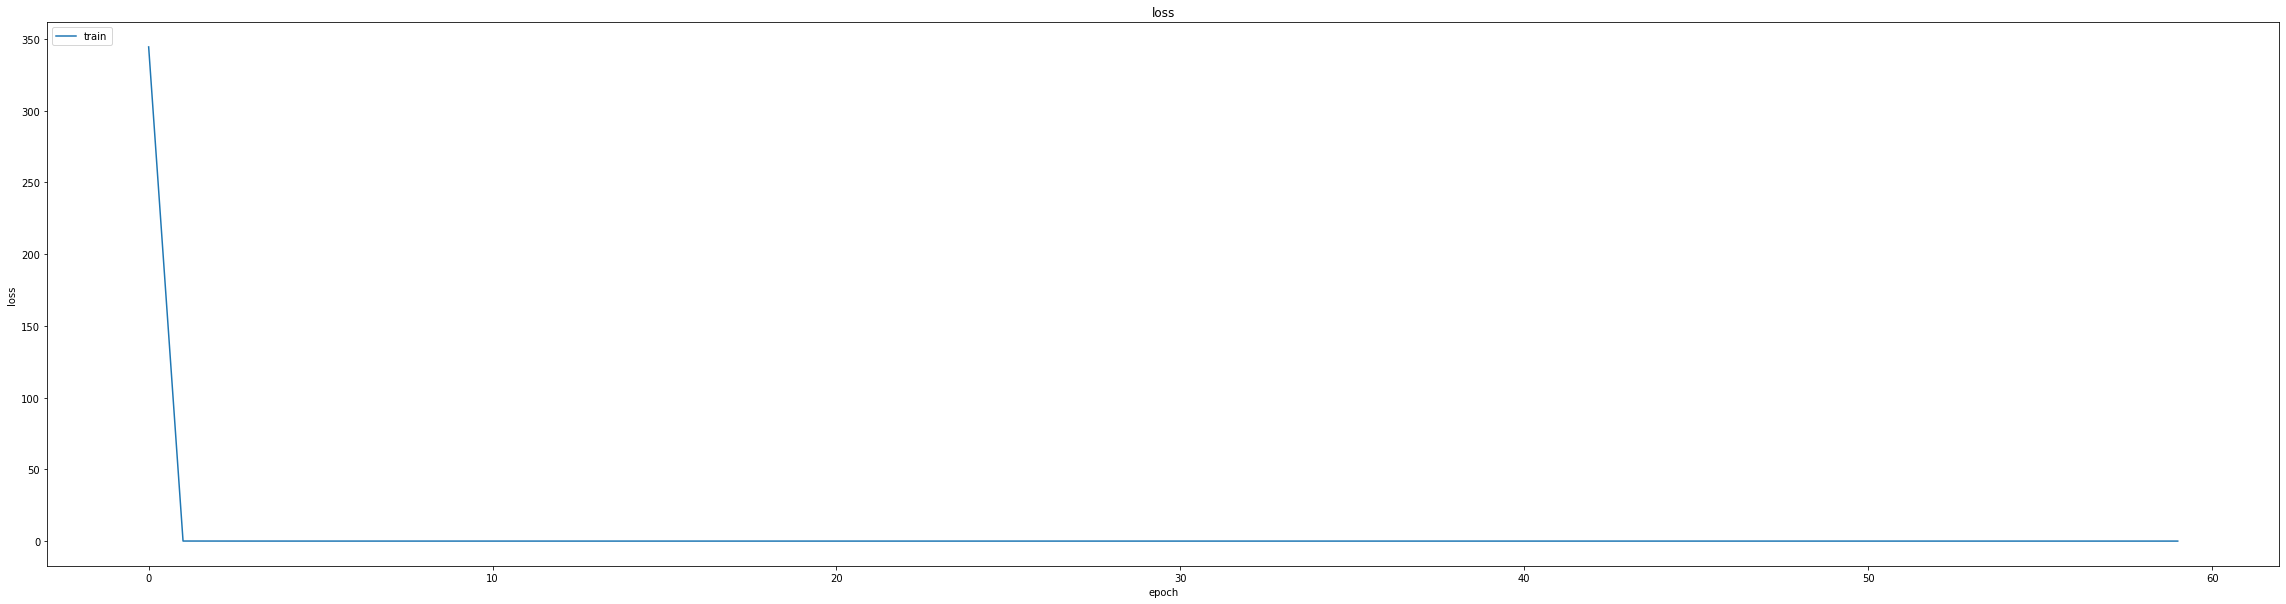

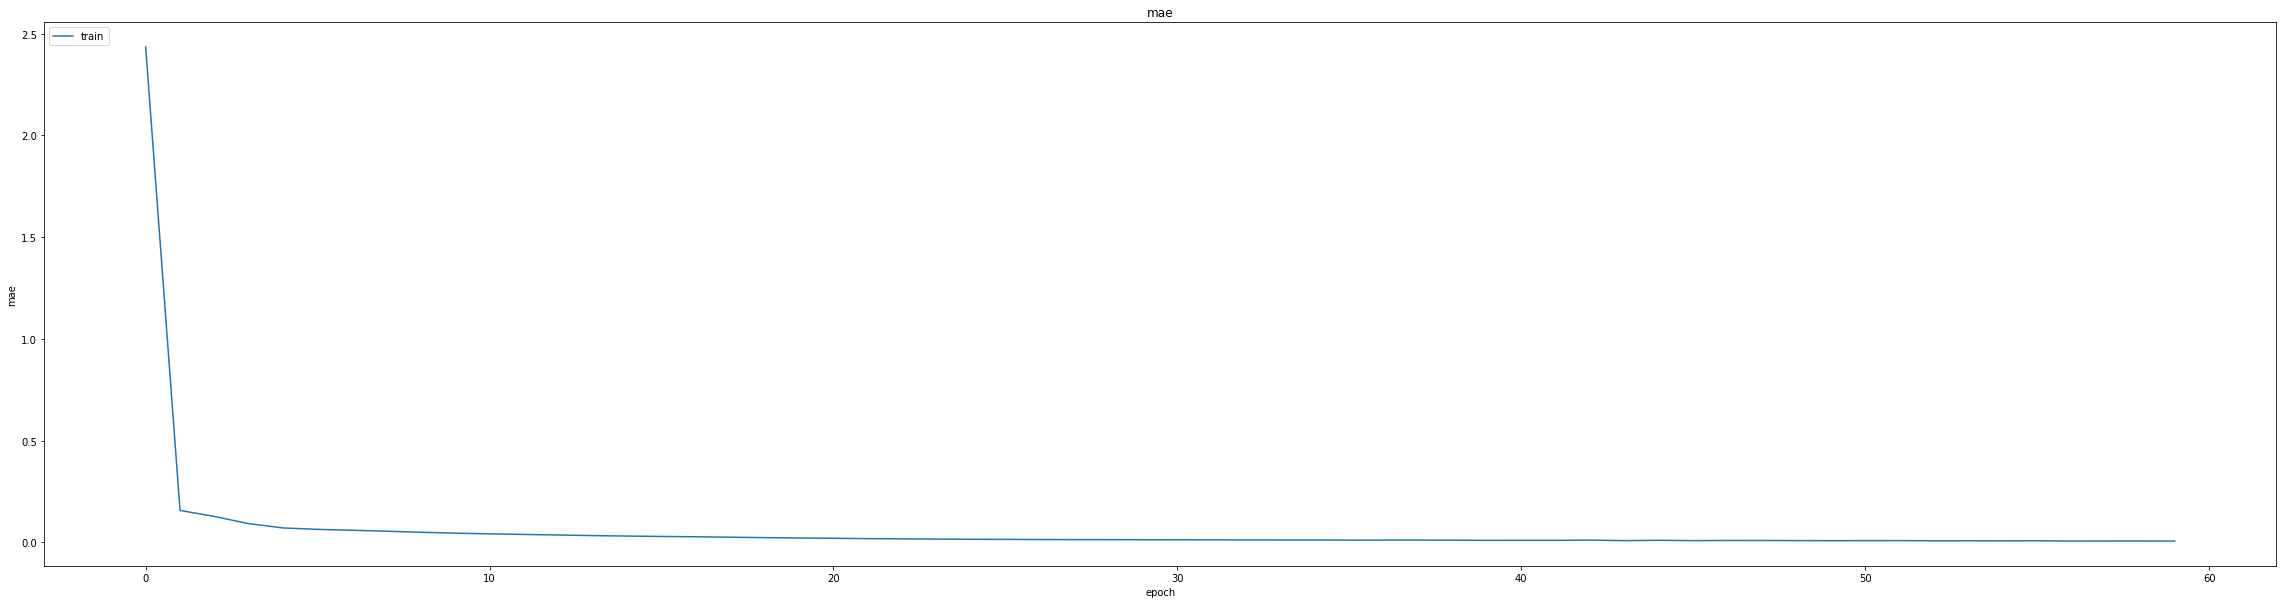

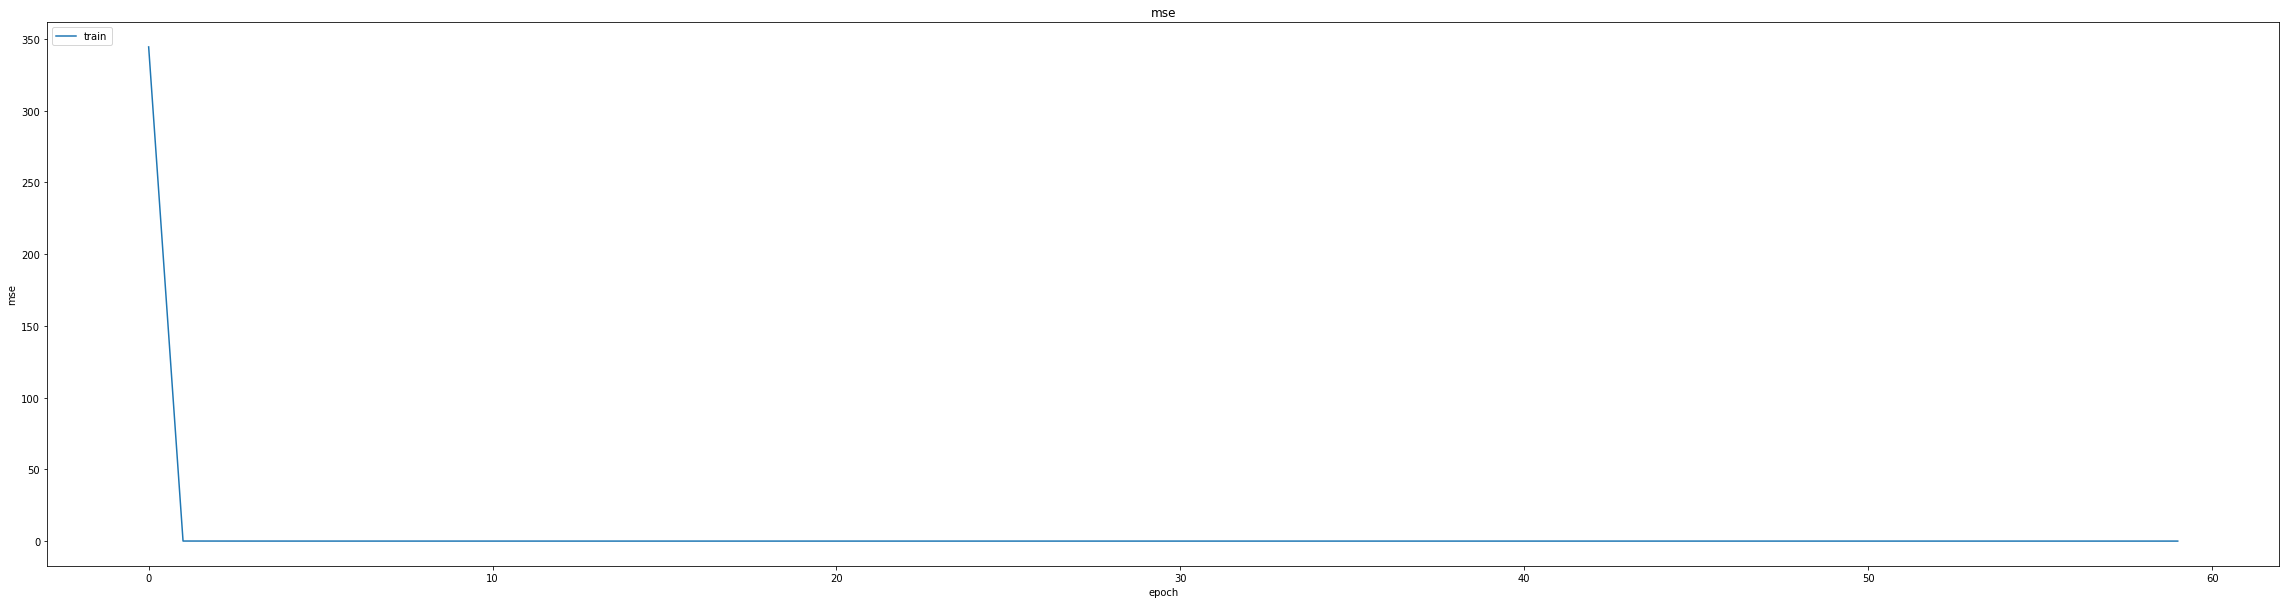

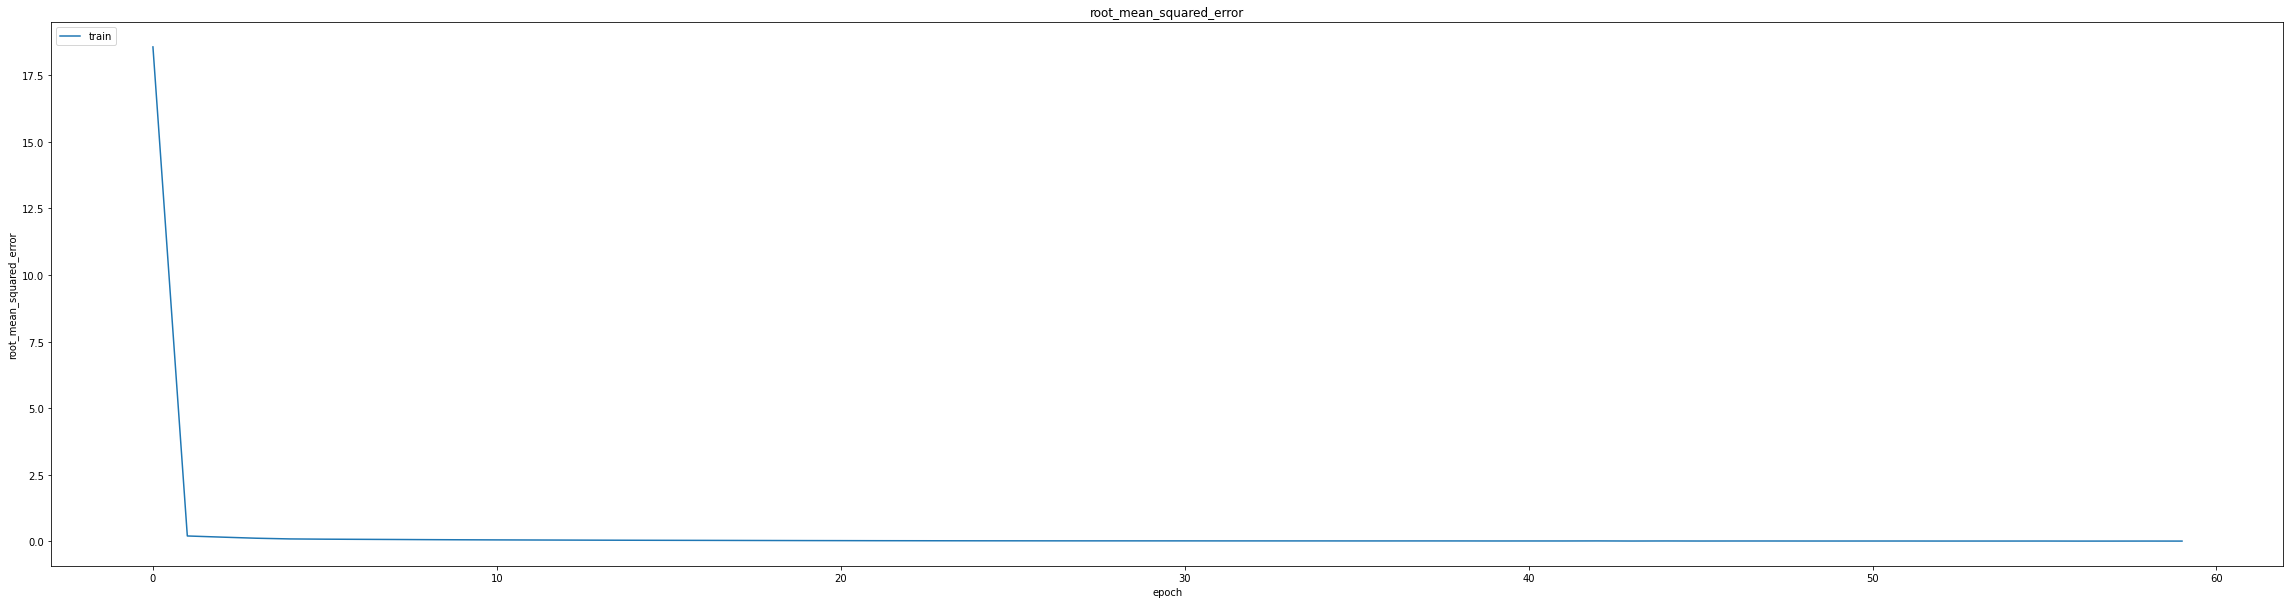

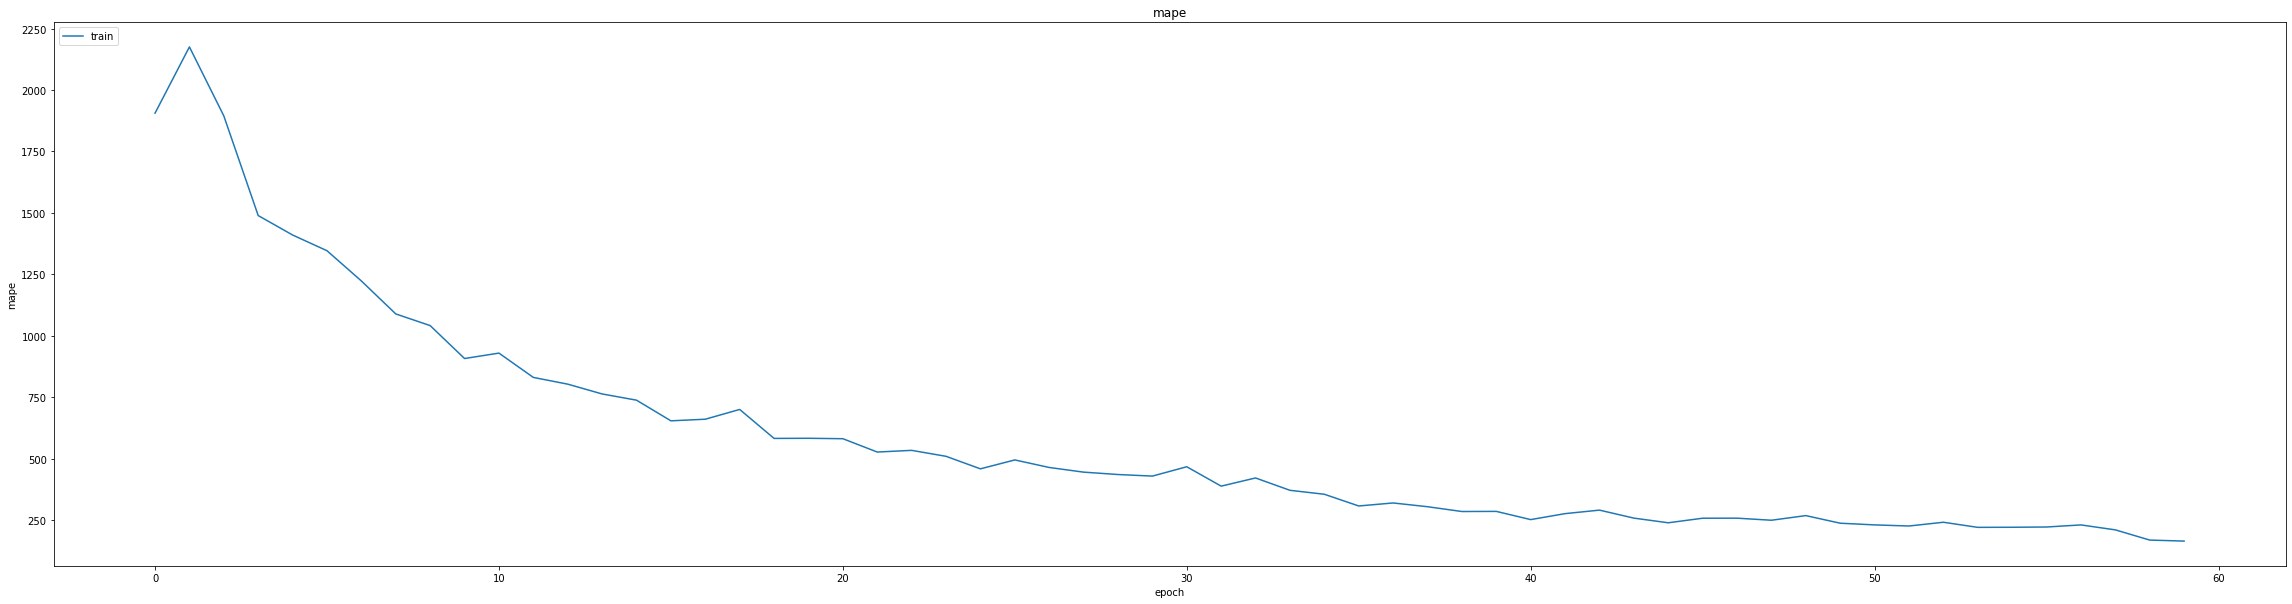

In [ ]:
thesis.SummarizeHistory(history)

In [ ]:
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
#print(min(histroy.history['val_mape']))
r2_scr = thesis.R_Squared_Score(model, x_val, y_val)
print(r2_scr)

0.006215333938598633
0.008693082258105278
1042/1042 [==============================] - 7s 5ms/step
0.9950517422511552


In [ ]:
model.load_weights("/content/drive/MyDrive/modelweights/CHF_USD_5min_GRU_BiLSTM(70-30)")
early_stopping = EarlyStopping(monitor='val_mse', patience=15)

In [ ]:
from keras.callbacks import LearningRateScheduler
import keras.backend as K

def scheduler(epoch):
    if epoch%2==0 and epoch!=0:
        lr = K.get_value(model.optimizer.lr)
        K.set_value(model.optimizer.lr, lr*.9)
        print("lr changed to {}".format(lr*.9))
    return K.get_value(model.optimizer.lr)
lr_decay = LearningRateScheduler(scheduler)

callbacks_list = [checkpoint, lr_decay, early_stopping]

Epochs=int(Epochs/3)

history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/20
403/405 [============================>.] - ETA: 0s - loss: 3.5348e-04 - mae: 0.0096 - mse: 3.5348e-04 - root_mean_squared_error: 0.0188 - mape: 243.2550
Epoch 1: val_mse did not improve from 0.00008
405/405 [==============================] - 21s 35ms/step - loss: 3.5337e-04 - mae: 0.0096 - mse: 3.5337e-04 - root_mean_squared_error: 0.0188 - mape: 242.5033 - val_loss: 5.8930e-04 - val_mae: 0.0213 - val_mse: 5.8930e-04 - val_root_mean_squared_error: 0.0243 - val_mape: 1109.8408 - lr: 0.0010
Epoch 2/20
404/405 [============================>.] - ETA: 0s - loss: 1.4229e-04 - mae: 0.0087 - mse: 1.4229e-04 - root_mean_squared_error: 0.0119 - mape: 252.7433
Epoch 2: val_mse did not improve from 0.00008
405/405 [==============================] - 13s 33ms/step - loss: 1.4233e-04 - mae: 0.0087 - mse: 1.4233e-04 - root_mean_squared_error: 0.0119 - mape: 252.5788 - val_loss: 8.8660e-05 - val_mae: 0.0069 - val_mse: 8.8660e-05 - val_root_mean_squared_error: 0.0094 - val_mape: 1237.9980 - l

405/405 [==============================] - 37s 92ms/step - loss: 7.5240e-05 - mae: 0.0064 - mse: 7.5240e-05 - root_mean_squared_error: 0.0087 - mape: 256.9040 - val_loss: 7.4259e-05 - val_mae: 0.0060 - val_mse: 7.4259e-05 - val_root_mean_squared_error: 0.0086 - val_mape: 1823.8931 - lr: 9.0000e-04
Epoch 4/20
403/405 [============================>.] - ETA: 0s - loss: 9.5347e-05 - mae: 0.0073 - mse: 9.5347e-05 - root_mean_squared_error: 0.0098 - mape: 239.9622
Epoch 4: val_mse did not improve from 0.00007
405/405 [==============================] - 13s 31ms/step - loss: 9.5158e-05 - mae: 0.0073 - mse: 9.5158e-05 - root_mean_squared_error: 0.0098 - mape: 239.2141 - val_loss: 4.2960e-04 - val_mae: 0.0191 - val_mse: 4.2960e-04 - val_root_mean_squared_error: 0.0207 - val_mape: 1488.8760 - lr: 9.0000e-04
lr changed to 0.0008100000384729356
Epoch 5/20
403/405 [============================>.] - ETA: 0s - loss: 6.3043e-05 - mae: 0.0058 - mse: 6.3043e-05 - root_mean_squared_error: 0.0079 - mape: 2

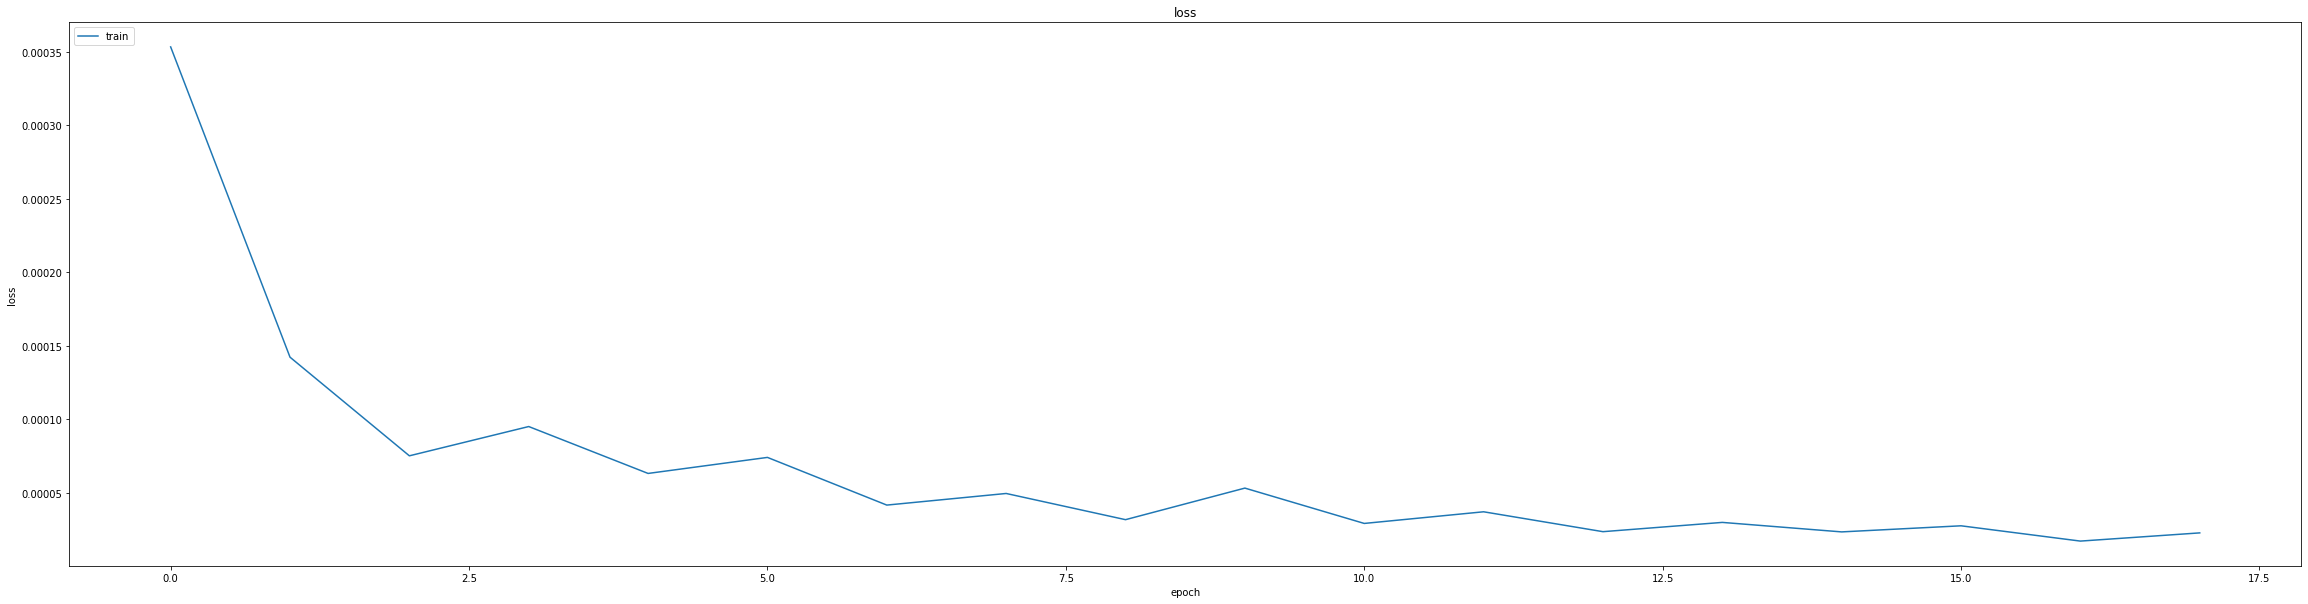

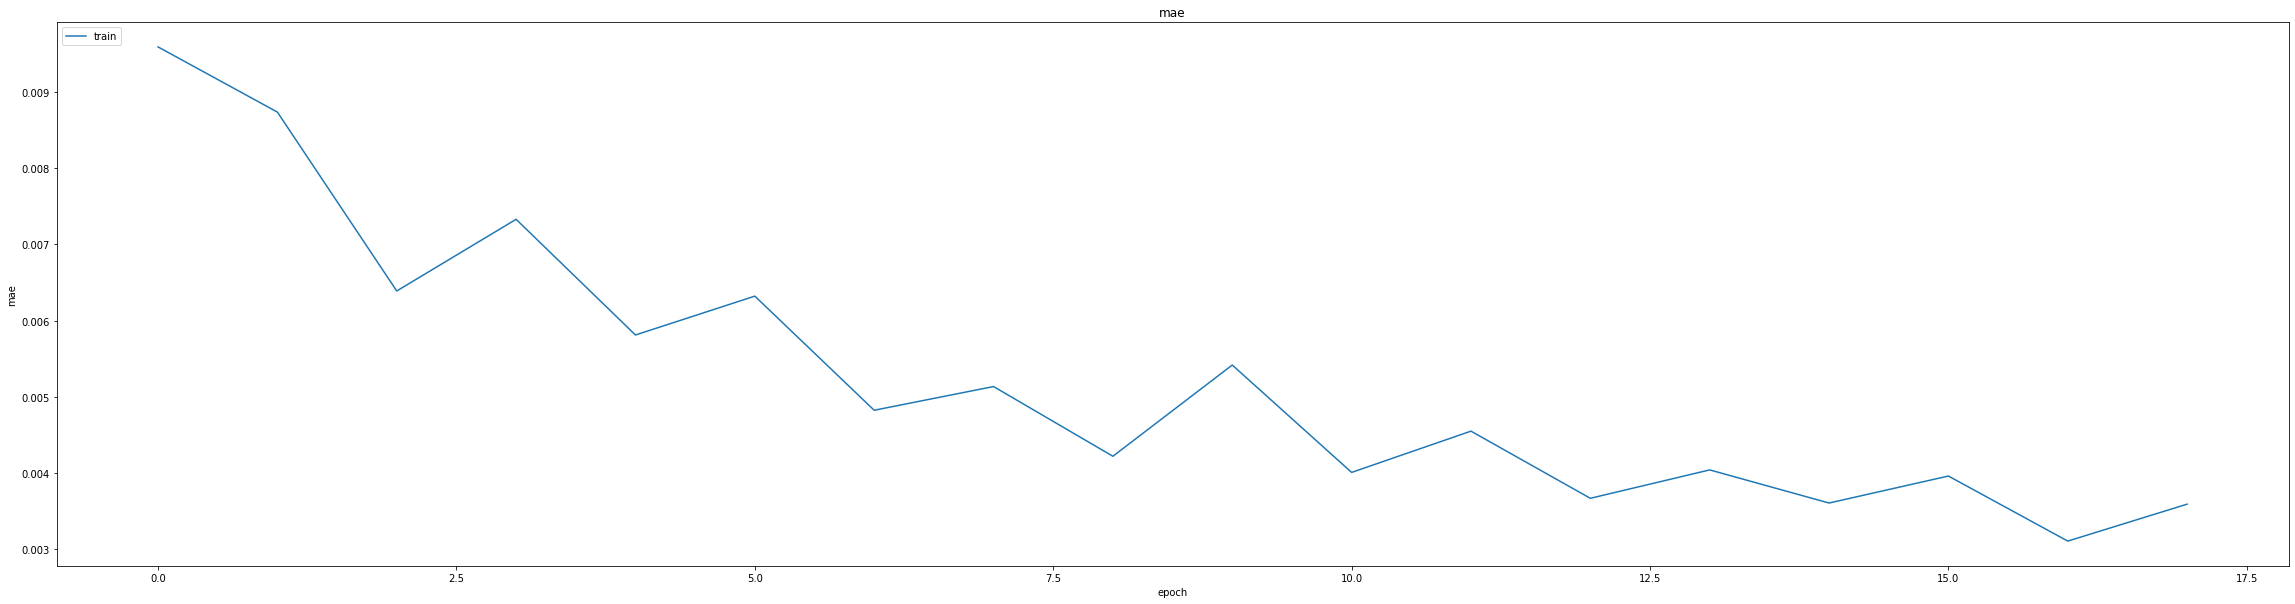

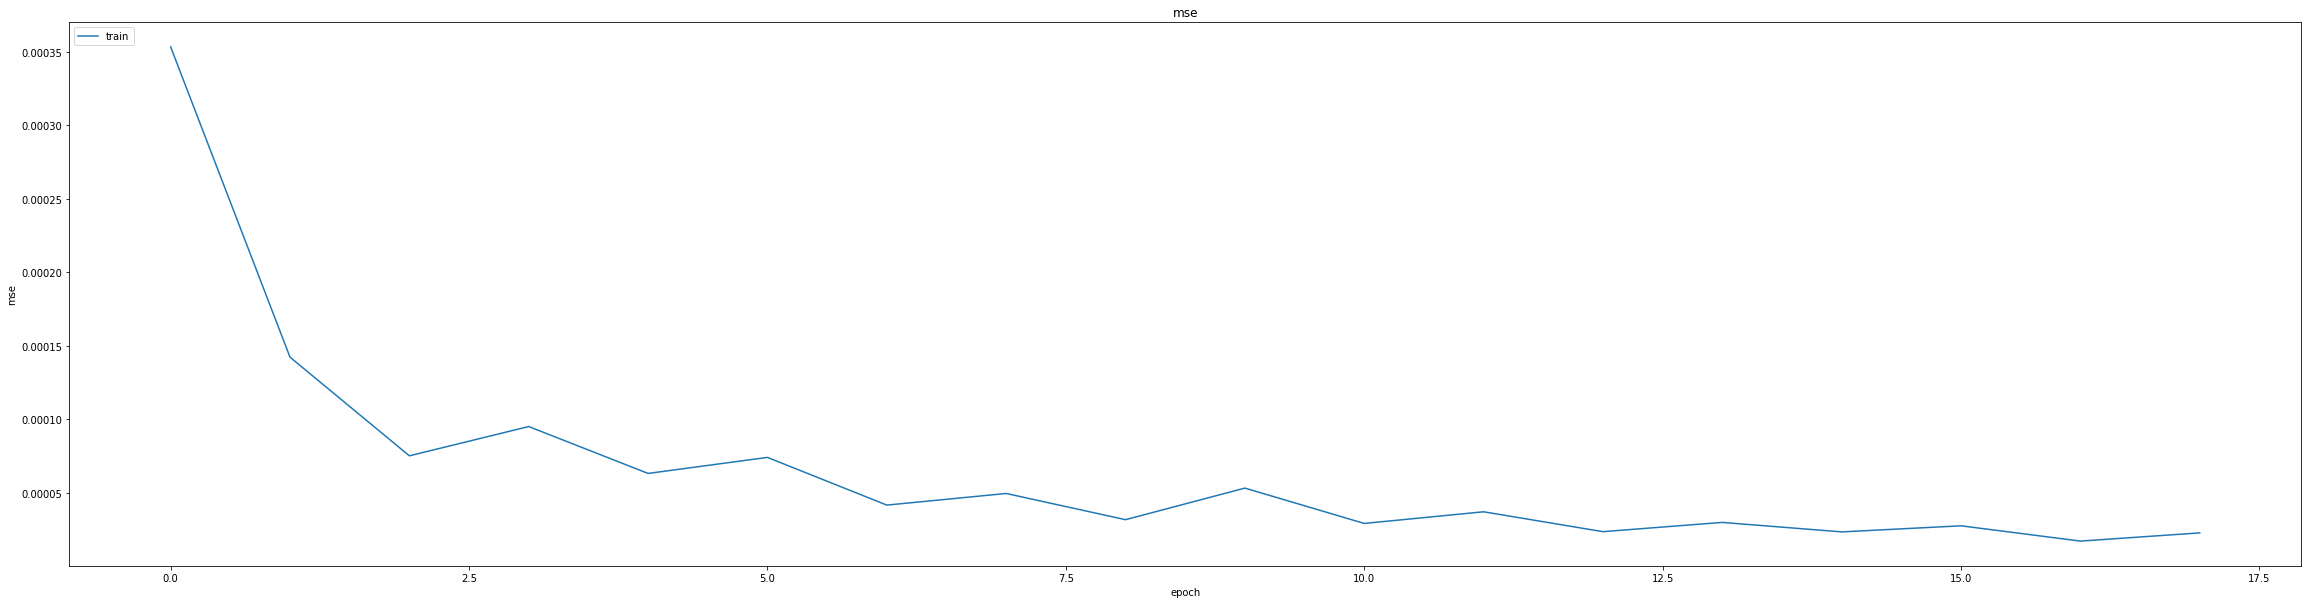

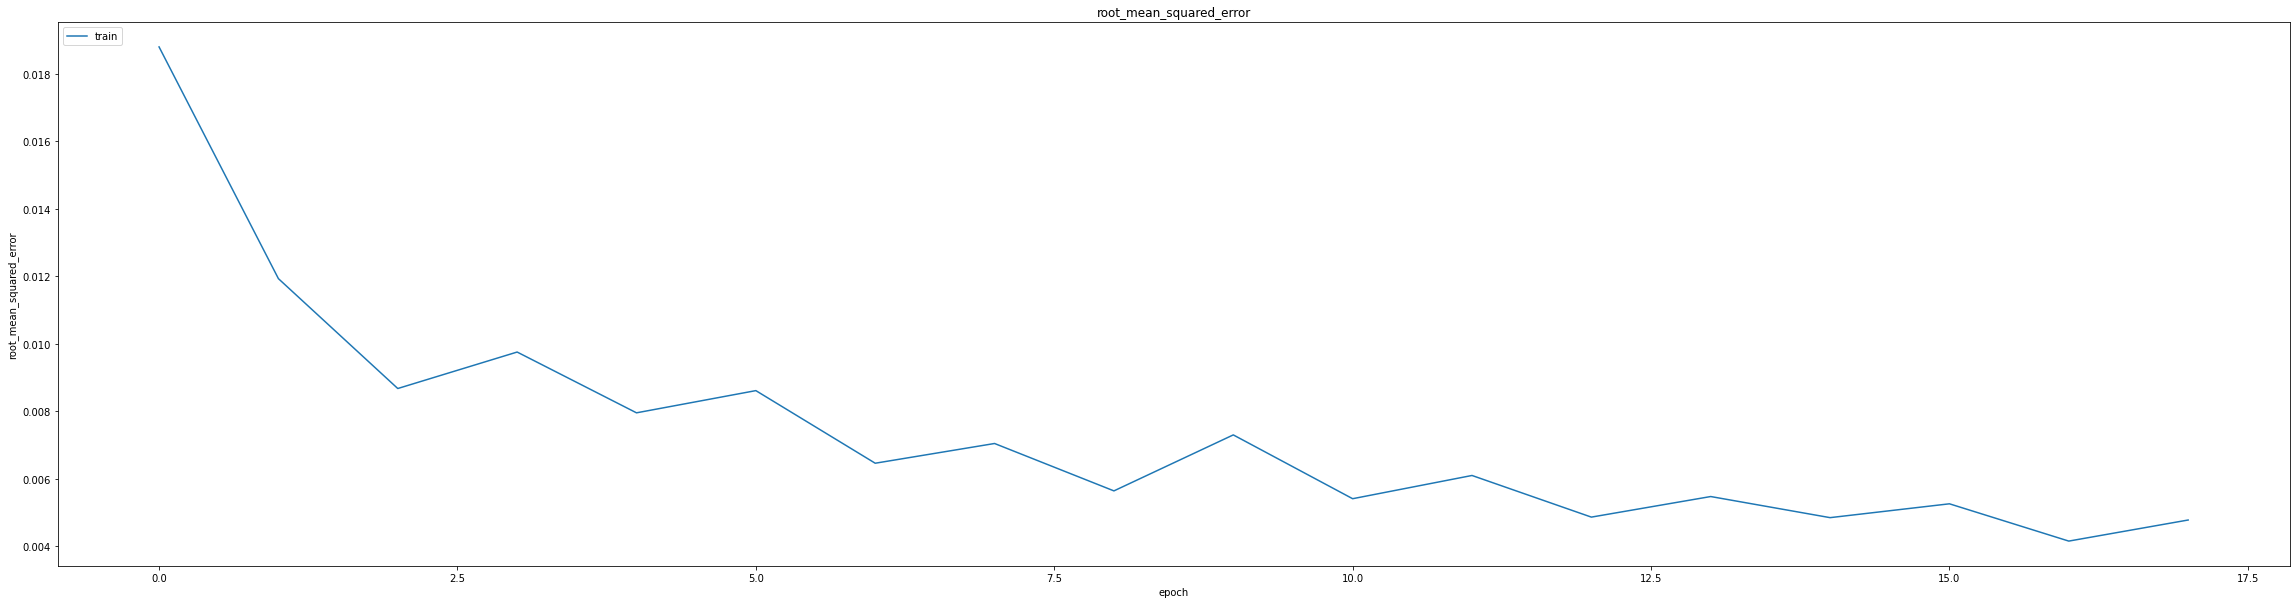

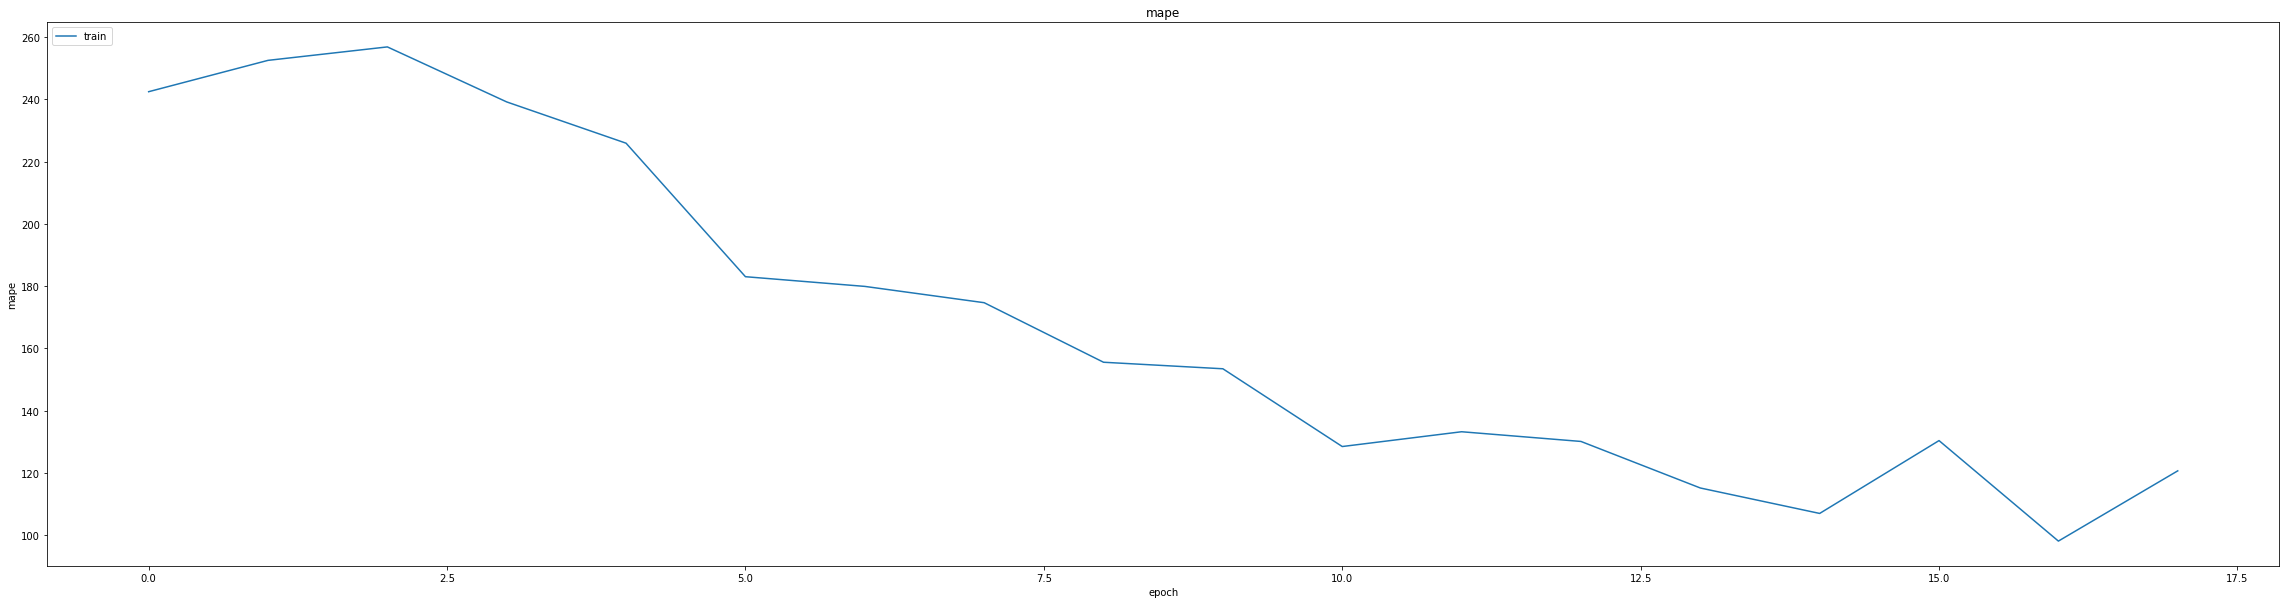

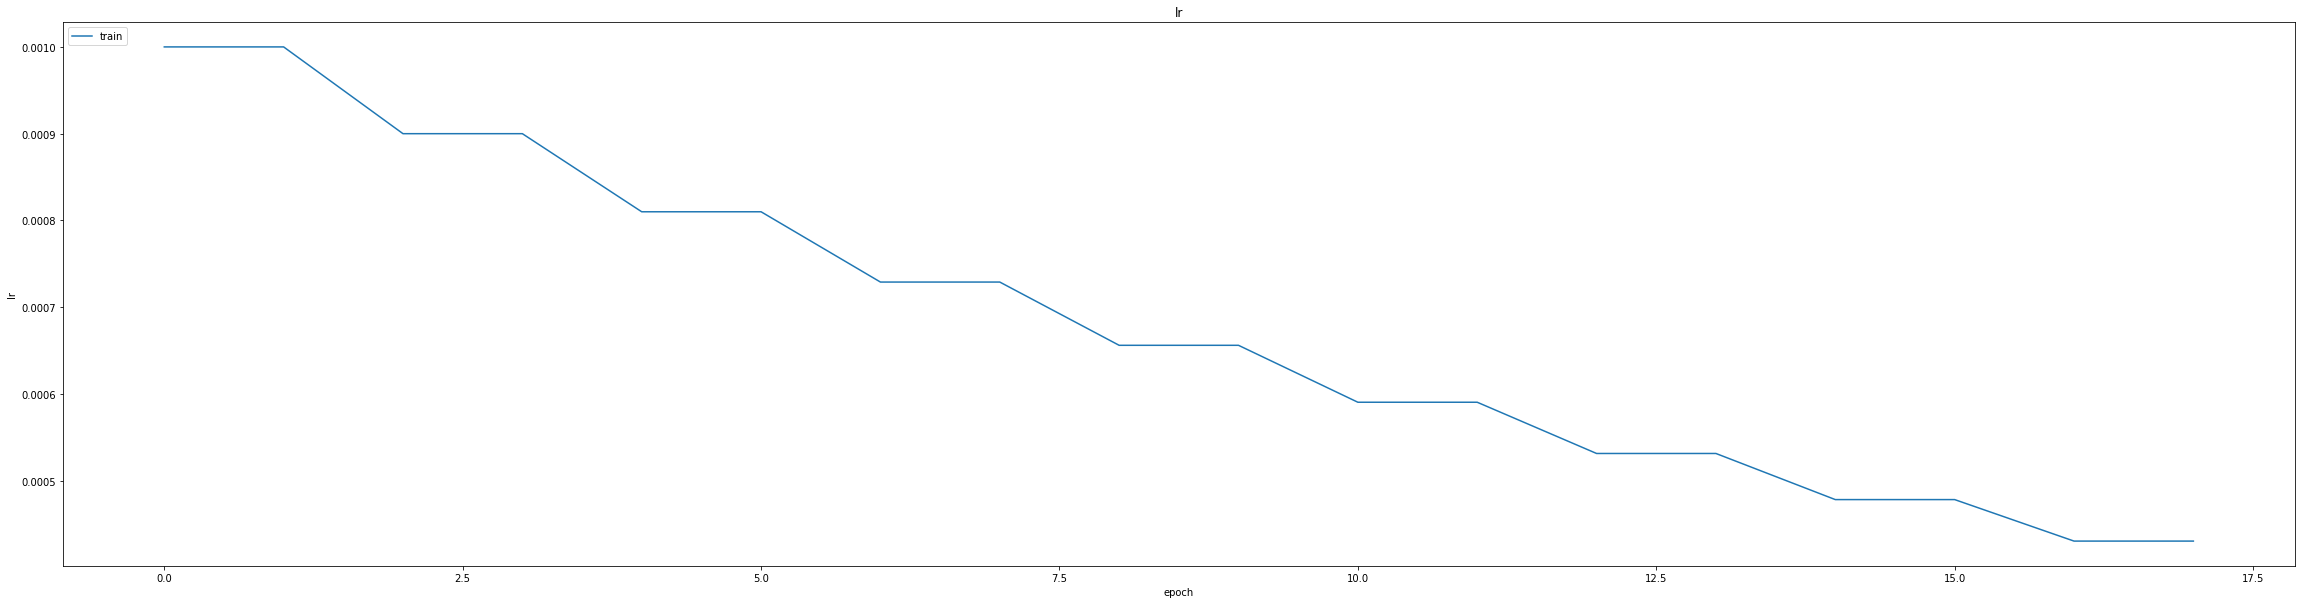

In [ ]:
thesis.SummarizeHistory(history)

In [ ]:
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
#print(min(histroy.history['val_mape']))
r2_scr = thesis.R_Squared_Score(model, x_val, y_val)
print(r2_scr)

0.005956958048045635
0.008617387153208256
1042/1042 [==============================] - 7s 5ms/step
0.9888187093158658


1042/1042 [==============================] - 5s 5ms/step


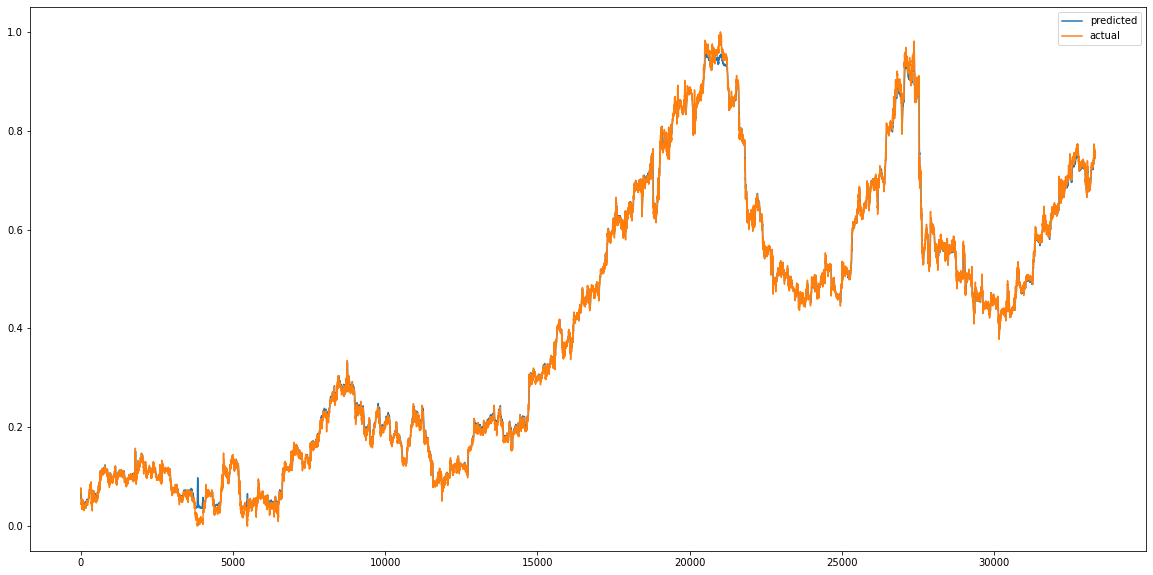

In [ ]:
model.load_weights("/content/drive/MyDrive/modelweights/CHF_USD_5min_GRU_BiLSTM(70-30)")
val_predictions=thesis.CreatPrediction(model,x_val, y_val)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


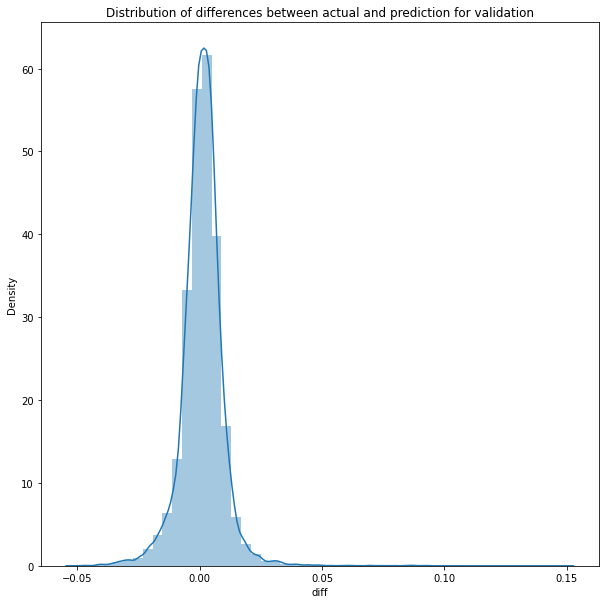

In [ ]:
val_predictions['diff'] = val_predictions['predicted'] - val_predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(val_predictions['diff']);
plt.title('Distribution of differences between actual and prediction for validation')
plt.show()

1042/1042 [==============================] - 5s 5ms/step


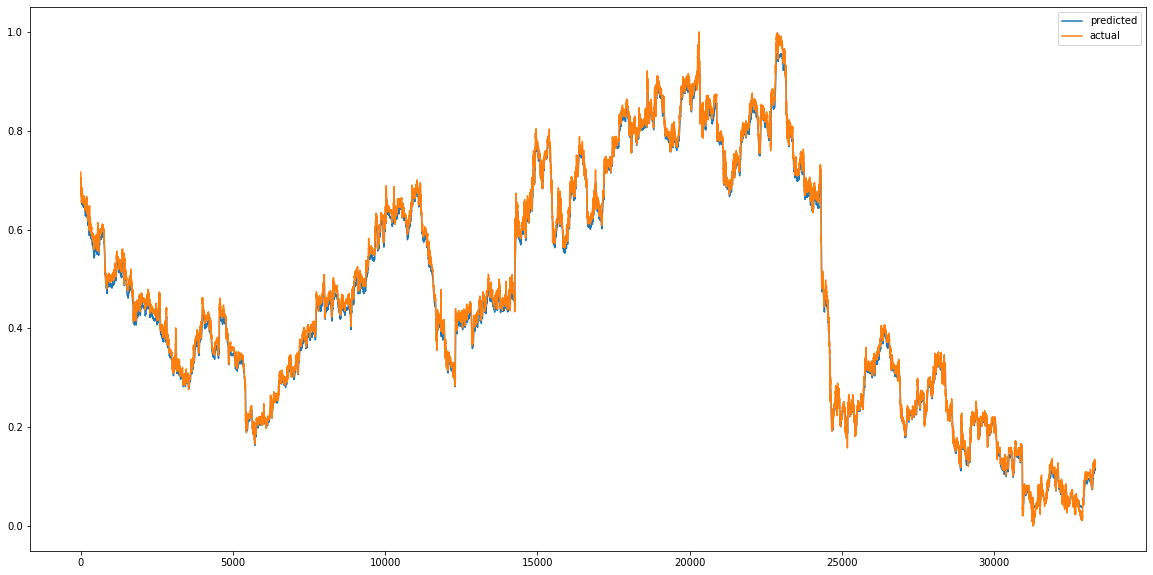

In [ ]:
predictions=thesis.CreatPrediction(model,x_test, y_test)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


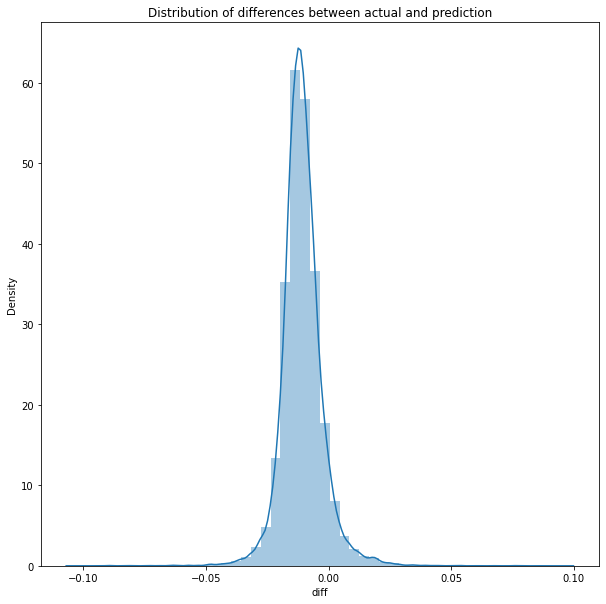

In [ ]:
predictions['diff'] = predictions['predicted'] - predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(predictions['diff']);
plt.title('Distribution of differences between actual and prediction')
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
print("MSE : ", mean_squared_error(predictions['predicted'].values, predictions['actual'].values))

from math import sqrt
print("RMSE : ", sqrt(mean_squared_error(predictions['predicted'].values, predictions['actual'].values)))

print("MAE : ", mean_absolute_error(predictions['predicted'].values, predictions['actual'].values))

test_r2_score=thesis.R_Squared_Score(model, x_test, y_test)
print('R2_Score  :', test_r2_score)
predictions['diff'].describe()

MSE :  0.00018795208221969182
RMSE :  0.013709561707789635
MAE :  0.011891752138357903
1042/1042 [==============================] - 6s 5ms/step
R2_Score  : 0.9967736758153053


count    33333.000000
mean        -0.010846
std          0.008385
min         -0.103905
25%         -0.015333
50%         -0.011341
75%         -0.006812
max          0.096681
Name: diff, dtype: float64

**GRU_LSTM_MODEL**

In [ ]:
model= thesis.GRU_LSTM_Model(x_train)
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_1 (GRU)                 (None, 24, 32)            4416      
                                                                 
 lstm_2 (LSTM)               (None, 24, 256)           295936    
                                                                 
 dropout_1 (Dropout)         (None, 24, 256)           0         
                                                                 
 lstm_3 (LSTM)               (None, 64)                82176     
                                                                 
 dense_3 (Dense)             (None, 32)                2080      
                                                                 
 dense_4 (Dense)             (None, 16)                528       
                                                                 
 dense_5 (Dense)             (None, 1)                

In [ ]:
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping

# Set the metric you want to monitor, the threshold, and the patience value
early_stopping = EarlyStopping(monitor='val_mse', patience=30)

checkpoint = ModelCheckpoint("/content/drive/MyDrive/modelweights/CHF_USD_5min_GRU_LSTM(70-30)", monitor='val_mse', verbose=1, save_best_only=True, mode='min')

# Fit
callbacks_list = [checkpoint, early_stopping ]

Epochs=60
Batch_size=385
history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/60
405/405 [==============================] - ETA: 0s - loss: 305.9369 - mae: 2.5952 - mse: 305.9369 - root_mean_squared_error: 17.4911 - mape: 6771.7749
Epoch 1: val_mse improved from inf to 0.12267, saving model to /content/drive/MyDrive/modelweights/CHF_USD_5min_GRU_LSTM(70-30)


405/405 [==============================] - 22s 46ms/step - loss: 305.9369 - mae: 2.5952 - mse: 305.9369 - root_mean_squared_error: 17.4911 - mape: 6771.7749 - val_loss: 0.1227 - val_mae: 0.2937 - val_mse: 0.1227 - val_root_mean_squared_error: 0.3502 - val_mape: 18959.8828
Epoch 2/60
403/405 [============================>.] - ETA: 0s - loss: 0.0671 - mae: 0.2309 - mse: 0.0671 - root_mean_squared_error: 0.2591 - mape: 3764.6016
Epoch 2: val_mse improved from 0.12267 to 0.08446, saving model to /content/drive/MyDrive/modelweights/CHF_USD_5min_GRU_LSTM(70-30)


405/405 [==============================] - 17s 42ms/step - loss: 0.0671 - mae: 0.2308 - mse: 0.0671 - root_mean_squared_error: 0.2590 - mape: 3753.0659 - val_loss: 0.0845 - val_mae: 0.2476 - val_mse: 0.0845 - val_root_mean_squared_error: 0.2906 - val_mape: 15292.7881
Epoch 3/60
404/405 [============================>.] - ETA: 0s - loss: 0.0533 - mae: 0.1953 - mse: 0.0533 - root_mean_squared_error: 0.2309 - mape: 3082.4153
Epoch 3: val_mse improved from 0.08446 to 0.07728, saving model to /content/drive/MyDrive/modelweights/CHF_USD_5min_GRU_LSTM(70-30)


405/405 [==============================] - 17s 42ms/step - loss: 0.0533 - mae: 0.1953 - mse: 0.0533 - root_mean_squared_error: 0.2309 - mape: 3080.4338 - val_loss: 0.0773 - val_mae: 0.2410 - val_mse: 0.0773 - val_root_mean_squared_error: 0.2780 - val_mape: 13853.0176
Epoch 4/60
402/405 [============================>.] - ETA: 0s - loss: 0.0516 - mae: 0.1847 - mse: 0.0516 - root_mean_squared_error: 0.2273 - mape: 2974.0457
Epoch 4: val_mse improved from 0.07728 to 0.07590, saving model to /content/drive/MyDrive/modelweights/CHF_USD_5min_GRU_LSTM(70-30)


405/405 [==============================] - 17s 42ms/step - loss: 0.0516 - mae: 0.1847 - mse: 0.0516 - root_mean_squared_error: 0.2273 - mape: 2957.7380 - val_loss: 0.0759 - val_mae: 0.2406 - val_mse: 0.0759 - val_root_mean_squared_error: 0.2755 - val_mape: 13379.6396
Epoch 5/60
403/405 [============================>.] - ETA: 0s - loss: 0.0515 - mae: 0.1821 - mse: 0.0515 - root_mean_squared_error: 0.2270 - mape: 2932.2869
Epoch 5: val_mse improved from 0.07590 to 0.07567, saving model to /content/drive/MyDrive/modelweights/CHF_USD_5min_GRU_LSTM(70-30)


405/405 [==============================] - 17s 42ms/step - loss: 0.0515 - mae: 0.1821 - mse: 0.0515 - root_mean_squared_error: 0.2270 - mape: 2923.3279 - val_loss: 0.0757 - val_mae: 0.2406 - val_mse: 0.0757 - val_root_mean_squared_error: 0.2751 - val_mape: 13284.3008
Epoch 6/60
404/405 [============================>.] - ETA: 0s - loss: 0.0515 - mae: 0.1818 - mse: 0.0515 - root_mean_squared_error: 0.2270 - mape: 3051.6902
Epoch 6: val_mse improved from 0.07567 to 0.07555, saving model to /content/drive/MyDrive/modelweights/CHF_USD_5min_GRU_LSTM(70-30)


405/405 [==============================] - 17s 41ms/step - loss: 0.0515 - mae: 0.1818 - mse: 0.0515 - root_mean_squared_error: 0.2270 - mape: 3049.7083 - val_loss: 0.0755 - val_mae: 0.2405 - val_mse: 0.0755 - val_root_mean_squared_error: 0.2749 - val_mape: 13229.7100
Epoch 7/60
403/405 [============================>.] - ETA: 0s - loss: 0.0515 - mae: 0.1815 - mse: 0.0515 - root_mean_squared_error: 0.2270 - mape: 2931.9209
Epoch 7: val_mse did not improve from 0.07555
405/405 [==============================] - 7s 16ms/step - loss: 0.0515 - mae: 0.1815 - mse: 0.0515 - root_mean_squared_error: 0.2269 - mape: 2922.9507 - val_loss: 0.0756 - val_mae: 0.2405 - val_mse: 0.0756 - val_root_mean_squared_error: 0.2750 - val_mape: 13274.5557
Epoch 8/60
405/405 [==============================] - ETA: 0s - loss: 0.0515 - mae: 0.1816 - mse: 0.0515 - root_mean_squared_error: 0.2269 - mape: 2993.3123
Epoch 8: val_mse did not improve from 0.07555
405/405 [==============================] - 6s 16ms/step - l

405/405 [==============================] - 17s 43ms/step - loss: 0.0515 - mae: 0.1815 - mse: 0.0515 - root_mean_squared_error: 0.2268 - mape: 2887.7864 - val_loss: 0.0755 - val_mae: 0.2404 - val_mse: 0.0755 - val_root_mean_squared_error: 0.2748 - val_mape: 13255.4814
Epoch 12/60
402/405 [============================>.] - ETA: 0s - loss: 0.0514 - mae: 0.1814 - mse: 0.0514 - root_mean_squared_error: 0.2267 - mape: 2889.9565
Epoch 12: val_mse did not improve from 0.07553
405/405 [==============================] - 7s 16ms/step - loss: 0.0514 - mae: 0.1814 - mse: 0.0514 - root_mean_squared_error: 0.2268 - mape: 2874.1362 - val_loss: 0.0756 - val_mae: 0.2404 - val_mse: 0.0756 - val_root_mean_squared_error: 0.2750 - val_mape: 13310.2676
Epoch 13/60
405/405 [==============================] - ETA: 0s - loss: 0.0514 - mae: 0.1814 - mse: 0.0514 - root_mean_squared_error: 0.2267 - mape: 2908.1187
Epoch 13: val_mse did not improve from 0.07553
405/405 [==============================] - 7s 16ms/step

405/405 [==============================] - 17s 43ms/step - loss: 0.0514 - mae: 0.1814 - mse: 0.0514 - root_mean_squared_error: 0.2267 - mape: 2834.8975 - val_loss: 0.0754 - val_mae: 0.2402 - val_mse: 0.0754 - val_root_mean_squared_error: 0.2747 - val_mape: 13266.9717
Epoch 15/60
402/405 [============================>.] - ETA: 0s - loss: 0.0513 - mae: 0.1813 - mse: 0.0513 - root_mean_squared_error: 0.2264 - mape: 2924.1038
Epoch 15: val_mse improved from 0.07544 to 0.07517, saving model to /content/drive/MyDrive/modelweights/CHF_USD_5min_GRU_LSTM(70-30)


405/405 [==============================] - 17s 43ms/step - loss: 0.0513 - mae: 0.1813 - mse: 0.0513 - root_mean_squared_error: 0.2264 - mape: 2908.1716 - val_loss: 0.0752 - val_mae: 0.2398 - val_mse: 0.0752 - val_root_mean_squared_error: 0.2742 - val_mape: 13221.5830
Epoch 16/60
404/405 [============================>.] - ETA: 0s - loss: 0.0510 - mae: 0.1808 - mse: 0.0510 - root_mean_squared_error: 0.2258 - mape: 2892.7292
Epoch 16: val_mse improved from 0.07517 to 0.07377, saving model to /content/drive/MyDrive/modelweights/CHF_USD_5min_GRU_LSTM(70-30)


405/405 [==============================] - 17s 41ms/step - loss: 0.0510 - mae: 0.1808 - mse: 0.0510 - root_mean_squared_error: 0.2258 - mape: 2890.8569 - val_loss: 0.0738 - val_mae: 0.2371 - val_mse: 0.0738 - val_root_mean_squared_error: 0.2716 - val_mape: 13162.2344
Epoch 17/60
402/405 [============================>.] - ETA: 0s - loss: 0.0327 - mae: 0.1405 - mse: 0.0327 - root_mean_squared_error: 0.1809 - mape: 2623.5007
Epoch 17: val_mse improved from 0.07377 to 0.03067, saving model to /content/drive/MyDrive/modelweights/CHF_USD_5min_GRU_LSTM(70-30)


405/405 [==============================] - 17s 43ms/step - loss: 0.0326 - mae: 0.1403 - mse: 0.0326 - root_mean_squared_error: 0.1806 - mape: 2609.0847 - val_loss: 0.0307 - val_mae: 0.1433 - val_mse: 0.0307 - val_root_mean_squared_error: 0.1751 - val_mape: 10963.7158
Epoch 18/60
404/405 [============================>.] - ETA: 0s - loss: 0.0085 - mae: 0.0676 - mse: 0.0085 - root_mean_squared_error: 0.0923 - mape: 2109.9565
Epoch 18: val_mse improved from 0.03067 to 0.01004, saving model to /content/drive/MyDrive/modelweights/CHF_USD_5min_GRU_LSTM(70-30)


405/405 [==============================] - 17s 42ms/step - loss: 0.0085 - mae: 0.0676 - mse: 0.0085 - root_mean_squared_error: 0.0923 - mape: 2108.5806 - val_loss: 0.0100 - val_mae: 0.0781 - val_mse: 0.0100 - val_root_mean_squared_error: 0.1002 - val_mape: 7634.8188
Epoch 19/60
405/405 [==============================] - ETA: 0s - loss: 0.0036 - mae: 0.0445 - mse: 0.0036 - root_mean_squared_error: 0.0596 - mape: 1442.0844
Epoch 19: val_mse improved from 0.01004 to 0.00572, saving model to /content/drive/MyDrive/modelweights/CHF_USD_5min_GRU_LSTM(70-30)


405/405 [==============================] - 17s 43ms/step - loss: 0.0036 - mae: 0.0445 - mse: 0.0036 - root_mean_squared_error: 0.0596 - mape: 1442.0844 - val_loss: 0.0057 - val_mae: 0.0651 - val_mse: 0.0057 - val_root_mean_squared_error: 0.0756 - val_mape: 5674.7573
Epoch 20/60
403/405 [============================>.] - ETA: 0s - loss: 0.0023 - mae: 0.0365 - mse: 0.0023 - root_mean_squared_error: 0.0479 - mape: 1131.2184
Epoch 20: val_mse improved from 0.00572 to 0.00269, saving model to /content/drive/MyDrive/modelweights/CHF_USD_5min_GRU_LSTM(70-30)


405/405 [==============================] - 17s 43ms/step - loss: 0.0023 - mae: 0.0365 - mse: 0.0023 - root_mean_squared_error: 0.0478 - mape: 1127.7157 - val_loss: 0.0027 - val_mae: 0.0397 - val_mse: 0.0027 - val_root_mean_squared_error: 0.0518 - val_mape: 4867.8438
Epoch 21/60
403/405 [============================>.] - ETA: 0s - loss: 0.0017 - mae: 0.0316 - mse: 0.0017 - root_mean_squared_error: 0.0412 - mape: 1070.4410
Epoch 21: val_mse improved from 0.00269 to 0.00197, saving model to /content/drive/MyDrive/modelweights/CHF_USD_5min_GRU_LSTM(70-30)


405/405 [==============================] - 17s 43ms/step - loss: 0.0017 - mae: 0.0316 - mse: 0.0017 - root_mean_squared_error: 0.0412 - mape: 1067.1283 - val_loss: 0.0020 - val_mae: 0.0323 - val_mse: 0.0020 - val_root_mean_squared_error: 0.0443 - val_mape: 4435.7646
Epoch 22/60
403/405 [============================>.] - ETA: 0s - loss: 0.0013 - mae: 0.0279 - mse: 0.0013 - root_mean_squared_error: 0.0362 - mape: 937.4305
Epoch 22: val_mse improved from 0.00197 to 0.00148, saving model to /content/drive/MyDrive/modelweights/CHF_USD_5min_GRU_LSTM(70-30)


405/405 [==============================] - 17s 41ms/step - loss: 0.0013 - mae: 0.0279 - mse: 0.0013 - root_mean_squared_error: 0.0362 - mape: 934.5227 - val_loss: 0.0015 - val_mae: 0.0278 - val_mse: 0.0015 - val_root_mean_squared_error: 0.0385 - val_mape: 4075.4246
Epoch 23/60
405/405 [==============================] - ETA: 0s - loss: 0.0011 - mae: 0.0252 - mse: 0.0011 - root_mean_squared_error: 0.0328 - mape: 845.8027
Epoch 23: val_mse did not improve from 0.00148
405/405 [==============================] - 7s 16ms/step - loss: 0.0011 - mae: 0.0252 - mse: 0.0011 - root_mean_squared_error: 0.0328 - mape: 845.8027 - val_loss: 0.0019 - val_mae: 0.0373 - val_mse: 0.0019 - val_root_mean_squared_error: 0.0434 - val_mape: 3772.6521
Epoch 24/60
402/405 [============================>.] - ETA: 0s - loss: 9.1320e-04 - mae: 0.0232 - mse: 9.1320e-04 - root_mean_squared_error: 0.0302 - mape: 922.3903
Epoch 24: val_mse did not improve from 0.00148
405/405 [==============================] - 6s 16ms/st

405/405 [==============================] - 17s 43ms/step - loss: 6.3880e-04 - mae: 0.0193 - mse: 6.3880e-04 - root_mean_squared_error: 0.0253 - mape: 704.2885 - val_loss: 7.6564e-04 - val_mae: 0.0198 - val_mse: 7.6564e-04 - val_root_mean_squared_error: 0.0277 - val_mape: 3244.6853
Epoch 27/60
402/405 [============================>.] - ETA: 0s - loss: 5.7939e-04 - mae: 0.0185 - mse: 5.7939e-04 - root_mean_squared_error: 0.0241 - mape: 743.6503
Epoch 27: val_mse did not improve from 0.00077
405/405 [==============================] - 7s 16ms/step - loss: 5.7901e-04 - mae: 0.0185 - mse: 5.7901e-04 - root_mean_squared_error: 0.0241 - mape: 739.5442 - val_loss: 9.0246e-04 - val_mae: 0.0235 - val_mse: 9.0246e-04 - val_root_mean_squared_error: 0.0300 - val_mape: 3133.0398
Epoch 28/60
402/405 [============================>.] - ETA: 0s - loss: 5.1145e-04 - mae: 0.0173 - mse: 5.1145e-04 - root_mean_squared_error: 0.0226 - mape: 670.2911
Epoch 28: val_mse did not improve from 0.00077
405/405 [====

405/405 [==============================] - 17s 42ms/step - loss: 4.2163e-04 - mae: 0.0158 - mse: 4.2163e-04 - root_mean_squared_error: 0.0205 - mape: 619.2963 - val_loss: 5.4686e-04 - val_mae: 0.0167 - val_mse: 5.4686e-04 - val_root_mean_squared_error: 0.0234 - val_mape: 2856.9102
Epoch 31/60
405/405 [==============================] - ETA: 0s - loss: 3.6305e-04 - mae: 0.0146 - mse: 3.6305e-04 - root_mean_squared_error: 0.0191 - mape: 653.5859
Epoch 31: val_mse improved from 0.00055 to 0.00047, saving model to /content/drive/MyDrive/modelweights/CHF_USD_5min_GRU_LSTM(70-30)


405/405 [==============================] - 17s 43ms/step - loss: 3.6305e-04 - mae: 0.0146 - mse: 3.6305e-04 - root_mean_squared_error: 0.0191 - mape: 653.5859 - val_loss: 4.7440e-04 - val_mae: 0.0156 - val_mse: 4.7440e-04 - val_root_mean_squared_error: 0.0218 - val_mape: 2732.4971
Epoch 32/60
404/405 [============================>.] - ETA: 0s - loss: 3.6491e-04 - mae: 0.0148 - mse: 3.6491e-04 - root_mean_squared_error: 0.0191 - mape: 617.5349
Epoch 32: val_mse did not improve from 0.00047
405/405 [==============================] - 7s 17ms/step - loss: 3.6485e-04 - mae: 0.0148 - mse: 3.6485e-04 - root_mean_squared_error: 0.0191 - mape: 617.1292 - val_loss: 7.5060e-04 - val_mae: 0.0219 - val_mse: 7.5060e-04 - val_root_mean_squared_error: 0.0274 - val_mape: 2678.3745
Epoch 33/60
403/405 [============================>.] - ETA: 0s - loss: 3.0749e-04 - mae: 0.0135 - mse: 3.0749e-04 - root_mean_squared_error: 0.0175 - mape: 619.0660
Epoch 33: val_mse did not improve from 0.00047
405/405 [====

405/405 [==============================] - 17s 43ms/step - loss: 2.6943e-04 - mae: 0.0126 - mse: 2.6943e-04 - root_mean_squared_error: 0.0164 - mape: 496.8275 - val_loss: 3.7705e-04 - val_mae: 0.0142 - val_mse: 3.7705e-04 - val_root_mean_squared_error: 0.0194 - val_mape: 2366.6650
Epoch 37/60
403/405 [============================>.] - ETA: 0s - loss: 2.3316e-04 - mae: 0.0117 - mse: 2.3316e-04 - root_mean_squared_error: 0.0153 - mape: 532.9407
Epoch 37: val_mse did not improve from 0.00038
405/405 [==============================] - 7s 16ms/step - loss: 2.3321e-04 - mae: 0.0117 - mse: 2.3321e-04 - root_mean_squared_error: 0.0153 - mape: 531.2866 - val_loss: 8.5159e-04 - val_mae: 0.0258 - val_mse: 8.5159e-04 - val_root_mean_squared_error: 0.0292 - val_mape: 2221.4802
Epoch 38/60
404/405 [============================>.] - ETA: 0s - loss: 2.4869e-04 - mae: 0.0121 - mse: 2.4869e-04 - root_mean_squared_error: 0.0158 - mape: 540.8815
Epoch 38: val_mse did not improve from 0.00038
405/405 [====

405/405 [==============================] - 17s 41ms/step - loss: 2.3885e-04 - mae: 0.0119 - mse: 2.3885e-04 - root_mean_squared_error: 0.0155 - mape: 448.8517 - val_loss: 3.3973e-04 - val_mae: 0.0137 - val_mse: 3.3973e-04 - val_root_mean_squared_error: 0.0184 - val_mape: 2100.8972
Epoch 40/60
405/405 [==============================] - ETA: 0s - loss: 2.0674e-04 - mae: 0.0110 - mse: 2.0674e-04 - root_mean_squared_error: 0.0144 - mape: 444.5294
Epoch 40: val_mse improved from 0.00034 to 0.00031, saving model to /content/drive/MyDrive/modelweights/CHF_USD_5min_GRU_LSTM(70-30)


405/405 [==============================] - 18s 44ms/step - loss: 2.0674e-04 - mae: 0.0110 - mse: 2.0674e-04 - root_mean_squared_error: 0.0144 - mape: 444.5294 - val_loss: 3.0532e-04 - val_mae: 0.0130 - val_mse: 3.0532e-04 - val_root_mean_squared_error: 0.0175 - val_mape: 2016.8895
Epoch 41/60
403/405 [============================>.] - ETA: 0s - loss: 2.0961e-04 - mae: 0.0111 - mse: 2.0961e-04 - root_mean_squared_error: 0.0145 - mape: 440.3634
Epoch 41: val_mse did not improve from 0.00031
405/405 [==============================] - 7s 17ms/step - loss: 2.0993e-04 - mae: 0.0111 - mse: 2.0993e-04 - root_mean_squared_error: 0.0145 - mape: 439.0012 - val_loss: 4.6115e-04 - val_mae: 0.0175 - val_mse: 4.6115e-04 - val_root_mean_squared_error: 0.0215 - val_mape: 1979.5468
Epoch 42/60
403/405 [============================>.] - ETA: 0s - loss: 2.0397e-04 - mae: 0.0110 - mse: 2.0397e-04 - root_mean_squared_error: 0.0143 - mape: 458.8093
Epoch 42: val_mse improved from 0.00031 to 0.00026, saving m

405/405 [==============================] - 17s 43ms/step - loss: 2.0374e-04 - mae: 0.0110 - mse: 2.0374e-04 - root_mean_squared_error: 0.0143 - mape: 457.3835 - val_loss: 2.5896e-04 - val_mae: 0.0115 - val_mse: 2.5896e-04 - val_root_mean_squared_error: 0.0161 - val_mape: 1876.9917
Epoch 43/60
402/405 [============================>.] - ETA: 0s - loss: 1.7882e-04 - mae: 0.0103 - mse: 1.7882e-04 - root_mean_squared_error: 0.0134 - mape: 412.3827
Epoch 43: val_mse did not improve from 0.00026
405/405 [==============================] - 7s 17ms/step - loss: 1.7884e-04 - mae: 0.0103 - mse: 1.7884e-04 - root_mean_squared_error: 0.0134 - mape: 410.0937 - val_loss: 2.8636e-04 - val_mae: 0.0128 - val_mse: 2.8636e-04 - val_root_mean_squared_error: 0.0169 - val_mape: 1810.2200
Epoch 44/60
404/405 [============================>.] - ETA: 0s - loss: 1.8871e-04 - mae: 0.0106 - mse: 1.8871e-04 - root_mean_squared_error: 0.0137 - mape: 367.9183
Epoch 44: val_mse did not improve from 0.00026
405/405 [====

405/405 [==============================] - 17s 43ms/step - loss: 1.6993e-04 - mae: 0.0100 - mse: 1.6993e-04 - root_mean_squared_error: 0.0130 - mape: 346.5874 - val_loss: 2.4065e-04 - val_mae: 0.0114 - val_mse: 2.4065e-04 - val_root_mean_squared_error: 0.0155 - val_mape: 1618.0698
Epoch 47/60
403/405 [============================>.] - ETA: 0s - loss: 1.6602e-04 - mae: 0.0099 - mse: 1.6602e-04 - root_mean_squared_error: 0.0129 - mape: 352.7120
Epoch 47: val_mse did not improve from 0.00024
405/405 [==============================] - 7s 16ms/step - loss: 1.6588e-04 - mae: 0.0099 - mse: 1.6588e-04 - root_mean_squared_error: 0.0129 - mape: 351.6161 - val_loss: 3.0293e-04 - val_mae: 0.0129 - val_mse: 3.0293e-04 - val_root_mean_squared_error: 0.0174 - val_mape: 1560.4125
Epoch 48/60
405/405 [==============================] - ETA: 0s - loss: 1.5447e-04 - mae: 0.0095 - mse: 1.5447e-04 - root_mean_squared_error: 0.0124 - mape: 351.0332
Epoch 48: val_mse improved from 0.00024 to 0.00022, saving m

405/405 [==============================] - 17s 42ms/step - loss: 1.5447e-04 - mae: 0.0095 - mse: 1.5447e-04 - root_mean_squared_error: 0.0124 - mape: 351.0332 - val_loss: 2.2025e-04 - val_mae: 0.0108 - val_mse: 2.2025e-04 - val_root_mean_squared_error: 0.0148 - val_mape: 1509.2051
Epoch 49/60
403/405 [============================>.] - ETA: 0s - loss: 1.6079e-04 - mae: 0.0097 - mse: 1.6079e-04 - root_mean_squared_error: 0.0127 - mape: 313.0108
Epoch 49: val_mse did not improve from 0.00022
405/405 [==============================] - 7s 17ms/step - loss: 1.6096e-04 - mae: 0.0097 - mse: 1.6096e-04 - root_mean_squared_error: 0.0127 - mape: 312.0412 - val_loss: 2.8226e-04 - val_mae: 0.0127 - val_mse: 2.8226e-04 - val_root_mean_squared_error: 0.0168 - val_mape: 1452.2264
Epoch 50/60
403/405 [============================>.] - ETA: 0s - loss: 1.4944e-04 - mae: 0.0093 - mse: 1.4944e-04 - root_mean_squared_error: 0.0122 - mape: 294.6910
Epoch 50: val_mse improved from 0.00022 to 0.00022, saving m

405/405 [==============================] - 17s 41ms/step - loss: 1.4983e-04 - mae: 0.0093 - mse: 1.4983e-04 - root_mean_squared_error: 0.0122 - mape: 293.7819 - val_loss: 2.1655e-04 - val_mae: 0.0106 - val_mse: 2.1655e-04 - val_root_mean_squared_error: 0.0147 - val_mape: 1402.8441
Epoch 51/60
402/405 [============================>.] - ETA: 0s - loss: 1.2799e-04 - mae: 0.0086 - mse: 1.2799e-04 - root_mean_squared_error: 0.0113 - mape: 293.6945
Epoch 51: val_mse did not improve from 0.00022
405/405 [==============================] - 7s 17ms/step - loss: 1.2777e-04 - mae: 0.0085 - mse: 1.2777e-04 - root_mean_squared_error: 0.0113 - mape: 292.0607 - val_loss: 2.3815e-04 - val_mae: 0.0117 - val_mse: 2.3815e-04 - val_root_mean_squared_error: 0.0154 - val_mape: 1315.1570
Epoch 52/60
403/405 [============================>.] - ETA: 0s - loss: 1.3587e-04 - mae: 0.0089 - mse: 1.3587e-04 - root_mean_squared_error: 0.0117 - mape: 272.2682
Epoch 52: val_mse did not improve from 0.00022
405/405 [====

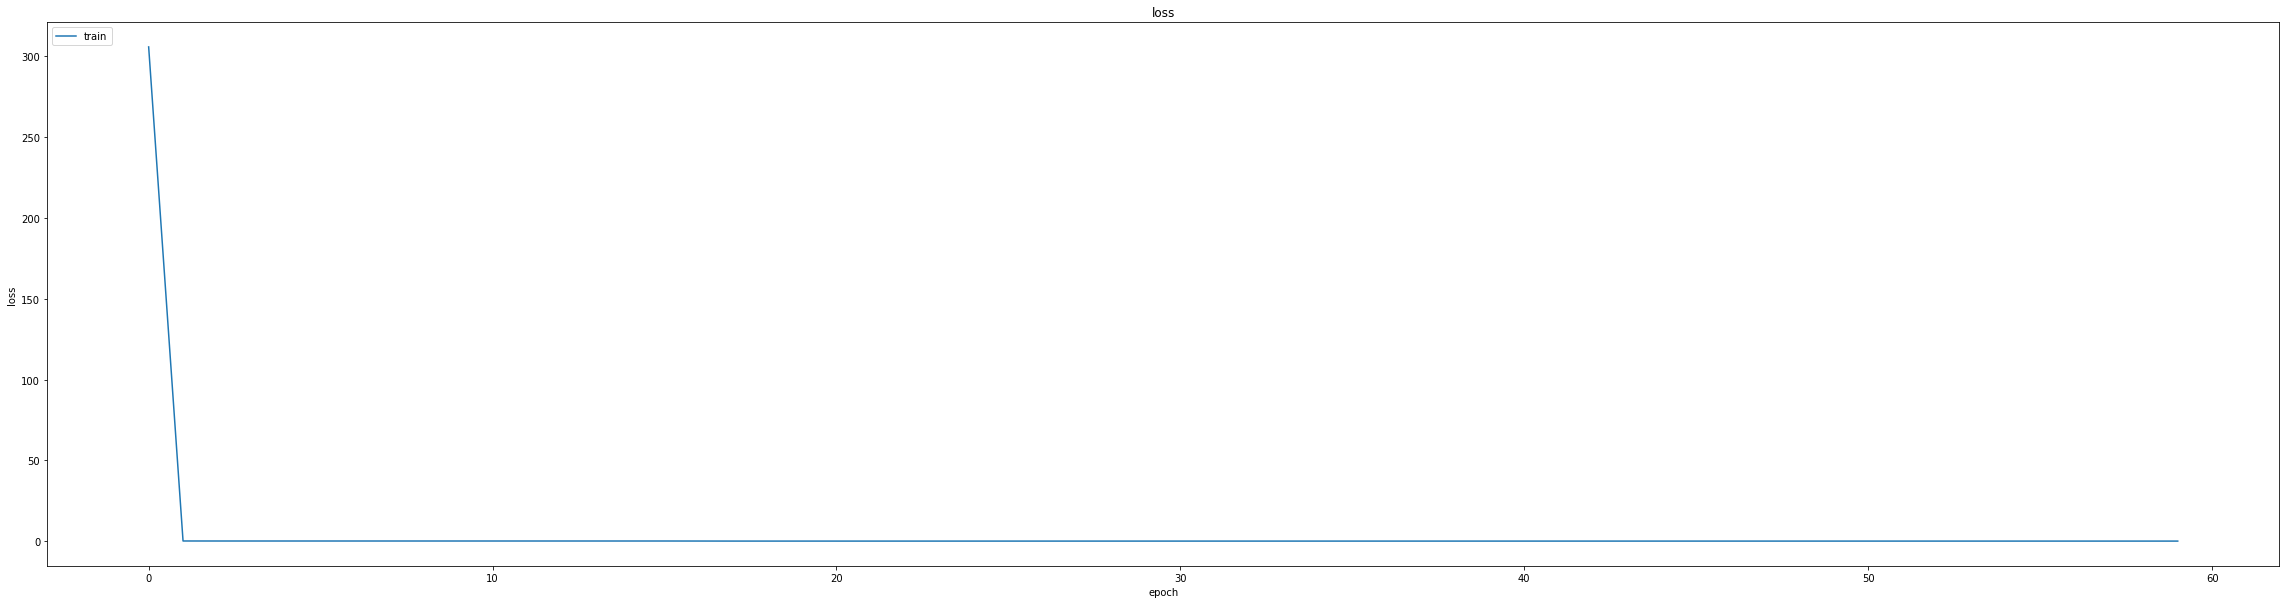

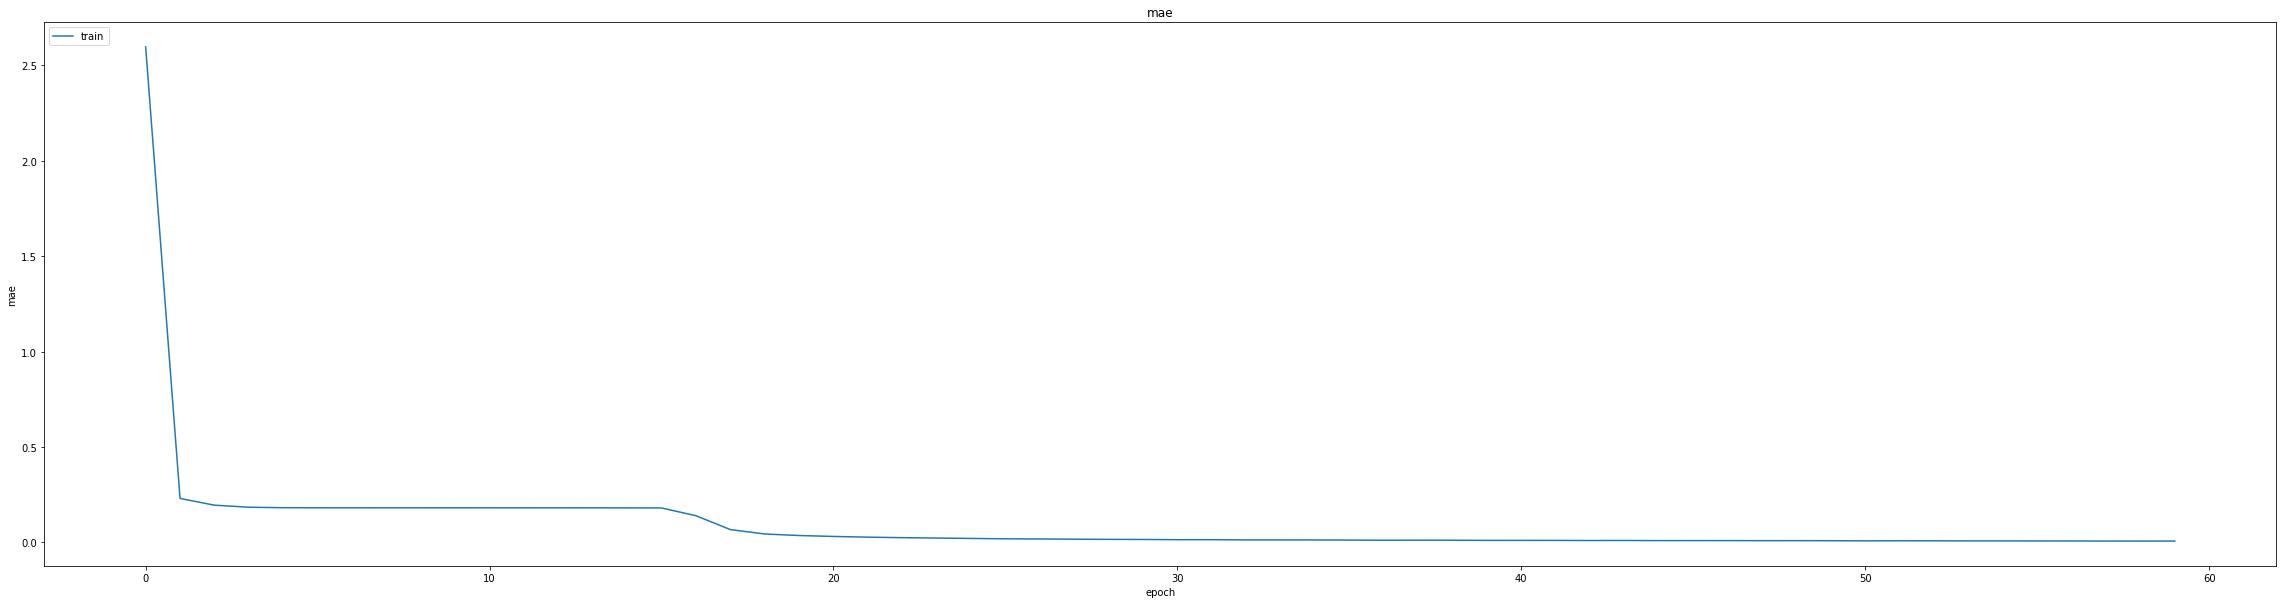

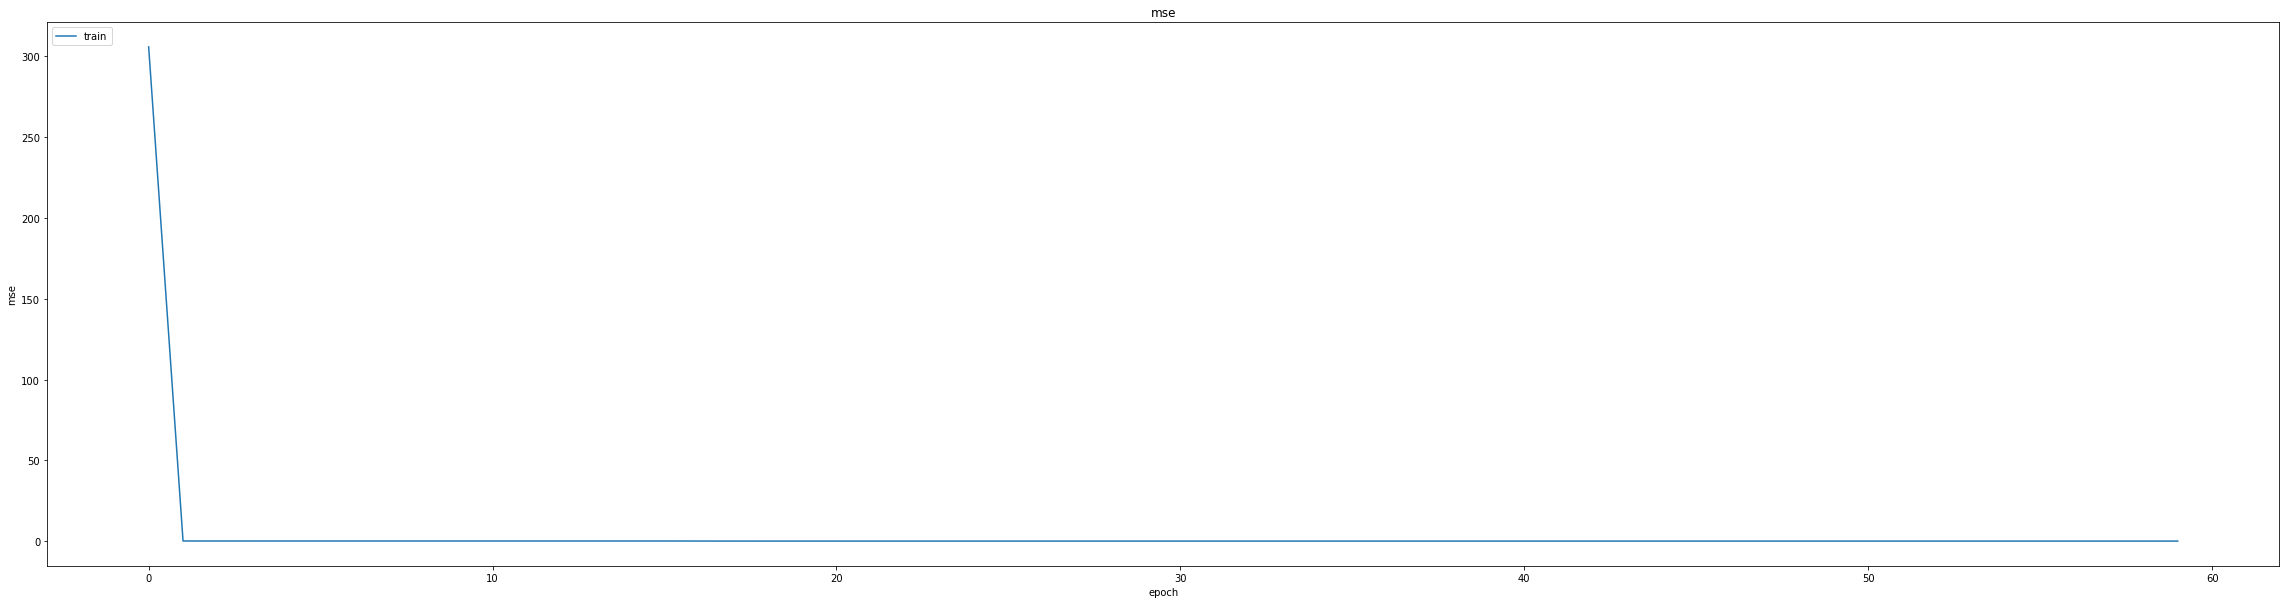

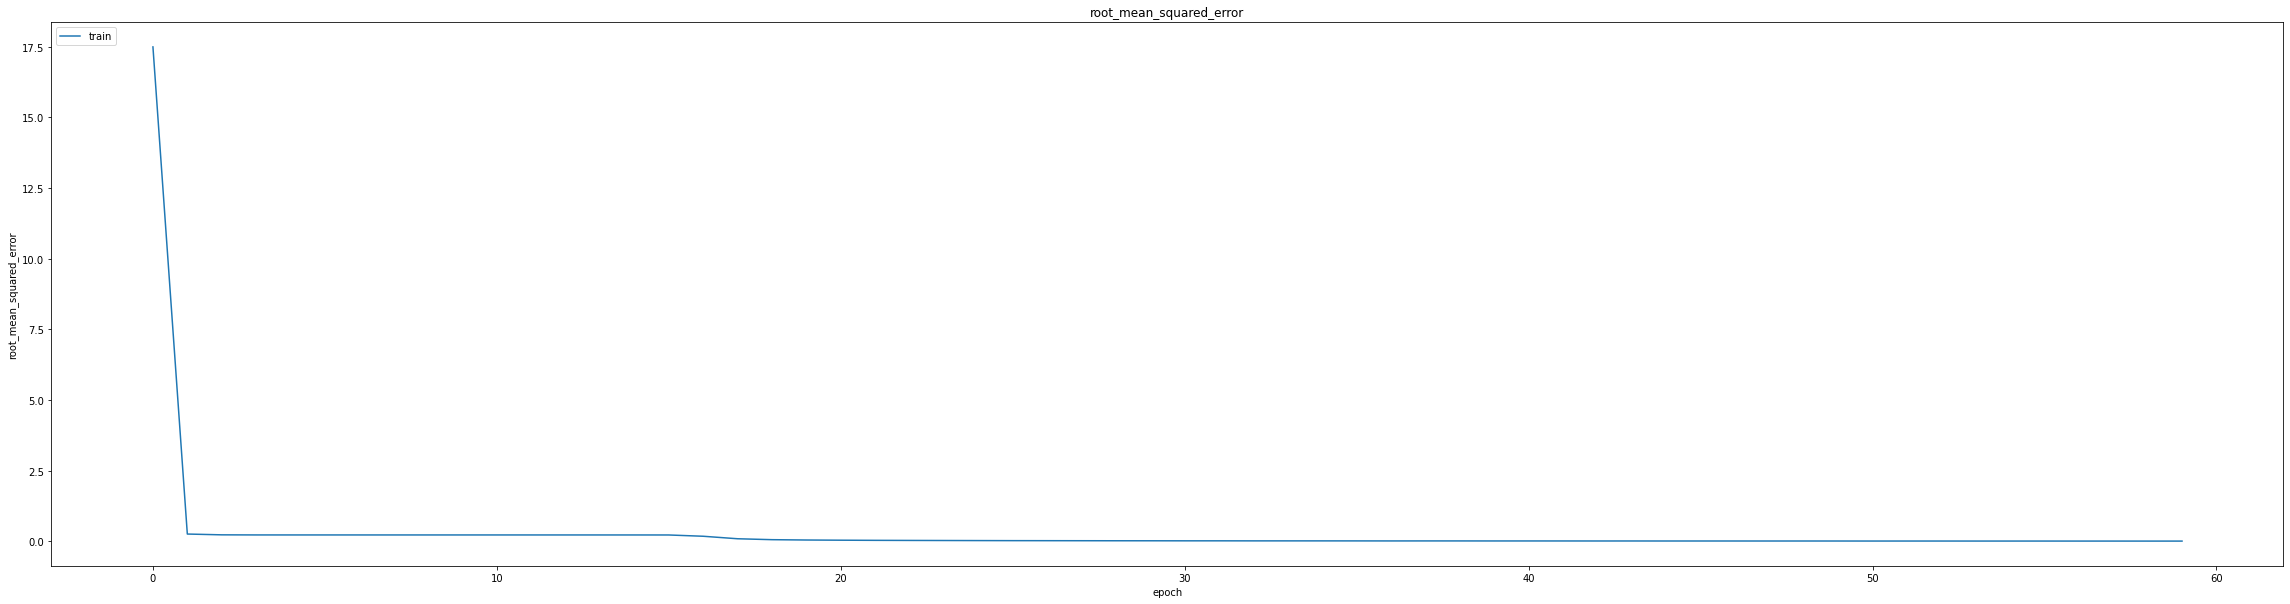

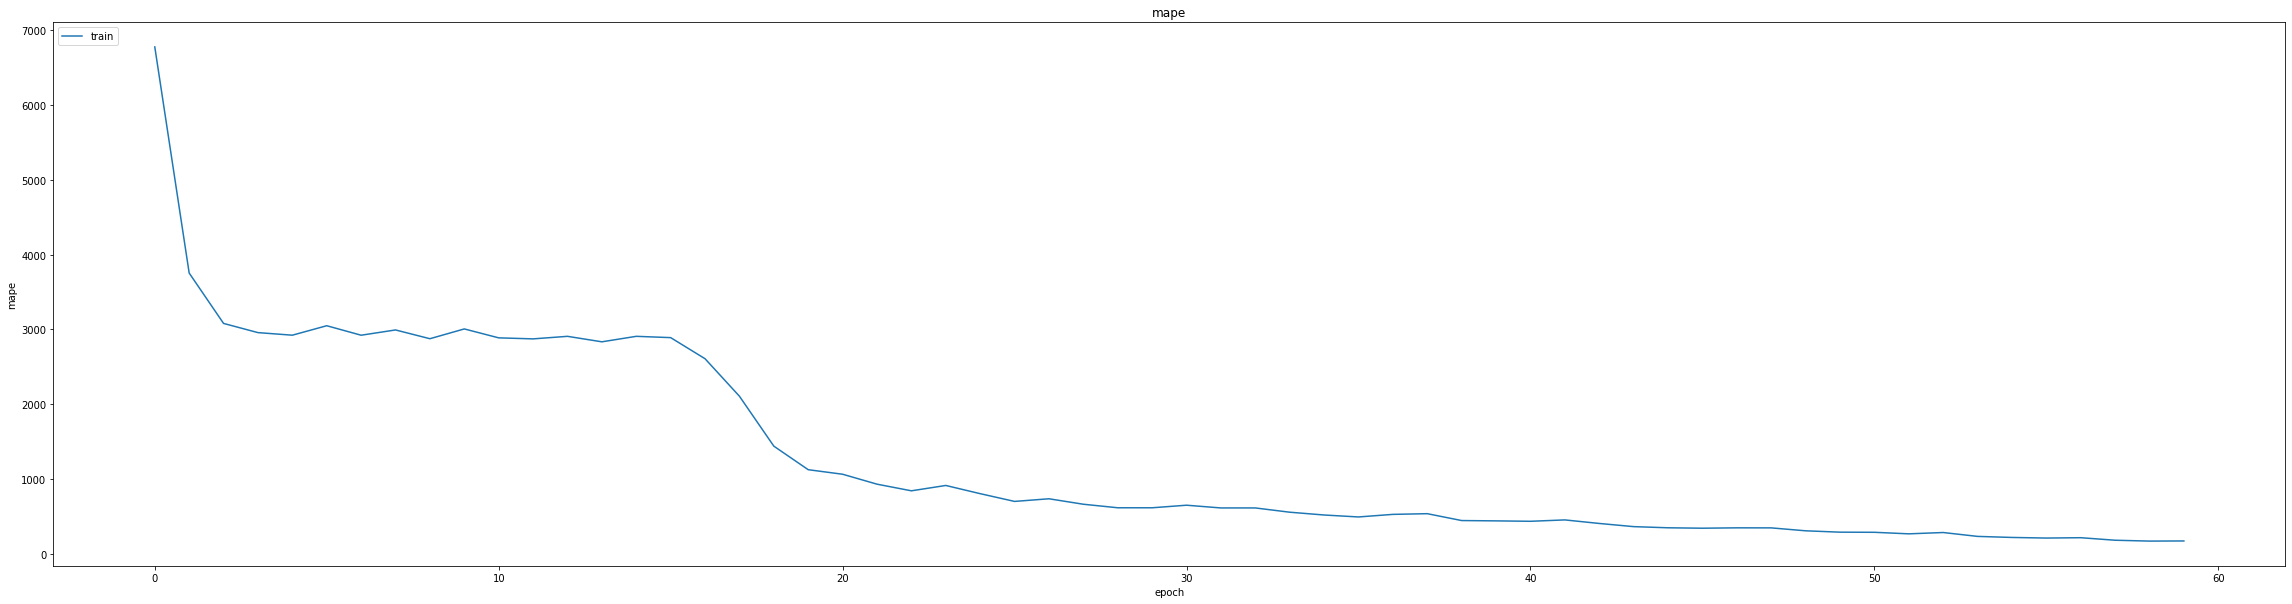

In [ ]:
thesis.SummarizeHistory(history)

In [ ]:
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
#print(min(histroy.history['val_mape']))
r2_scr = thesis.R_Squared_Score(model, x_val, y_val)
print(r2_scr)

0.010570523329079151
0.014715599827468395
1042/1042 [==============================] - 5s 4ms/step
0.9942483428770124


In [ ]:
model.load_weights("/content/drive/MyDrive/modelweights/CHF_USD_5min_GRU_LSTM(70-30)")
early_stopping = EarlyStopping(monitor='val_mse', patience=15)

In [ ]:

from keras.callbacks import LearningRateScheduler
import keras.backend as K

def scheduler(epoch):
    if epoch%2==0 and epoch!=0:
        lr = K.get_value(model.optimizer.lr)
        K.set_value(model.optimizer.lr, lr*.9)
        print("lr changed to {}".format(lr*.9))
    return K.get_value(model.optimizer.lr)
lr_decay = LearningRateScheduler(scheduler)

callbacks_list = [checkpoint, lr_decay, early_stopping]

Epochs=int(Epochs/3)

history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/20


404/405 [============================>.] - ETA: 0s - loss: 0.0017 - mae: 0.0172 - mse: 0.0017 - root_mean_squared_error: 0.0415 - mape: 592.3182
Epoch 1: val_mse improved from 0.00022 to 0.00018, saving model to /content/drive/MyDrive/modelweights/CHF_USD_5min_GRU_LSTM(70-30)


405/405 [==============================] - 23s 44ms/step - loss: 0.0017 - mae: 0.0172 - mse: 0.0017 - root_mean_squared_error: 0.0415 - mape: 591.9279 - val_loss: 1.7551e-04 - val_mae: 0.0094 - val_mse: 1.7551e-04 - val_root_mean_squared_error: 0.0132 - val_mape: 1240.6549 - lr: 0.0010
Epoch 2/20
403/405 [============================>.] - ETA: 0s - loss: 9.1759e-05 - mae: 0.0073 - mse: 9.1759e-05 - root_mean_squared_error: 0.0096 - mape: 267.2630
Epoch 2: val_mse did not improve from 0.00018
405/405 [==============================] - 7s 16ms/step - loss: 9.1706e-05 - mae: 0.0073 - mse: 9.1706e-05 - root_mean_squared_error: 0.0096 - mape: 266.4320 - val_loss: 1.8452e-04 - val_mae: 0.0100 - val_mse: 1.8452e-04 - val_root_mean_squared_error: 0.0136 - val_mape: 906.5386 - lr: 0.0010
lr changed to 0.0009000000427477062
Epoch 3/20
404/405 [============================>.] - ETA: 0s - loss: 8.5928e-05 - mae: 0.0071 - mse: 8.5928e-05 - root_mean_squared_error: 0.0093 - mape: 202.9572
Epoch 3: v

405/405 [==============================] - 17s 42ms/step - loss: 7.8756e-05 - mae: 0.0067 - mse: 7.8756e-05 - root_mean_squared_error: 0.0089 - mape: 175.0931 - val_loss: 1.7530e-04 - val_mae: 0.0100 - val_mse: 1.7530e-04 - val_root_mean_squared_error: 0.0132 - val_mape: 797.1038 - lr: 8.1000e-04
Epoch 6/20
403/405 [============================>.] - ETA: 0s - loss: 8.9052e-05 - mae: 0.0071 - mse: 8.9052e-05 - root_mean_squared_error: 0.0094 - mape: 179.8897
Epoch 6: val_mse did not improve from 0.00018
405/405 [==============================] - 7s 16ms/step - loss: 8.9102e-05 - mae: 0.0071 - mse: 8.9102e-05 - root_mean_squared_error: 0.0094 - mape: 179.3322 - val_loss: 4.6308e-04 - val_mae: 0.0188 - val_mse: 4.6308e-04 - val_root_mean_squared_error: 0.0215 - val_mape: 810.1099 - lr: 8.1000e-04
lr changed to 0.0007290000503417104
Epoch 7/20
404/405 [============================>.] - ETA: 0s - loss: 8.5900e-05 - mae: 0.0070 - mse: 8.5900e-05 - root_mean_squared_error: 0.0093 - mape: 181.

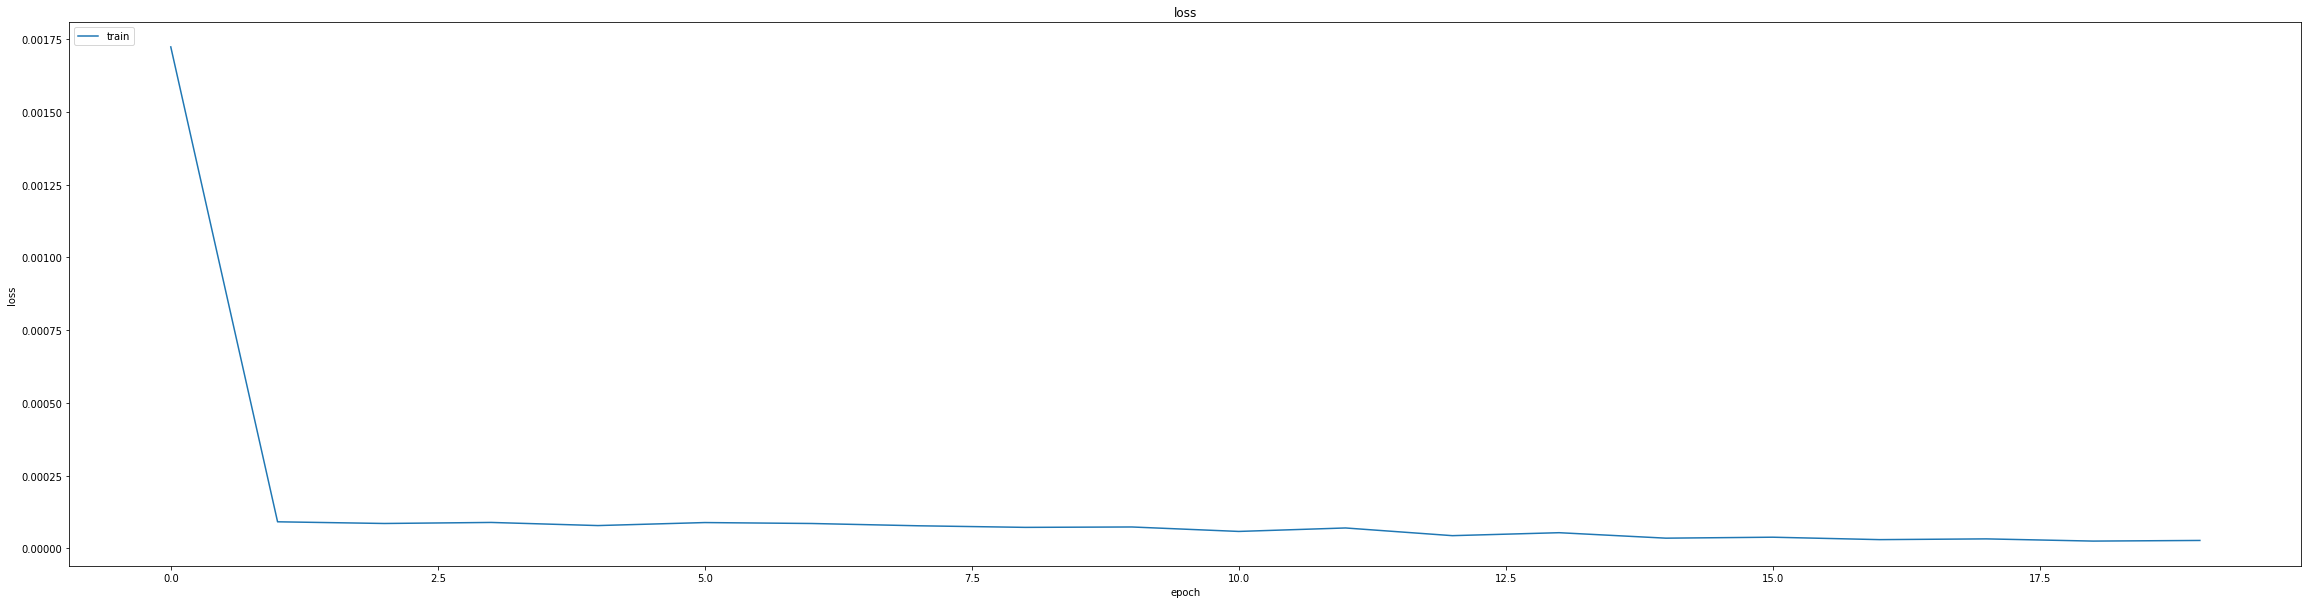

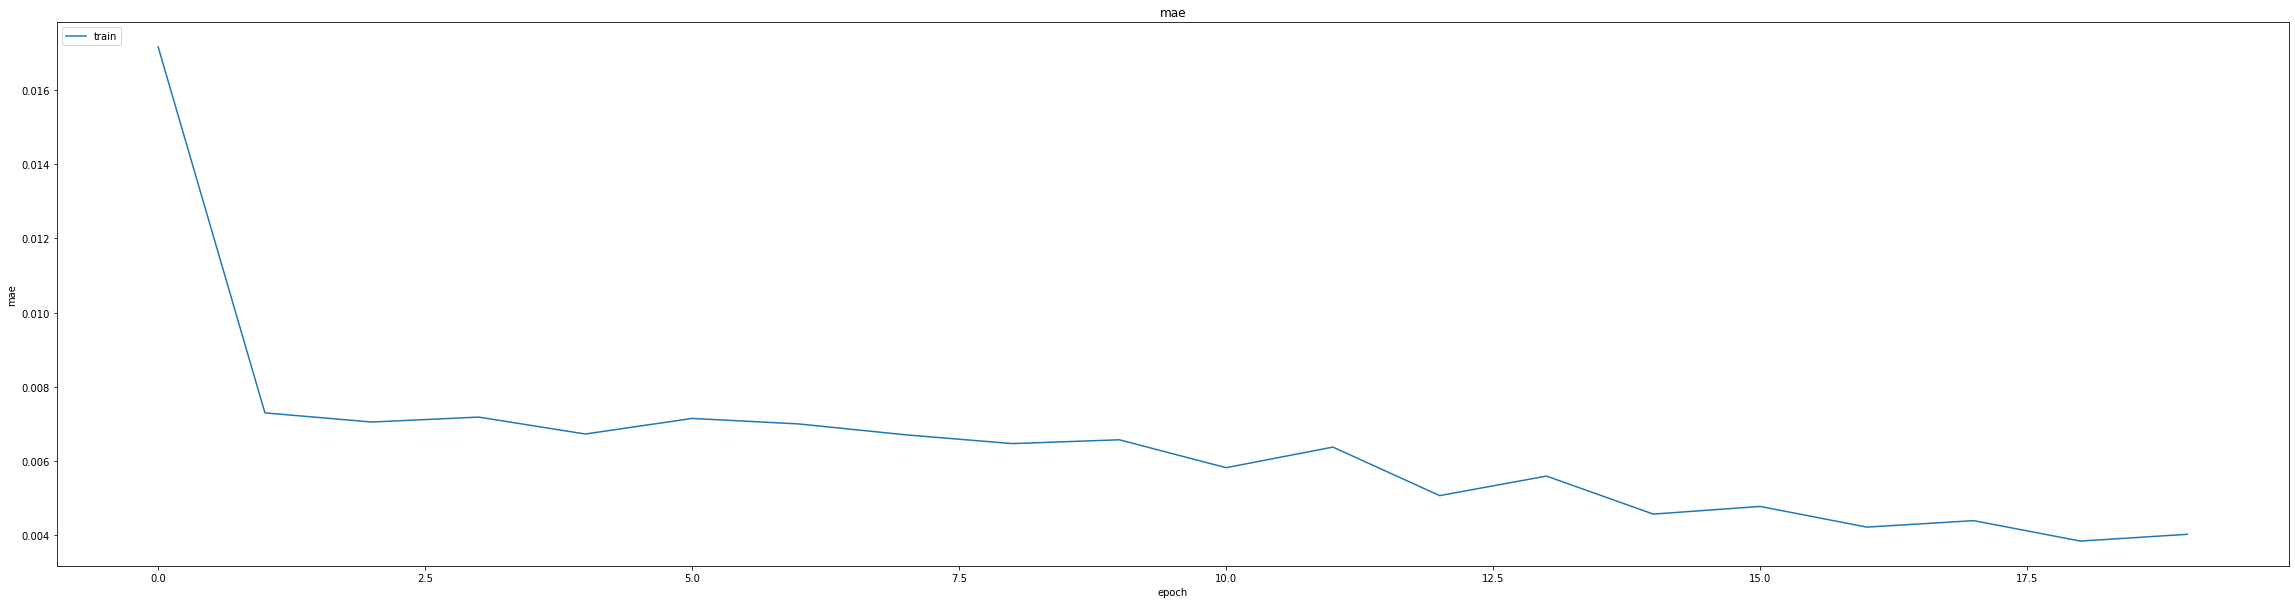

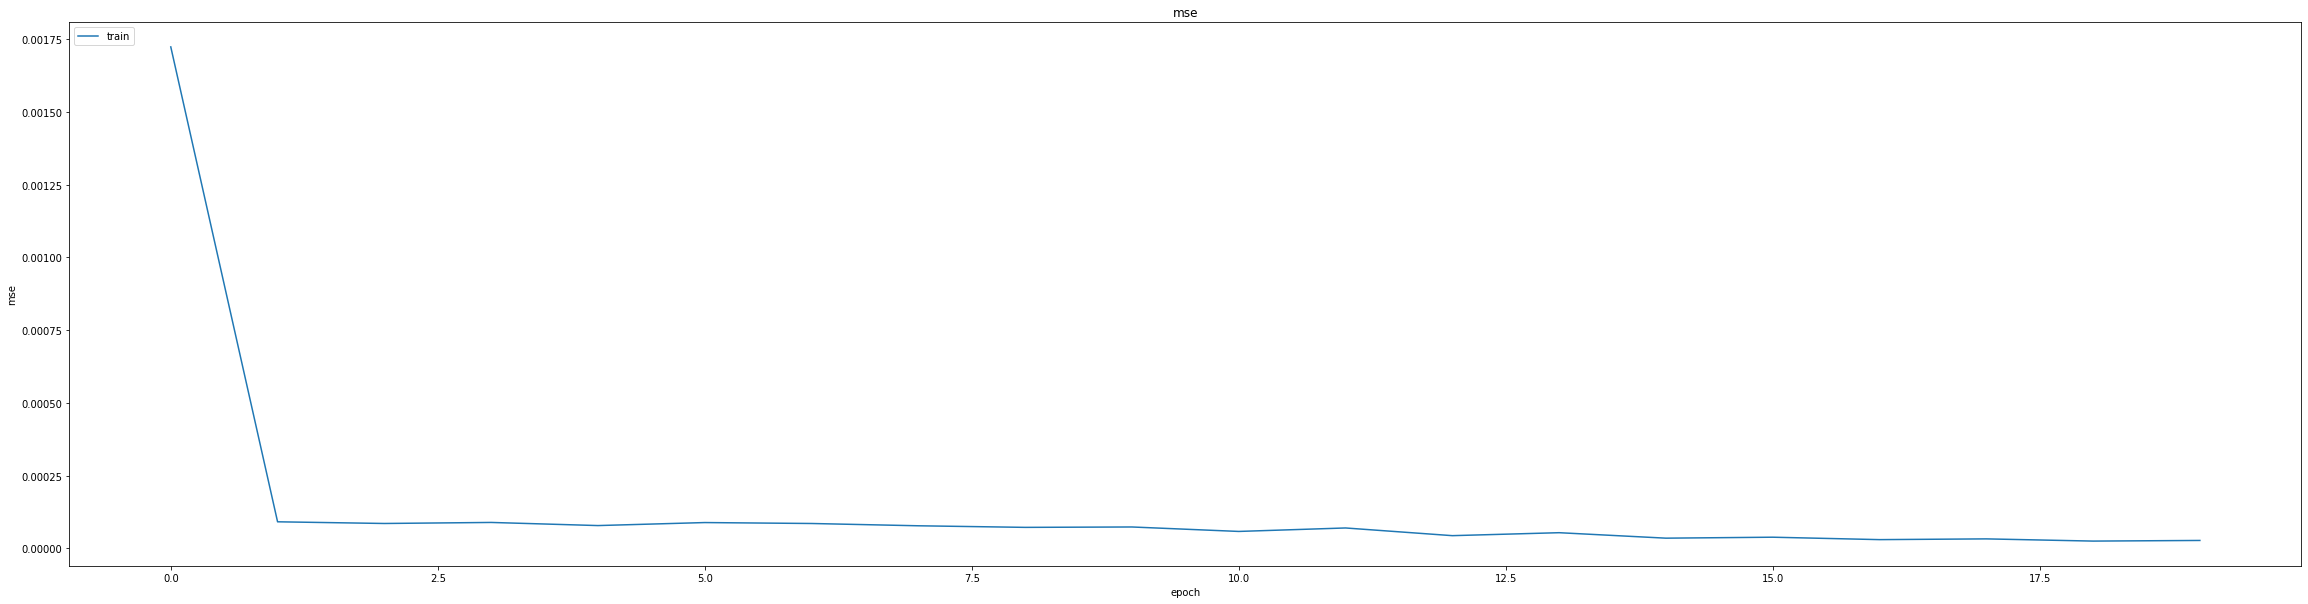

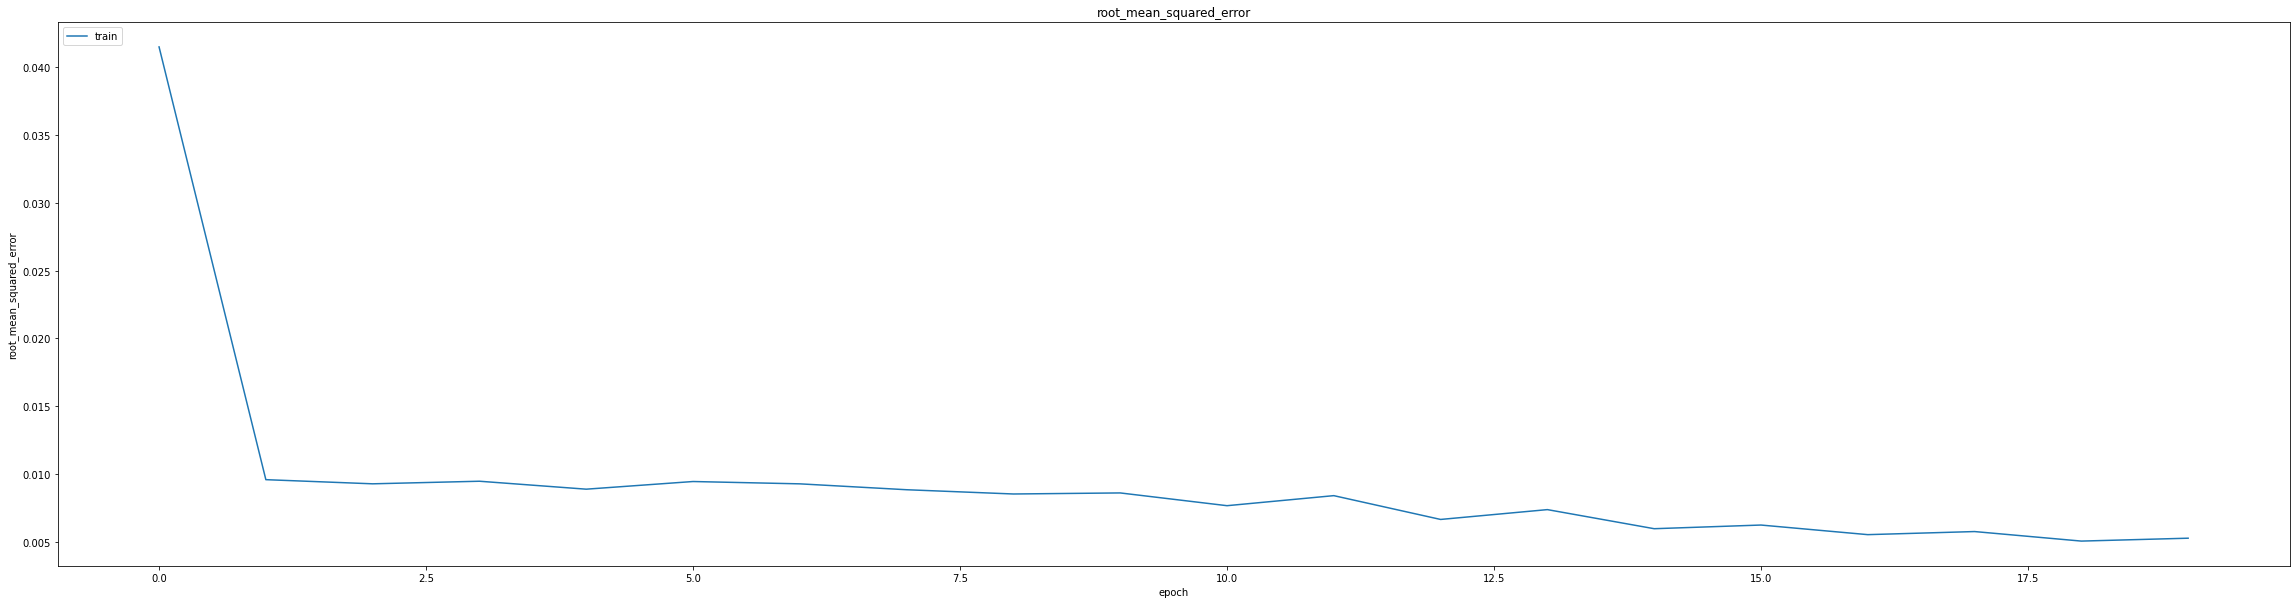

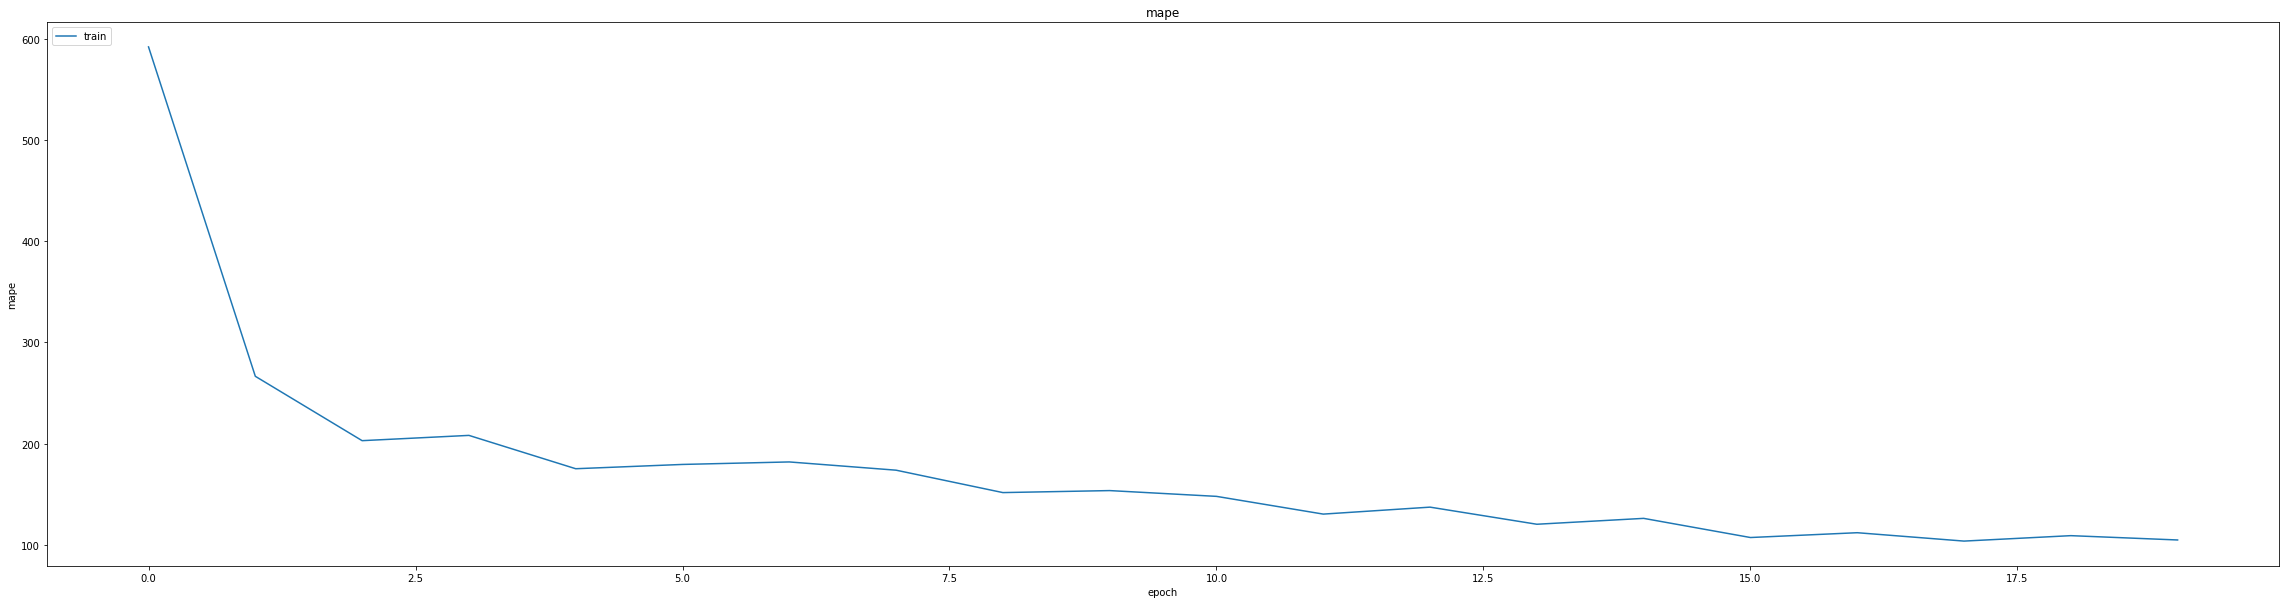

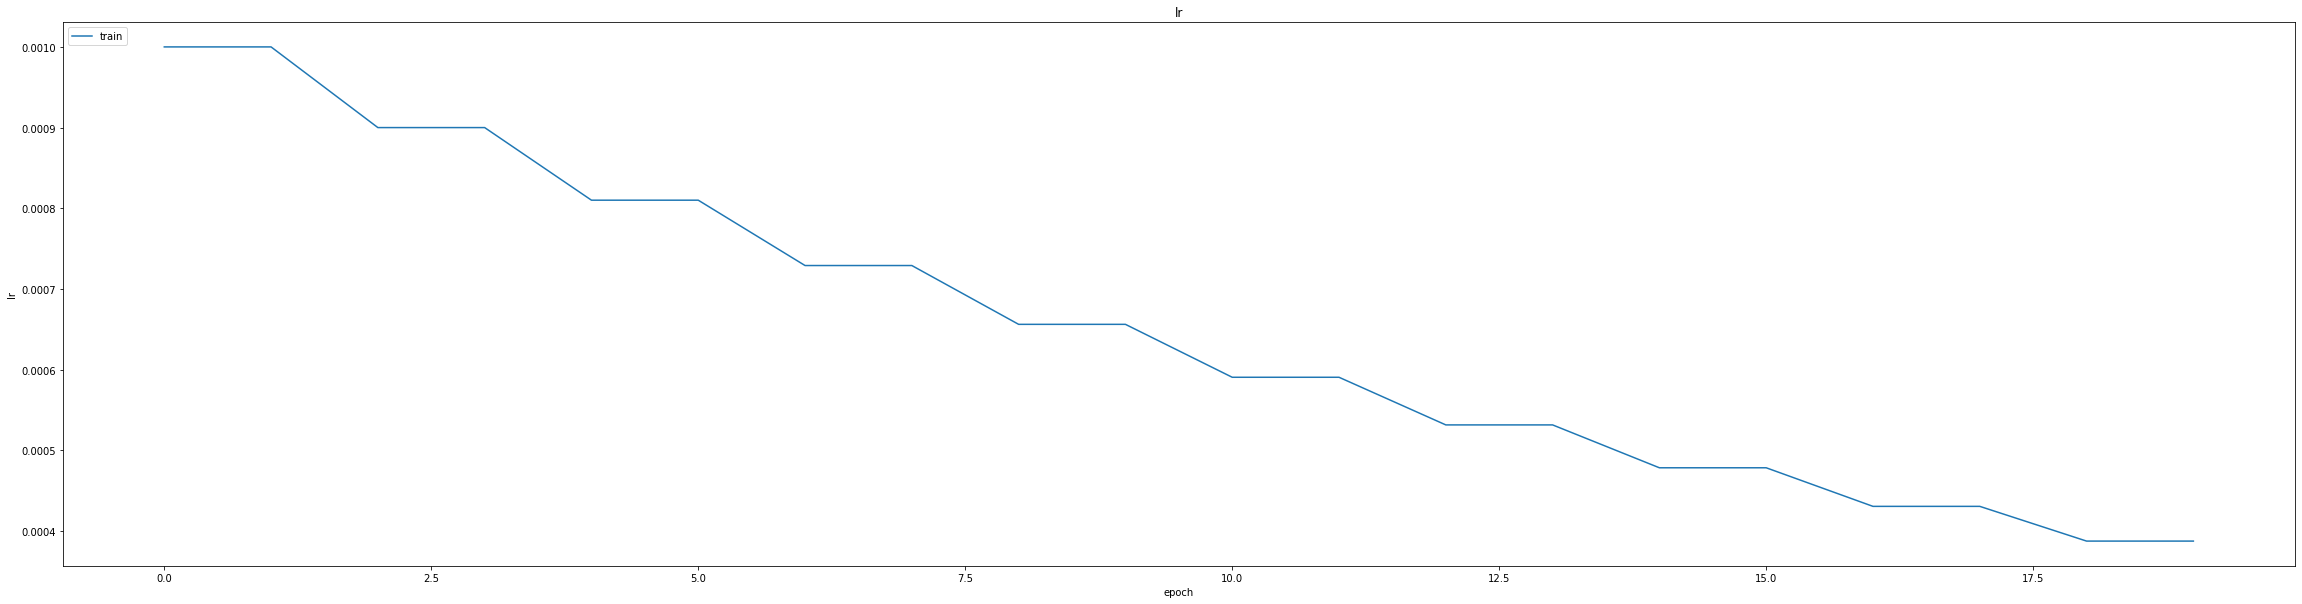

In [ ]:
thesis.SummarizeHistory(history)

In [ ]:
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
#print(min(histroy.history['val_mape']))
r2_scr = thesis.R_Squared_Score(model, x_val, y_val)
print(r2_scr)

0.00936854351311922
0.013239966705441475
1042/1042 [==============================] - 5s 4ms/step
0.9870636410876035


1042/1042 [==============================] - 4s 4ms/step


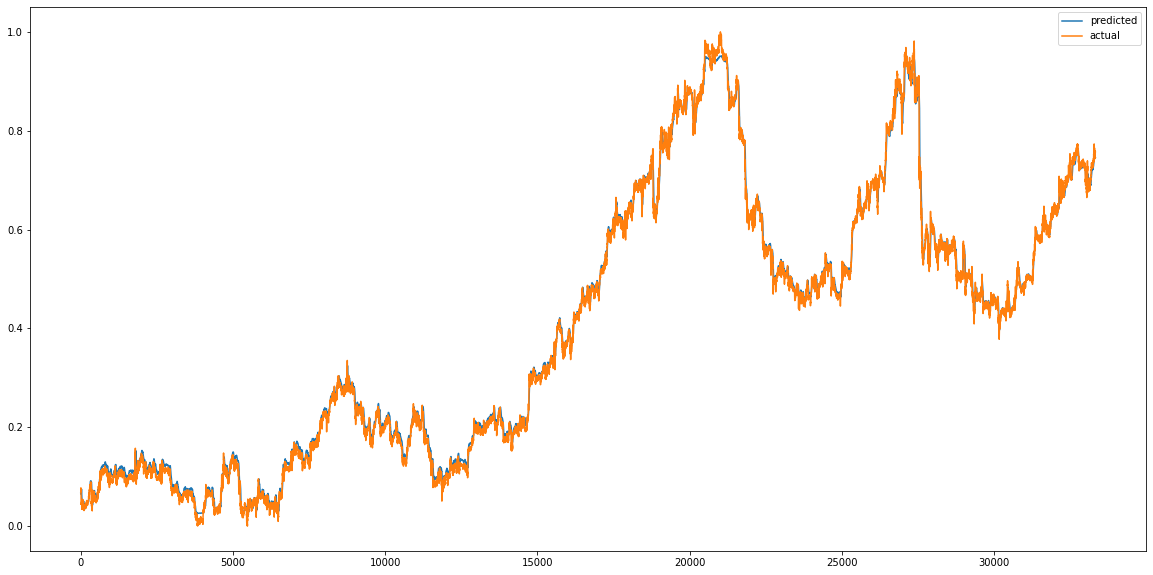

In [ ]:
model.load_weights("/content/drive/MyDrive/modelweights/CHF_USD_5min_GRU_LSTM(70-30)")
val_predictions=thesis.CreatPrediction(model,x_val, y_val)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


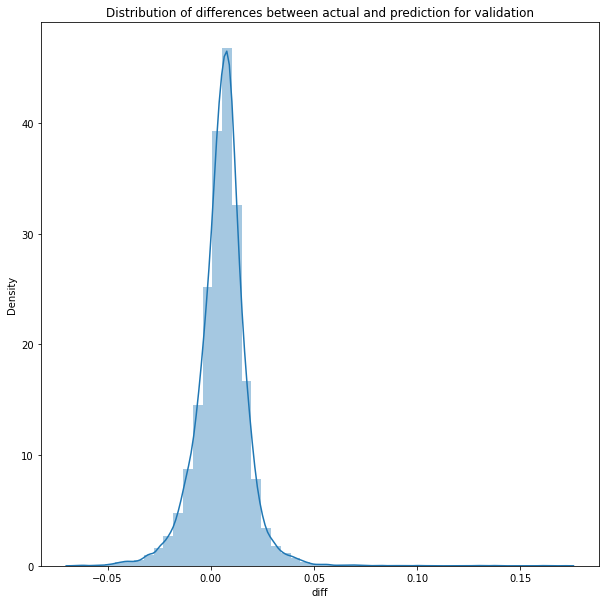

In [ ]:
val_predictions['diff'] = val_predictions['predicted'] - val_predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(val_predictions['diff']);
plt.title('Distribution of differences between actual and prediction for validation')
plt.show()

1042/1042 [==============================] - 4s 4ms/step


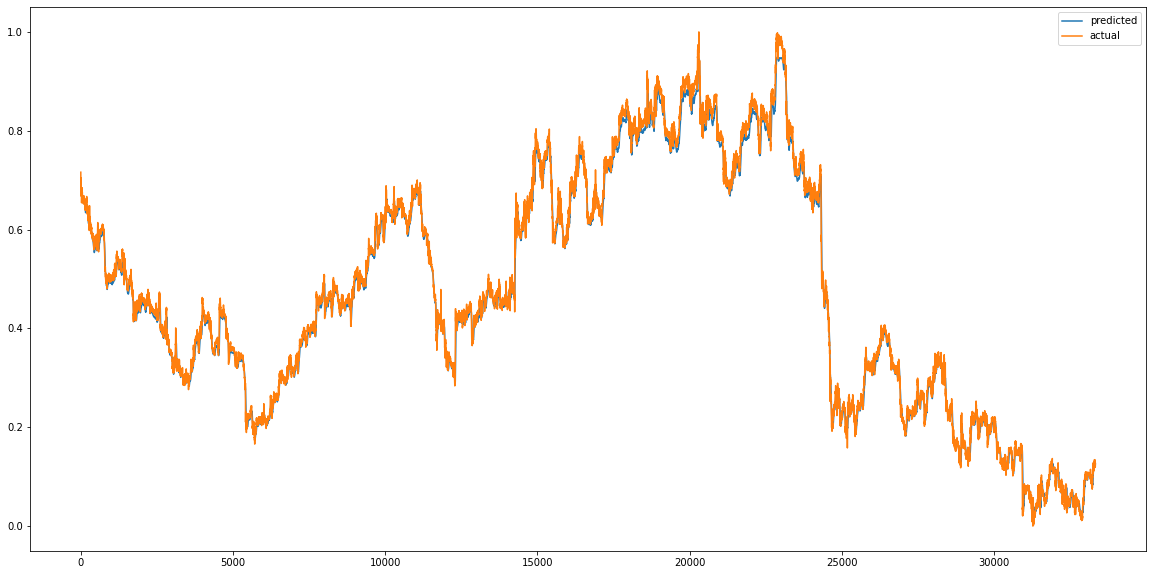

In [ ]:
predictions=thesis.CreatPrediction(model,x_test, y_test)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


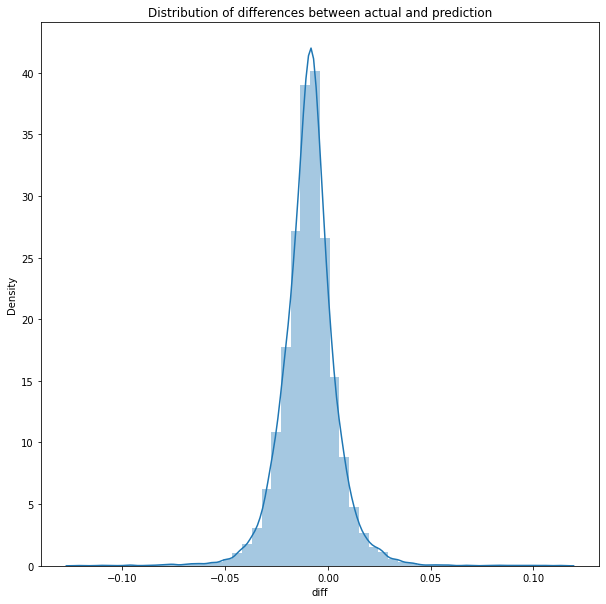

In [ ]:
predictions['diff'] = predictions['predicted'] - predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(predictions['diff']);
plt.title('Distribution of differences between actual and prediction')
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
print("MSE : ", mean_squared_error(predictions['predicted'].values, predictions['actual'].values))

from math import sqrt
print("RMSE : ", sqrt(mean_squared_error(predictions['predicted'].values, predictions['actual'].values)))

print("MAE : ", mean_absolute_error(predictions['predicted'].values, predictions['actual'].values))

test_r2_score=thesis.R_Squared_Score(model, x_test, y_test)
print('R2_Score  :', test_r2_score)
predictions['diff'].describe()

MSE :  0.00027046261357455587
RMSE :  0.01644574758332852
MAE :  0.012612424103312769
1042/1042 [==============================] - 4s 4ms/step
R2_Score  : 0.9953573269293949


count    33333.000000
mean        -0.009201
std          0.013632
min         -0.122224
25%         -0.016074
50%         -0.008954
75%         -0.002468
max          0.114413
Name: diff, dtype: float64

**CNN_BiLSTM_MODEL**

In [ ]:
model= thesis.CNN_BiLSTM_Model(x_train)
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 24, 64)            2368      
                                                                 
 bidirectional_2 (Bidirectio  (None, 24, 256)          197632    
 nal)                                                            
                                                                 
 dropout_2 (Dropout)         (None, 24, 256)           0         
                                                                 
 bidirectional_3 (Bidirectio  (None, 128)              164352    
 nal)                                                            
                                                                 
 dense_6 (Dense)             (None, 32)                4128      
                                                                 
 dense_7 (Dense)             (None, 16)               

In [ ]:
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping

# Set the metric you want to monitor, the threshold, and the patience value
early_stopping = EarlyStopping(monitor='val_mse', patience=30)

checkpoint = ModelCheckpoint("/content/drive/MyDrive/modelweights/CHF_USD_5min_CNN_BiLSTM(70-30)", monitor='val_mse', verbose=1, save_best_only=True, mode='min')

# Fit
callbacks_list = [checkpoint, early_stopping ]

Epochs=60
Batch_size=385
history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/60
405/405 [==============================] - ETA: 0s - loss: 193.7023 - mae: 1.7800 - mse: 193.7023 - root_mean_squared_error: 13.9177 - mape: 1571.2291
Epoch 1: val_mse improved from inf to 0.01489, saving model to /content/drive/MyDrive/modelweights/CHF_USD_5min_CNN_BiLSTM(70-30)


405/405 [==============================] - 39s 76ms/step - loss: 193.7023 - mae: 1.7800 - mse: 193.7023 - root_mean_squared_error: 13.9177 - mape: 1571.2291 - val_loss: 0.0149 - val_mae: 0.1030 - val_mse: 0.0149 - val_root_mean_squared_error: 0.1220 - val_mape: 6889.6025
Epoch 2/60
403/405 [============================>.] - ETA: 0s - loss: 0.0026 - mae: 0.0376 - mse: 0.0026 - root_mean_squared_error: 0.0506 - mape: 1261.3434
Epoch 2: val_mse improved from 0.01489 to 0.00282, saving model to /content/drive/MyDrive/modelweights/CHF_USD_5min_CNN_BiLSTM(70-30)


405/405 [==============================] - 30s 73ms/step - loss: 0.0026 - mae: 0.0376 - mse: 0.0026 - root_mean_squared_error: 0.0505 - mape: 1257.4355 - val_loss: 0.0028 - val_mae: 0.0390 - val_mse: 0.0028 - val_root_mean_squared_error: 0.0531 - val_mape: 4739.9570
Epoch 3/60
402/405 [============================>.] - ETA: 0s - loss: 0.0013 - mae: 0.0272 - mse: 0.0013 - root_mean_squared_error: 0.0361 - mape: 992.7487 
Epoch 3: val_mse improved from 0.00282 to 0.00162, saving model to /content/drive/MyDrive/modelweights/CHF_USD_5min_CNN_BiLSTM(70-30)


405/405 [==============================] - 29s 72ms/step - loss: 0.0013 - mae: 0.0272 - mse: 0.0013 - root_mean_squared_error: 0.0360 - mape: 987.2766 - val_loss: 0.0016 - val_mae: 0.0272 - val_mse: 0.0016 - val_root_mean_squared_error: 0.0402 - val_mape: 4134.3311
Epoch 4/60
404/405 [============================>.] - ETA: 0s - loss: 8.8492e-04 - mae: 0.0224 - mse: 8.8492e-04 - root_mean_squared_error: 0.0297 - mape: 728.4665
Epoch 4: val_mse improved from 0.00162 to 0.00118, saving model to /content/drive/MyDrive/modelweights/CHF_USD_5min_CNN_BiLSTM(70-30)


405/405 [==============================] - 29s 72ms/step - loss: 8.8511e-04 - mae: 0.0224 - mse: 8.8511e-04 - root_mean_squared_error: 0.0298 - mape: 727.9905 - val_loss: 0.0012 - val_mae: 0.0243 - val_mse: 0.0012 - val_root_mean_squared_error: 0.0344 - val_mape: 3614.5195
Epoch 5/60
403/405 [============================>.] - ETA: 0s - loss: 6.9168e-04 - mae: 0.0198 - mse: 6.9168e-04 - root_mean_squared_error: 0.0263 - mape: 744.1170
Epoch 5: val_mse improved from 0.00118 to 0.00100, saving model to /content/drive/MyDrive/modelweights/CHF_USD_5min_CNN_BiLSTM(70-30)


405/405 [==============================] - 30s 74ms/step - loss: 6.9131e-04 - mae: 0.0198 - mse: 6.9131e-04 - root_mean_squared_error: 0.0263 - mape: 741.8032 - val_loss: 9.9706e-04 - val_mae: 0.0230 - val_mse: 9.9706e-04 - val_root_mean_squared_error: 0.0316 - val_mape: 3269.4280
Epoch 6/60
402/405 [============================>.] - ETA: 0s - loss: 5.5504e-04 - mae: 0.0177 - mse: 5.5504e-04 - root_mean_squared_error: 0.0236 - mape: 636.1917
Epoch 6: val_mse improved from 0.00100 to 0.00077, saving model to /content/drive/MyDrive/modelweights/CHF_USD_5min_CNN_BiLSTM(70-30)


405/405 [==============================] - 30s 74ms/step - loss: 5.5485e-04 - mae: 0.0177 - mse: 5.5485e-04 - root_mean_squared_error: 0.0236 - mape: 632.6667 - val_loss: 7.6743e-04 - val_mae: 0.0206 - val_mse: 7.6743e-04 - val_root_mean_squared_error: 0.0277 - val_mape: 3066.4731
Epoch 7/60
403/405 [============================>.] - ETA: 0s - loss: 4.6217e-04 - mae: 0.0162 - mse: 4.6217e-04 - root_mean_squared_error: 0.0215 - mape: 644.1445
Epoch 7: val_mse improved from 0.00077 to 0.00075, saving model to /content/drive/MyDrive/modelweights/CHF_USD_5min_CNN_BiLSTM(70-30)


405/405 [==============================] - 29s 72ms/step - loss: 4.6194e-04 - mae: 0.0162 - mse: 4.6194e-04 - root_mean_squared_error: 0.0215 - mape: 642.1434 - val_loss: 7.5378e-04 - val_mae: 0.0202 - val_mse: 7.5378e-04 - val_root_mean_squared_error: 0.0275 - val_mape: 2860.2266
Epoch 8/60
402/405 [============================>.] - ETA: 0s - loss: 3.9820e-04 - mae: 0.0151 - mse: 3.9820e-04 - root_mean_squared_error: 0.0200 - mape: 673.7461
Epoch 8: val_mse improved from 0.00075 to 0.00057, saving model to /content/drive/MyDrive/modelweights/CHF_USD_5min_CNN_BiLSTM(70-30)


405/405 [==============================] - 30s 73ms/step - loss: 3.9805e-04 - mae: 0.0151 - mse: 3.9805e-04 - root_mean_squared_error: 0.0200 - mape: 670.0075 - val_loss: 5.7373e-04 - val_mae: 0.0180 - val_mse: 5.7373e-04 - val_root_mean_squared_error: 0.0240 - val_mape: 2707.5295
Epoch 9/60
402/405 [============================>.] - ETA: 0s - loss: 3.4372e-04 - mae: 0.0141 - mse: 3.4372e-04 - root_mean_squared_error: 0.0185 - mape: 510.2053
Epoch 9: val_mse improved from 0.00057 to 0.00054, saving model to /content/drive/MyDrive/modelweights/CHF_USD_5min_CNN_BiLSTM(70-30)


405/405 [==============================] - 29s 72ms/step - loss: 3.4349e-04 - mae: 0.0140 - mse: 3.4349e-04 - root_mean_squared_error: 0.0185 - mape: 507.3721 - val_loss: 5.4304e-04 - val_mae: 0.0176 - val_mse: 5.4304e-04 - val_root_mean_squared_error: 0.0233 - val_mape: 2568.9690
Epoch 10/60
404/405 [============================>.] - ETA: 0s - loss: 3.0407e-04 - mae: 0.0132 - mse: 3.0407e-04 - root_mean_squared_error: 0.0174 - mape: 547.5675
Epoch 10: val_mse improved from 0.00054 to 0.00049, saving model to /content/drive/MyDrive/modelweights/CHF_USD_5min_CNN_BiLSTM(70-30)


405/405 [==============================] - 29s 72ms/step - loss: 3.0406e-04 - mae: 0.0132 - mse: 3.0406e-04 - root_mean_squared_error: 0.0174 - mape: 547.2078 - val_loss: 4.9124e-04 - val_mae: 0.0169 - val_mse: 4.9124e-04 - val_root_mean_squared_error: 0.0222 - val_mape: 2438.4138
Epoch 11/60
403/405 [============================>.] - ETA: 0s - loss: 2.6846e-04 - mae: 0.0125 - mse: 2.6846e-04 - root_mean_squared_error: 0.0164 - mape: 472.2886
Epoch 11: val_mse improved from 0.00049 to 0.00045, saving model to /content/drive/MyDrive/modelweights/CHF_USD_5min_CNN_BiLSTM(70-30)


405/405 [==============================] - 30s 74ms/step - loss: 2.6840e-04 - mae: 0.0125 - mse: 2.6840e-04 - root_mean_squared_error: 0.0164 - mape: 470.8202 - val_loss: 4.4967e-04 - val_mae: 0.0170 - val_mse: 4.4967e-04 - val_root_mean_squared_error: 0.0212 - val_mape: 2327.8481
Epoch 12/60
402/405 [============================>.] - ETA: 0s - loss: 2.3991e-04 - mae: 0.0118 - mse: 2.3991e-04 - root_mean_squared_error: 0.0155 - mape: 503.6677
Epoch 12: val_mse improved from 0.00045 to 0.00038, saving model to /content/drive/MyDrive/modelweights/CHF_USD_5min_CNN_BiLSTM(70-30)


405/405 [==============================] - 29s 73ms/step - loss: 2.3990e-04 - mae: 0.0118 - mse: 2.3990e-04 - root_mean_squared_error: 0.0155 - mape: 500.8683 - val_loss: 3.8165e-04 - val_mae: 0.0151 - val_mse: 3.8165e-04 - val_root_mean_squared_error: 0.0195 - val_mape: 2213.5474
Epoch 13/60
405/405 [==============================] - ETA: 0s - loss: 2.1939e-04 - mae: 0.0113 - mse: 2.1939e-04 - root_mean_squared_error: 0.0148 - mape: 435.3808
Epoch 13: val_mse improved from 0.00038 to 0.00036, saving model to /content/drive/MyDrive/modelweights/CHF_USD_5min_CNN_BiLSTM(70-30)


405/405 [==============================] - 29s 73ms/step - loss: 2.1939e-04 - mae: 0.0113 - mse: 2.1939e-04 - root_mean_squared_error: 0.0148 - mape: 435.3808 - val_loss: 3.6232e-04 - val_mae: 0.0149 - val_mse: 3.6232e-04 - val_root_mean_squared_error: 0.0190 - val_mape: 2124.1926
Epoch 14/60
402/405 [============================>.] - ETA: 0s - loss: 2.0076e-04 - mae: 0.0108 - mse: 2.0076e-04 - root_mean_squared_error: 0.0142 - mape: 435.1617
Epoch 14: val_mse improved from 0.00036 to 0.00036, saving model to /content/drive/MyDrive/modelweights/CHF_USD_5min_CNN_BiLSTM(70-30)


405/405 [==============================] - 30s 74ms/step - loss: 2.0094e-04 - mae: 0.0108 - mse: 2.0094e-04 - root_mean_squared_error: 0.0142 - mape: 432.7478 - val_loss: 3.5508e-04 - val_mae: 0.0149 - val_mse: 3.5508e-04 - val_root_mean_squared_error: 0.0188 - val_mape: 2045.2999
Epoch 15/60
405/405 [==============================] - ETA: 0s - loss: 1.8441e-04 - mae: 0.0104 - mse: 1.8441e-04 - root_mean_squared_error: 0.0136 - mape: 375.6860
Epoch 15: val_mse did not improve from 0.00036
405/405 [==============================] - 8s 19ms/step - loss: 1.8441e-04 - mae: 0.0104 - mse: 1.8441e-04 - root_mean_squared_error: 0.0136 - mape: 375.6860 - val_loss: 4.3817e-04 - val_mae: 0.0180 - val_mse: 4.3817e-04 - val_root_mean_squared_error: 0.0209 - val_mape: 1974.3093
Epoch 16/60
404/405 [============================>.] - ETA: 0s - loss: 1.7354e-04 - mae: 0.0101 - mse: 1.7354e-04 - root_mean_squared_error: 0.0132 - mape: 416.5338
Epoch 16: val_mse improved from 0.00036 to 0.00035, saving m

405/405 [==============================] - 29s 72ms/step - loss: 1.7351e-04 - mae: 0.0101 - mse: 1.7351e-04 - root_mean_squared_error: 0.0132 - mape: 416.2596 - val_loss: 3.4720e-04 - val_mae: 0.0152 - val_mse: 3.4720e-04 - val_root_mean_squared_error: 0.0186 - val_mape: 1896.6005
Epoch 17/60
404/405 [============================>.] - ETA: 0s - loss: 1.5888e-04 - mae: 0.0097 - mse: 1.5888e-04 - root_mean_squared_error: 0.0126 - mape: 332.1564
Epoch 17: val_mse improved from 0.00035 to 0.00030, saving model to /content/drive/MyDrive/modelweights/CHF_USD_5min_CNN_BiLSTM(70-30)


405/405 [==============================] - 29s 73ms/step - loss: 1.5889e-04 - mae: 0.0097 - mse: 1.5889e-04 - root_mean_squared_error: 0.0126 - mape: 331.9397 - val_loss: 3.0183e-04 - val_mae: 0.0137 - val_mse: 3.0183e-04 - val_root_mean_squared_error: 0.0174 - val_mape: 1825.6620
Epoch 18/60
405/405 [==============================] - ETA: 0s - loss: 1.4616e-04 - mae: 0.0093 - mse: 1.4616e-04 - root_mean_squared_error: 0.0121 - mape: 397.4179
Epoch 18: val_mse did not improve from 0.00030
405/405 [==============================] - 8s 19ms/step - loss: 1.4616e-04 - mae: 0.0093 - mse: 1.4616e-04 - root_mean_squared_error: 0.0121 - mape: 397.4179 - val_loss: 3.0656e-04 - val_mae: 0.0141 - val_mse: 3.0656e-04 - val_root_mean_squared_error: 0.0175 - val_mape: 1763.6166
Epoch 19/60
402/405 [============================>.] - ETA: 0s - loss: 1.3760e-04 - mae: 0.0090 - mse: 1.3760e-04 - root_mean_squared_error: 0.0117 - mape: 359.1718
Epoch 19: val_mse did not improve from 0.00030
405/405 [====

405/405 [==============================] - 29s 72ms/step - loss: 1.1365e-04 - mae: 0.0082 - mse: 1.1365e-04 - root_mean_squared_error: 0.0107 - mape: 352.6429 - val_loss: 2.7648e-04 - val_mae: 0.0136 - val_mse: 2.7648e-04 - val_root_mean_squared_error: 0.0166 - val_mape: 1534.1300
Epoch 23/60
403/405 [============================>.] - ETA: 0s - loss: 1.0682e-04 - mae: 0.0079 - mse: 1.0682e-04 - root_mean_squared_error: 0.0103 - mape: 329.7191
Epoch 23: val_mse did not improve from 0.00028
405/405 [==============================] - 8s 19ms/step - loss: 1.0684e-04 - mae: 0.0079 - mse: 1.0684e-04 - root_mean_squared_error: 0.0103 - mape: 328.6945 - val_loss: 3.0702e-04 - val_mae: 0.0149 - val_mse: 3.0702e-04 - val_root_mean_squared_error: 0.0175 - val_mape: 1488.0906
Epoch 24/60
404/405 [============================>.] - ETA: 0s - loss: 1.0119e-04 - mae: 0.0077 - mse: 1.0119e-04 - root_mean_squared_error: 0.0101 - mape: 263.1900
Epoch 24: val_mse did not improve from 0.00028
405/405 [====

405/405 [==============================] - 30s 73ms/step - loss: 8.4069e-05 - mae: 0.0071 - mse: 8.4069e-05 - root_mean_squared_error: 0.0092 - mape: 279.3668 - val_loss: 2.6143e-04 - val_mae: 0.0136 - val_mse: 2.6143e-04 - val_root_mean_squared_error: 0.0162 - val_mape: 1312.3026
Epoch 28/60
403/405 [============================>.] - ETA: 0s - loss: 8.0373e-05 - mae: 0.0069 - mse: 8.0373e-05 - root_mean_squared_error: 0.0090 - mape: 234.8011
Epoch 28: val_mse did not improve from 0.00026
405/405 [==============================] - 8s 19ms/step - loss: 8.0352e-05 - mae: 0.0069 - mse: 8.0352e-05 - root_mean_squared_error: 0.0090 - mape: 234.0713 - val_loss: 3.0977e-04 - val_mae: 0.0154 - val_mse: 3.0977e-04 - val_root_mean_squared_error: 0.0176 - val_mape: 1273.9321
Epoch 29/60
403/405 [============================>.] - ETA: 0s - loss: 7.4605e-05 - mae: 0.0067 - mse: 7.4605e-05 - root_mean_squared_error: 0.0086 - mape: 272.9201
Epoch 29: val_mse improved from 0.00026 to 0.00026, saving m

405/405 [==============================] - 30s 73ms/step - loss: 7.4580e-05 - mae: 0.0067 - mse: 7.4580e-05 - root_mean_squared_error: 0.0086 - mape: 272.0708 - val_loss: 2.6088e-04 - val_mae: 0.0137 - val_mse: 2.6088e-04 - val_root_mean_squared_error: 0.0162 - val_mape: 1229.7883
Epoch 30/60
403/405 [============================>.] - ETA: 0s - loss: 7.2413e-05 - mae: 0.0066 - mse: 7.2413e-05 - root_mean_squared_error: 0.0085 - mape: 246.4276
Epoch 30: val_mse improved from 0.00026 to 0.00025, saving model to /content/drive/MyDrive/modelweights/CHF_USD_5min_CNN_BiLSTM(70-30)


405/405 [==============================] - 29s 73ms/step - loss: 7.2385e-05 - mae: 0.0066 - mse: 7.2385e-05 - root_mean_squared_error: 0.0085 - mape: 245.6615 - val_loss: 2.4723e-04 - val_mae: 0.0132 - val_mse: 2.4723e-04 - val_root_mean_squared_error: 0.0157 - val_mape: 1196.7607
Epoch 31/60
403/405 [============================>.] - ETA: 0s - loss: 7.0819e-05 - mae: 0.0065 - mse: 7.0819e-05 - root_mean_squared_error: 0.0084 - mape: 248.0126
Epoch 31: val_mse did not improve from 0.00025
405/405 [==============================] - 8s 19ms/step - loss: 7.0774e-05 - mae: 0.0065 - mse: 7.0774e-05 - root_mean_squared_error: 0.0084 - mape: 247.2409 - val_loss: 2.8496e-04 - val_mae: 0.0146 - val_mse: 2.8496e-04 - val_root_mean_squared_error: 0.0169 - val_mape: 1170.8947
Epoch 32/60
404/405 [============================>.] - ETA: 0s - loss: 6.3582e-05 - mae: 0.0062 - mse: 6.3582e-05 - root_mean_squared_error: 0.0080 - mape: 236.2935
Epoch 32: val_mse did not improve from 0.00025
405/405 [====

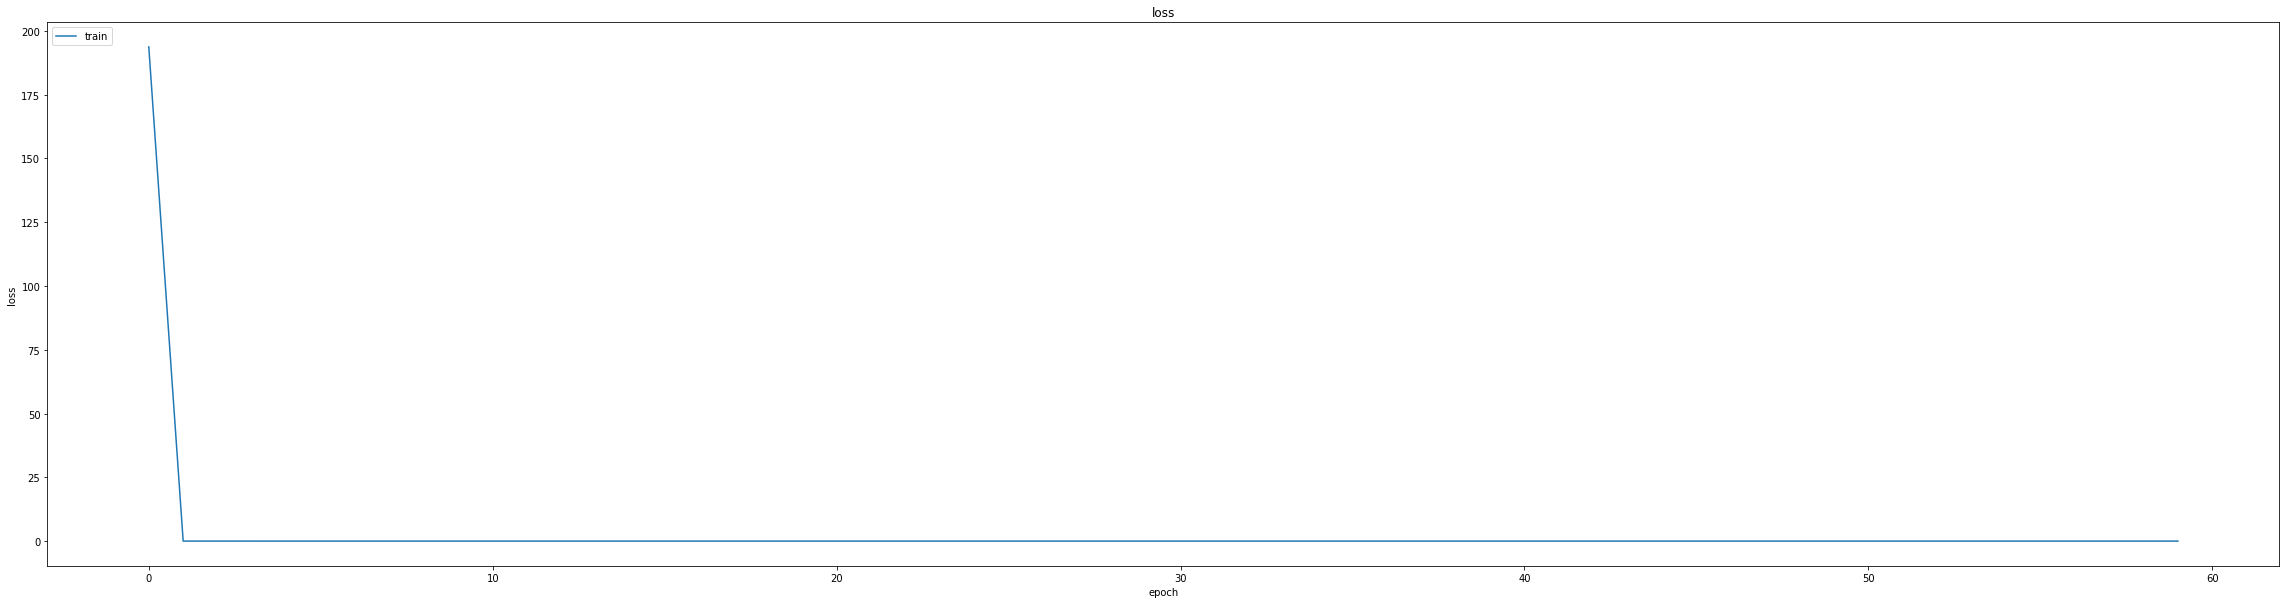

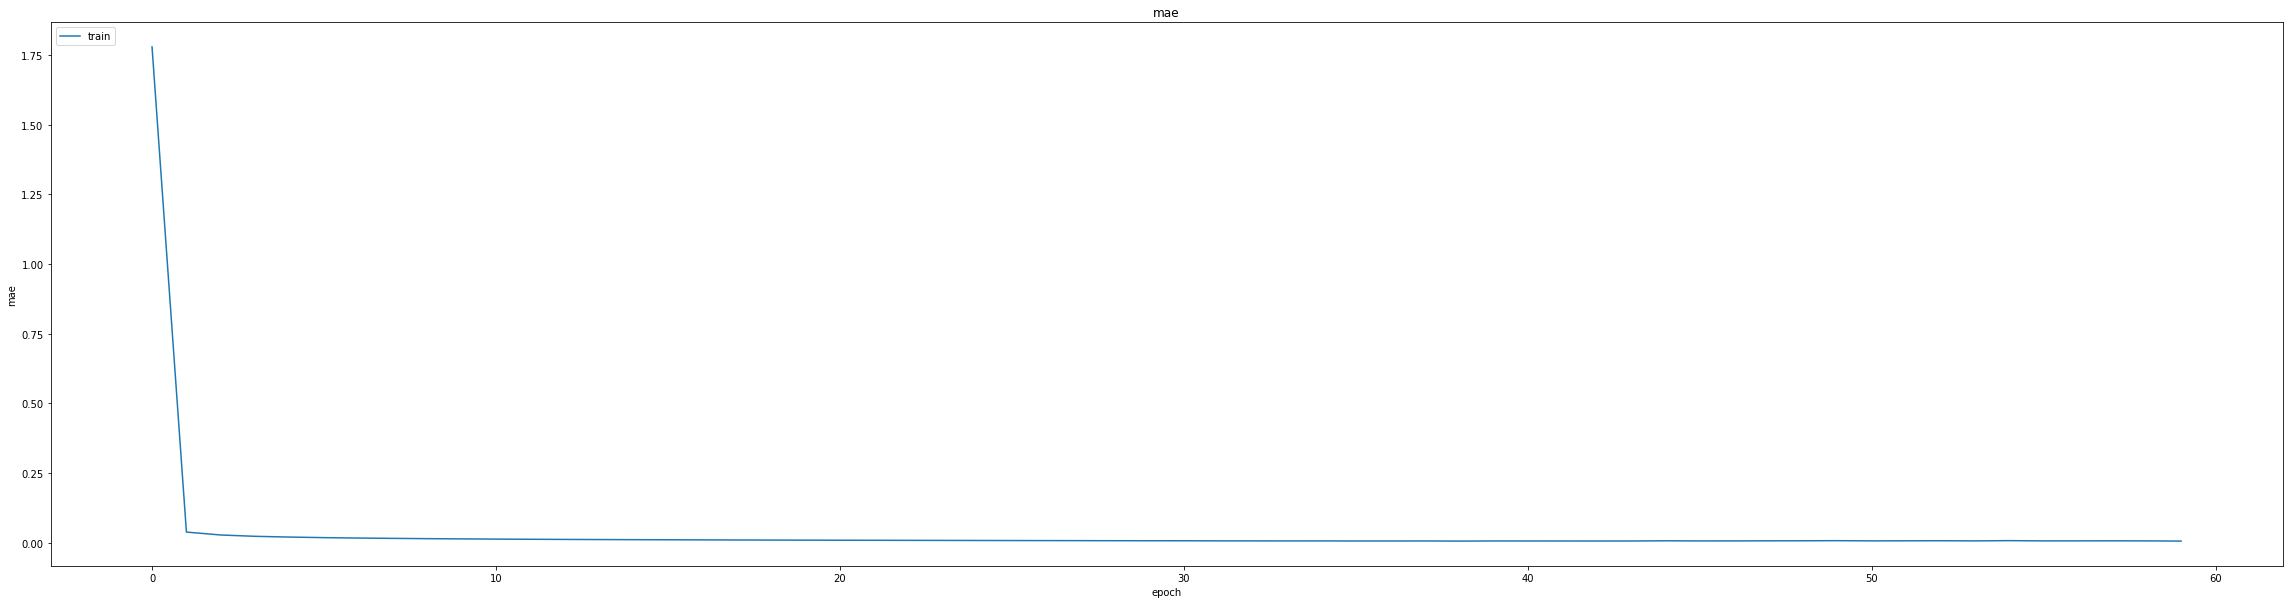

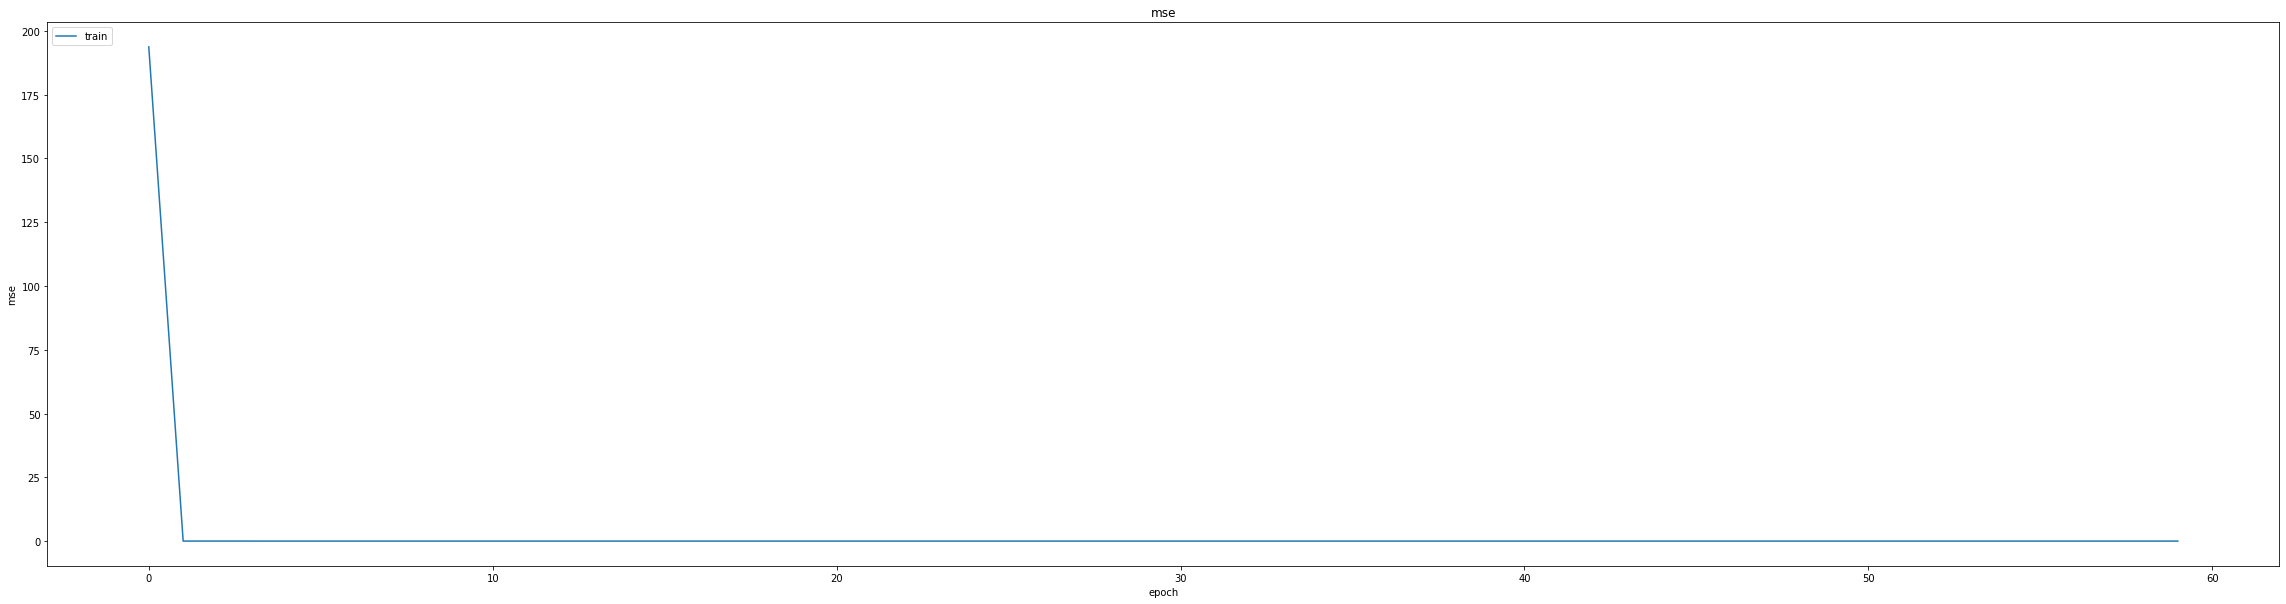

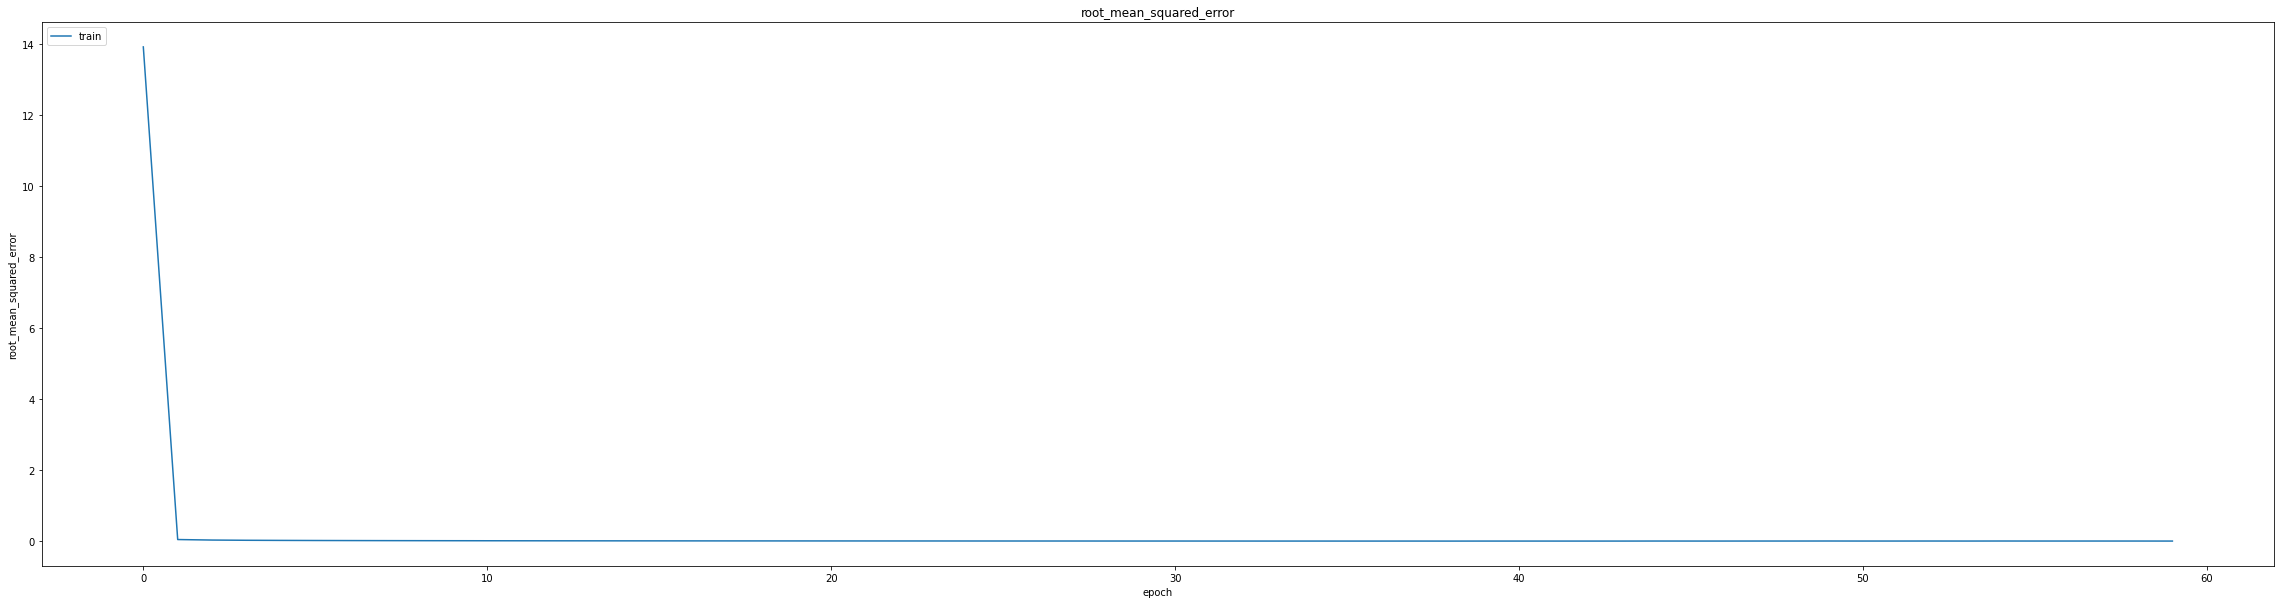

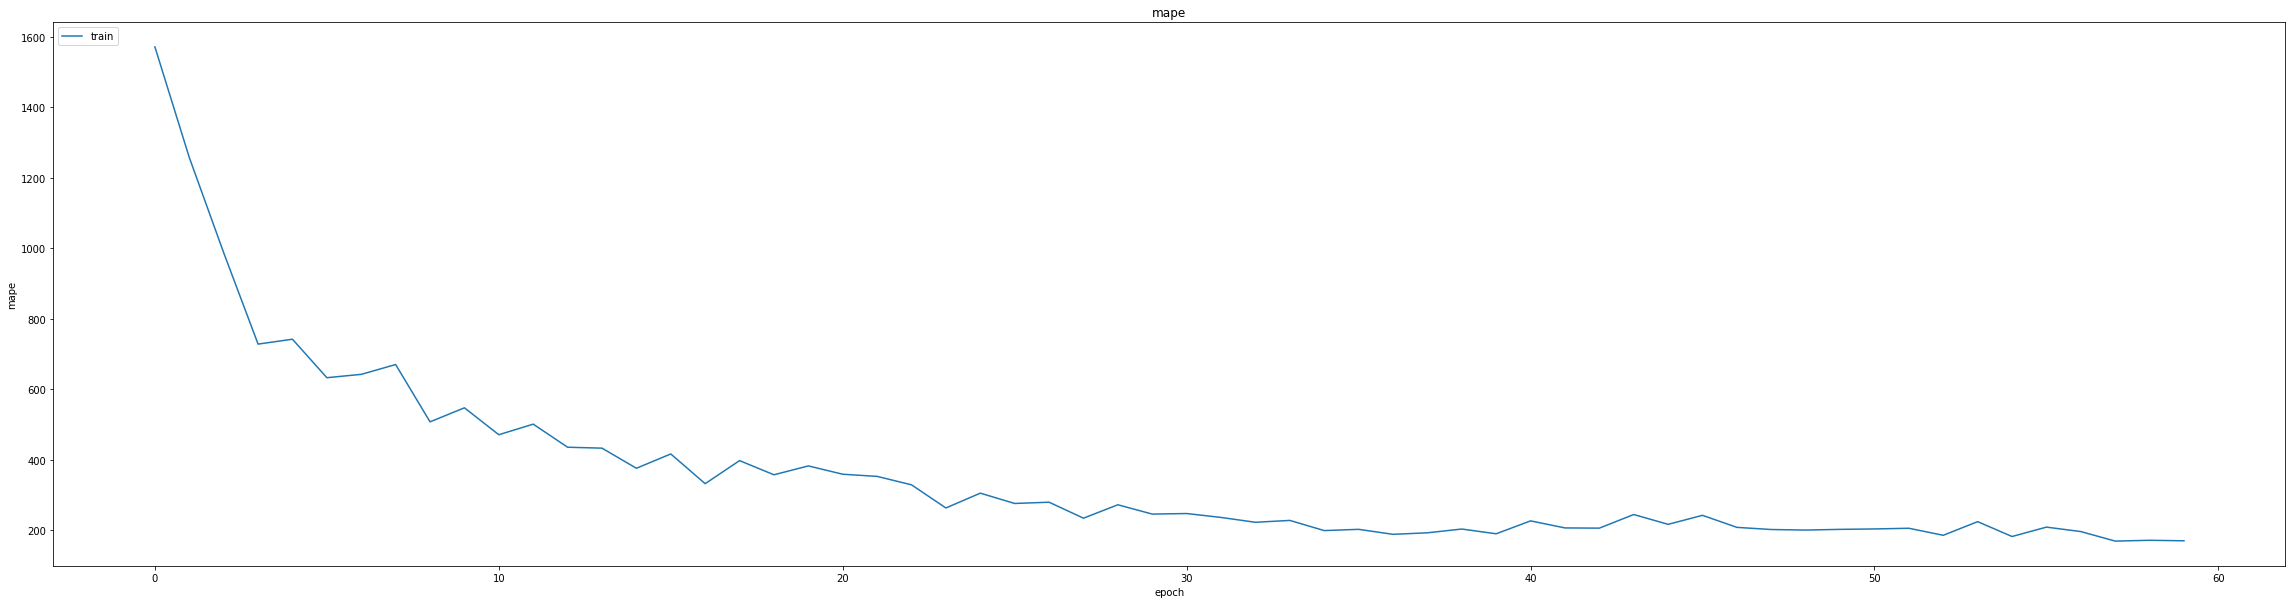

In [ ]:
thesis.SummarizeHistory(history)

In [ ]:
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
#print(min(histroy.history['val_mape']))
r2_scr = thesis.R_Squared_Score(model, x_val, y_val)
print(r2_scr)

0.013213030993938446
0.015723571181297302
1042/1042 [==============================] - 6s 5ms/step
0.9779361535897481


In [ ]:
model.load_weights("/content/drive/MyDrive/modelweights/CHF_USD_5min_CNN_BiLSTM(70-30)")
early_stopping = EarlyStopping(monitor='val_mse', patience=15)

In [ ]:

from keras.callbacks import LearningRateScheduler
import keras.backend as K

def scheduler(epoch):
    if epoch%2==0 and epoch!=0:
        lr = K.get_value(model.optimizer.lr)
        K.set_value(model.optimizer.lr, lr*.9)
        print("lr changed to {}".format(lr*.9))
    return K.get_value(model.optimizer.lr)
lr_decay = LearningRateScheduler(scheduler)

callbacks_list = [checkpoint, lr_decay, early_stopping]

Epochs=int(Epochs/3)

history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/20


402/405 [============================>.] - ETA: 0s - loss: 0.0059 - mae: 0.0268 - mse: 0.0059 - root_mean_squared_error: 0.0771 - mape: 538.0046
Epoch 1: val_mse did not improve from 0.00025
405/405 [==============================] - 15s 22ms/step - loss: 0.0059 - mae: 0.0267 - mse: 0.0059 - root_mean_squared_error: 0.0769 - mape: 535.0078 - val_loss: 3.5537e-04 - val_mae: 0.0159 - val_mse: 3.5537e-04 - val_root_mean_squared_error: 0.0189 - val_mape: 1625.4053 - lr: 0.0010
Epoch 2/20
403/405 [============================>.] - ETA: 0s - loss: 1.0615e-04 - mae: 0.0079 - mse: 1.0615e-04 - root_mean_squared_error: 0.0103 - mape: 306.5440
Epoch 2: val_mse did not improve from 0.00025
405/405 [==============================] - 8s 19ms/step - loss: 1.0606e-04 - mae: 0.0079 - mse: 1.0606e-04 - root_mean_squared_error: 0.0103 - mape: 305.5907 - val_loss: 3.3708e-04 - val_mae: 0.0164 - val_mse: 3.3708e-04 - val_root_mean_squared_error: 0.0184 - val_mape: 1280.6478 - lr: 0.0010
lr changed to 0.00

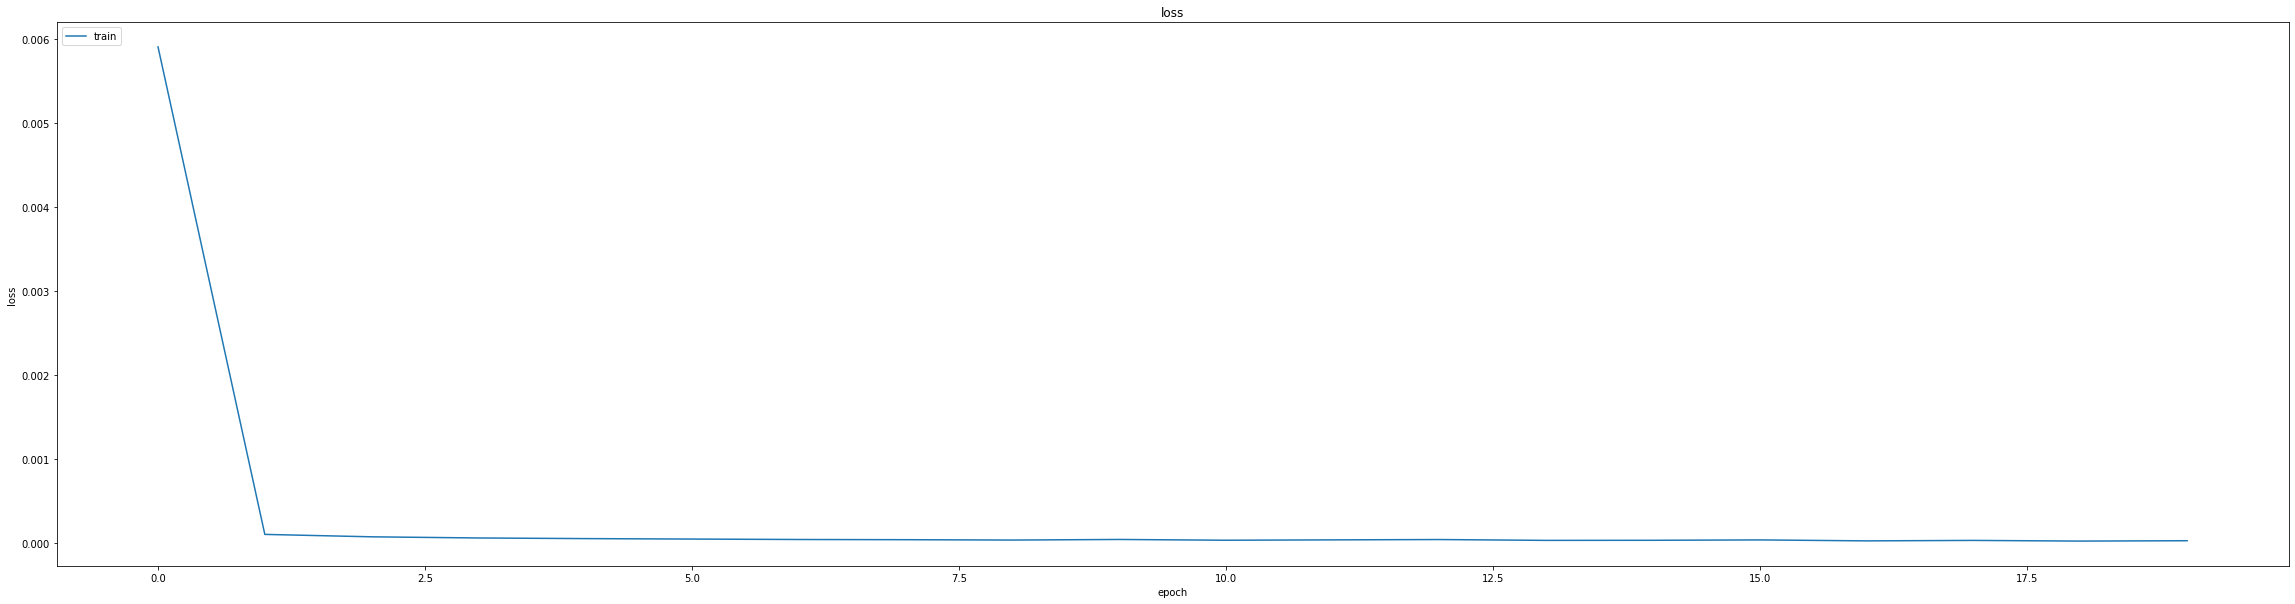

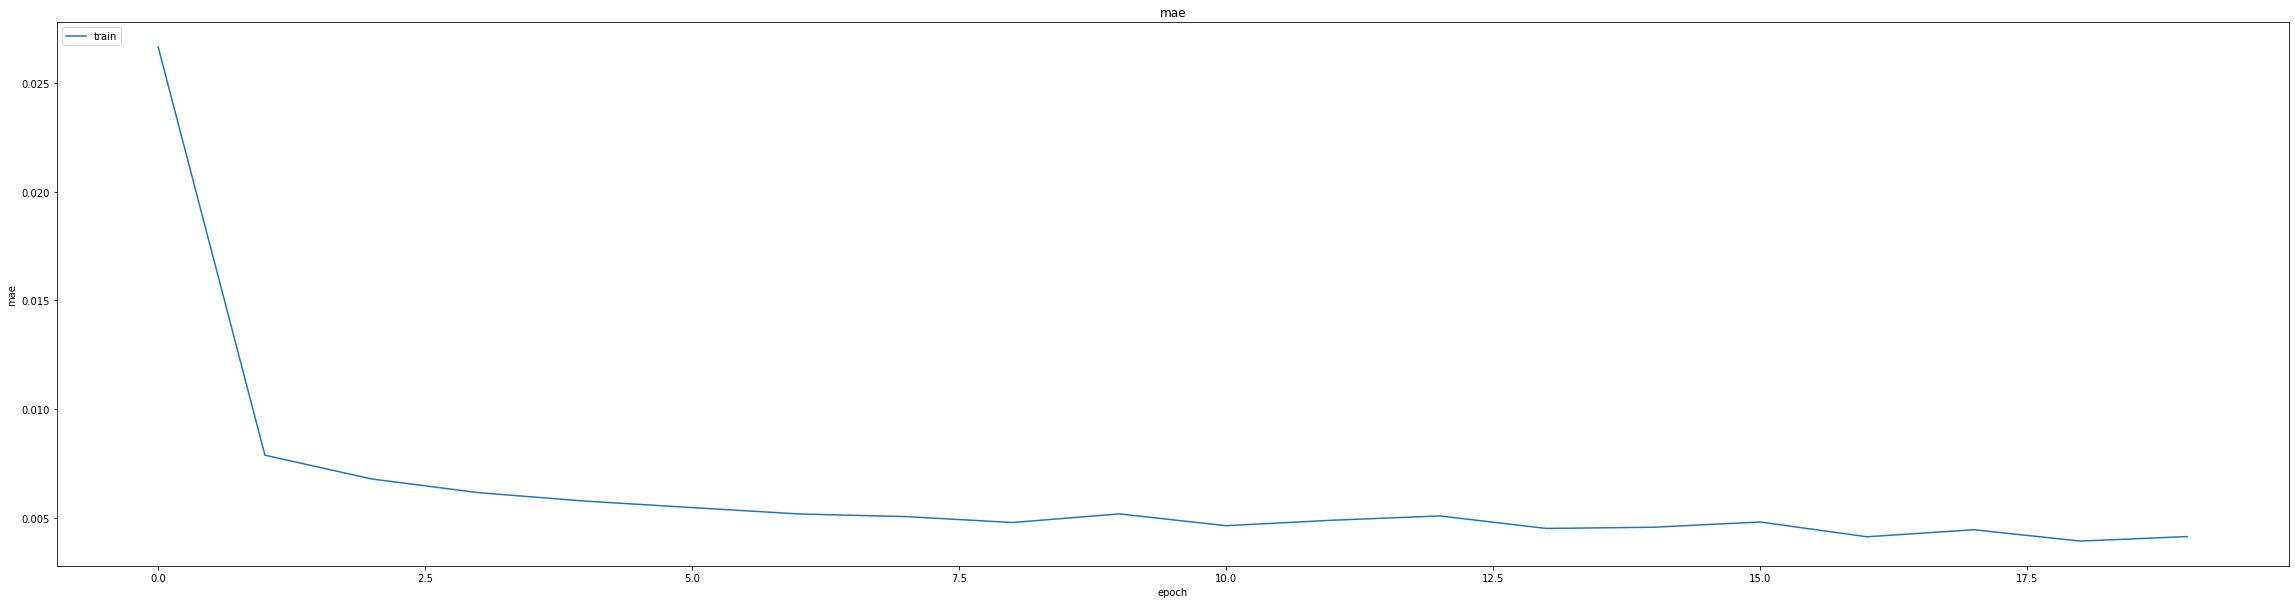

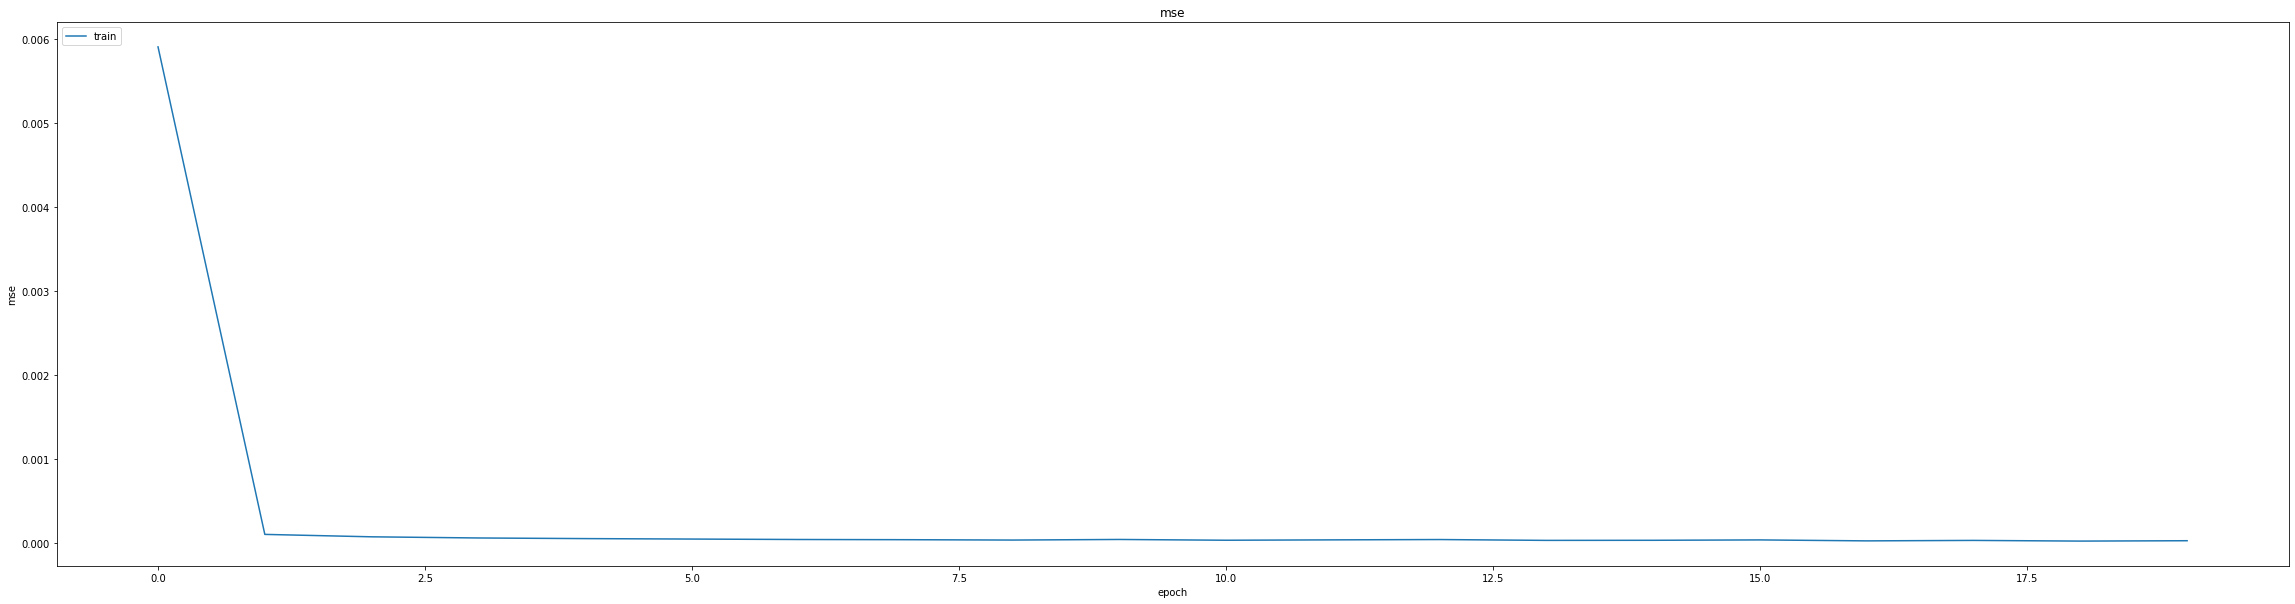

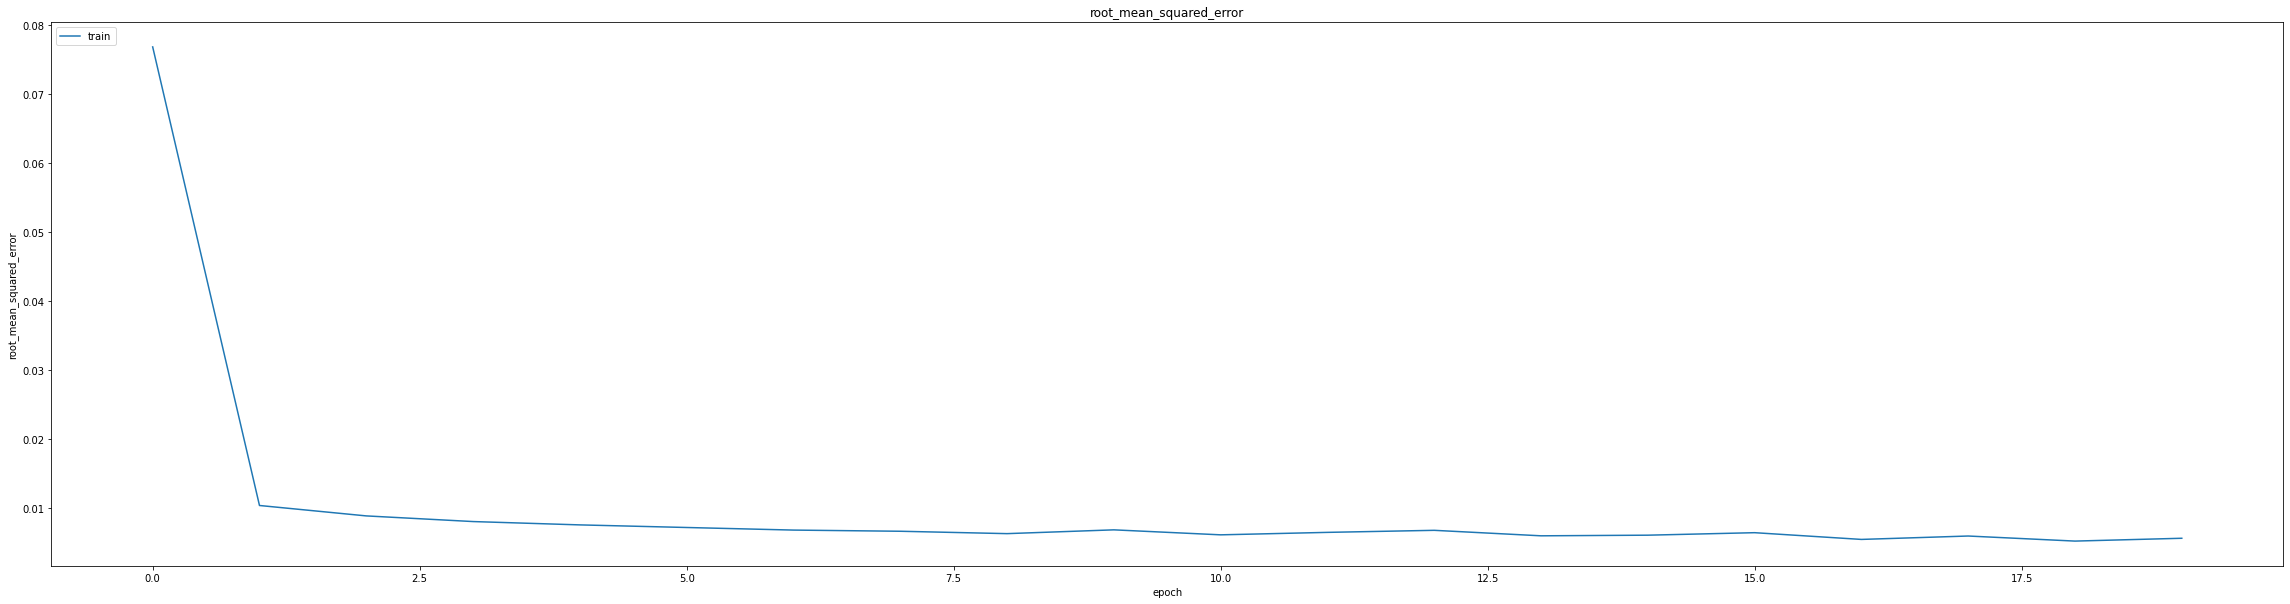

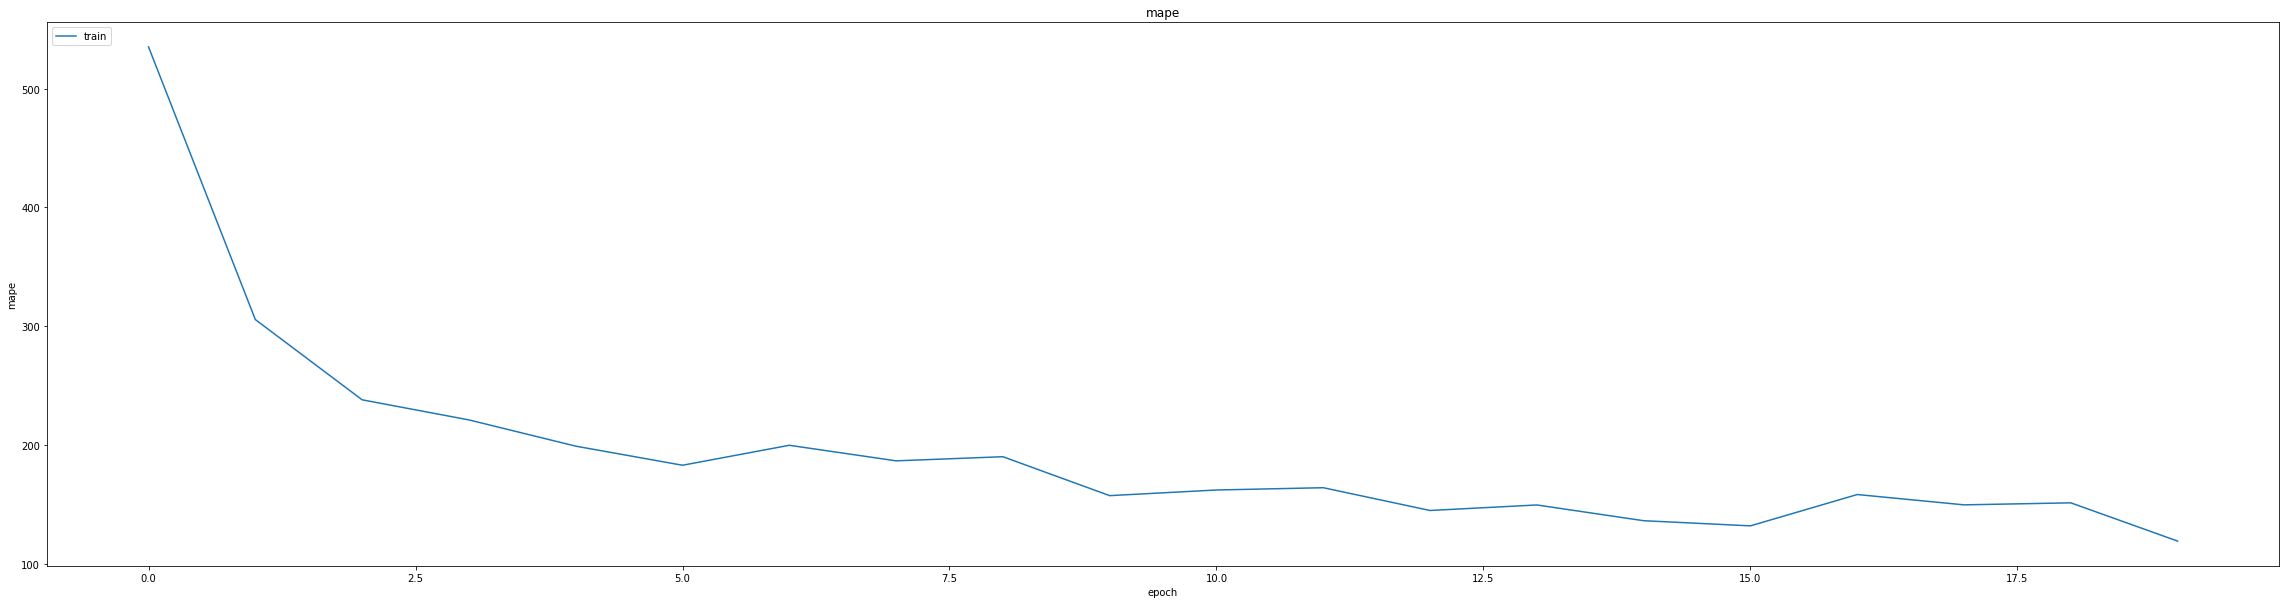

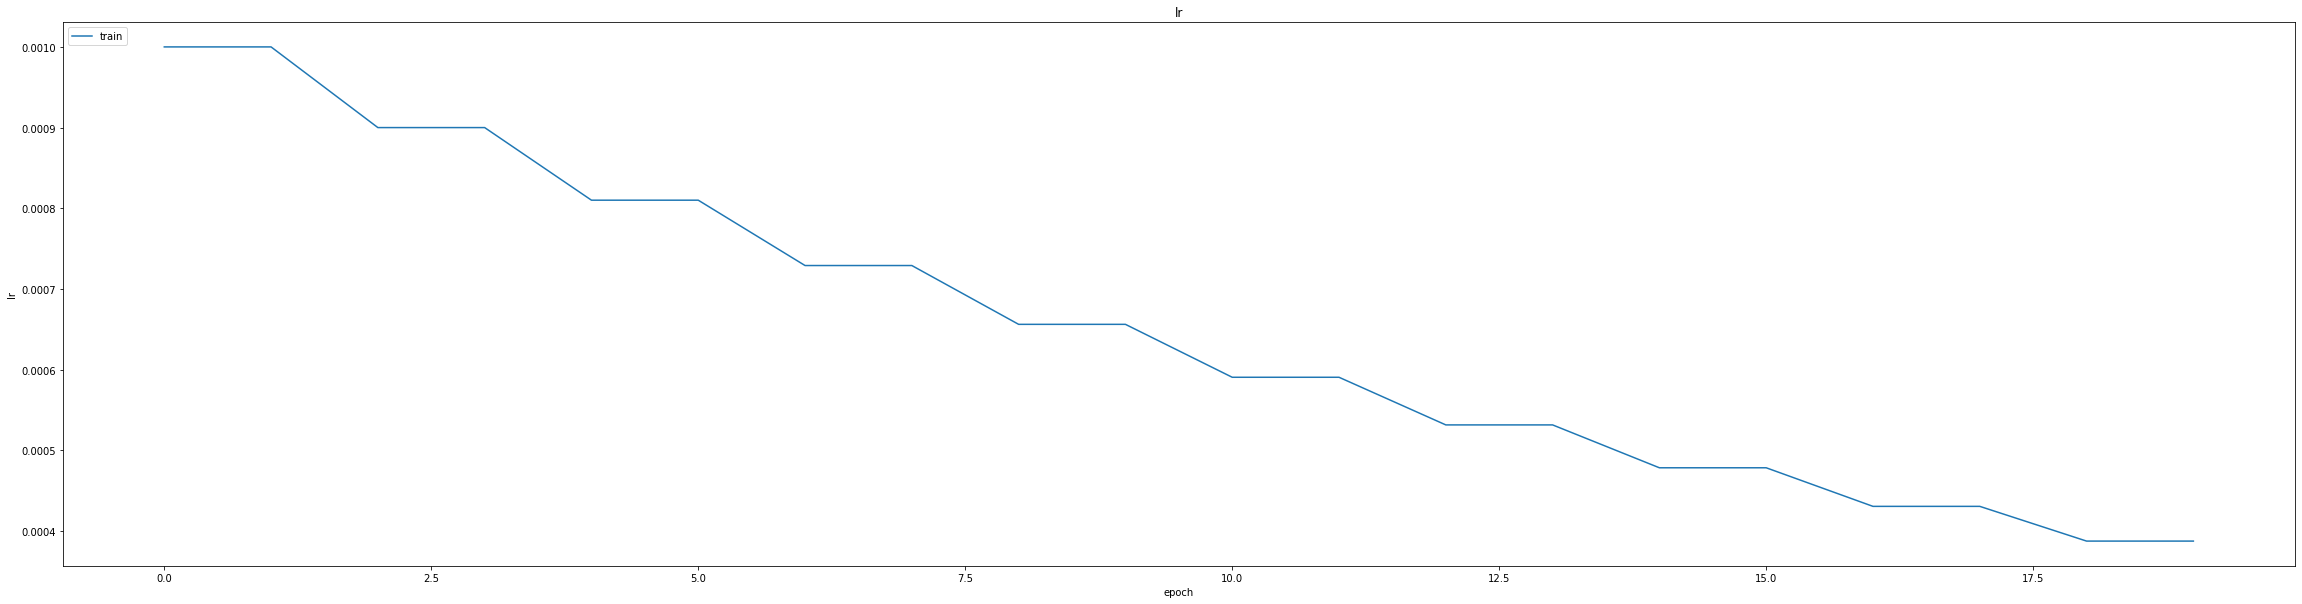

In [ ]:
thesis.SummarizeHistory(history)

In [ ]:
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
#print(min(histroy.history['val_mape']))
r2_scr = thesis.R_Squared_Score(model, x_val, y_val)
print(r2_scr)

0.015278281643986702
0.01722022145986557
1042/1042 [==============================] - 6s 5ms/step
0.9900411925427206


1042/1042 [==============================] - 5s 5ms/step


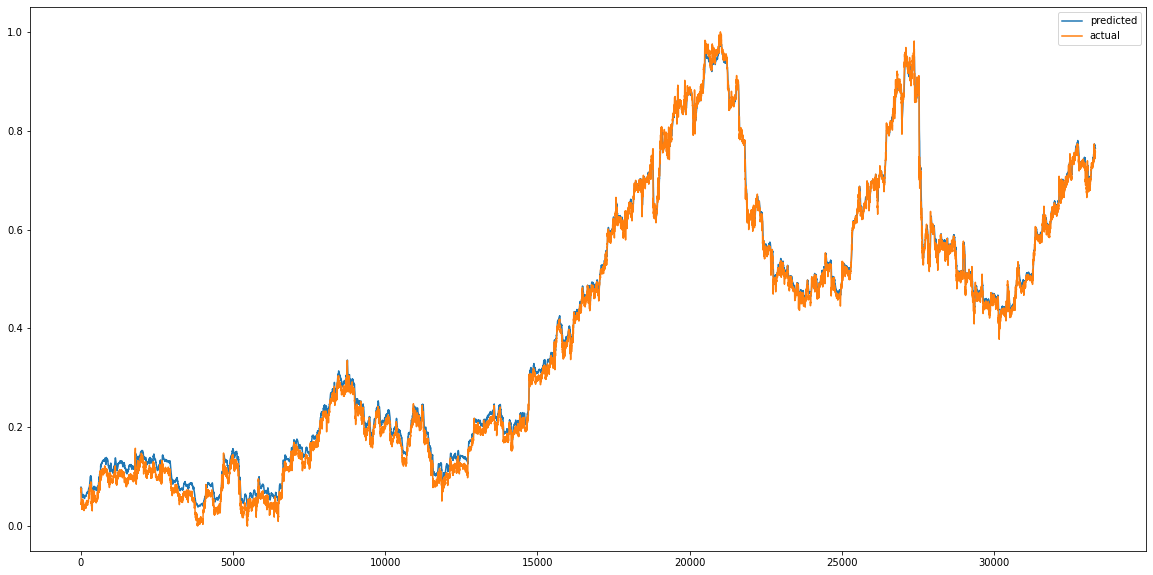

In [ ]:
model.load_weights("/content/drive/MyDrive/modelweights/CHF_USD_5min_CNN_BiLSTM(70-30)")
val_predictions=thesis.CreatPrediction(model,x_val, y_val)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


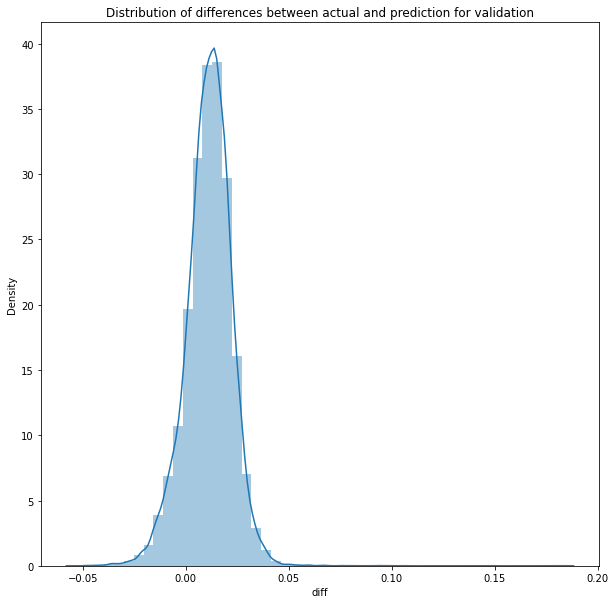

In [ ]:
val_predictions['diff'] = val_predictions['predicted'] - val_predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(val_predictions['diff']);
plt.title('Distribution of differences between actual and prediction for validation')
plt.show()

1042/1042 [==============================] - 5s 5ms/step


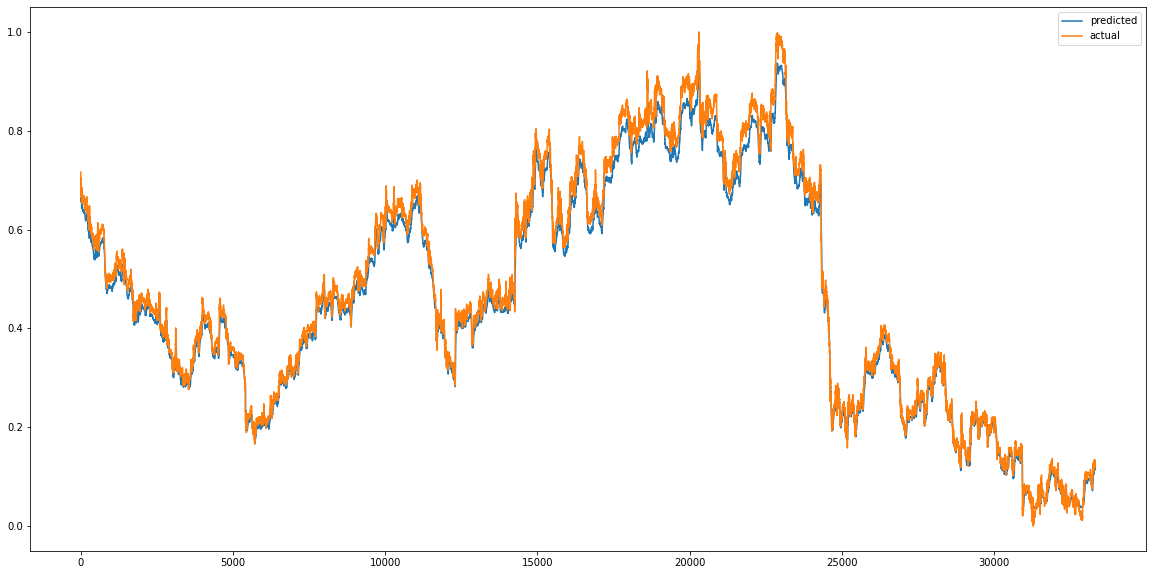

In [ ]:
predictions=thesis.CreatPrediction(model,x_test, y_test)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


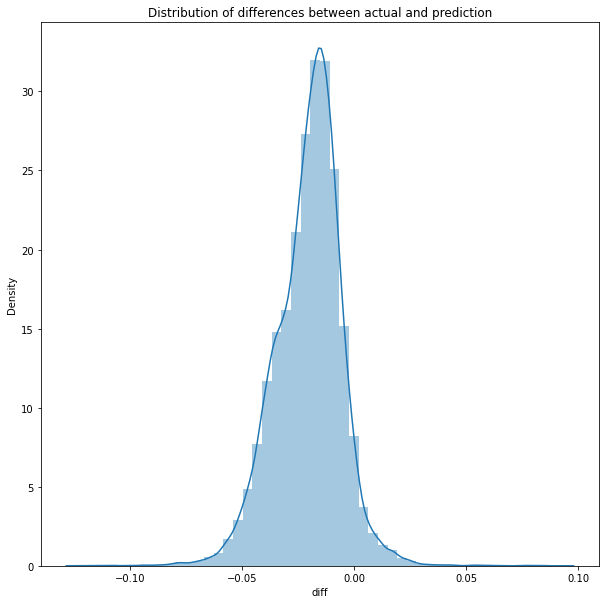

In [ ]:
predictions['diff'] = predictions['predicted'] - predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(predictions['diff']);
plt.title('Distribution of differences between actual and prediction')
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
print("MSE : ", mean_squared_error(predictions['predicted'].values, predictions['actual'].values))

from math import sqrt
print("RMSE : ", sqrt(mean_squared_error(predictions['predicted'].values, predictions['actual'].values)))

print("MAE : ", mean_absolute_error(predictions['predicted'].values, predictions['actual'].values))

test_r2_score=thesis.R_Squared_Score(model, x_test, y_test)
print('R2_Score  :', test_r2_score)
predictions['diff'].describe()

MSE :  0.000635393209707297
RMSE :  0.025207007154902327
MAE :  0.021340571091433325
1042/1042 [==============================] - 5s 5ms/step
R2_Score  : 0.9890930472580277


count    33333.000000
mean        -0.020420
std          0.014779
min         -0.122918
25%         -0.029242
50%         -0.018804
75%         -0.011025
max          0.092335
Name: diff, dtype: float64

**CNN_LSTM_MODEL**

In [ ]:
model= thesis.CNN_LSTM_Model(x_train)
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_1 (Conv1D)           (None, 24, 64)            2368      
                                                                 
 lstm_6 (LSTM)               (None, 24, 256)           328704    
                                                                 
 dropout_3 (Dropout)         (None, 24, 256)           0         
                                                                 
 lstm_7 (LSTM)               (None, 64)                82176     
                                                                 
 dense_9 (Dense)             (None, 32)                2080      
                                                                 
 dense_10 (Dense)            (None, 16)                528       
                                                                 
 dense_11 (Dense)            (None, 1)                

In [ ]:
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping

# Set the metric you want to monitor, the threshold, and the patience value
early_stopping = EarlyStopping(monitor='val_mse', patience=30)

checkpoint = ModelCheckpoint("/content/drive/MyDrive/modelweights/CHF_USD_5min_CNN_LSTM(70-30)", monitor='val_mse', verbose=1, save_best_only=True, mode='min')

# Fit
callbacks_list = [checkpoint, early_stopping ]

Epochs=60
Batch_size=385
history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/60
402/405 [============================>.] - ETA: 0s - loss: 244.8825 - mae: 2.0471 - mse: 244.8825 - root_mean_squared_error: 15.6487 - mape: 4728.2690
Epoch 1: val_mse improved from inf to 0.09378, saving model to /content/drive/MyDrive/modelweights/CHF_USD_5min_CNN_LSTM(70-30)


405/405 [==============================] - 18s 36ms/step - loss: 243.5093 - mae: 2.0369 - mse: 243.5093 - root_mean_squared_error: 15.6048 - mape: 4702.5308 - val_loss: 0.0938 - val_mae: 0.2595 - val_mse: 0.0938 - val_root_mean_squared_error: 0.3062 - val_mape: 16507.5391
Epoch 2/60
404/405 [============================>.] - ETA: 0s - loss: 0.0573 - mae: 0.2097 - mse: 0.0573 - root_mean_squared_error: 0.2394 - mape: 3316.7168
Epoch 2: val_mse improved from 0.09378 to 0.07532, saving model to /content/drive/MyDrive/modelweights/CHF_USD_5min_CNN_LSTM(70-30)


405/405 [==============================] - 14s 34ms/step - loss: 0.0573 - mae: 0.2097 - mse: 0.0573 - root_mean_squared_error: 0.2394 - mape: 3314.5742 - val_loss: 0.0753 - val_mae: 0.2337 - val_mse: 0.0753 - val_root_mean_squared_error: 0.2745 - val_mape: 14680.3652
Epoch 3/60
404/405 [============================>.] - ETA: 0s - loss: 0.0276 - mae: 0.1330 - mse: 0.0276 - root_mean_squared_error: 0.1663 - mape: 3303.4121
Epoch 3: val_mse improved from 0.07532 to 0.04382, saving model to /content/drive/MyDrive/modelweights/CHF_USD_5min_CNN_LSTM(70-30)


405/405 [==============================] - 14s 36ms/step - loss: 0.0276 - mae: 0.1330 - mse: 0.0276 - root_mean_squared_error: 0.1663 - mape: 3301.2817 - val_loss: 0.0438 - val_mae: 0.1802 - val_mse: 0.0438 - val_root_mean_squared_error: 0.2093 - val_mape: 12505.6924
Epoch 4/60
404/405 [============================>.] - ETA: 0s - loss: 0.0147 - mae: 0.0895 - mse: 0.0147 - root_mean_squared_error: 0.1211 - mape: 2763.3704
Epoch 4: val_mse improved from 0.04382 to 0.02912, saving model to /content/drive/MyDrive/modelweights/CHF_USD_5min_CNN_LSTM(70-30)


405/405 [==============================] - 14s 34ms/step - loss: 0.0147 - mae: 0.0894 - mse: 0.0147 - root_mean_squared_error: 0.1211 - mape: 2761.5730 - val_loss: 0.0291 - val_mae: 0.1433 - val_mse: 0.0291 - val_root_mean_squared_error: 0.1706 - val_mape: 11075.0908
Epoch 5/60
405/405 [==============================] - ETA: 0s - loss: 0.0096 - mae: 0.0682 - mse: 0.0096 - root_mean_squared_error: 0.0980 - mape: 2424.0515
Epoch 5: val_mse improved from 0.02912 to 0.01990, saving model to /content/drive/MyDrive/modelweights/CHF_USD_5min_CNN_LSTM(70-30)


405/405 [==============================] - 14s 35ms/step - loss: 0.0096 - mae: 0.0682 - mse: 0.0096 - root_mean_squared_error: 0.0980 - mape: 2424.0515 - val_loss: 0.0199 - val_mae: 0.1057 - val_mse: 0.0199 - val_root_mean_squared_error: 0.1411 - val_mape: 10037.3682
Epoch 6/60
404/405 [============================>.] - ETA: 0s - loss: 0.0054 - mae: 0.0467 - mse: 0.0054 - root_mean_squared_error: 0.0733 - mape: 2119.7019
Epoch 6: val_mse improved from 0.01990 to 0.01047, saving model to /content/drive/MyDrive/modelweights/CHF_USD_5min_CNN_LSTM(70-30)


405/405 [==============================] - 14s 34ms/step - loss: 0.0054 - mae: 0.0467 - mse: 0.0054 - root_mean_squared_error: 0.0733 - mape: 2118.3103 - val_loss: 0.0105 - val_mae: 0.0698 - val_mse: 0.0105 - val_root_mean_squared_error: 0.1023 - val_mape: 8427.8887
Epoch 7/60
404/405 [============================>.] - ETA: 0s - loss: 0.0032 - mae: 0.0352 - mse: 0.0032 - root_mean_squared_error: 0.0565 - mape: 1828.1265
Epoch 7: val_mse improved from 0.01047 to 0.00797, saving model to /content/drive/MyDrive/modelweights/CHF_USD_5min_CNN_LSTM(70-30)


405/405 [==============================] - 14s 35ms/step - loss: 0.0032 - mae: 0.0352 - mse: 0.0032 - root_mean_squared_error: 0.0565 - mape: 1826.9331 - val_loss: 0.0080 - val_mae: 0.0577 - val_mse: 0.0080 - val_root_mean_squared_error: 0.0893 - val_mape: 7743.0161
Epoch 8/60
403/405 [============================>.] - ETA: 0s - loss: 0.0026 - mae: 0.0318 - mse: 0.0026 - root_mean_squared_error: 0.0509 - mape: 1622.9810
Epoch 8: val_mse improved from 0.00797 to 0.00667, saving model to /content/drive/MyDrive/modelweights/CHF_USD_5min_CNN_LSTM(70-30)


405/405 [==============================] - 14s 34ms/step - loss: 0.0026 - mae: 0.0318 - mse: 0.0026 - root_mean_squared_error: 0.0509 - mape: 1617.9491 - val_loss: 0.0067 - val_mae: 0.0506 - val_mse: 0.0067 - val_root_mean_squared_error: 0.0817 - val_mape: 7304.7290
Epoch 9/60
405/405 [==============================] - ETA: 0s - loss: 0.0022 - mae: 0.0297 - mse: 0.0022 - root_mean_squared_error: 0.0471 - mape: 1556.6139
Epoch 9: val_mse improved from 0.00667 to 0.00571, saving model to /content/drive/MyDrive/modelweights/CHF_USD_5min_CNN_LSTM(70-30)


405/405 [==============================] - 14s 36ms/step - loss: 0.0022 - mae: 0.0297 - mse: 0.0022 - root_mean_squared_error: 0.0471 - mape: 1556.6139 - val_loss: 0.0057 - val_mae: 0.0467 - val_mse: 0.0057 - val_root_mean_squared_error: 0.0756 - val_mape: 6931.8599
Epoch 10/60
402/405 [============================>.] - ETA: 0s - loss: 0.0019 - mae: 0.0279 - mse: 0.0019 - root_mean_squared_error: 0.0437 - mape: 1456.9689
Epoch 10: val_mse improved from 0.00571 to 0.00490, saving model to /content/drive/MyDrive/modelweights/CHF_USD_5min_CNN_LSTM(70-30)


405/405 [==============================] - 14s 34ms/step - loss: 0.0019 - mae: 0.0279 - mse: 0.0019 - root_mean_squared_error: 0.0437 - mape: 1448.8857 - val_loss: 0.0049 - val_mae: 0.0430 - val_mse: 0.0049 - val_root_mean_squared_error: 0.0700 - val_mape: 6585.7358
Epoch 11/60
404/405 [============================>.] - ETA: 0s - loss: 0.0016 - mae: 0.0261 - mse: 0.0016 - root_mean_squared_error: 0.0405 - mape: 1439.5250
Epoch 11: val_mse improved from 0.00490 to 0.00418, saving model to /content/drive/MyDrive/modelweights/CHF_USD_5min_CNN_LSTM(70-30)


405/405 [==============================] - 14s 35ms/step - loss: 0.0016 - mae: 0.0261 - mse: 0.0016 - root_mean_squared_error: 0.0405 - mape: 1438.5930 - val_loss: 0.0042 - val_mae: 0.0399 - val_mse: 0.0042 - val_root_mean_squared_error: 0.0646 - val_mape: 6249.9058
Epoch 12/60
404/405 [============================>.] - ETA: 0s - loss: 0.0014 - mae: 0.0246 - mse: 0.0014 - root_mean_squared_error: 0.0377 - mape: 1335.0043
Epoch 12: val_mse improved from 0.00418 to 0.00355, saving model to /content/drive/MyDrive/modelweights/CHF_USD_5min_CNN_LSTM(70-30)


405/405 [==============================] - 14s 35ms/step - loss: 0.0014 - mae: 0.0246 - mse: 0.0014 - root_mean_squared_error: 0.0377 - mape: 1334.1272 - val_loss: 0.0035 - val_mae: 0.0370 - val_mse: 0.0035 - val_root_mean_squared_error: 0.0596 - val_mape: 5923.8477
Epoch 13/60
405/405 [==============================] - ETA: 0s - loss: 0.0012 - mae: 0.0231 - mse: 0.0012 - root_mean_squared_error: 0.0349 - mape: 1203.7903
Epoch 13: val_mse improved from 0.00355 to 0.00294, saving model to /content/drive/MyDrive/modelweights/CHF_USD_5min_CNN_LSTM(70-30)


405/405 [==============================] - 14s 34ms/step - loss: 0.0012 - mae: 0.0231 - mse: 0.0012 - root_mean_squared_error: 0.0349 - mape: 1203.7903 - val_loss: 0.0029 - val_mae: 0.0321 - val_mse: 0.0029 - val_root_mean_squared_error: 0.0542 - val_mape: 5613.8062
Epoch 14/60
403/405 [============================>.] - ETA: 0s - loss: 0.0011 - mae: 0.0218 - mse: 0.0011 - root_mean_squared_error: 0.0326 - mape: 1222.6157
Epoch 14: val_mse improved from 0.00294 to 0.00261, saving model to /content/drive/MyDrive/modelweights/CHF_USD_5min_CNN_LSTM(70-30)


405/405 [==============================] - 14s 35ms/step - loss: 0.0011 - mae: 0.0218 - mse: 0.0011 - root_mean_squared_error: 0.0326 - mape: 1218.8606 - val_loss: 0.0026 - val_mae: 0.0327 - val_mse: 0.0026 - val_root_mean_squared_error: 0.0511 - val_mape: 5323.1777
Epoch 15/60
404/405 [============================>.] - ETA: 0s - loss: 9.2570e-04 - mae: 0.0207 - mse: 9.2570e-04 - root_mean_squared_error: 0.0304 - mape: 1088.9030
Epoch 15: val_mse improved from 0.00261 to 0.00213, saving model to /content/drive/MyDrive/modelweights/CHF_USD_5min_CNN_LSTM(70-30)


405/405 [==============================] - 14s 35ms/step - loss: 9.2571e-04 - mae: 0.0207 - mse: 9.2571e-04 - root_mean_squared_error: 0.0304 - mape: 1088.1887 - val_loss: 0.0021 - val_mae: 0.0284 - val_mse: 0.0021 - val_root_mean_squared_error: 0.0461 - val_mape: 5055.9277
Epoch 16/60
405/405 [==============================] - ETA: 0s - loss: 8.2312e-04 - mae: 0.0199 - mse: 8.2312e-04 - root_mean_squared_error: 0.0287 - mape: 1108.8031
Epoch 16: val_mse improved from 0.00213 to 0.00179, saving model to /content/drive/MyDrive/modelweights/CHF_USD_5min_CNN_LSTM(70-30)


405/405 [==============================] - 14s 35ms/step - loss: 8.2312e-04 - mae: 0.0199 - mse: 8.2312e-04 - root_mean_squared_error: 0.0287 - mape: 1108.8031 - val_loss: 0.0018 - val_mae: 0.0256 - val_mse: 0.0018 - val_root_mean_squared_error: 0.0423 - val_mape: 4809.1445
Epoch 17/60
402/405 [============================>.] - ETA: 0s - loss: 7.2145e-04 - mae: 0.0188 - mse: 7.2145e-04 - root_mean_squared_error: 0.0269 - mape: 1037.9701
Epoch 17: val_mse improved from 0.00179 to 0.00157, saving model to /content/drive/MyDrive/modelweights/CHF_USD_5min_CNN_LSTM(70-30)


405/405 [==============================] - 14s 34ms/step - loss: 7.2115e-04 - mae: 0.0188 - mse: 7.2115e-04 - root_mean_squared_error: 0.0269 - mape: 1032.2058 - val_loss: 0.0016 - val_mae: 0.0246 - val_mse: 0.0016 - val_root_mean_squared_error: 0.0396 - val_mape: 4580.2969
Epoch 18/60
405/405 [==============================] - ETA: 0s - loss: 6.3656e-04 - mae: 0.0179 - mse: 6.3656e-04 - root_mean_squared_error: 0.0252 - mape: 966.4683
Epoch 18: val_mse improved from 0.00157 to 0.00130, saving model to /content/drive/MyDrive/modelweights/CHF_USD_5min_CNN_LSTM(70-30)


405/405 [==============================] - 14s 36ms/step - loss: 6.3656e-04 - mae: 0.0179 - mse: 6.3656e-04 - root_mean_squared_error: 0.0252 - mape: 966.4683 - val_loss: 0.0013 - val_mae: 0.0217 - val_mse: 0.0013 - val_root_mean_squared_error: 0.0361 - val_mape: 4363.2446
Epoch 19/60
403/405 [============================>.] - ETA: 0s - loss: 5.6022e-04 - mae: 0.0169 - mse: 5.6022e-04 - root_mean_squared_error: 0.0237 - mape: 971.2258
Epoch 19: val_mse improved from 0.00130 to 0.00108, saving model to /content/drive/MyDrive/modelweights/CHF_USD_5min_CNN_LSTM(70-30)


405/405 [==============================] - 14s 34ms/step - loss: 5.6013e-04 - mae: 0.0169 - mse: 5.6013e-04 - root_mean_squared_error: 0.0237 - mape: 968.2109 - val_loss: 0.0011 - val_mae: 0.0193 - val_mse: 0.0011 - val_root_mean_squared_error: 0.0329 - val_mape: 4161.1665
Epoch 20/60
404/405 [============================>.] - ETA: 0s - loss: 4.9097e-04 - mae: 0.0159 - mse: 4.9097e-04 - root_mean_squared_error: 0.0222 - mape: 931.2059
Epoch 20: val_mse improved from 0.00108 to 0.00095, saving model to /content/drive/MyDrive/modelweights/CHF_USD_5min_CNN_LSTM(70-30)


405/405 [==============================] - 15s 36ms/step - loss: 4.9099e-04 - mae: 0.0159 - mse: 4.9099e-04 - root_mean_squared_error: 0.0222 - mape: 930.5936 - val_loss: 9.5096e-04 - val_mae: 0.0185 - val_mse: 9.5096e-04 - val_root_mean_squared_error: 0.0308 - val_mape: 3968.3337
Epoch 21/60
405/405 [==============================] - ETA: 0s - loss: 4.3067e-04 - mae: 0.0150 - mse: 4.3067e-04 - root_mean_squared_error: 0.0208 - mape: 887.5189
Epoch 21: val_mse improved from 0.00095 to 0.00082, saving model to /content/drive/MyDrive/modelweights/CHF_USD_5min_CNN_LSTM(70-30)


405/405 [==============================] - 14s 35ms/step - loss: 4.3067e-04 - mae: 0.0150 - mse: 4.3067e-04 - root_mean_squared_error: 0.0208 - mape: 887.5189 - val_loss: 8.1600e-04 - val_mae: 0.0171 - val_mse: 8.1600e-04 - val_root_mean_squared_error: 0.0286 - val_mape: 3787.2302
Epoch 22/60
404/405 [============================>.] - ETA: 0s - loss: 3.7406e-04 - mae: 0.0140 - mse: 3.7406e-04 - root_mean_squared_error: 0.0193 - mape: 810.5411
Epoch 22: val_mse improved from 0.00082 to 0.00071, saving model to /content/drive/MyDrive/modelweights/CHF_USD_5min_CNN_LSTM(70-30)


405/405 [==============================] - 14s 36ms/step - loss: 3.7400e-04 - mae: 0.0140 - mse: 3.7400e-04 - root_mean_squared_error: 0.0193 - mape: 810.0074 - val_loss: 7.0825e-04 - val_mae: 0.0158 - val_mse: 7.0825e-04 - val_root_mean_squared_error: 0.0266 - val_mape: 3613.7288
Epoch 23/60
403/405 [============================>.] - ETA: 0s - loss: 3.2953e-04 - mae: 0.0132 - mse: 3.2953e-04 - root_mean_squared_error: 0.0182 - mape: 729.2887
Epoch 23: val_mse improved from 0.00071 to 0.00067, saving model to /content/drive/MyDrive/modelweights/CHF_USD_5min_CNN_LSTM(70-30)


405/405 [==============================] - 14s 34ms/step - loss: 3.2939e-04 - mae: 0.0132 - mse: 3.2939e-04 - root_mean_squared_error: 0.0181 - mape: 727.0195 - val_loss: 6.7212e-04 - val_mae: 0.0164 - val_mse: 6.7212e-04 - val_root_mean_squared_error: 0.0259 - val_mape: 3451.9590
Epoch 24/60
402/405 [============================>.] - ETA: 0s - loss: 2.9067e-04 - mae: 0.0125 - mse: 2.9067e-04 - root_mean_squared_error: 0.0170 - mape: 756.0673
Epoch 24: val_mse improved from 0.00067 to 0.00058, saving model to /content/drive/MyDrive/modelweights/CHF_USD_5min_CNN_LSTM(70-30)


405/405 [==============================] - 14s 35ms/step - loss: 2.9034e-04 - mae: 0.0125 - mse: 2.9034e-04 - root_mean_squared_error: 0.0170 - mape: 751.8475 - val_loss: 5.7952e-04 - val_mae: 0.0152 - val_mse: 5.7952e-04 - val_root_mean_squared_error: 0.0241 - val_mape: 3299.7100
Epoch 25/60
402/405 [============================>.] - ETA: 0s - loss: 2.5363e-04 - mae: 0.0117 - mse: 2.5363e-04 - root_mean_squared_error: 0.0159 - mape: 727.1558
Epoch 25: val_mse improved from 0.00058 to 0.00048, saving model to /content/drive/MyDrive/modelweights/CHF_USD_5min_CNN_LSTM(70-30)


405/405 [==============================] - 14s 34ms/step - loss: 2.5344e-04 - mae: 0.0117 - mse: 2.5344e-04 - root_mean_squared_error: 0.0159 - mape: 723.1132 - val_loss: 4.8394e-04 - val_mae: 0.0136 - val_mse: 4.8394e-04 - val_root_mean_squared_error: 0.0220 - val_mape: 3153.4680
Epoch 26/60
405/405 [==============================] - ETA: 0s - loss: 2.2874e-04 - mae: 0.0112 - mse: 2.2874e-04 - root_mean_squared_error: 0.0151 - mape: 687.3295
Epoch 26: val_mse improved from 0.00048 to 0.00044, saving model to /content/drive/MyDrive/modelweights/CHF_USD_5min_CNN_LSTM(70-30)


405/405 [==============================] - 14s 36ms/step - loss: 2.2874e-04 - mae: 0.0112 - mse: 2.2874e-04 - root_mean_squared_error: 0.0151 - mape: 687.3295 - val_loss: 4.3770e-04 - val_mae: 0.0129 - val_mse: 4.3770e-04 - val_root_mean_squared_error: 0.0209 - val_mape: 3020.7485
Epoch 27/60
404/405 [============================>.] - ETA: 0s - loss: 2.0357e-04 - mae: 0.0106 - mse: 2.0357e-04 - root_mean_squared_error: 0.0143 - mape: 634.3699
Epoch 27: val_mse improved from 0.00044 to 0.00043, saving model to /content/drive/MyDrive/modelweights/CHF_USD_5min_CNN_LSTM(70-30)


405/405 [==============================] - 14s 35ms/step - loss: 2.0355e-04 - mae: 0.0106 - mse: 2.0355e-04 - root_mean_squared_error: 0.0143 - mape: 633.9522 - val_loss: 4.2525e-04 - val_mae: 0.0134 - val_mse: 4.2525e-04 - val_root_mean_squared_error: 0.0206 - val_mape: 2891.8496
Epoch 28/60
405/405 [==============================] - ETA: 0s - loss: 1.8194e-04 - mae: 0.0101 - mse: 1.8194e-04 - root_mean_squared_error: 0.0135 - mape: 670.5974
Epoch 28: val_mse improved from 0.00043 to 0.00035, saving model to /content/drive/MyDrive/modelweights/CHF_USD_5min_CNN_LSTM(70-30)


405/405 [==============================] - 14s 33ms/step - loss: 1.8194e-04 - mae: 0.0101 - mse: 1.8194e-04 - root_mean_squared_error: 0.0135 - mape: 670.5974 - val_loss: 3.4580e-04 - val_mae: 0.0114 - val_mse: 3.4580e-04 - val_root_mean_squared_error: 0.0186 - val_mape: 2769.6226
Epoch 29/60
404/405 [============================>.] - ETA: 0s - loss: 1.6690e-04 - mae: 0.0097 - mse: 1.6690e-04 - root_mean_squared_error: 0.0129 - mape: 611.0131
Epoch 29: val_mse improved from 0.00035 to 0.00032, saving model to /content/drive/MyDrive/modelweights/CHF_USD_5min_CNN_LSTM(70-30)


405/405 [==============================] - 14s 36ms/step - loss: 1.6689e-04 - mae: 0.0097 - mse: 1.6689e-04 - root_mean_squared_error: 0.0129 - mape: 610.6107 - val_loss: 3.1811e-04 - val_mae: 0.0114 - val_mse: 3.1811e-04 - val_root_mean_squared_error: 0.0178 - val_mape: 2656.5908
Epoch 30/60
405/405 [==============================] - ETA: 0s - loss: 1.5129e-04 - mae: 0.0093 - mse: 1.5129e-04 - root_mean_squared_error: 0.0123 - mape: 560.9493
Epoch 30: val_mse improved from 0.00032 to 0.00029, saving model to /content/drive/MyDrive/modelweights/CHF_USD_5min_CNN_LSTM(70-30)


405/405 [==============================] - 14s 35ms/step - loss: 1.5129e-04 - mae: 0.0093 - mse: 1.5129e-04 - root_mean_squared_error: 0.0123 - mape: 560.9493 - val_loss: 2.8742e-04 - val_mae: 0.0112 - val_mse: 2.8742e-04 - val_root_mean_squared_error: 0.0170 - val_mape: 2550.3223
Epoch 31/60
405/405 [==============================] - ETA: 0s - loss: 1.3914e-04 - mae: 0.0089 - mse: 1.3914e-04 - root_mean_squared_error: 0.0118 - mape: 547.6757
Epoch 31: val_mse did not improve from 0.00029
405/405 [==============================] - 6s 16ms/step - loss: 1.3914e-04 - mae: 0.0089 - mse: 1.3914e-04 - root_mean_squared_error: 0.0118 - mape: 547.6757 - val_loss: 4.3217e-04 - val_mae: 0.0141 - val_mse: 4.3217e-04 - val_root_mean_squared_error: 0.0208 - val_mape: 2449.3206
Epoch 32/60
405/405 [==============================] - ETA: 0s - loss: 1.3024e-04 - mae: 0.0086 - mse: 1.3024e-04 - root_mean_squared_error: 0.0114 - mape: 505.9238
Epoch 32: val_mse improved from 0.00029 to 0.00027, saving m

405/405 [==============================] - 14s 34ms/step - loss: 1.3024e-04 - mae: 0.0086 - mse: 1.3024e-04 - root_mean_squared_error: 0.0114 - mape: 505.9238 - val_loss: 2.7068e-04 - val_mae: 0.0112 - val_mse: 2.7068e-04 - val_root_mean_squared_error: 0.0165 - val_mape: 2367.1621
Epoch 33/60
402/405 [============================>.] - ETA: 0s - loss: 1.2059e-04 - mae: 0.0083 - mse: 1.2059e-04 - root_mean_squared_error: 0.0110 - mape: 514.9672
Epoch 33: val_mse did not improve from 0.00027
405/405 [==============================] - 6s 16ms/step - loss: 1.2068e-04 - mae: 0.0083 - mse: 1.2068e-04 - root_mean_squared_error: 0.0110 - mape: 512.1048 - val_loss: 2.7186e-04 - val_mae: 0.0111 - val_mse: 2.7186e-04 - val_root_mean_squared_error: 0.0165 - val_mape: 2284.4485
Epoch 34/60
403/405 [============================>.] - ETA: 0s - loss: 1.1316e-04 - mae: 0.0081 - mse: 1.1316e-04 - root_mean_squared_error: 0.0106 - mape: 514.3472
Epoch 34: val_mse did not improve from 0.00027
405/405 [====

405/405 [==============================] - 14s 35ms/step - loss: 1.0374e-04 - mae: 0.0078 - mse: 1.0374e-04 - root_mean_squared_error: 0.0102 - mape: 459.4781 - val_loss: 2.2119e-04 - val_mae: 0.0104 - val_mse: 2.2119e-04 - val_root_mean_squared_error: 0.0149 - val_mape: 2136.8608
Epoch 36/60
402/405 [============================>.] - ETA: 0s - loss: 9.6425e-05 - mae: 0.0075 - mse: 9.6425e-05 - root_mean_squared_error: 0.0098 - mape: 440.1754
Epoch 36: val_mse did not improve from 0.00022
405/405 [==============================] - 6s 16ms/step - loss: 9.6461e-05 - mae: 0.0075 - mse: 9.6461e-05 - root_mean_squared_error: 0.0098 - mape: 437.7237 - val_loss: 2.6824e-04 - val_mae: 0.0120 - val_mse: 2.6824e-04 - val_root_mean_squared_error: 0.0164 - val_mape: 2062.3213
Epoch 37/60
404/405 [============================>.] - ETA: 0s - loss: 9.1612e-05 - mae: 0.0073 - mse: 9.1612e-05 - root_mean_squared_error: 0.0096 - mape: 427.0236
Epoch 37: val_mse improved from 0.00022 to 0.00020, saving m

405/405 [==============================] - 14s 35ms/step - loss: 9.1591e-05 - mae: 0.0073 - mse: 9.1591e-05 - root_mean_squared_error: 0.0096 - mape: 426.7424 - val_loss: 2.0261e-04 - val_mae: 0.0103 - val_mse: 2.0261e-04 - val_root_mean_squared_error: 0.0142 - val_mape: 2000.8772
Epoch 38/60
403/405 [============================>.] - ETA: 0s - loss: 8.3422e-05 - mae: 0.0070 - mse: 8.3422e-05 - root_mean_squared_error: 0.0091 - mape: 420.6591
Epoch 38: val_mse improved from 0.00020 to 0.00017, saving model to /content/drive/MyDrive/modelweights/CHF_USD_5min_CNN_LSTM(70-30)


405/405 [==============================] - 14s 34ms/step - loss: 8.3410e-05 - mae: 0.0070 - mse: 8.3410e-05 - root_mean_squared_error: 0.0091 - mape: 419.3477 - val_loss: 1.7465e-04 - val_mae: 0.0099 - val_mse: 1.7465e-04 - val_root_mean_squared_error: 0.0132 - val_mape: 1927.1548
Epoch 39/60
404/405 [============================>.] - ETA: 0s - loss: 7.8385e-05 - mae: 0.0068 - mse: 7.8385e-05 - root_mean_squared_error: 0.0089 - mape: 431.1560
Epoch 39: val_mse improved from 0.00017 to 0.00015, saving model to /content/drive/MyDrive/modelweights/CHF_USD_5min_CNN_LSTM(70-30)


405/405 [==============================] - 14s 35ms/step - loss: 7.8397e-05 - mae: 0.0068 - mse: 7.8397e-05 - root_mean_squared_error: 0.0089 - mape: 430.8732 - val_loss: 1.5094e-04 - val_mae: 0.0092 - val_mse: 1.5094e-04 - val_root_mean_squared_error: 0.0123 - val_mape: 1852.3925
Epoch 40/60
405/405 [==============================] - ETA: 0s - loss: 7.0633e-05 - mae: 0.0064 - mse: 7.0633e-05 - root_mean_squared_error: 0.0084 - mape: 392.3242
Epoch 40: val_mse did not improve from 0.00015
405/405 [==============================] - 6s 16ms/step - loss: 7.0633e-05 - mae: 0.0064 - mse: 7.0633e-05 - root_mean_squared_error: 0.0084 - mape: 392.3242 - val_loss: 2.0331e-04 - val_mae: 0.0109 - val_mse: 2.0331e-04 - val_root_mean_squared_error: 0.0143 - val_mape: 1770.1715
Epoch 41/60
403/405 [============================>.] - ETA: 0s - loss: 7.1814e-05 - mae: 0.0065 - mse: 7.1814e-05 - root_mean_squared_error: 0.0085 - mape: 369.9731
Epoch 41: val_mse improved from 0.00015 to 0.00014, saving m

405/405 [==============================] - 14s 35ms/step - loss: 7.1780e-05 - mae: 0.0065 - mse: 7.1780e-05 - root_mean_squared_error: 0.0085 - mape: 368.8198 - val_loss: 1.3539e-04 - val_mae: 0.0089 - val_mse: 1.3539e-04 - val_root_mean_squared_error: 0.0116 - val_mape: 1708.2249
Epoch 42/60
402/405 [============================>.] - ETA: 0s - loss: 6.4049e-05 - mae: 0.0061 - mse: 6.4049e-05 - root_mean_squared_error: 0.0080 - mape: 393.1996
Epoch 42: val_mse did not improve from 0.00014
405/405 [==============================] - 6s 16ms/step - loss: 6.3994e-05 - mae: 0.0061 - mse: 6.3994e-05 - root_mean_squared_error: 0.0080 - mape: 391.0108 - val_loss: 1.5996e-04 - val_mae: 0.0100 - val_mse: 1.5996e-04 - val_root_mean_squared_error: 0.0126 - val_mape: 1639.2983
Epoch 43/60
404/405 [============================>.] - ETA: 0s - loss: 7.0027e-05 - mae: 0.0064 - mse: 7.0027e-05 - root_mean_squared_error: 0.0084 - mape: 358.5924
Epoch 43: val_mse did not improve from 0.00014
405/405 [====

405/405 [==============================] - 14s 34ms/step - loss: 6.6283e-05 - mae: 0.0061 - mse: 6.6283e-05 - root_mean_squared_error: 0.0081 - mape: 283.4395 - val_loss: 1.1907e-04 - val_mae: 0.0091 - val_mse: 1.1907e-04 - val_root_mean_squared_error: 0.0109 - val_mape: 1233.7456
Epoch 52/60
403/405 [============================>.] - ETA: 0s - loss: 5.8878e-05 - mae: 0.0057 - mse: 5.8878e-05 - root_mean_squared_error: 0.0077 - mape: 259.4055
Epoch 52: val_mse did not improve from 0.00012
405/405 [==============================] - 6s 16ms/step - loss: 5.9127e-05 - mae: 0.0057 - mse: 5.9127e-05 - root_mean_squared_error: 0.0077 - mape: 258.5992 - val_loss: 2.2902e-04 - val_mae: 0.0125 - val_mse: 2.2902e-04 - val_root_mean_squared_error: 0.0151 - val_mape: 1167.2802
Epoch 53/60
405/405 [==============================] - ETA: 0s - loss: 6.1708e-05 - mae: 0.0059 - mse: 6.1708e-05 - root_mean_squared_error: 0.0079 - mape: 238.3830
Epoch 53: val_mse did not improve from 0.00012
405/405 [====

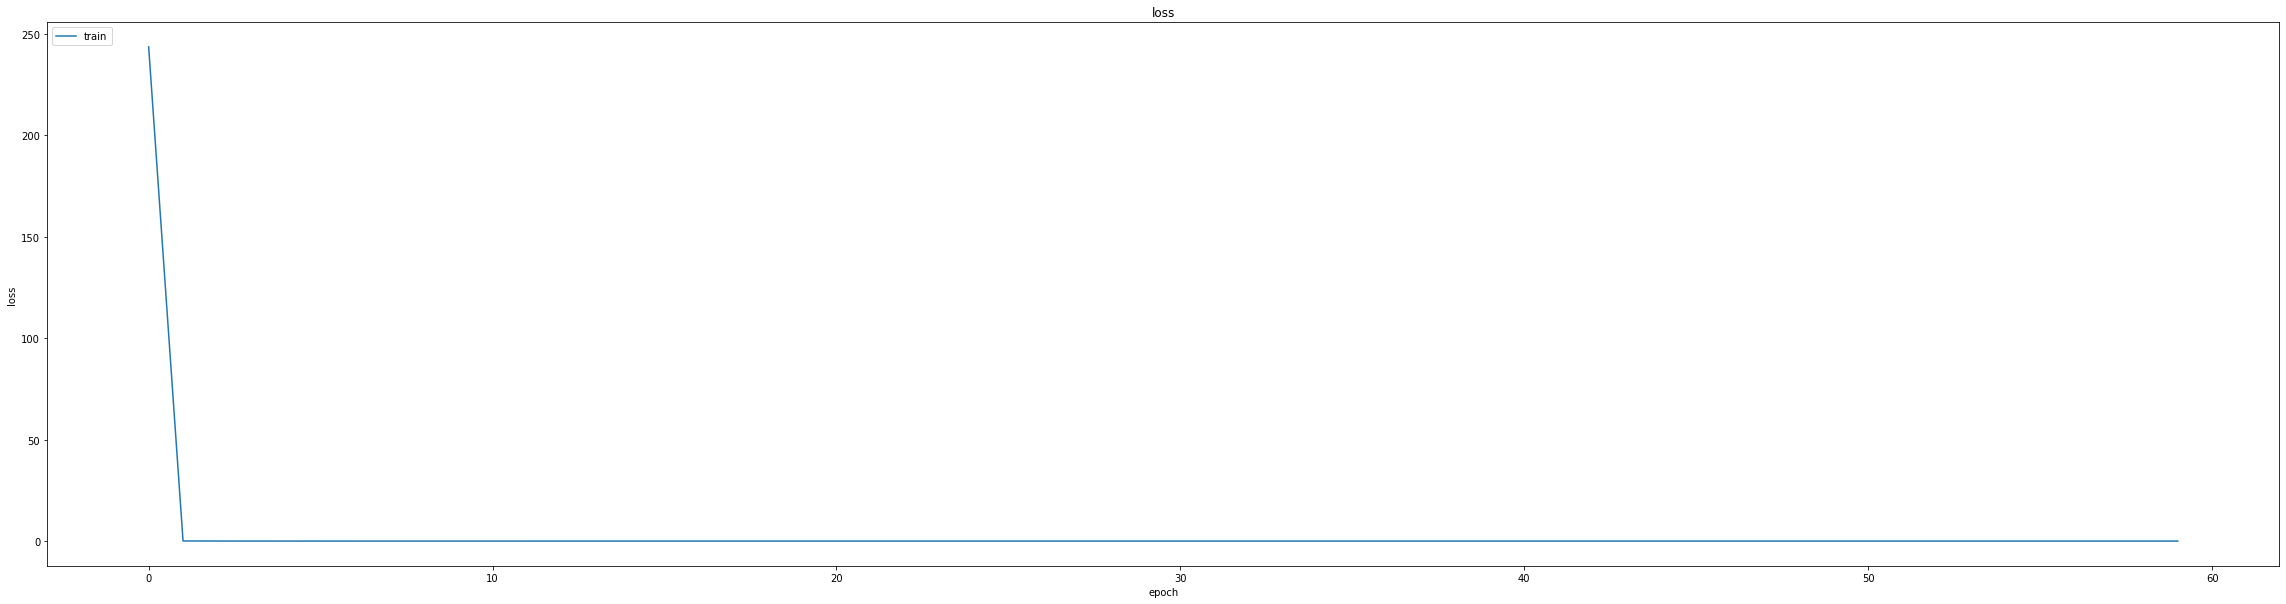

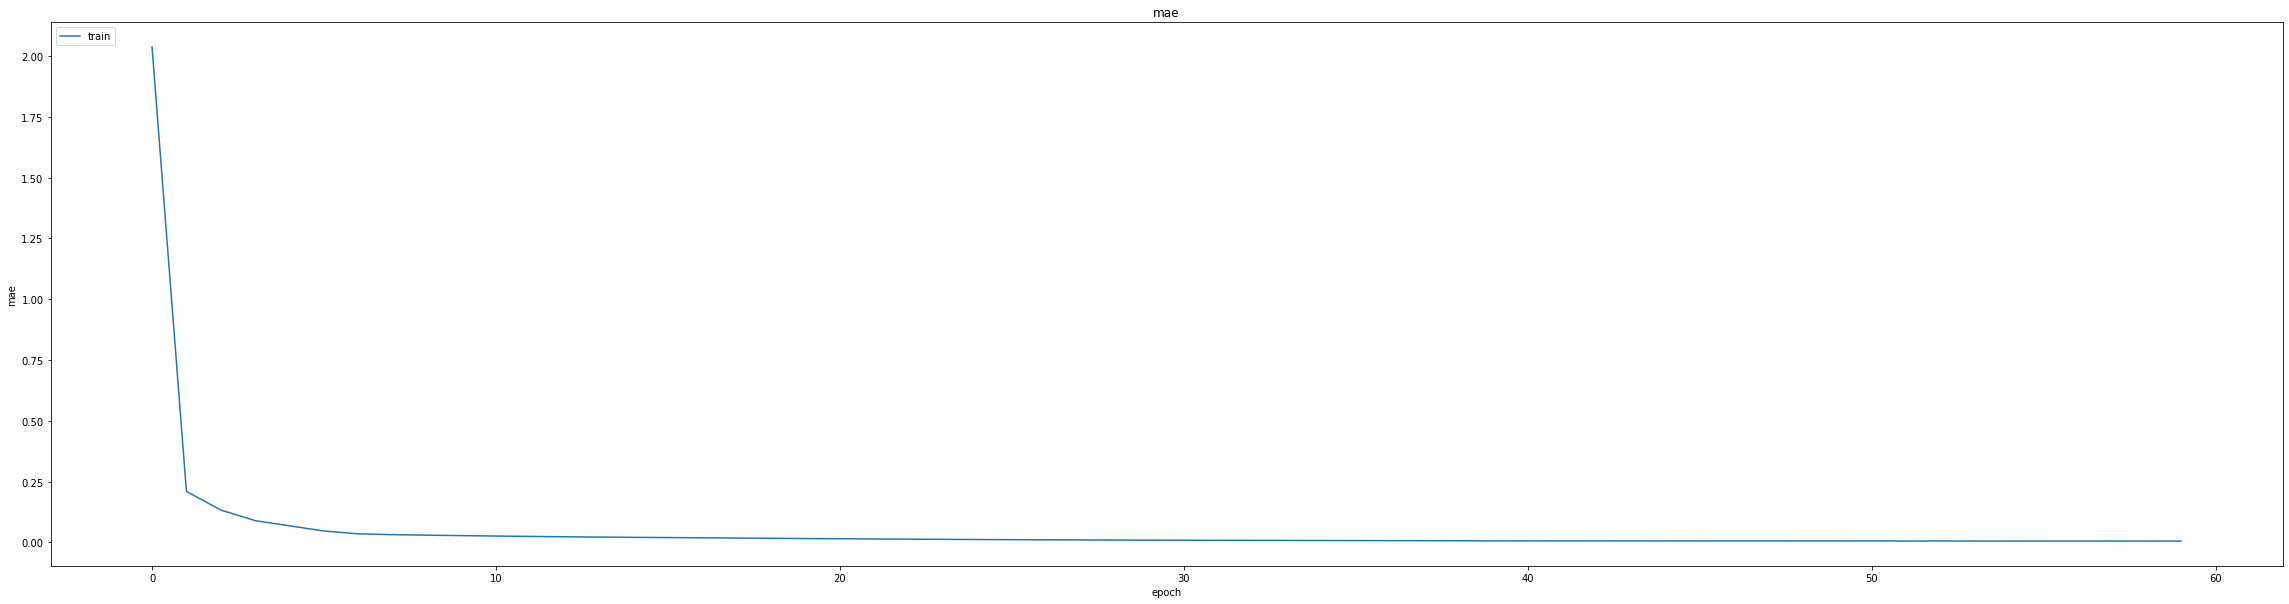

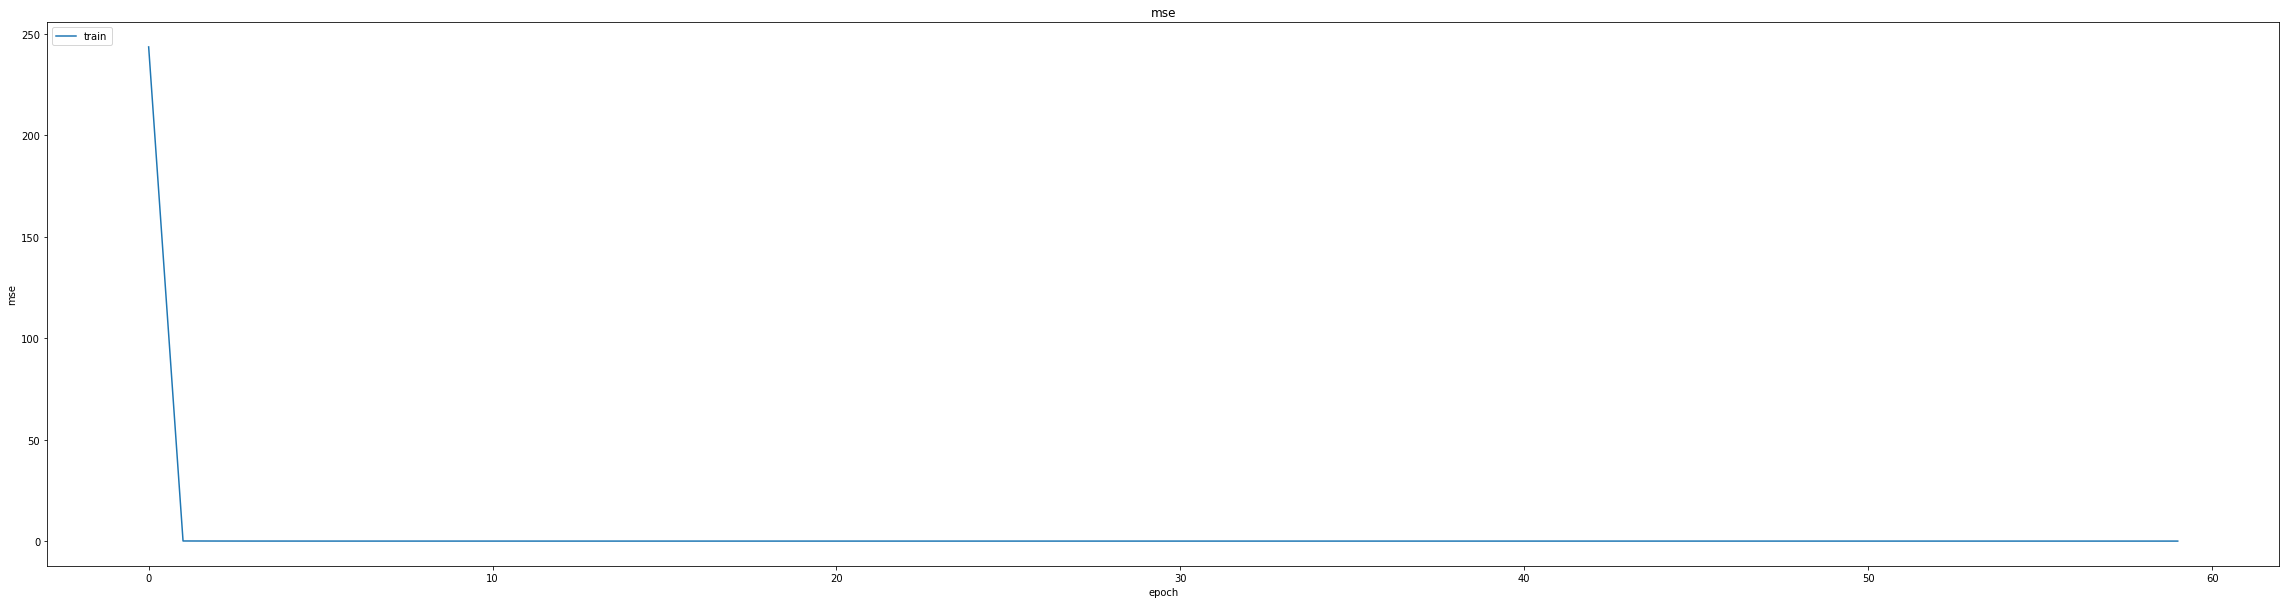

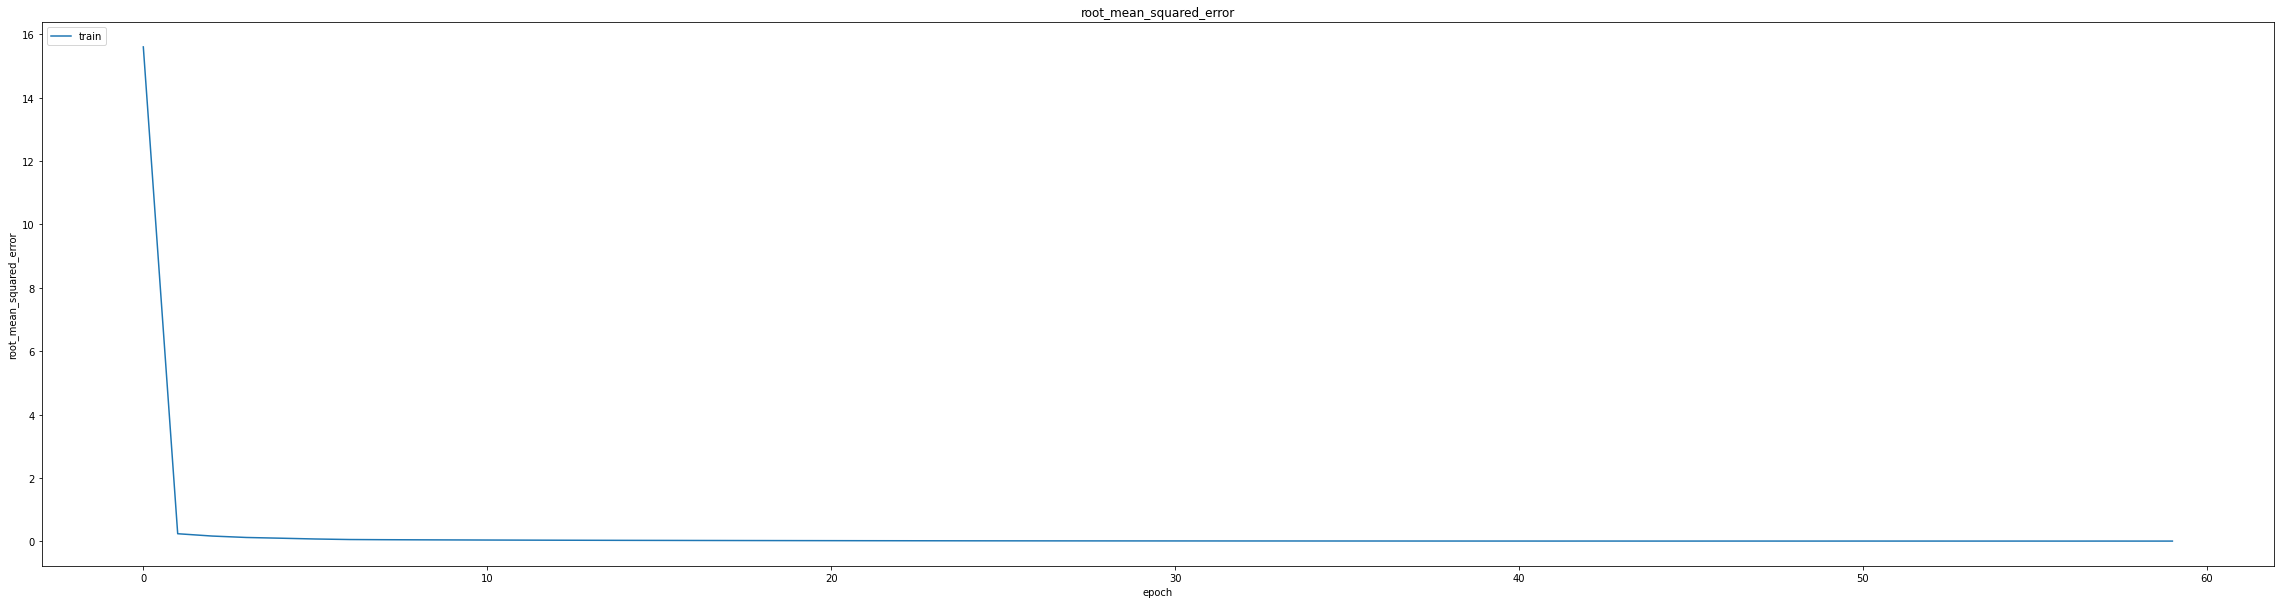

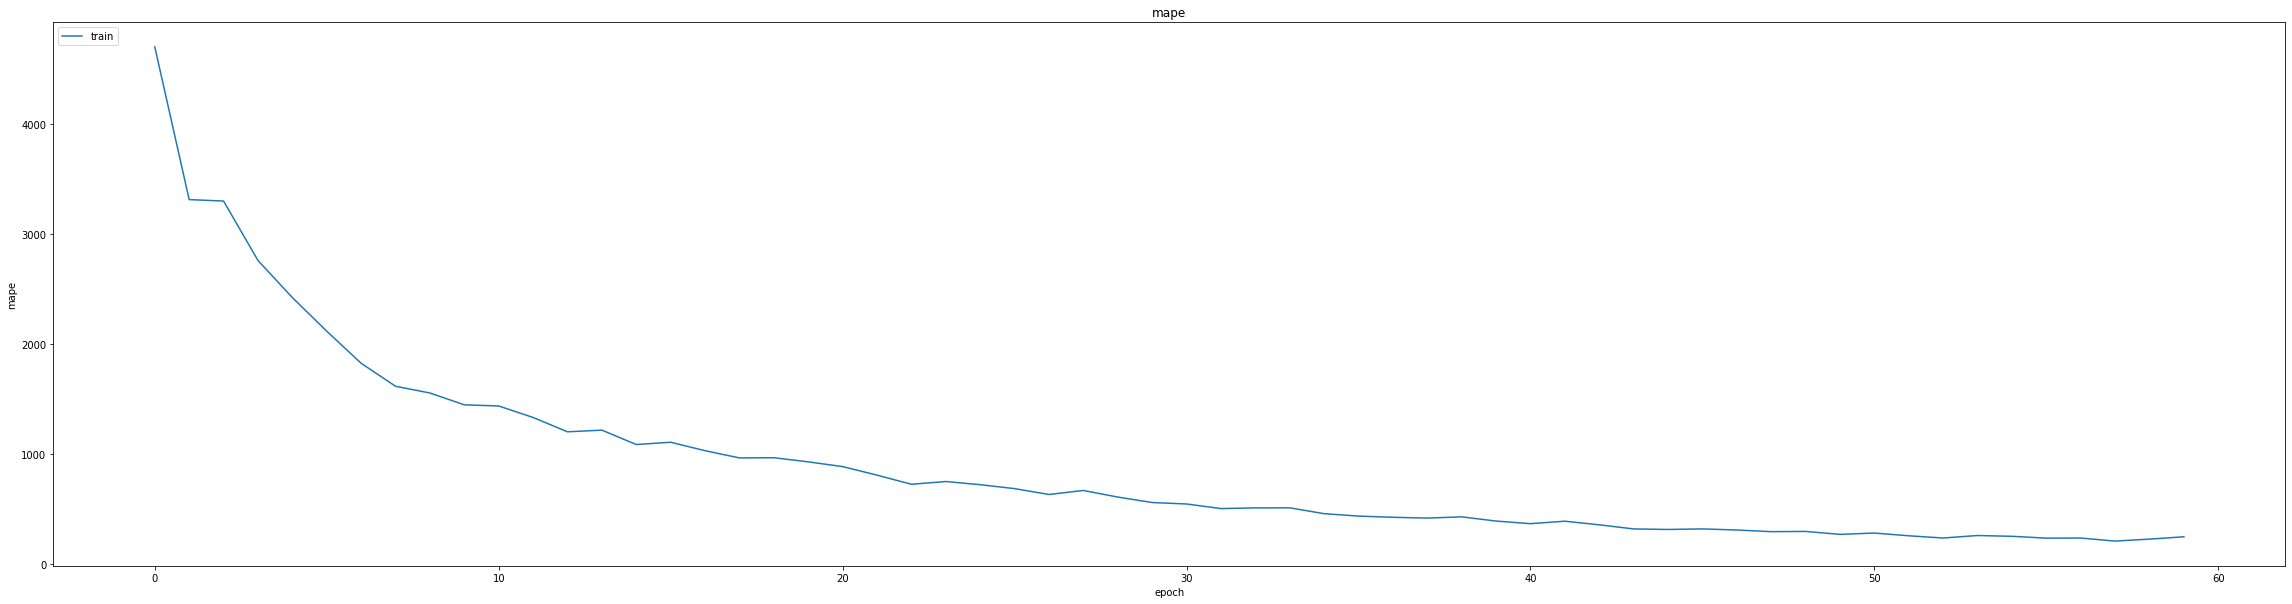

In [ ]:
thesis.SummarizeHistory(history)

In [ ]:
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
#print(min(histroy.history['val_mape']))
r2_scr = thesis.R_Squared_Score(model, x_val, y_val)
print(r2_scr)

0.008862254209816456
0.01091206818819046
1042/1042 [==============================] - 4s 3ms/step
0.9960768794879055


In [ ]:
model.load_weights("/content/drive/MyDrive/modelweights/CHF_USD_5min_CNN_LSTM(70-30)")
early_stopping = EarlyStopping(monitor='val_mse', patience=15)

In [ ]:

from keras.callbacks import LearningRateScheduler
import keras.backend as K

def scheduler(epoch):
    if epoch%2==0 and epoch!=0:
        lr = K.get_value(model.optimizer.lr)
        K.set_value(model.optimizer.lr, lr*.9)
        print("lr changed to {}".format(lr*.9))
    return K.get_value(model.optimizer.lr)
lr_decay = LearningRateScheduler(scheduler)

callbacks_list = [checkpoint, lr_decay, early_stopping]

Epochs=int(Epochs/3)

history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/20


404/405 [============================>.] - ETA: 0s - loss: 3.5543e-04 - mae: 0.0085 - mse: 3.5543e-04 - root_mean_squared_error: 0.0189 - mape: 268.6097
Epoch 1: val_mse did not improve from 0.00012
405/405 [==============================] - 11s 18ms/step - loss: 3.5521e-04 - mae: 0.0085 - mse: 3.5521e-04 - root_mean_squared_error: 0.0188 - mape: 268.4333 - val_loss: 1.9122e-04 - val_mae: 0.0122 - val_mse: 1.9122e-04 - val_root_mean_squared_error: 0.0138 - val_mape: 1164.9935 - lr: 0.0010
Epoch 2/20
405/405 [==============================] - ETA: 0s - loss: 3.6711e-05 - mae: 0.0047 - mse: 3.6711e-05 - root_mean_squared_error: 0.0061 - mape: 222.9610
Epoch 2: val_mse did not improve from 0.00012
405/405 [==============================] - 6s 16ms/step - loss: 3.6711e-05 - mae: 0.0047 - mse: 3.6711e-05 - root_mean_squared_error: 0.0061 - mape: 222.9610 - val_loss: 1.2959e-04 - val_mae: 0.0098 - val_mse: 1.2959e-04 - val_root_mean_squared_error: 0.0114 - val_mape: 994.8100 - lr: 0.0010
lr 

405/405 [==============================] - 14s 35ms/step - loss: 3.4879e-05 - mae: 0.0046 - mse: 3.4879e-05 - root_mean_squared_error: 0.0059 - mape: 242.7003 - val_loss: 1.1571e-04 - val_mae: 0.0092 - val_mse: 1.1571e-04 - val_root_mean_squared_error: 0.0108 - val_mape: 900.0359 - lr: 9.0000e-04
Epoch 4/20
405/405 [==============================] - ETA: 0s - loss: 3.8370e-05 - mae: 0.0048 - mse: 3.8370e-05 - root_mean_squared_error: 0.0062 - mape: 177.3272
Epoch 4: val_mse improved from 0.00012 to 0.00011, saving model to /content/drive/MyDrive/modelweights/CHF_USD_5min_CNN_LSTM(70-30)


405/405 [==============================] - 14s 35ms/step - loss: 3.8370e-05 - mae: 0.0048 - mse: 3.8370e-05 - root_mean_squared_error: 0.0062 - mape: 177.3272 - val_loss: 1.1345e-04 - val_mae: 0.0089 - val_mse: 1.1345e-04 - val_root_mean_squared_error: 0.0107 - val_mape: 895.7155 - lr: 9.0000e-04
lr changed to 0.0008100000384729356
Epoch 5/20
402/405 [============================>.] - ETA: 0s - loss: 4.0031e-05 - mae: 0.0048 - mse: 4.0031e-05 - root_mean_squared_error: 0.0063 - mape: 182.4605
Epoch 5: val_mse did not improve from 0.00011
405/405 [==============================] - 6s 16ms/step - loss: 4.0101e-05 - mae: 0.0048 - mse: 4.0101e-05 - root_mean_squared_error: 0.0063 - mape: 181.4472 - val_loss: 1.7563e-04 - val_mae: 0.0120 - val_mse: 1.7563e-04 - val_root_mean_squared_error: 0.0133 - val_mape: 880.9267 - lr: 8.1000e-04
Epoch 6/20
404/405 [============================>.] - ETA: 0s - loss: 4.6835e-05 - mae: 0.0052 - mse: 4.6835e-05 - root_mean_squared_error: 0.0068 - mape: 204.

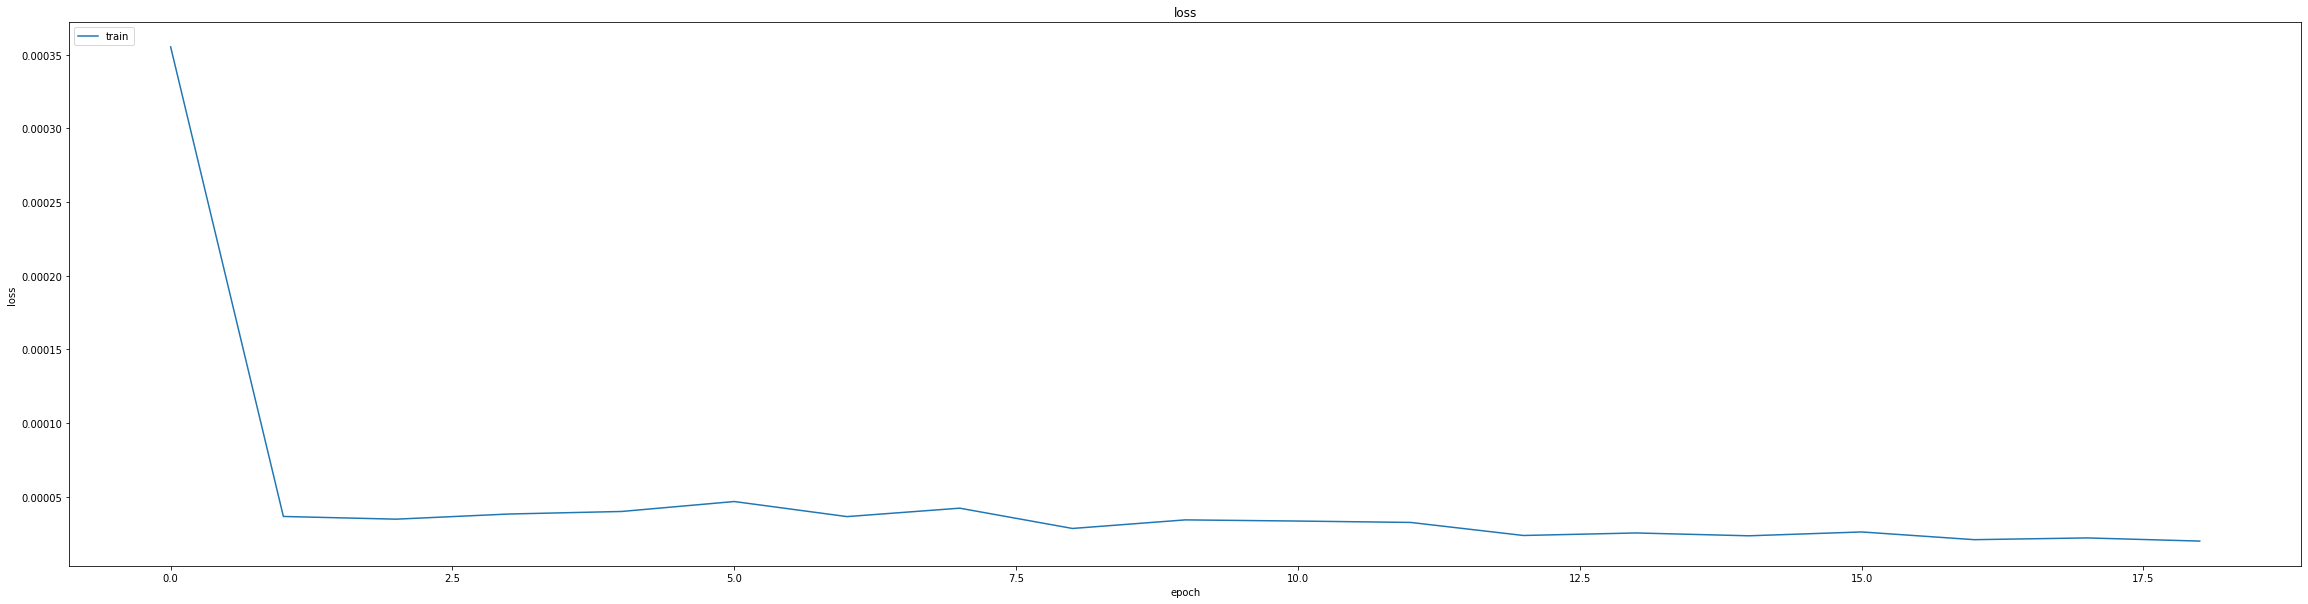

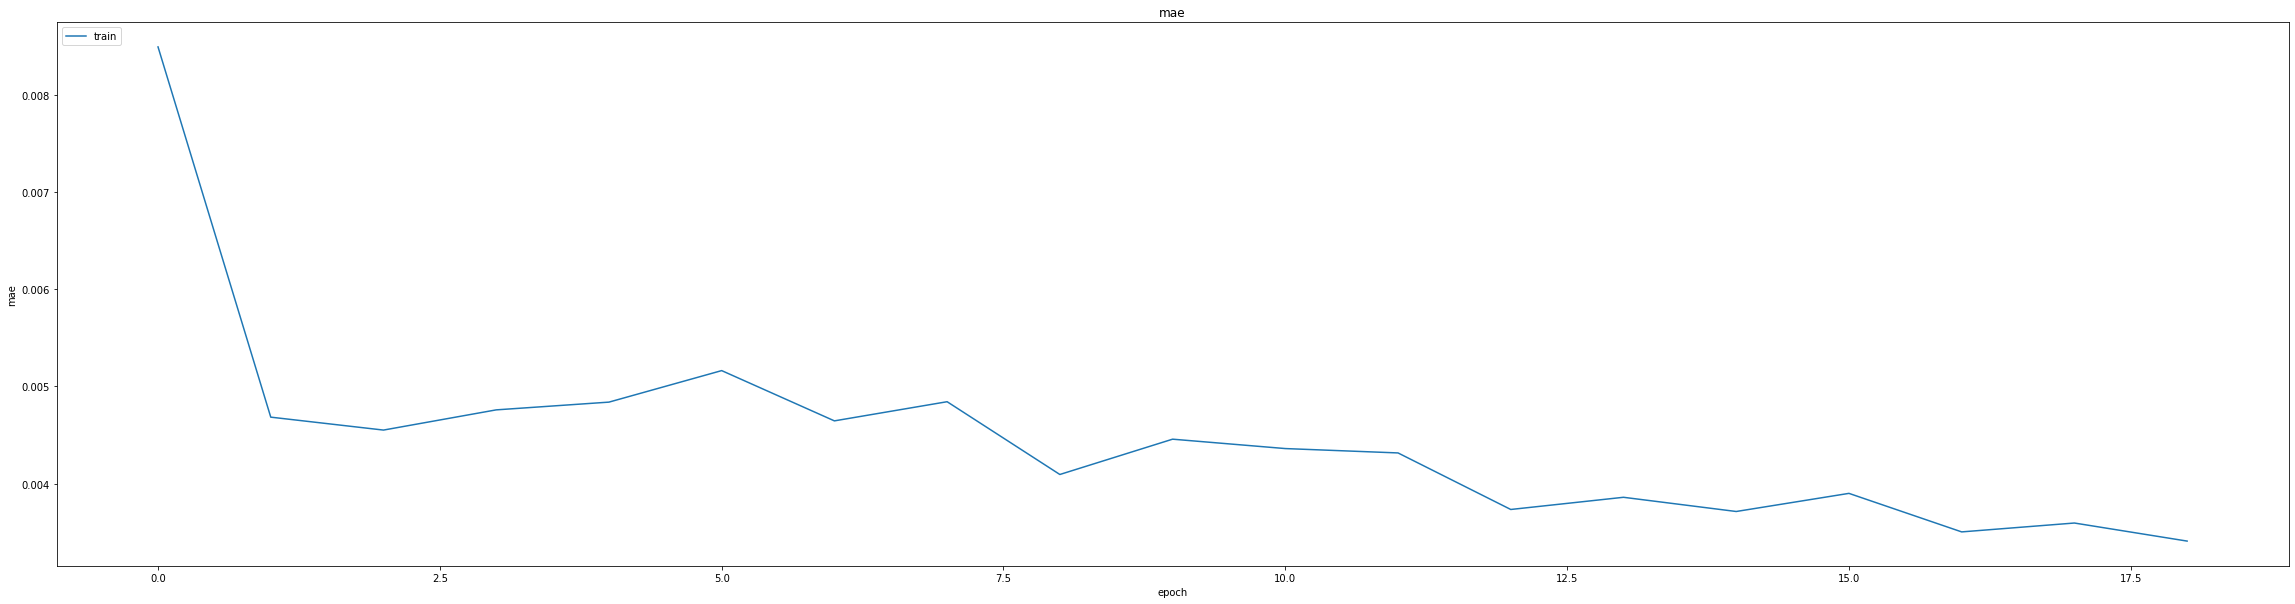

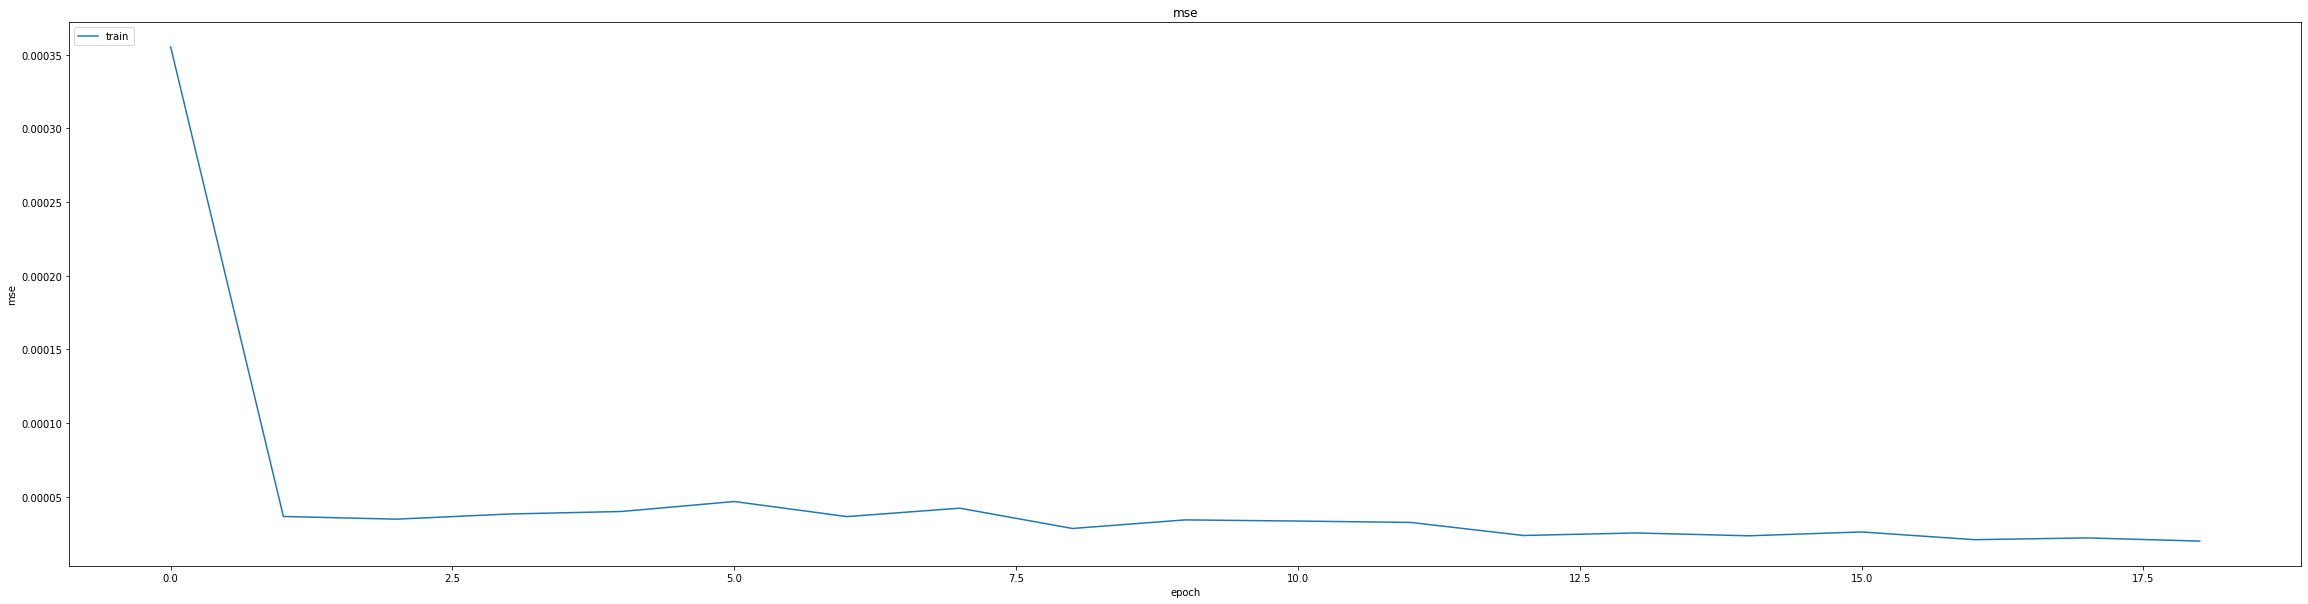

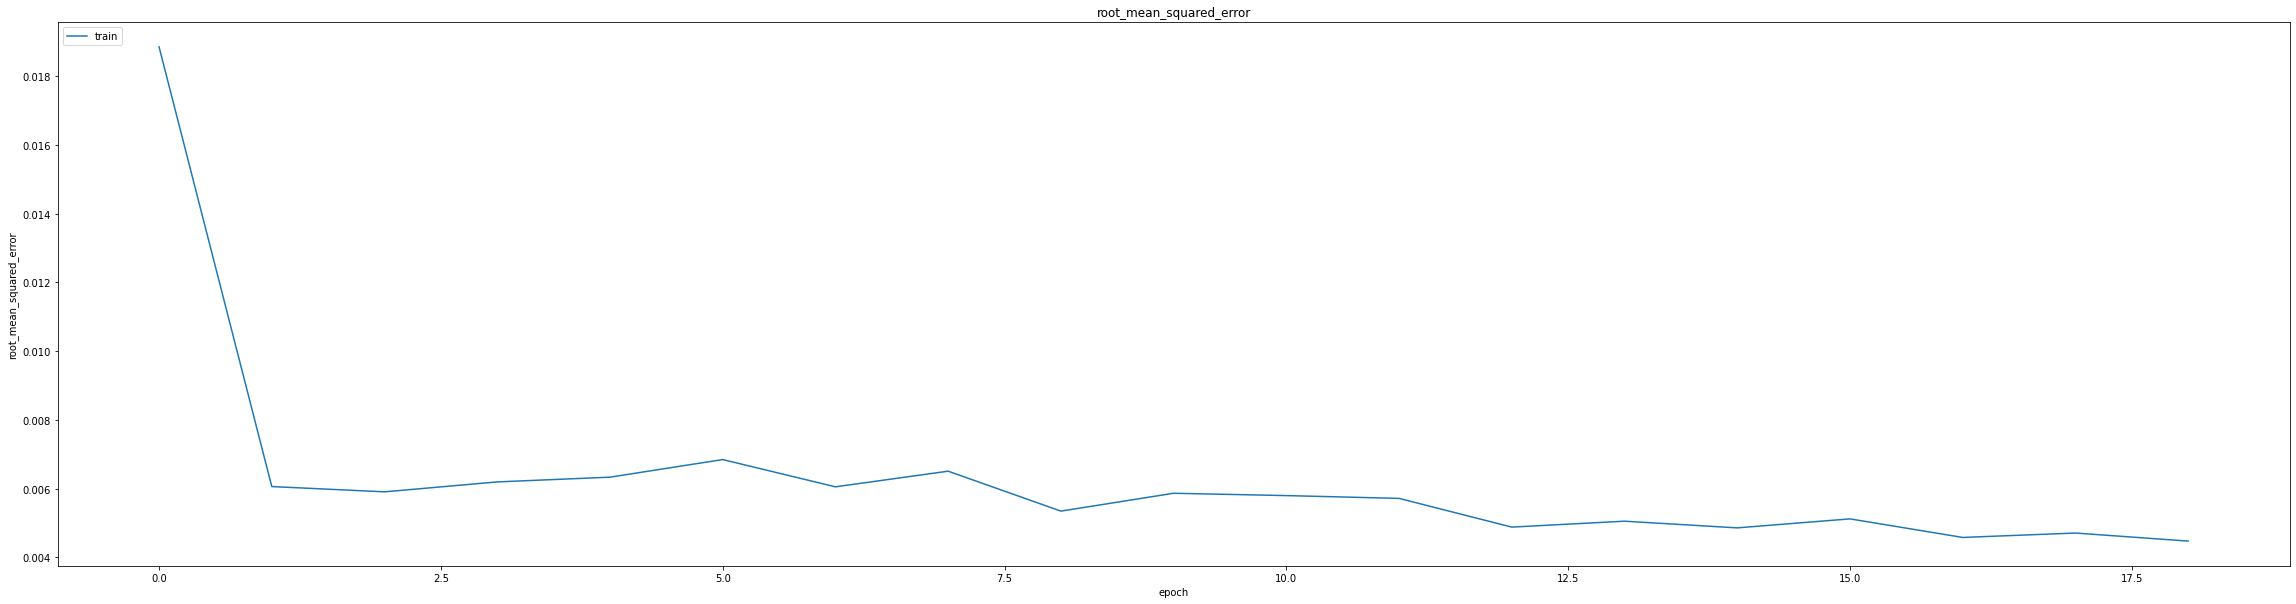

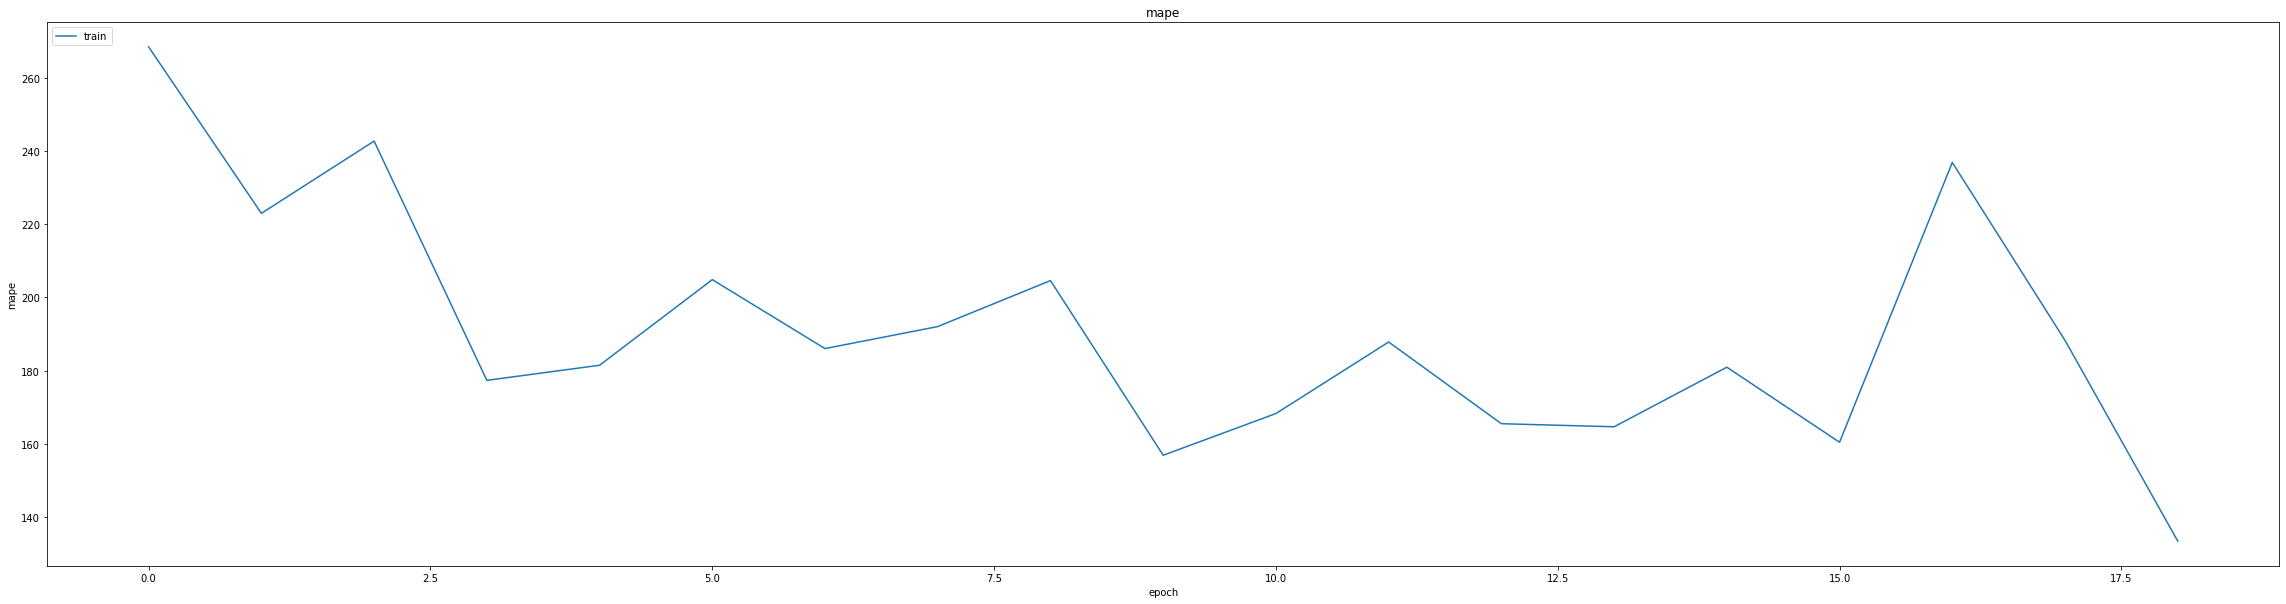

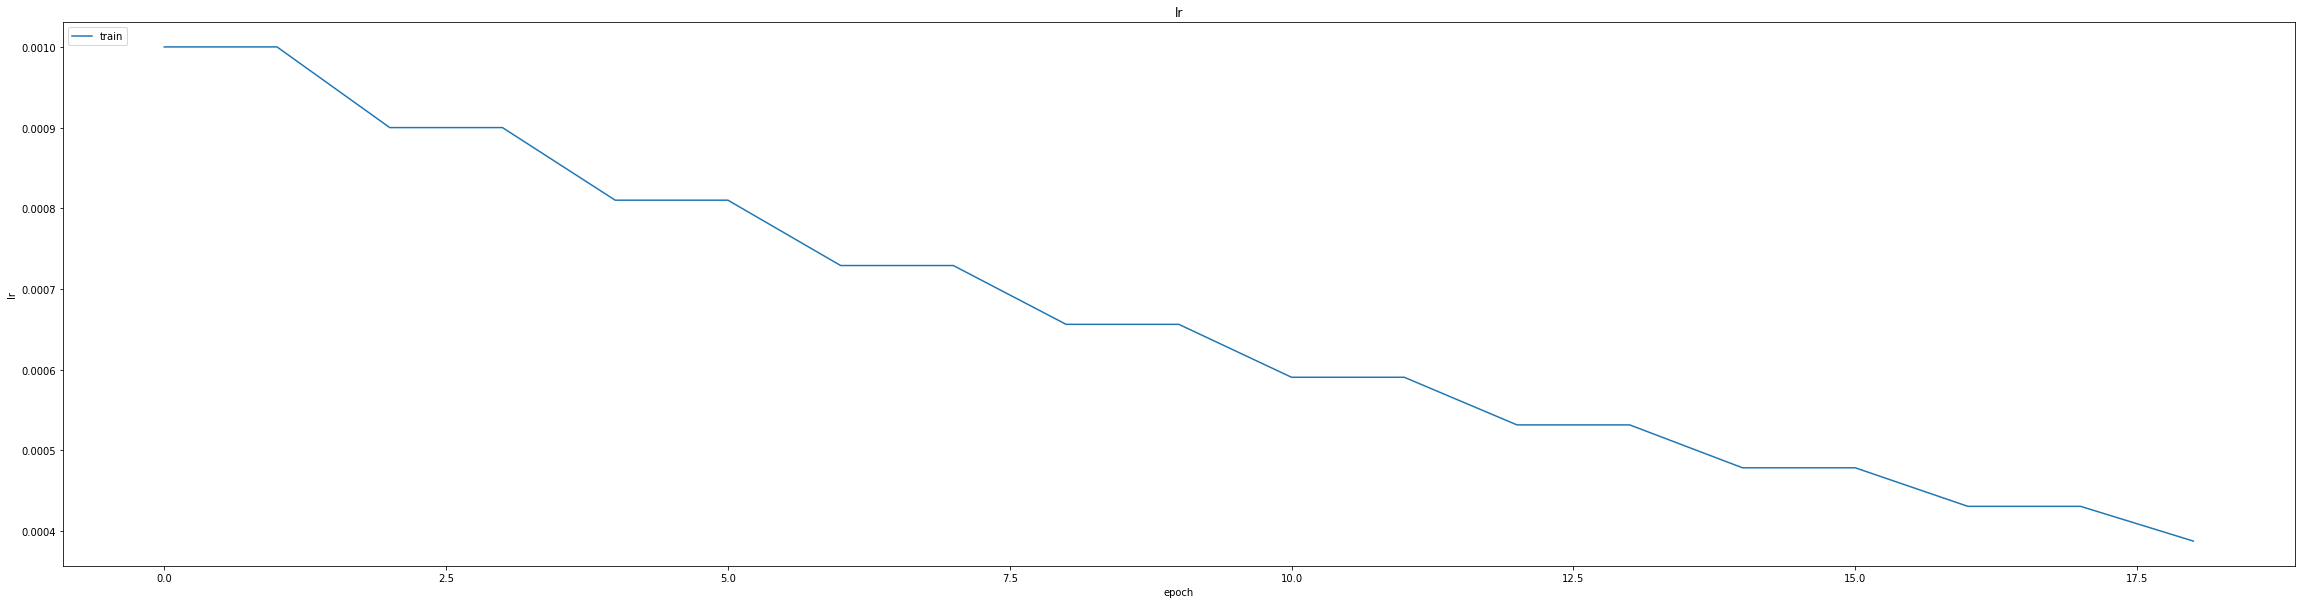

In [ ]:
thesis.SummarizeHistory(history)

In [ ]:
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
#print(min(histroy.history['val_mape']))
r2_scr = thesis.R_Squared_Score(model, x_val, y_val)
print(r2_scr)

0.008852134458720684
0.010651320219039917
1042/1042 [==============================] - 4s 3ms/step
0.9944893965108592


1042/1042 [==============================] - 3s 3ms/step


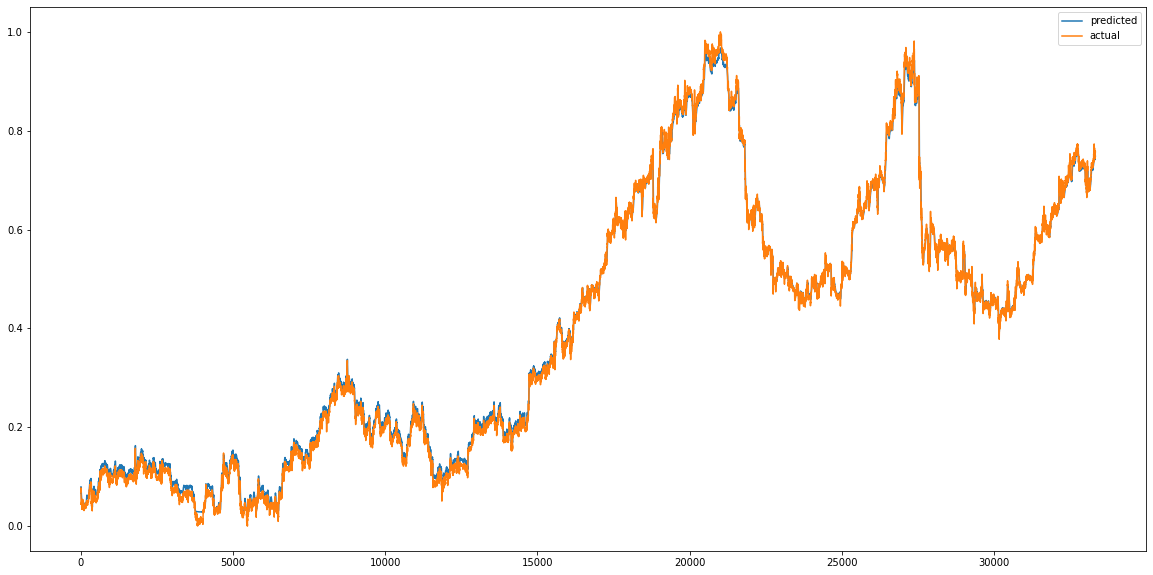

In [ ]:
model.load_weights("/content/drive/MyDrive/modelweights/CHF_USD_5min_CNN_LSTM(70-30)")
val_predictions=thesis.CreatPrediction(model,x_val, y_val)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


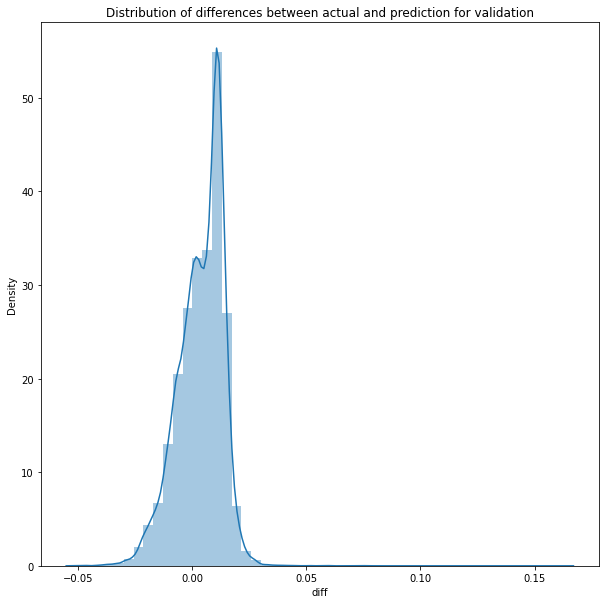

In [ ]:
val_predictions['diff'] = val_predictions['predicted'] - val_predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(val_predictions['diff']);
plt.title('Distribution of differences between actual and prediction for validation')
plt.show()

1042/1042 [==============================] - 3s 3ms/step


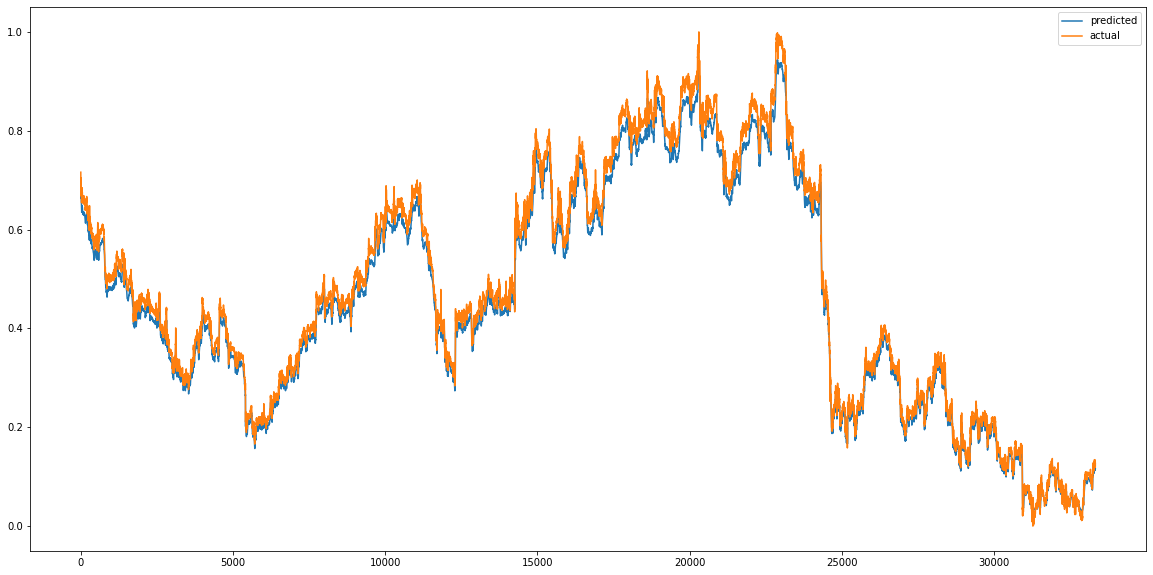

In [ ]:
predictions=thesis.CreatPrediction(model,x_test, y_test)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


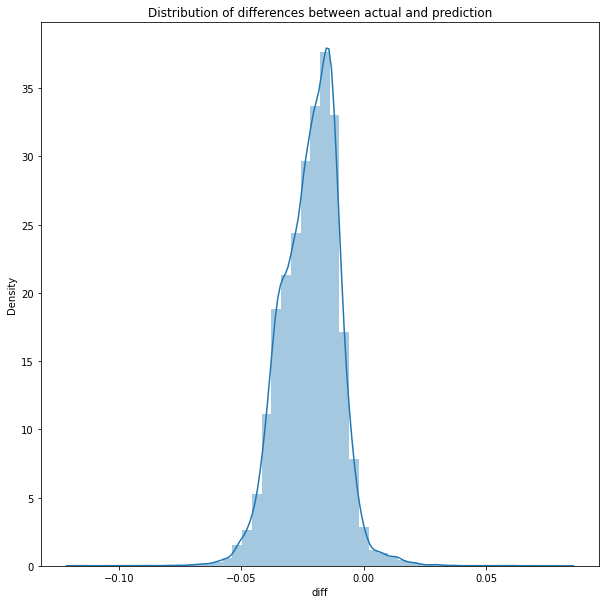

In [ ]:
predictions['diff'] = predictions['predicted'] - predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(predictions['diff']);
plt.title('Distribution of differences between actual and prediction')
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
print("MSE : ", mean_squared_error(predictions['predicted'].values, predictions['actual'].values))

from math import sqrt
print("RMSE : ", sqrt(mean_squared_error(predictions['predicted'].values, predictions['actual'].values)))

print("MAE : ", mean_absolute_error(predictions['predicted'].values, predictions['actual'].values))

test_r2_score=thesis.R_Squared_Score(model, x_test, y_test)
print('R2_Score  :', test_r2_score)
predictions['diff'].describe()

MSE :  0.0006124455964328126
RMSE :  0.024747638199085032
MAE :  0.022158241342738978
1042/1042 [==============================] - 3s 3ms/step
R2_Score  : 0.9894869585089859


count    33333.000000
mean        -0.021808
std          0.011699
min         -0.117069
25%         -0.029659
50%         -0.020700
75%         -0.013787
max          0.081224
Name: diff, dtype: float64

**CNN_GRU_MODEL**

In [ ]:
model= thesis.CNN_GRU_Model(x_train)
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_2 (Conv1D)           (None, 24, 64)            2368      
                                                                 
 gru_2 (GRU)                 (None, 24, 256)           247296    
                                                                 
 dropout_4 (Dropout)         (None, 24, 256)           0         
                                                                 
 gru_3 (GRU)                 (None, 64)                61824     
                                                                 
 dense_12 (Dense)            (None, 32)                2080      
                                                                 
 dense_13 (Dense)            (None, 16)                528       
                                                                 
 dense_14 (Dense)            (None, 1)                

In [ ]:
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping

# Set the metric you want to monitor, the threshold, and the patience value
early_stopping = EarlyStopping(monitor='val_mse', patience=30)

checkpoint = ModelCheckpoint("/content/drive/MyDrive/modelweights/CHF_USD_5min_CNN_GRU(70-30)", monitor='val_mse', verbose=1, save_best_only=True, mode='min')

# Fit
callbacks_list = [checkpoint, early_stopping ]

Epochs=60
Batch_size=385
history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/60
401/405 [============================>.] - ETA: 0s - loss: 461.6958 - mae: 3.4856 - mse: 461.6958 - root_mean_squared_error: 21.4871 - mape: 6969.0557
Epoch 1: val_mse improved from inf to 0.06258, saving model to /content/drive/MyDrive/modelweights/CHF_USD_5min_CNN_GRU(70-30)


405/405 [==============================] - 16s 32ms/step - loss: 457.9642 - mae: 3.4585 - mse: 457.9642 - root_mean_squared_error: 21.4001 - mape: 6913.2568 - val_loss: 0.0626 - val_mae: 0.1879 - val_mse: 0.0626 - val_root_mean_squared_error: 0.2502 - val_mape: 17897.6270
Epoch 2/60
405/405 [==============================] - ETA: 0s - loss: 0.0143 - mae: 0.0818 - mse: 0.0143 - root_mean_squared_error: 0.1195 - mape: 3471.6140
Epoch 2: val_mse improved from 0.06258 to 0.02605, saving model to /content/drive/MyDrive/modelweights/CHF_USD_5min_CNN_GRU(70-30)


405/405 [==============================] - 13s 31ms/step - loss: 0.0143 - mae: 0.0818 - mse: 0.0143 - root_mean_squared_error: 0.1195 - mape: 3471.6140 - val_loss: 0.0261 - val_mae: 0.1374 - val_mse: 0.0261 - val_root_mean_squared_error: 0.1614 - val_mape: 12041.8457
Epoch 3/60
404/405 [============================>.] - ETA: 0s - loss: 0.0055 - mae: 0.0476 - mse: 0.0055 - root_mean_squared_error: 0.0739 - mape: 2523.6409
Epoch 3: val_mse improved from 0.02605 to 0.01248, saving model to /content/drive/MyDrive/modelweights/CHF_USD_5min_CNN_GRU(70-30)


405/405 [==============================] - 13s 32ms/step - loss: 0.0055 - mae: 0.0476 - mse: 0.0055 - root_mean_squared_error: 0.0739 - mape: 2521.9800 - val_loss: 0.0125 - val_mae: 0.0893 - val_mse: 0.0125 - val_root_mean_squared_error: 0.1117 - val_mape: 9587.1445
Epoch 4/60
404/405 [============================>.] - ETA: 0s - loss: 0.0030 - mae: 0.0354 - mse: 0.0030 - root_mean_squared_error: 0.0545 - mape: 1880.6954
Epoch 4: val_mse improved from 0.01248 to 0.00858, saving model to /content/drive/MyDrive/modelweights/CHF_USD_5min_CNN_GRU(70-30)


405/405 [==============================] - 13s 31ms/step - loss: 0.0030 - mae: 0.0354 - mse: 0.0030 - root_mean_squared_error: 0.0545 - mape: 1879.4667 - val_loss: 0.0086 - val_mae: 0.0755 - val_mse: 0.0086 - val_root_mean_squared_error: 0.0926 - val_mape: 8291.1729
Epoch 5/60
403/405 [============================>.] - ETA: 0s - loss: 0.0020 - mae: 0.0293 - mse: 0.0020 - root_mean_squared_error: 0.0442 - mape: 1593.5009
Epoch 5: val_mse improved from 0.00858 to 0.00614, saving model to /content/drive/MyDrive/modelweights/CHF_USD_5min_CNN_GRU(70-30)


405/405 [==============================] - 13s 31ms/step - loss: 0.0019 - mae: 0.0293 - mse: 0.0019 - root_mean_squared_error: 0.0441 - mape: 1588.5509 - val_loss: 0.0061 - val_mae: 0.0632 - val_mse: 0.0061 - val_root_mean_squared_error: 0.0784 - val_mape: 7408.5337
Epoch 6/60
401/405 [============================>.] - ETA: 0s - loss: 0.0014 - mae: 0.0253 - mse: 0.0014 - root_mean_squared_error: 0.0373 - mape: 1340.5934
Epoch 6: val_mse improved from 0.00614 to 0.00494, saving model to /content/drive/MyDrive/modelweights/CHF_USD_5min_CNN_GRU(70-30)


405/405 [==============================] - 13s 31ms/step - loss: 0.0014 - mae: 0.0253 - mse: 0.0014 - root_mean_squared_error: 0.0373 - mape: 1329.8915 - val_loss: 0.0049 - val_mae: 0.0575 - val_mse: 0.0049 - val_root_mean_squared_error: 0.0703 - val_mape: 6653.8828
Epoch 7/60
402/405 [============================>.] - ETA: 0s - loss: 0.0011 - mae: 0.0225 - mse: 0.0011 - root_mean_squared_error: 0.0326 - mape: 1436.9657
Epoch 7: val_mse improved from 0.00494 to 0.00430, saving model to /content/drive/MyDrive/modelweights/CHF_USD_5min_CNN_GRU(70-30)


405/405 [==============================] - 12s 30ms/step - loss: 0.0011 - mae: 0.0225 - mse: 0.0011 - root_mean_squared_error: 0.0326 - mape: 1428.9924 - val_loss: 0.0043 - val_mae: 0.0547 - val_mse: 0.0043 - val_root_mean_squared_error: 0.0656 - val_mape: 6034.7603
Epoch 8/60
404/405 [============================>.] - ETA: 0s - loss: 8.4692e-04 - mae: 0.0204 - mse: 8.4692e-04 - root_mean_squared_error: 0.0291 - mape: 1162.4900
Epoch 8: val_mse improved from 0.00430 to 0.00320, saving model to /content/drive/MyDrive/modelweights/CHF_USD_5min_CNN_GRU(70-30)


405/405 [==============================] - 13s 32ms/step - loss: 8.4667e-04 - mae: 0.0204 - mse: 8.4667e-04 - root_mean_squared_error: 0.0291 - mape: 1161.7240 - val_loss: 0.0032 - val_mae: 0.0473 - val_mse: 0.0032 - val_root_mean_squared_error: 0.0566 - val_mape: 5536.6099
Epoch 9/60
402/405 [============================>.] - ETA: 0s - loss: 6.8708e-04 - mae: 0.0186 - mse: 6.8708e-04 - root_mean_squared_error: 0.0262 - mape: 1117.9266
Epoch 9: val_mse improved from 0.00320 to 0.00253, saving model to /content/drive/MyDrive/modelweights/CHF_USD_5min_CNN_GRU(70-30)


405/405 [==============================] - 13s 31ms/step - loss: 6.8696e-04 - mae: 0.0186 - mse: 6.8696e-04 - root_mean_squared_error: 0.0262 - mape: 1111.7037 - val_loss: 0.0025 - val_mae: 0.0419 - val_mse: 0.0025 - val_root_mean_squared_error: 0.0503 - val_mape: 5111.6069
Epoch 10/60
401/405 [============================>.] - ETA: 0s - loss: 5.5622e-04 - mae: 0.0169 - mse: 5.5622e-04 - root_mean_squared_error: 0.0236 - mape: 1062.3933
Epoch 10: val_mse improved from 0.00253 to 0.00233, saving model to /content/drive/MyDrive/modelweights/CHF_USD_5min_CNN_GRU(70-30)


405/405 [==============================] - 12s 30ms/step - loss: 5.5630e-04 - mae: 0.0169 - mse: 5.5630e-04 - root_mean_squared_error: 0.0236 - mape: 1053.9218 - val_loss: 0.0023 - val_mae: 0.0410 - val_mse: 0.0023 - val_root_mean_squared_error: 0.0483 - val_mape: 4741.7222
Epoch 11/60
401/405 [============================>.] - ETA: 0s - loss: 4.6762e-04 - mae: 0.0156 - mse: 4.6762e-04 - root_mean_squared_error: 0.0216 - mape: 1040.7526
Epoch 11: val_mse improved from 0.00233 to 0.00199, saving model to /content/drive/MyDrive/modelweights/CHF_USD_5min_CNN_GRU(70-30)


405/405 [==============================] - 13s 31ms/step - loss: 4.6709e-04 - mae: 0.0156 - mse: 4.6709e-04 - root_mean_squared_error: 0.0216 - mape: 1032.3888 - val_loss: 0.0020 - val_mae: 0.0377 - val_mse: 0.0020 - val_root_mean_squared_error: 0.0446 - val_mape: 4445.5278
Epoch 12/60
403/405 [============================>.] - ETA: 0s - loss: 4.0335e-04 - mae: 0.0145 - mse: 4.0335e-04 - root_mean_squared_error: 0.0201 - mape: 916.5417
Epoch 12: val_mse improved from 0.00199 to 0.00154, saving model to /content/drive/MyDrive/modelweights/CHF_USD_5min_CNN_GRU(70-30)


405/405 [==============================] - 13s 32ms/step - loss: 4.0351e-04 - mae: 0.0145 - mse: 4.0351e-04 - root_mean_squared_error: 0.0201 - mape: 913.6968 - val_loss: 0.0015 - val_mae: 0.0326 - val_mse: 0.0015 - val_root_mean_squared_error: 0.0392 - val_mape: 4179.8071
Epoch 13/60
401/405 [============================>.] - ETA: 0s - loss: 3.5709e-04 - mae: 0.0137 - mse: 3.5709e-04 - root_mean_squared_error: 0.0189 - mape: 888.0859
Epoch 13: val_mse improved from 0.00154 to 0.00149, saving model to /content/drive/MyDrive/modelweights/CHF_USD_5min_CNN_GRU(70-30)


405/405 [==============================] - 13s 32ms/step - loss: 3.5686e-04 - mae: 0.0137 - mse: 3.5686e-04 - root_mean_squared_error: 0.0189 - mape: 880.9588 - val_loss: 0.0015 - val_mae: 0.0327 - val_mse: 0.0015 - val_root_mean_squared_error: 0.0386 - val_mape: 3944.7729
Epoch 14/60
402/405 [============================>.] - ETA: 0s - loss: 3.1449e-04 - mae: 0.0129 - mse: 3.1449e-04 - root_mean_squared_error: 0.0177 - mape: 829.2722
Epoch 14: val_mse improved from 0.00149 to 0.00136, saving model to /content/drive/MyDrive/modelweights/CHF_USD_5min_CNN_GRU(70-30)


405/405 [==============================] - 12s 31ms/step - loss: 3.1463e-04 - mae: 0.0129 - mse: 3.1463e-04 - root_mean_squared_error: 0.0177 - mape: 824.6646 - val_loss: 0.0014 - val_mae: 0.0310 - val_mse: 0.0014 - val_root_mean_squared_error: 0.0369 - val_mape: 3729.3933
Epoch 15/60
404/405 [============================>.] - ETA: 0s - loss: 2.8182e-04 - mae: 0.0123 - mse: 2.8182e-04 - root_mean_squared_error: 0.0168 - mape: 773.6622
Epoch 15: val_mse improved from 0.00136 to 0.00104, saving model to /content/drive/MyDrive/modelweights/CHF_USD_5min_CNN_GRU(70-30)


405/405 [==============================] - 13s 31ms/step - loss: 2.8186e-04 - mae: 0.0123 - mse: 2.8186e-04 - root_mean_squared_error: 0.0168 - mape: 773.1545 - val_loss: 0.0010 - val_mae: 0.0271 - val_mse: 0.0010 - val_root_mean_squared_error: 0.0322 - val_mape: 3540.5627
Epoch 16/60
401/405 [============================>.] - ETA: 0s - loss: 2.5149e-04 - mae: 0.0116 - mse: 2.5149e-04 - root_mean_squared_error: 0.0159 - mape: 716.3169
Epoch 16: val_mse did not improve from 0.00104
405/405 [==============================] - 6s 14ms/step - loss: 2.5138e-04 - mae: 0.0116 - mse: 2.5138e-04 - root_mean_squared_error: 0.0159 - mape: 710.5922 - val_loss: 0.0012 - val_mae: 0.0300 - val_mse: 0.0012 - val_root_mean_squared_error: 0.0349 - val_mape: 3366.8823
Epoch 17/60
402/405 [============================>.] - ETA: 0s - loss: 2.2902e-04 - mae: 0.0111 - mse: 2.2902e-04 - root_mean_squared_error: 0.0151 - mape: 682.7964
Epoch 17: val_mse improved from 0.00104 to 0.00095, saving model to /content

405/405 [==============================] - 12s 31ms/step - loss: 2.2898e-04 - mae: 0.0111 - mse: 2.2898e-04 - root_mean_squared_error: 0.0151 - mape: 679.0328 - val_loss: 9.5170e-04 - val_mae: 0.0264 - val_mse: 9.5170e-04 - val_root_mean_squared_error: 0.0308 - val_mape: 3204.2236
Epoch 18/60
403/405 [============================>.] - ETA: 0s - loss: 2.0898e-04 - mae: 0.0106 - mse: 2.0898e-04 - root_mean_squared_error: 0.0145 - mape: 633.3722
Epoch 18: val_mse improved from 0.00095 to 0.00092, saving model to /content/drive/MyDrive/modelweights/CHF_USD_5min_CNN_GRU(70-30)


405/405 [==============================] - 12s 31ms/step - loss: 2.0891e-04 - mae: 0.0106 - mse: 2.0891e-04 - root_mean_squared_error: 0.0145 - mape: 631.3995 - val_loss: 9.2089e-04 - val_mae: 0.0260 - val_mse: 9.2089e-04 - val_root_mean_squared_error: 0.0303 - val_mape: 3052.3049
Epoch 19/60
403/405 [============================>.] - ETA: 0s - loss: 1.9446e-04 - mae: 0.0102 - mse: 1.9446e-04 - root_mean_squared_error: 0.0139 - mape: 612.5395
Epoch 19: val_mse improved from 0.00092 to 0.00092, saving model to /content/drive/MyDrive/modelweights/CHF_USD_5min_CNN_GRU(70-30)


405/405 [==============================] - 13s 32ms/step - loss: 1.9448e-04 - mae: 0.0102 - mse: 1.9448e-04 - root_mean_squared_error: 0.0139 - mape: 610.6315 - val_loss: 9.1953e-04 - val_mae: 0.0261 - val_mse: 9.1953e-04 - val_root_mean_squared_error: 0.0303 - val_mape: 2921.3906
Epoch 20/60
404/405 [============================>.] - ETA: 0s - loss: 1.8112e-04 - mae: 0.0099 - mse: 1.8112e-04 - root_mean_squared_error: 0.0135 - mape: 604.7950
Epoch 20: val_mse improved from 0.00092 to 0.00091, saving model to /content/drive/MyDrive/modelweights/CHF_USD_5min_CNN_GRU(70-30)


405/405 [==============================] - 13s 31ms/step - loss: 1.8112e-04 - mae: 0.0099 - mse: 1.8112e-04 - root_mean_squared_error: 0.0135 - mape: 604.3975 - val_loss: 9.0564e-04 - val_mae: 0.0259 - val_mse: 9.0564e-04 - val_root_mean_squared_error: 0.0301 - val_mape: 2796.9355
Epoch 21/60
403/405 [============================>.] - ETA: 0s - loss: 1.6819e-04 - mae: 0.0096 - mse: 1.6819e-04 - root_mean_squared_error: 0.0130 - mape: 628.9733
Epoch 21: val_mse did not improve from 0.00091
405/405 [==============================] - 6s 14ms/step - loss: 1.6818e-04 - mae: 0.0096 - mse: 1.6818e-04 - root_mean_squared_error: 0.0130 - mape: 627.0193 - val_loss: 9.6856e-04 - val_mae: 0.0268 - val_mse: 9.6856e-04 - val_root_mean_squared_error: 0.0311 - val_mape: 2688.3721
Epoch 22/60
404/405 [============================>.] - ETA: 0s - loss: 1.5719e-04 - mae: 0.0092 - mse: 1.5719e-04 - root_mean_squared_error: 0.0125 - mape: 535.1329
Epoch 22: val_mse improved from 0.00091 to 0.00077, saving m

405/405 [==============================] - 12s 30ms/step - loss: 1.5718e-04 - mae: 0.0092 - mse: 1.5718e-04 - root_mean_squared_error: 0.0125 - mape: 534.7801 - val_loss: 7.6579e-04 - val_mae: 0.0236 - val_mse: 7.6579e-04 - val_root_mean_squared_error: 0.0277 - val_mape: 2581.1335
Epoch 23/60
404/405 [============================>.] - ETA: 0s - loss: 1.4755e-04 - mae: 0.0090 - mse: 1.4755e-04 - root_mean_squared_error: 0.0121 - mape: 549.3997
Epoch 23: val_mse improved from 0.00077 to 0.00074, saving model to /content/drive/MyDrive/modelweights/CHF_USD_5min_CNN_GRU(70-30)


405/405 [==============================] - 13s 32ms/step - loss: 1.4754e-04 - mae: 0.0089 - mse: 1.4754e-04 - root_mean_squared_error: 0.0121 - mape: 549.0395 - val_loss: 7.3506e-04 - val_mae: 0.0233 - val_mse: 7.3506e-04 - val_root_mean_squared_error: 0.0271 - val_mape: 2481.5527
Epoch 24/60
404/405 [============================>.] - ETA: 0s - loss: 1.3554e-04 - mae: 0.0086 - mse: 1.3554e-04 - root_mean_squared_error: 0.0116 - mape: 550.2485
Epoch 24: val_mse did not improve from 0.00074
405/405 [==============================] - 6s 14ms/step - loss: 1.3556e-04 - mae: 0.0086 - mse: 1.3556e-04 - root_mean_squared_error: 0.0116 - mape: 549.8895 - val_loss: 7.8776e-04 - val_mae: 0.0242 - val_mse: 7.8776e-04 - val_root_mean_squared_error: 0.0281 - val_mape: 2384.9543
Epoch 25/60
401/405 [============================>.] - ETA: 0s - loss: 1.3149e-04 - mae: 0.0085 - mse: 1.3149e-04 - root_mean_squared_error: 0.0115 - mape: 540.6407
Epoch 25: val_mse did not improve from 0.00074
405/405 [====

405/405 [==============================] - 13s 31ms/step - loss: 1.2286e-04 - mae: 0.0082 - mse: 1.2286e-04 - root_mean_squared_error: 0.0111 - mape: 506.1608 - val_loss: 4.3090e-04 - val_mae: 0.0172 - val_mse: 4.3090e-04 - val_root_mean_squared_error: 0.0208 - val_mape: 2218.4856
Epoch 27/60
403/405 [============================>.] - ETA: 0s - loss: 1.1891e-04 - mae: 0.0081 - mse: 1.1891e-04 - root_mean_squared_error: 0.0109 - mape: 481.8150
Epoch 27: val_mse did not improve from 0.00043
405/405 [==============================] - 6s 14ms/step - loss: 1.1883e-04 - mae: 0.0081 - mse: 1.1883e-04 - root_mean_squared_error: 0.0109 - mape: 480.3169 - val_loss: 6.7643e-04 - val_mae: 0.0219 - val_mse: 6.7643e-04 - val_root_mean_squared_error: 0.0260 - val_mape: 2138.1807
Epoch 28/60
403/405 [============================>.] - ETA: 0s - loss: 1.1150e-04 - mae: 0.0078 - mse: 1.1150e-04 - root_mean_squared_error: 0.0106 - mape: 449.7913
Epoch 28: val_mse did not improve from 0.00043
405/405 [====

405/405 [==============================] - 12s 30ms/step - loss: 9.7601e-05 - mae: 0.0073 - mse: 9.7601e-05 - root_mean_squared_error: 0.0099 - mape: 391.5610 - val_loss: 4.2352e-04 - val_mae: 0.0172 - val_mse: 4.2352e-04 - val_root_mean_squared_error: 0.0206 - val_mape: 1826.5702
Epoch 32/60
404/405 [============================>.] - ETA: 0s - loss: 9.5365e-05 - mae: 0.0072 - mse: 9.5365e-05 - root_mean_squared_error: 0.0098 - mape: 396.5085
Epoch 32: val_mse improved from 0.00042 to 0.00035, saving model to /content/drive/MyDrive/modelweights/CHF_USD_5min_CNN_GRU(70-30)


405/405 [==============================] - 13s 32ms/step - loss: 9.5353e-05 - mae: 0.0072 - mse: 9.5353e-05 - root_mean_squared_error: 0.0098 - mape: 396.2478 - val_loss: 3.5317e-04 - val_mae: 0.0156 - val_mse: 3.5317e-04 - val_root_mean_squared_error: 0.0188 - val_mape: 1770.6458
Epoch 33/60
402/405 [============================>.] - ETA: 0s - loss: 9.3418e-05 - mae: 0.0072 - mse: 9.3418e-05 - root_mean_squared_error: 0.0097 - mape: 397.9655
Epoch 33: val_mse did not improve from 0.00035
405/405 [==============================] - 6s 14ms/step - loss: 9.3393e-05 - mae: 0.0071 - mse: 9.3393e-05 - root_mean_squared_error: 0.0097 - mape: 395.7502 - val_loss: 4.5143e-04 - val_mae: 0.0181 - val_mse: 4.5143e-04 - val_root_mean_squared_error: 0.0212 - val_mape: 1721.0103
Epoch 34/60
404/405 [============================>.] - ETA: 0s - loss: 8.9806e-05 - mae: 0.0070 - mse: 8.9806e-05 - root_mean_squared_error: 0.0095 - mape: 364.3246
Epoch 34: val_mse did not improve from 0.00035
405/405 [====

405/405 [==============================] - 13s 31ms/step - loss: 8.0996e-05 - mae: 0.0067 - mse: 8.0996e-05 - root_mean_squared_error: 0.0090 - mape: 340.8546 - val_loss: 2.3285e-04 - val_mae: 0.0122 - val_mse: 2.3285e-04 - val_root_mean_squared_error: 0.0153 - val_mape: 1481.2454
Epoch 37/60
402/405 [============================>.] - ETA: 0s - loss: 8.0229e-05 - mae: 0.0067 - mse: 8.0229e-05 - root_mean_squared_error: 0.0090 - mape: 317.9542
Epoch 37: val_mse did not improve from 0.00023
405/405 [==============================] - 6s 14ms/step - loss: 8.0172e-05 - mae: 0.0067 - mse: 8.0172e-05 - root_mean_squared_error: 0.0090 - mape: 316.1857 - val_loss: 2.6026e-04 - val_mae: 0.0130 - val_mse: 2.6026e-04 - val_root_mean_squared_error: 0.0161 - val_mape: 1408.0236
Epoch 38/60
404/405 [============================>.] - ETA: 0s - loss: 7.6948e-05 - mae: 0.0065 - mse: 7.6948e-05 - root_mean_squared_error: 0.0088 - mape: 305.0270
Epoch 38: val_mse did not improve from 0.00023
405/405 [====

405/405 [==============================] - 12s 30ms/step - loss: 7.5424e-05 - mae: 0.0064 - mse: 7.5424e-05 - root_mean_squared_error: 0.0087 - mape: 293.8716 - val_loss: 2.0658e-04 - val_mae: 0.0111 - val_mse: 2.0658e-04 - val_root_mean_squared_error: 0.0144 - val_mape: 1304.8456
Epoch 41/60
401/405 [============================>.] - ETA: 0s - loss: 6.9393e-05 - mae: 0.0062 - mse: 6.9393e-05 - root_mean_squared_error: 0.0083 - mape: 282.4969
Epoch 41: val_mse did not improve from 0.00021
405/405 [==============================] - 6s 14ms/step - loss: 6.9393e-05 - mae: 0.0062 - mse: 6.9393e-05 - root_mean_squared_error: 0.0083 - mape: 280.2321 - val_loss: 2.3017e-04 - val_mae: 0.0122 - val_mse: 2.3017e-04 - val_root_mean_squared_error: 0.0152 - val_mape: 1252.5896
Epoch 42/60
403/405 [============================>.] - ETA: 0s - loss: 6.9527e-05 - mae: 0.0062 - mse: 6.9527e-05 - root_mean_squared_error: 0.0083 - mape: 281.4235
Epoch 42: val_mse improved from 0.00021 to 0.00016, saving m

405/405 [==============================] - 13s 32ms/step - loss: 6.9489e-05 - mae: 0.0062 - mse: 6.9489e-05 - root_mean_squared_error: 0.0083 - mape: 280.5463 - val_loss: 1.6078e-04 - val_mae: 0.0095 - val_mse: 1.6078e-04 - val_root_mean_squared_error: 0.0127 - val_mape: 1228.9037
Epoch 43/60
403/405 [============================>.] - ETA: 0s - loss: 6.6749e-05 - mae: 0.0061 - mse: 6.6749e-05 - root_mean_squared_error: 0.0082 - mape: 262.7418
Epoch 43: val_mse improved from 0.00016 to 0.00016, saving model to /content/drive/MyDrive/modelweights/CHF_USD_5min_CNN_GRU(70-30)


405/405 [==============================] - 13s 32ms/step - loss: 6.6831e-05 - mae: 0.0061 - mse: 6.6831e-05 - root_mean_squared_error: 0.0082 - mape: 261.9250 - val_loss: 1.5781e-04 - val_mae: 0.0096 - val_mse: 1.5781e-04 - val_root_mean_squared_error: 0.0126 - val_mape: 1187.5240
Epoch 44/60
401/405 [============================>.] - ETA: 0s - loss: 6.6693e-05 - mae: 0.0061 - mse: 6.6693e-05 - root_mean_squared_error: 0.0082 - mape: 254.3991
Epoch 44: val_mse improved from 0.00016 to 0.00012, saving model to /content/drive/MyDrive/modelweights/CHF_USD_5min_CNN_GRU(70-30)


405/405 [==============================] - 12s 31ms/step - loss: 6.6814e-05 - mae: 0.0061 - mse: 6.6814e-05 - root_mean_squared_error: 0.0082 - mape: 252.3590 - val_loss: 1.2359e-04 - val_mae: 0.0081 - val_mse: 1.2359e-04 - val_root_mean_squared_error: 0.0111 - val_mape: 1175.1610
Epoch 45/60
404/405 [============================>.] - ETA: 0s - loss: 6.8404e-05 - mae: 0.0062 - mse: 6.8404e-05 - root_mean_squared_error: 0.0083 - mape: 250.9949
Epoch 45: val_mse did not improve from 0.00012
405/405 [==============================] - 6s 14ms/step - loss: 6.8379e-05 - mae: 0.0062 - mse: 6.8379e-05 - root_mean_squared_error: 0.0083 - mape: 250.8296 - val_loss: 2.1182e-04 - val_mae: 0.0116 - val_mse: 2.1182e-04 - val_root_mean_squared_error: 0.0146 - val_mape: 1135.2076
Epoch 46/60
404/405 [============================>.] - ETA: 0s - loss: 6.4227e-05 - mae: 0.0060 - mse: 6.4227e-05 - root_mean_squared_error: 0.0080 - mape: 241.8165
Epoch 46: val_mse did not improve from 0.00012
405/405 [====

405/405 [==============================] - 13s 31ms/step - loss: 5.8239e-05 - mae: 0.0057 - mse: 5.8239e-05 - root_mean_squared_error: 0.0076 - mape: 225.9821 - val_loss: 1.1285e-04 - val_mae: 0.0079 - val_mse: 1.1285e-04 - val_root_mean_squared_error: 0.0106 - val_mape: 1006.2517
Epoch 50/60
402/405 [============================>.] - ETA: 0s - loss: 6.8207e-05 - mae: 0.0063 - mse: 6.8207e-05 - root_mean_squared_error: 0.0083 - mape: 215.2985
Epoch 50: val_mse did not improve from 0.00011
405/405 [==============================] - 6s 14ms/step - loss: 6.8067e-05 - mae: 0.0063 - mse: 6.8067e-05 - root_mean_squared_error: 0.0083 - mape: 214.1000 - val_loss: 1.5859e-04 - val_mae: 0.0099 - val_mse: 1.5859e-04 - val_root_mean_squared_error: 0.0126 - val_mape: 988.7244
Epoch 51/60
405/405 [==============================] - ETA: 0s - loss: 6.6743e-05 - mae: 0.0061 - mse: 6.6743e-05 - root_mean_squared_error: 0.0082 - mape: 233.3530
Epoch 51: val_mse did not improve from 0.00011
405/405 [=====

405/405 [==============================] - 12s 31ms/step - loss: 6.4588e-05 - mae: 0.0061 - mse: 6.4588e-05 - root_mean_squared_error: 0.0080 - mape: 198.1377 - val_loss: 1.0805e-04 - val_mae: 0.0079 - val_mse: 1.0805e-04 - val_root_mean_squared_error: 0.0104 - val_mape: 902.7373
Epoch 55/60
403/405 [============================>.] - ETA: 0s - loss: 6.2476e-05 - mae: 0.0060 - mse: 6.2476e-05 - root_mean_squared_error: 0.0079 - mape: 203.6637
Epoch 55: val_mse improved from 0.00011 to 0.00010, saving model to /content/drive/MyDrive/modelweights/CHF_USD_5min_CNN_GRU(70-30)


405/405 [==============================] - 13s 32ms/step - loss: 6.2615e-05 - mae: 0.0060 - mse: 6.2615e-05 - root_mean_squared_error: 0.0079 - mape: 203.0317 - val_loss: 1.0178e-04 - val_mae: 0.0076 - val_mse: 1.0178e-04 - val_root_mean_squared_error: 0.0101 - val_mape: 887.1079
Epoch 56/60
404/405 [============================>.] - ETA: 0s - loss: 6.0249e-05 - mae: 0.0059 - mse: 6.0249e-05 - root_mean_squared_error: 0.0078 - mape: 200.8764
Epoch 56: val_mse improved from 0.00010 to 0.00009, saving model to /content/drive/MyDrive/modelweights/CHF_USD_5min_CNN_GRU(70-30)


405/405 [==============================] - 12s 30ms/step - loss: 6.0245e-05 - mae: 0.0059 - mse: 6.0245e-05 - root_mean_squared_error: 0.0078 - mape: 200.7445 - val_loss: 9.4716e-05 - val_mae: 0.0070 - val_mse: 9.4716e-05 - val_root_mean_squared_error: 0.0097 - val_mape: 859.7198
Epoch 57/60
404/405 [============================>.] - ETA: 0s - loss: 6.6205e-05 - mae: 0.0062 - mse: 6.6205e-05 - root_mean_squared_error: 0.0081 - mape: 184.8074
Epoch 57: val_mse did not improve from 0.00009
405/405 [==============================] - 6s 14ms/step - loss: 6.6198e-05 - mae: 0.0062 - mse: 6.6198e-05 - root_mean_squared_error: 0.0081 - mape: 184.6861 - val_loss: 1.5189e-04 - val_mae: 0.0097 - val_mse: 1.5189e-04 - val_root_mean_squared_error: 0.0123 - val_mape: 861.2240
Epoch 58/60
403/405 [============================>.] - ETA: 0s - loss: 5.1760e-05 - mae: 0.0055 - mse: 5.1760e-05 - root_mean_squared_error: 0.0072 - mape: 182.0744
Epoch 58: val_mse did not improve from 0.00009
405/405 [======

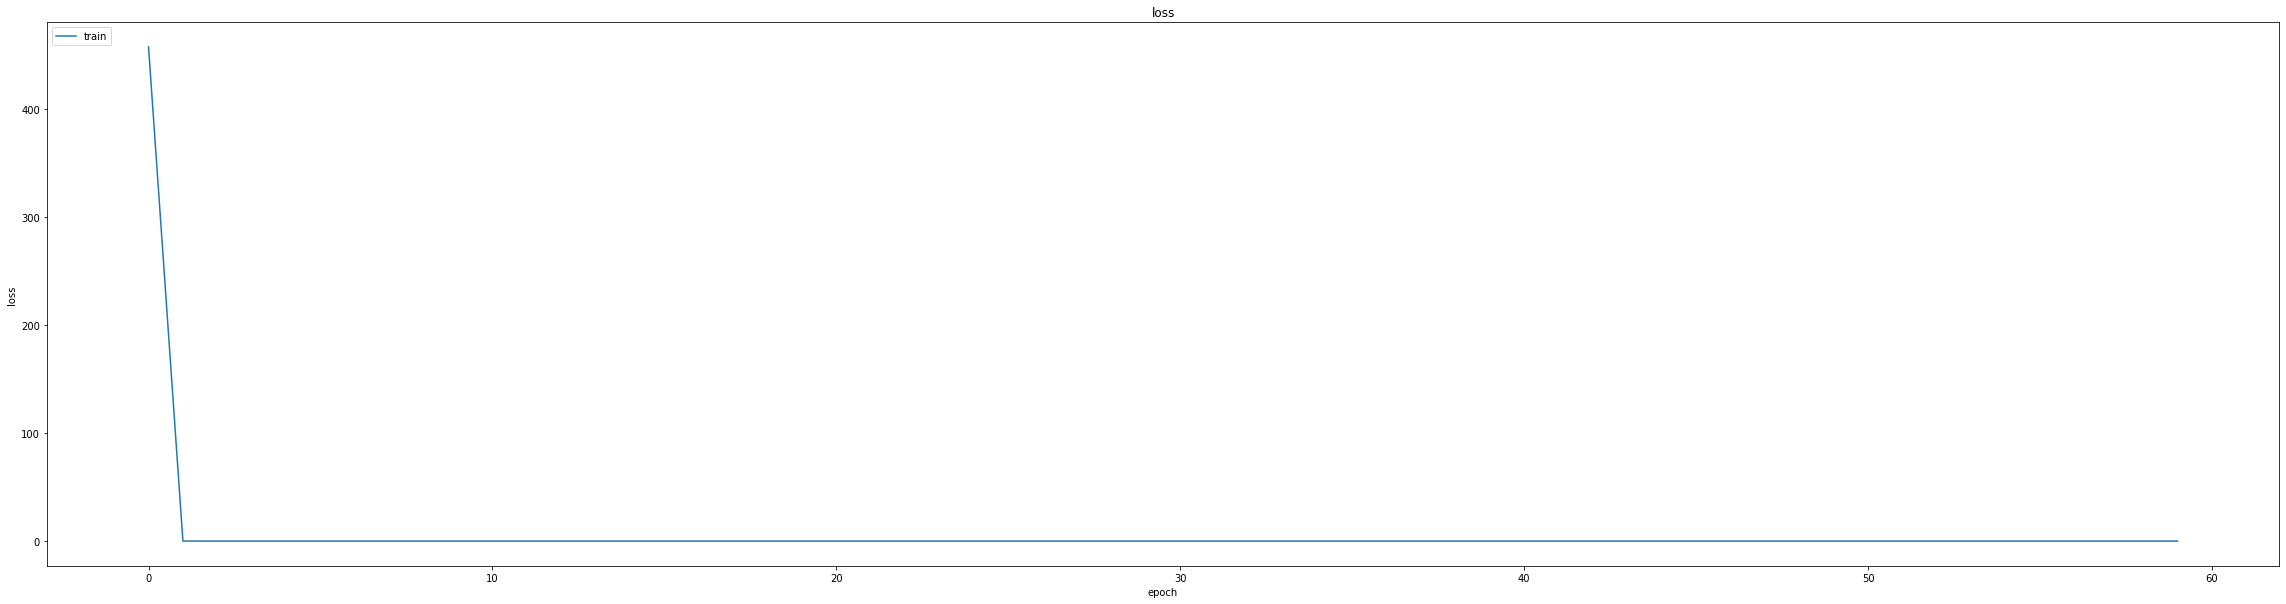

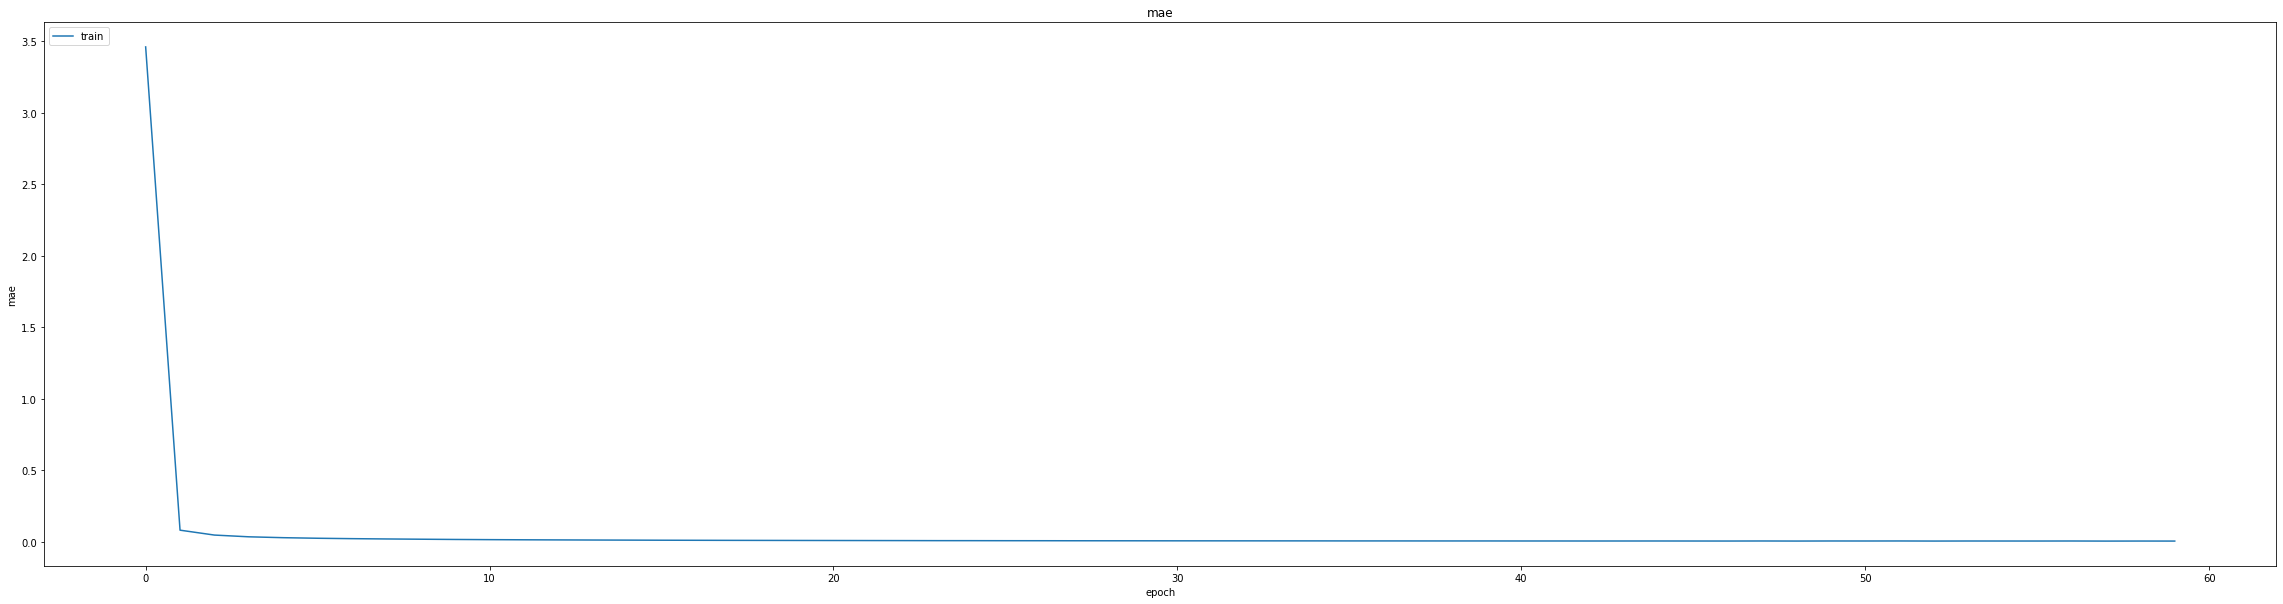

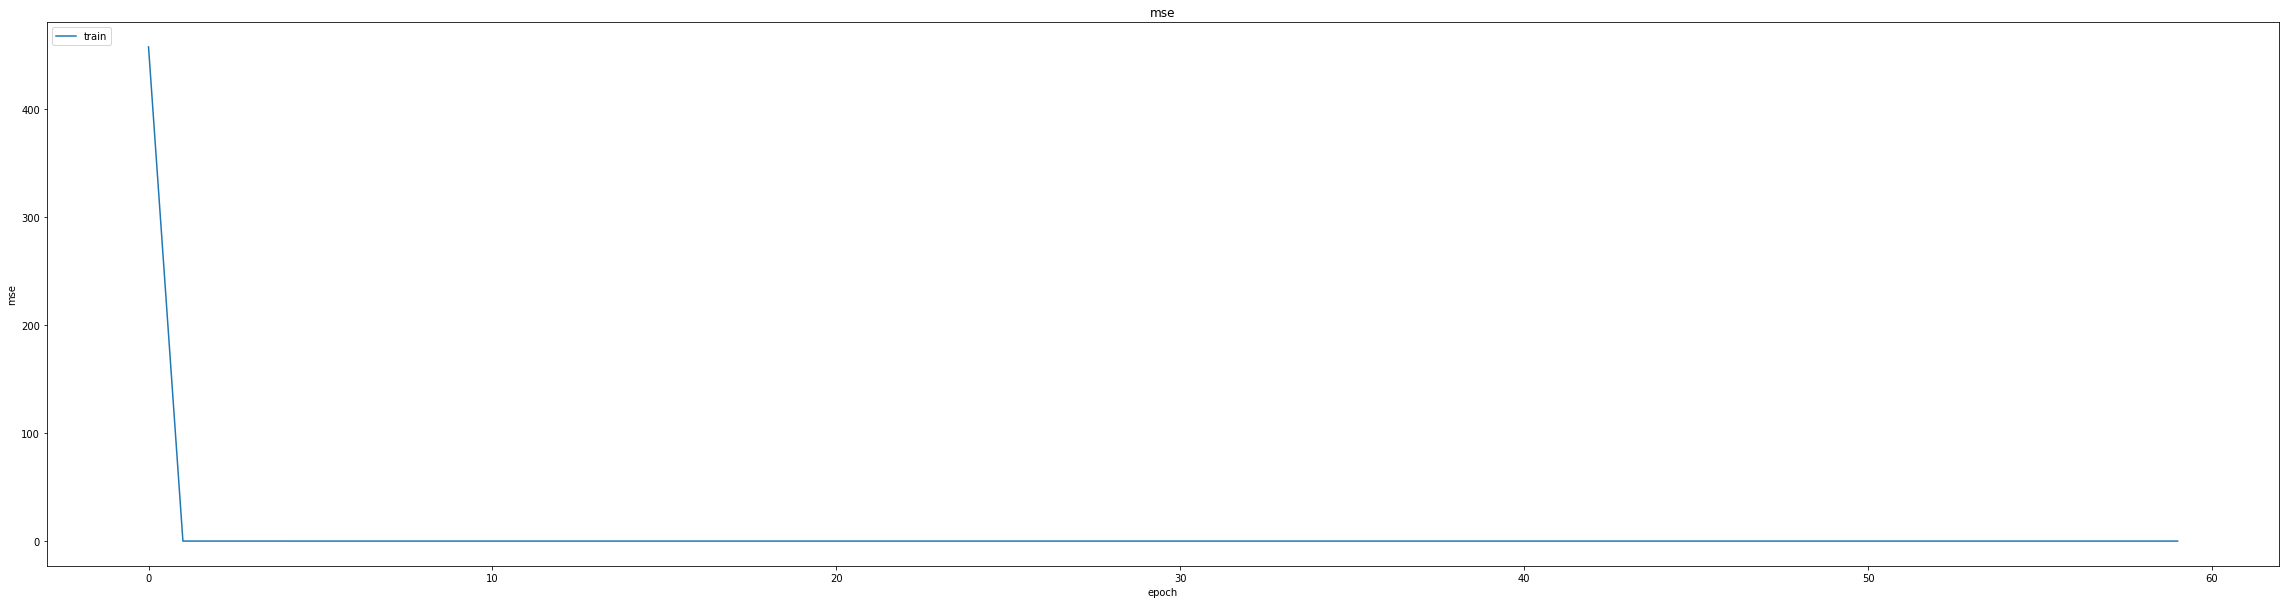

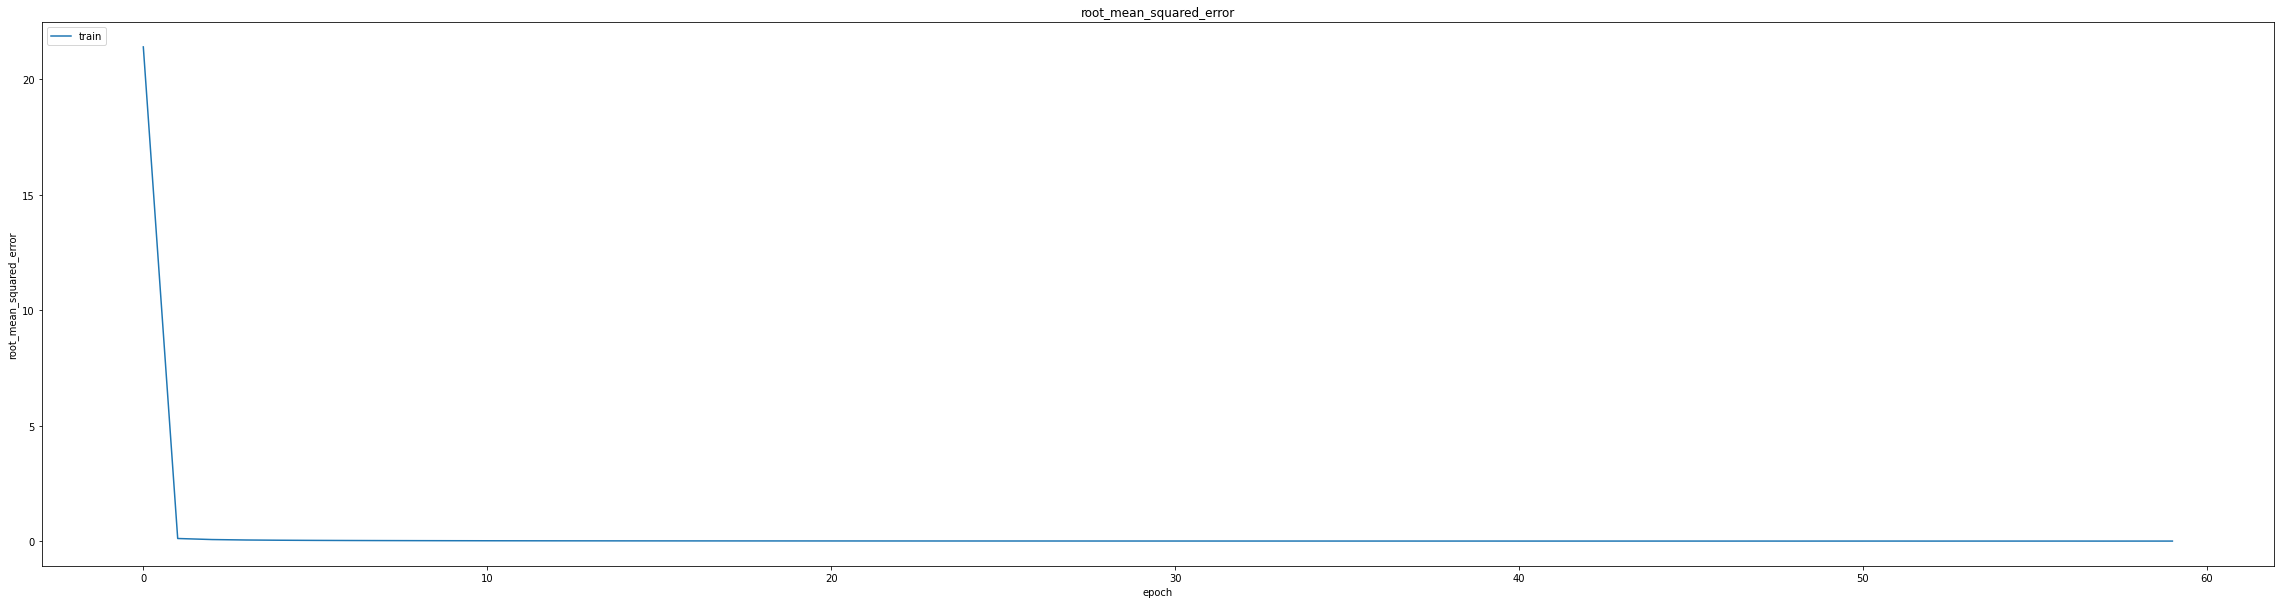

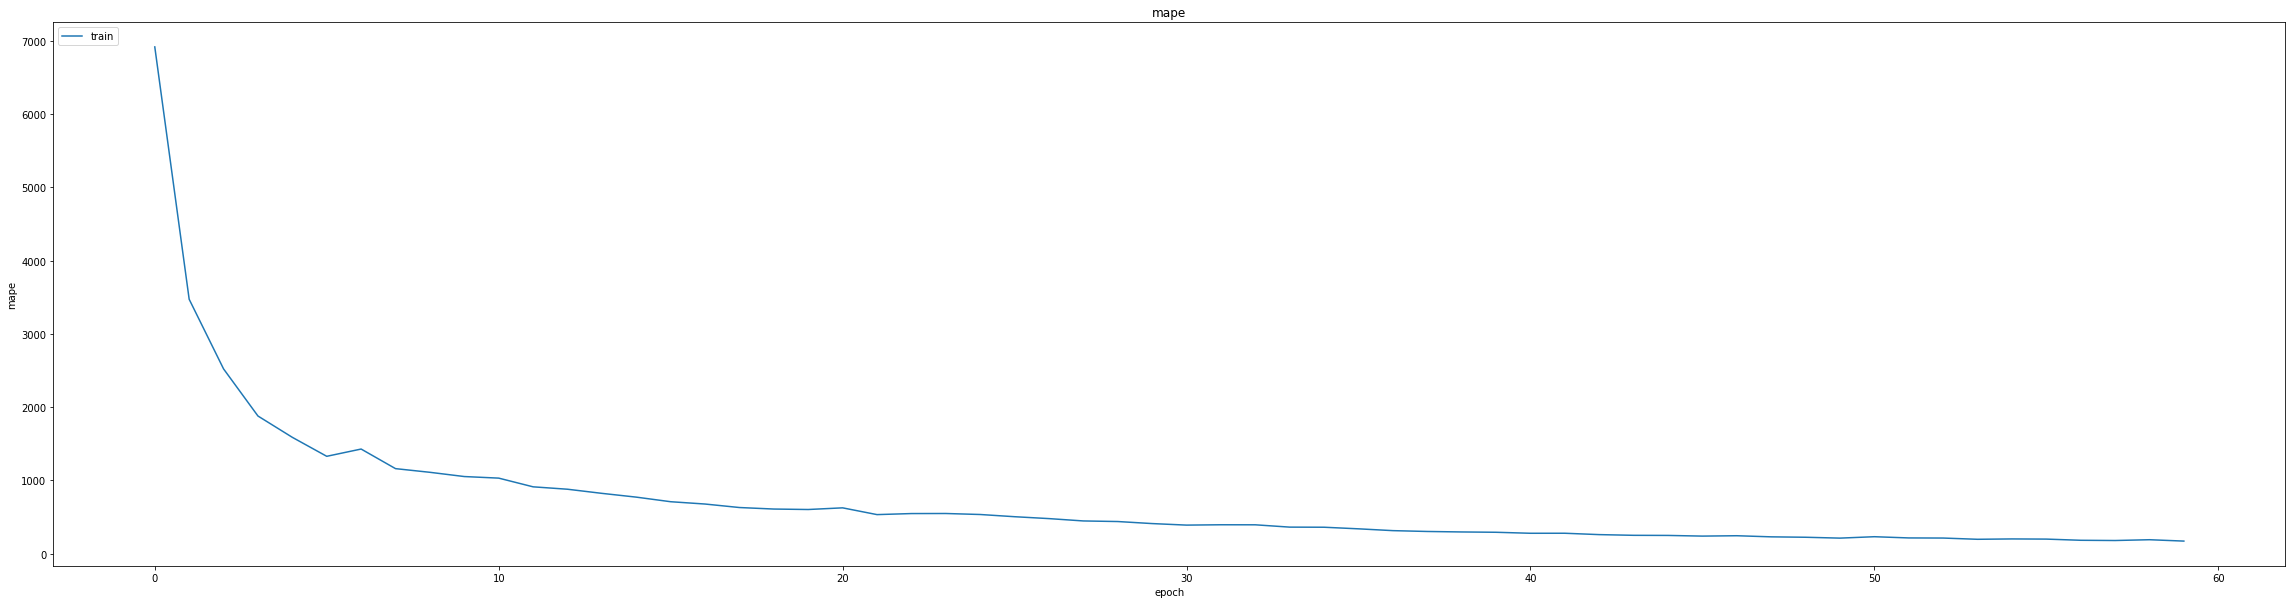

In [ ]:
thesis.SummarizeHistory(history)

In [ ]:
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
#print(min(histroy.history['val_mape']))
r2_scr = thesis.R_Squared_Score(model, x_val, y_val)
print(r2_scr)

0.006982531398534775
0.009732211008667946
1042/1042 [==============================] - 4s 3ms/step
0.9982599023821552


In [ ]:
model.load_weights("/content/drive/MyDrive/modelweights/CHF_USD_5min_CNN_GRU(70-30)")
early_stopping = EarlyStopping(monitor='val_mse', patience=15)

In [ ]:

from keras.callbacks import LearningRateScheduler
import keras.backend as K

def scheduler(epoch):
    if epoch%2==0 and epoch!=0:
        lr = K.get_value(model.optimizer.lr)
        K.set_value(model.optimizer.lr, lr*.9)
        print("lr changed to {}".format(lr*.9))
    return K.get_value(model.optimizer.lr)
lr_decay = LearningRateScheduler(scheduler)

callbacks_list = [checkpoint, lr_decay, early_stopping]

Epochs=int(Epochs/3)

history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/20


401/405 [============================>.] - ETA: 0s - loss: 9.0165e-04 - mae: 0.0115 - mse: 9.0165e-04 - root_mean_squared_error: 0.0300 - mape: 252.9069
Epoch 1: val_mse did not improve from 0.00009
405/405 [==============================] - 10s 16ms/step - loss: 8.9470e-04 - mae: 0.0115 - mse: 8.9470e-04 - root_mean_squared_error: 0.0299 - mape: 250.8843 - val_loss: 1.2958e-04 - val_mae: 0.0084 - val_mse: 1.2958e-04 - val_root_mean_squared_error: 0.0114 - val_mape: 1069.6942 - lr: 0.0010
Epoch 2/20
403/405 [============================>.] - ETA: 0s - loss: 4.1707e-05 - mae: 0.0047 - mse: 4.1707e-05 - root_mean_squared_error: 0.0065 - mape: 209.1258
Epoch 2: val_mse did not improve from 0.00009
405/405 [==============================] - 6s 14ms/step - loss: 4.1684e-05 - mae: 0.0047 - mse: 4.1684e-05 - root_mean_squared_error: 0.0065 - mape: 208.4744 - val_loss: 1.2104e-04 - val_mae: 0.0083 - val_mse: 1.2104e-04 - val_root_mean_squared_error: 0.0110 - val_mape: 873.4803 - lr: 0.0010
lr 

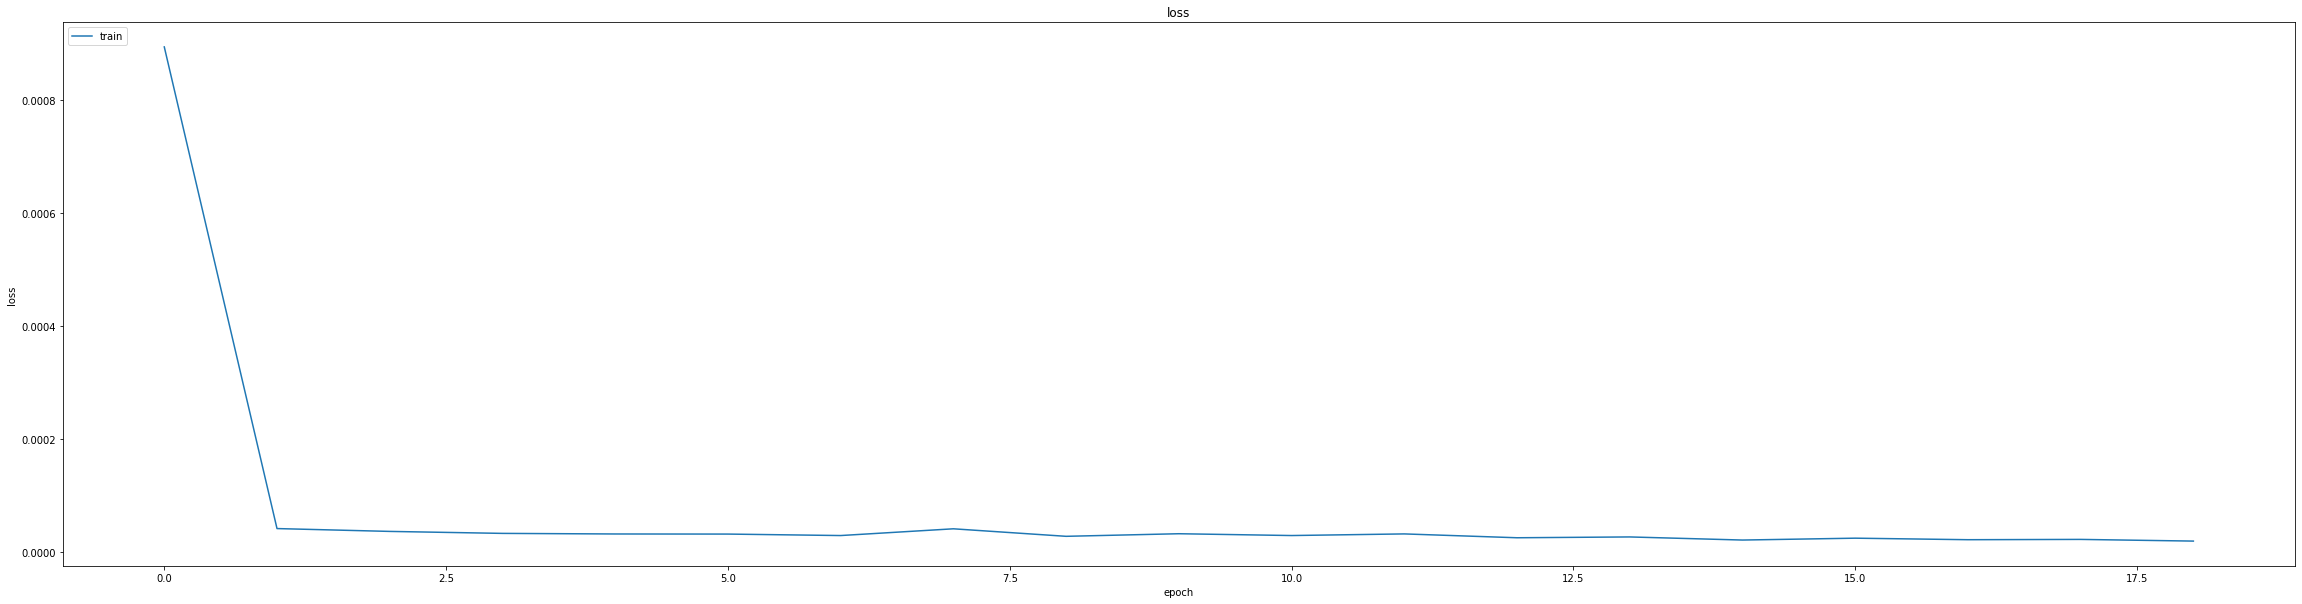

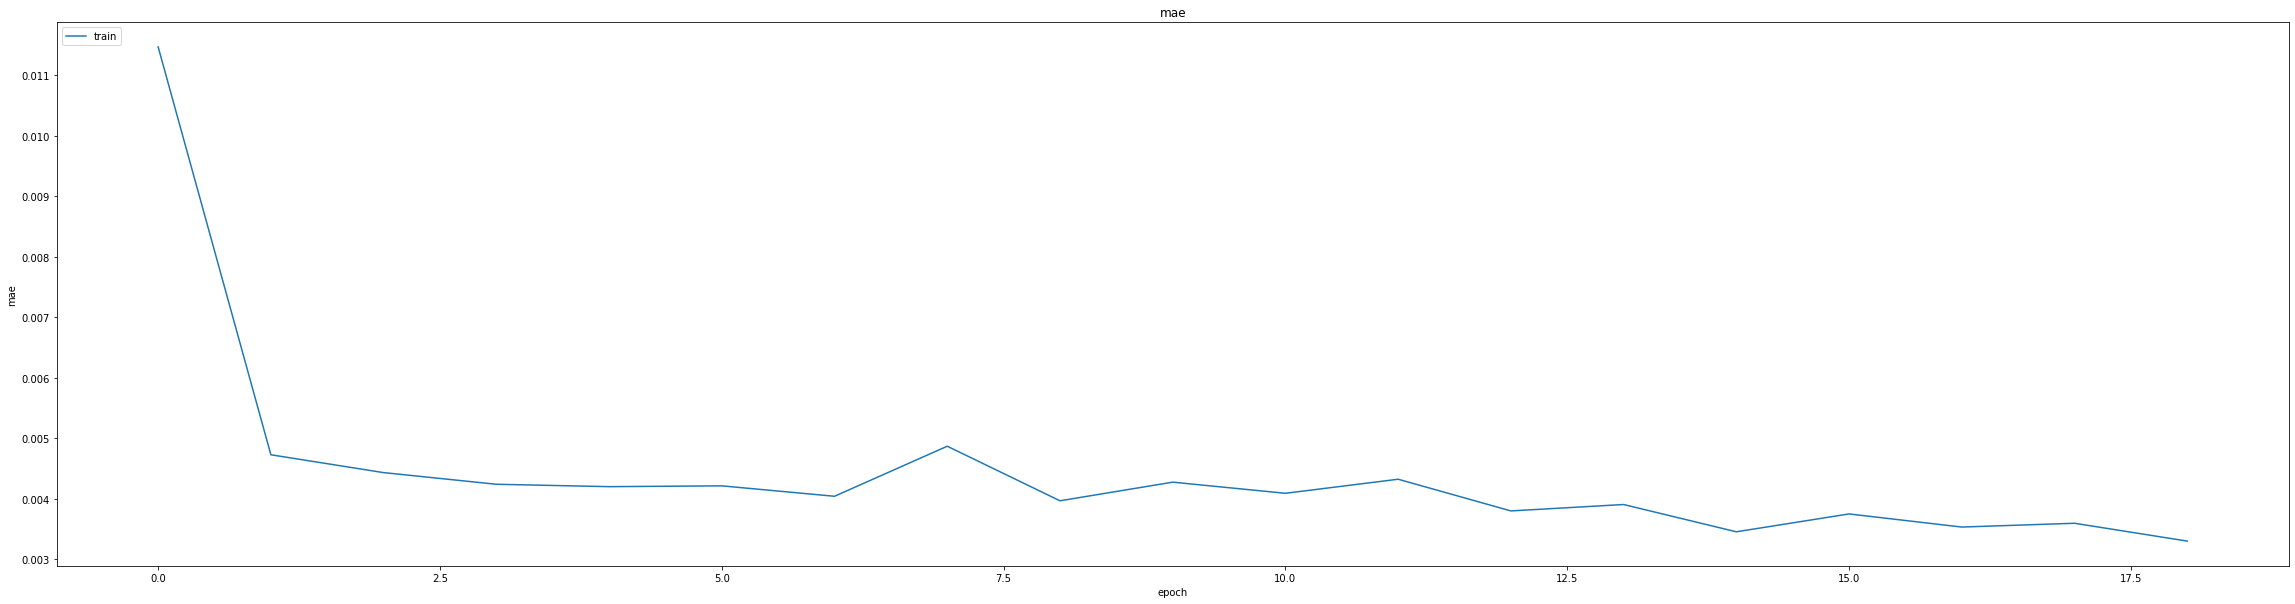

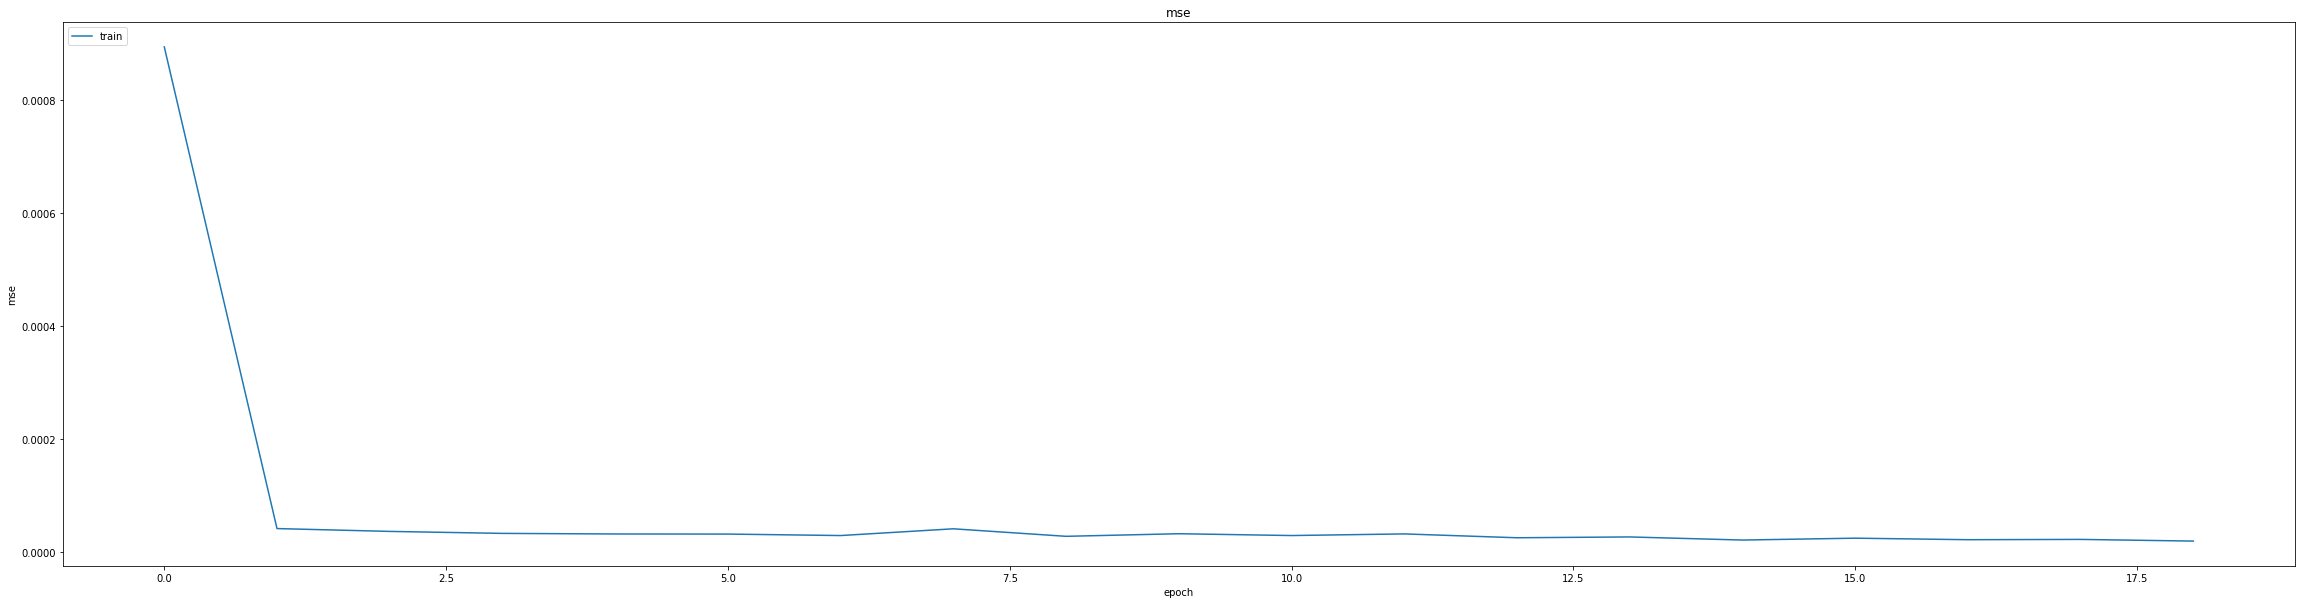

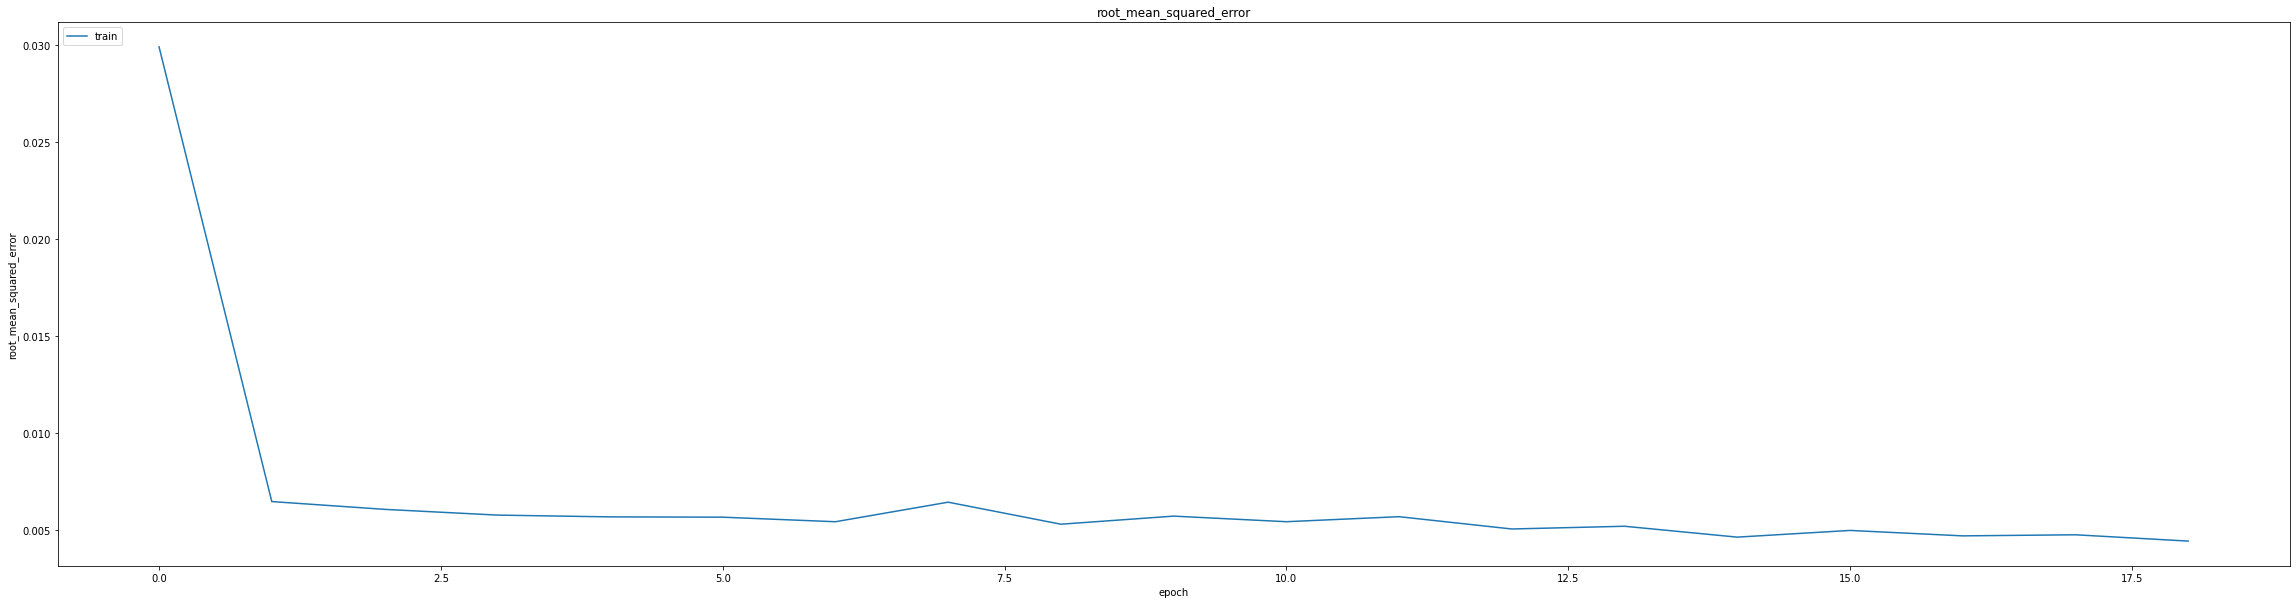

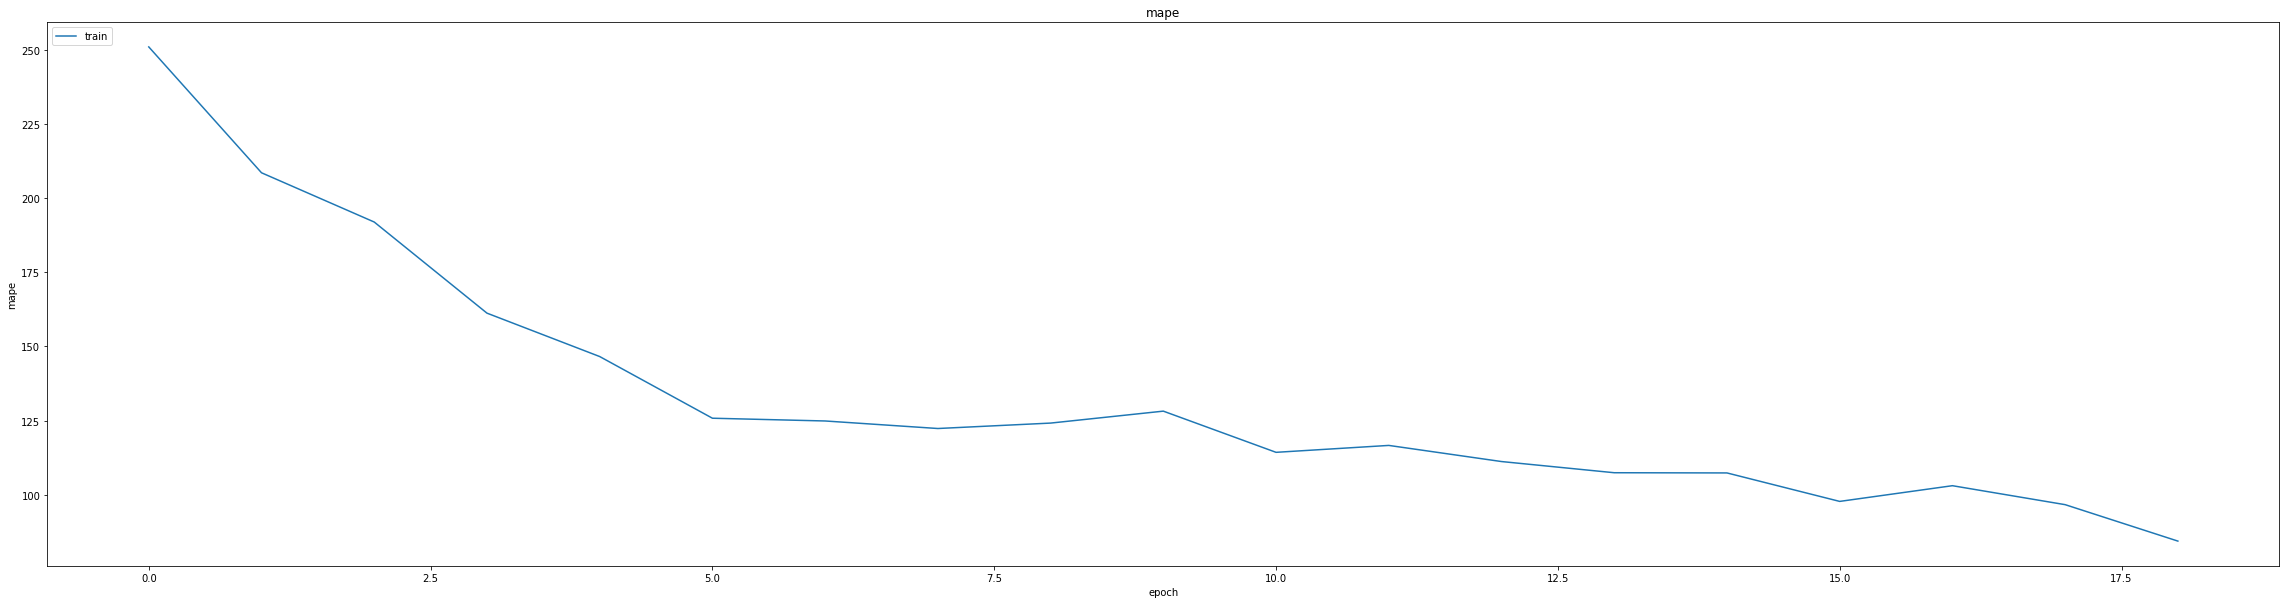

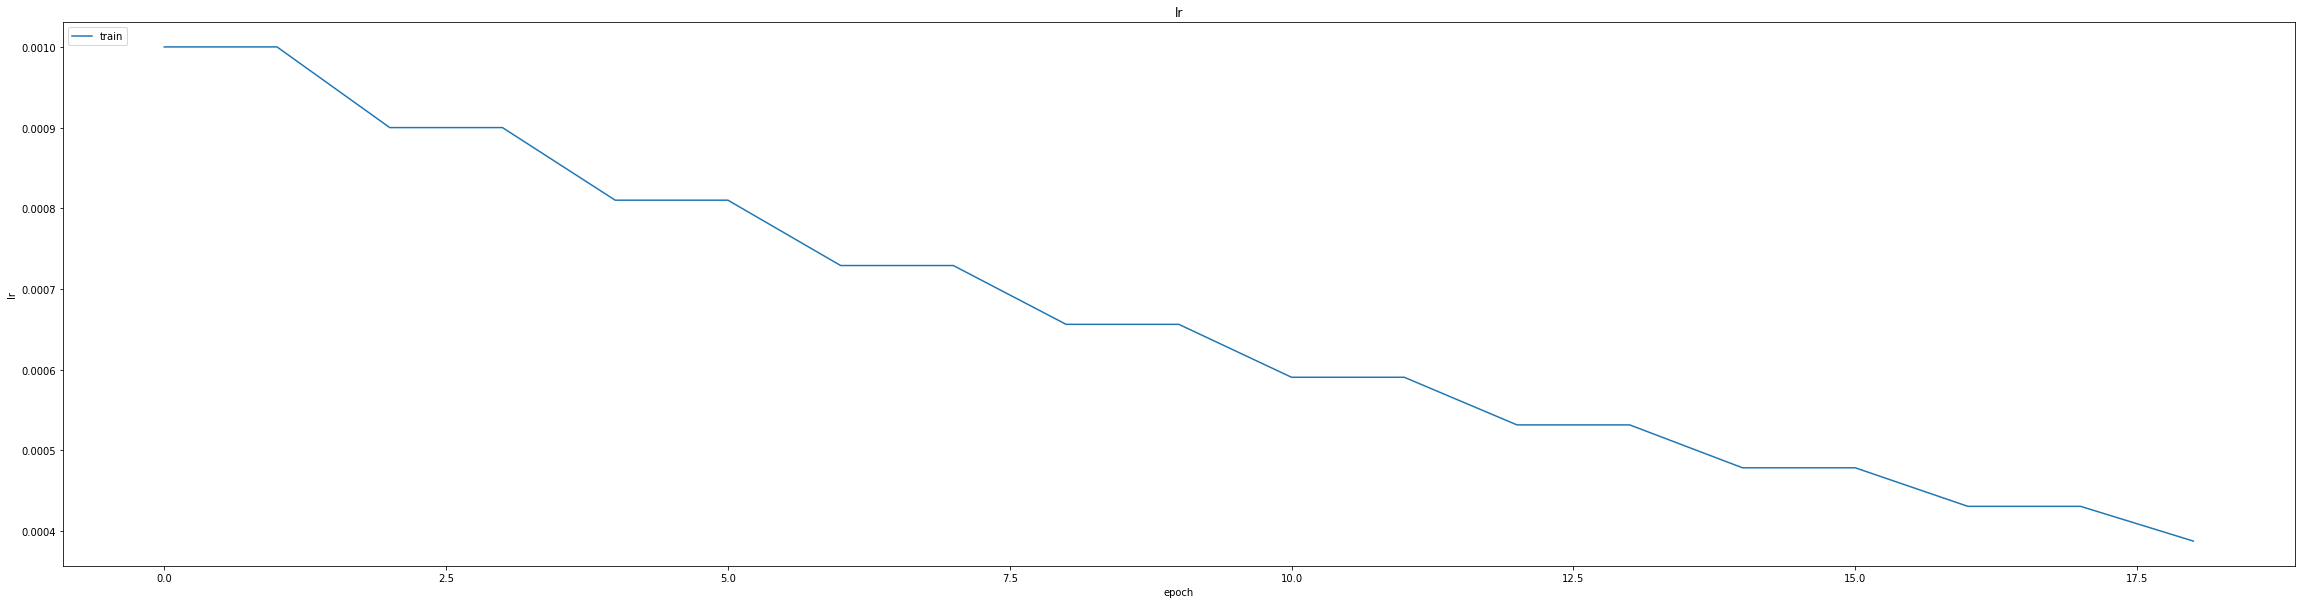

In [ ]:
thesis.SummarizeHistory(history)

In [ ]:
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
#print(min(histroy.history['val_mape']))
r2_scr = thesis.R_Squared_Score(model, x_val, y_val)
print(r2_scr)

0.007744168862700462
0.010121122933924198
1042/1042 [==============================] - 4s 3ms/step
0.9956520897633706


1042/1042 [==============================] - 3s 3ms/step


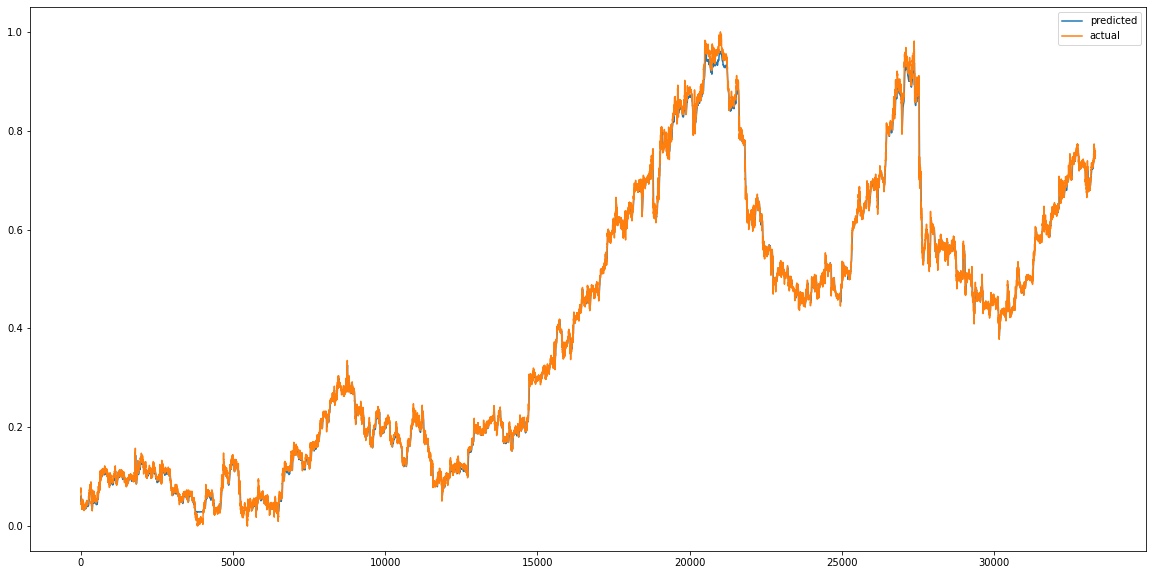

In [ ]:
model.load_weights("/content/drive/MyDrive/modelweights/CHF_USD_5min_CNN_GRU(70-30)")
val_predictions=thesis.CreatPrediction(model,x_val, y_val)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


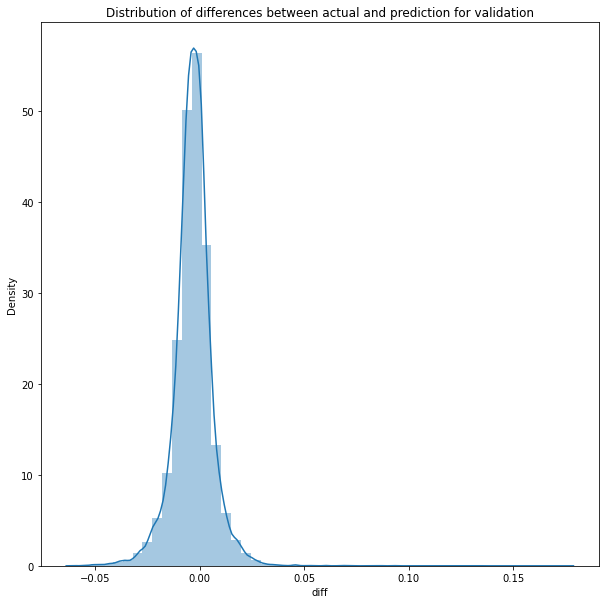

In [ ]:
val_predictions['diff'] = val_predictions['predicted'] - val_predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(val_predictions['diff']);
plt.title('Distribution of differences between actual and prediction for validation')
plt.show()

1042/1042 [==============================] - 3s 3ms/step


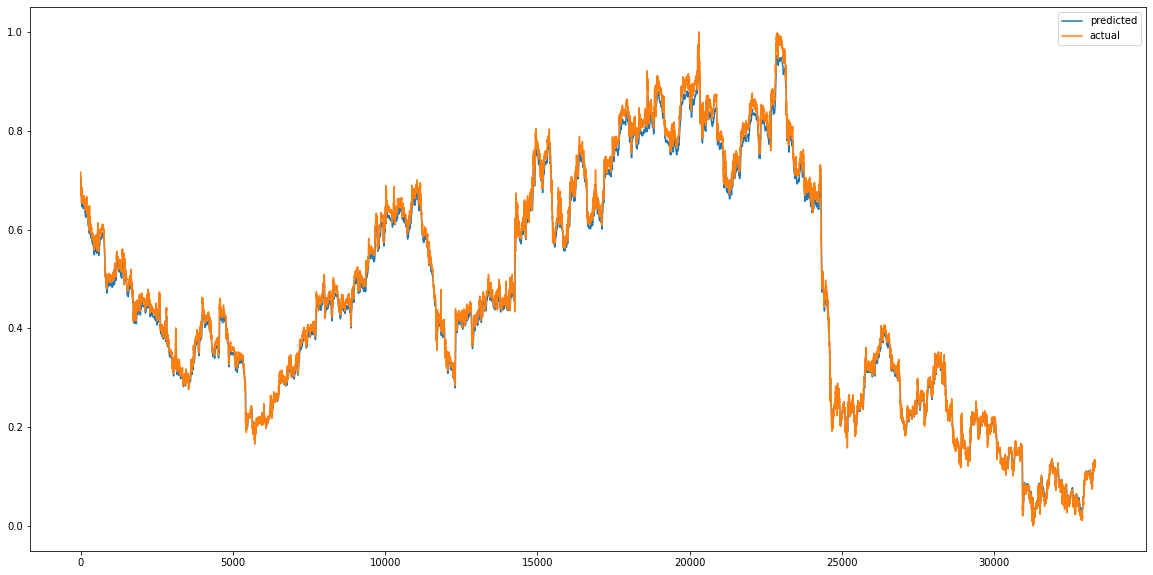

In [ ]:
predictions=thesis.CreatPrediction(model,x_test, y_test)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


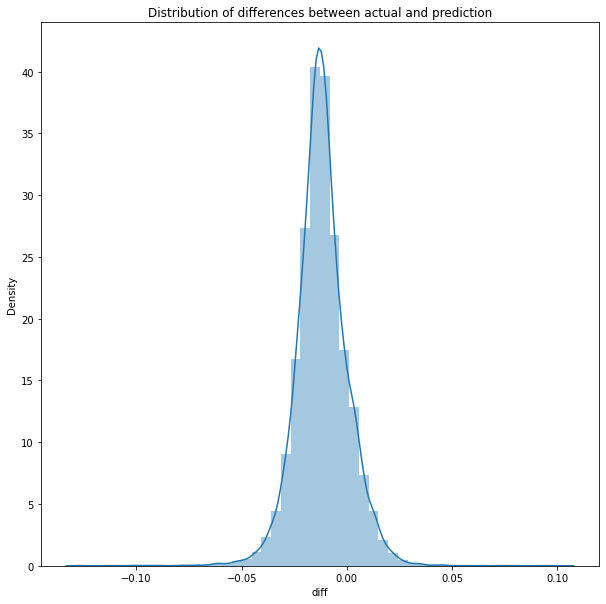

In [ ]:
predictions['diff'] = predictions['predicted'] - predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(predictions['diff']);
plt.title('Distribution of differences between actual and prediction')
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
print("MSE : ", mean_squared_error(predictions['predicted'].values, predictions['actual'].values))

from math import sqrt
print("RMSE : ", sqrt(mean_squared_error(predictions['predicted'].values, predictions['actual'].values)))

print("MAE : ", mean_absolute_error(predictions['predicted'].values, predictions['actual'].values))

test_r2_score=thesis.R_Squared_Score(model, x_test, y_test)
print('R2_Score  :', test_r2_score)
predictions['diff'].describe()

MSE :  0.0002937036804233459
RMSE :  0.01713778516679871
MAE :  0.014128654801618097
1042/1042 [==============================] - 3s 3ms/step
R2_Score  : 0.994958378349054


count    33333.000000
mean        -0.011783
std          0.012445
min         -0.128681
25%         -0.018745
50%         -0.012268
75%         -0.005069
max          0.103112
Name: diff, dtype: float64

**BiLSTM_MODEL**

In [ ]:
model= thesis.BiLSTM_Model(x_train)


In [ ]:
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping

# Set the metric you want to monitor, the threshold, and the patience value
early_stopping = EarlyStopping(monitor='val_mse', patience=30)

checkpoint = ModelCheckpoint("/content/drive/MyDrive/modelweights/CHF_USD_5min_BiLSTM(70-30)", monitor='val_mse', verbose=1, save_best_only=True, mode='min')

# Fit
callbacks_list = [checkpoint, early_stopping ]

Epochs=60
Batch_size=385
history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/60
403/405 [============================>.] - ETA: 0s - loss: 525.6996 - mae: 6.7840 - mse: 525.6996 - root_mean_squared_error: 22.9281 - mape: 13426.6748
Epoch 1: val_mse improved from inf to 1.50714, saving model to /content/drive/MyDrive/modelweights/CHF_USD_5min_BiLSTM(70-30)


405/405 [==============================] - 51s 104ms/step - loss: 524.0558 - mae: 6.7664 - mse: 524.0558 - root_mean_squared_error: 22.8923 - mape: 13385.8838 - val_loss: 1.5071 - val_mae: 1.1960 - val_mse: 1.5071 - val_root_mean_squared_error: 1.2277 - val_mape: 49185.0586
Epoch 2/60
403/405 [============================>.] - ETA: 0s - loss: 0.7535 - mae: 0.8184 - mse: 0.7535 - root_mean_squared_error: 0.8680 - mape: 6771.4878
Epoch 2: val_mse improved from 1.50714 to 0.42530, saving model to /content/drive/MyDrive/modelweights/CHF_USD_5min_BiLSTM(70-30)


405/405 [==============================] - 41s 100ms/step - loss: 0.7523 - mae: 0.8176 - mse: 0.7523 - root_mean_squared_error: 0.8673 - mape: 6751.4209 - val_loss: 0.4253 - val_mae: 0.5913 - val_mse: 0.4253 - val_root_mean_squared_error: 0.6521 - val_mape: 30502.7578
Epoch 3/60
405/405 [==============================] - ETA: 0s - loss: 0.2419 - mae: 0.4376 - mse: 0.2419 - root_mean_squared_error: 0.4918 - mape: 5281.9990
Epoch 3: val_mse improved from 0.42530 to 0.19935, saving model to /content/drive/MyDrive/modelweights/CHF_USD_5min_BiLSTM(70-30)


405/405 [==============================] - 41s 101ms/step - loss: 0.2419 - mae: 0.4376 - mse: 0.2419 - root_mean_squared_error: 0.4918 - mape: 5281.9990 - val_loss: 0.1994 - val_mae: 0.3808 - val_mse: 0.1994 - val_root_mean_squared_error: 0.4465 - val_mape: 23124.5195
Epoch 4/60
403/405 [============================>.] - ETA: 0s - loss: 0.1174 - mae: 0.3055 - mse: 0.1174 - root_mean_squared_error: 0.3426 - mape: 5135.0381
Epoch 4: val_mse improved from 0.19935 to 0.12637, saving model to /content/drive/MyDrive/modelweights/CHF_USD_5min_BiLSTM(70-30)


405/405 [==============================] - 41s 101ms/step - loss: 0.1173 - mae: 0.3054 - mse: 0.1173 - root_mean_squared_error: 0.3425 - mape: 5119.3267 - val_loss: 0.1264 - val_mae: 0.2980 - val_mse: 0.1264 - val_root_mean_squared_error: 0.3555 - val_mape: 19246.4805
Epoch 5/60
404/405 [============================>.] - ETA: 0s - loss: 0.0759 - mae: 0.2479 - mse: 0.0759 - root_mean_squared_error: 0.2755 - mape: 3870.2163
Epoch 5: val_mse improved from 0.12637 to 0.09788, saving model to /content/drive/MyDrive/modelweights/CHF_USD_5min_BiLSTM(70-30)


405/405 [==============================] - 41s 100ms/step - loss: 0.0759 - mae: 0.2479 - mse: 0.0759 - root_mean_squared_error: 0.2755 - mape: 3867.7222 - val_loss: 0.0979 - val_mae: 0.2645 - val_mse: 0.0979 - val_root_mean_squared_error: 0.3129 - val_mape: 16932.4355
Epoch 6/60
403/405 [============================>.] - ETA: 0s - loss: 0.0605 - mae: 0.2179 - mse: 0.0605 - root_mean_squared_error: 0.2460 - mape: 3706.7803
Epoch 6: val_mse improved from 0.09788 to 0.08575, saving model to /content/drive/MyDrive/modelweights/CHF_USD_5min_BiLSTM(70-30)


405/405 [==============================] - 41s 101ms/step - loss: 0.0605 - mae: 0.2179 - mse: 0.0605 - root_mean_squared_error: 0.2460 - mape: 3695.4695 - val_loss: 0.0857 - val_mae: 0.2492 - val_mse: 0.0857 - val_root_mean_squared_error: 0.2928 - val_mape: 15477.6631
Epoch 7/60
404/405 [============================>.] - ETA: 0s - loss: 0.0547 - mae: 0.2011 - mse: 0.0547 - root_mean_squared_error: 0.2338 - mape: 3521.7832
Epoch 7: val_mse improved from 0.08575 to 0.08034, saving model to /content/drive/MyDrive/modelweights/CHF_USD_5min_BiLSTM(70-30)


405/405 [==============================] - 40s 100ms/step - loss: 0.0547 - mae: 0.2011 - mse: 0.0547 - root_mean_squared_error: 0.2338 - mape: 3519.4888 - val_loss: 0.0803 - val_mae: 0.2435 - val_mse: 0.0803 - val_root_mean_squared_error: 0.2834 - val_mape: 14548.5078
Epoch 8/60
405/405 [==============================] - ETA: 0s - loss: 0.0526 - mae: 0.1914 - mse: 0.0526 - root_mean_squared_error: 0.2293 - mape: 3036.9932
Epoch 8: val_mse improved from 0.08034 to 0.07790, saving model to /content/drive/MyDrive/modelweights/CHF_USD_5min_BiLSTM(70-30)


405/405 [==============================] - 41s 102ms/step - loss: 0.0526 - mae: 0.1914 - mse: 0.0526 - root_mean_squared_error: 0.2293 - mape: 3036.9932 - val_loss: 0.0779 - val_mae: 0.2417 - val_mse: 0.0779 - val_root_mean_squared_error: 0.2791 - val_mape: 13972.7158
Epoch 9/60
403/405 [============================>.] - ETA: 0s - loss: 0.0519 - mae: 0.1863 - mse: 0.0519 - root_mean_squared_error: 0.2278 - mape: 2974.0974
Epoch 9: val_mse improved from 0.07790 to 0.07680, saving model to /content/drive/MyDrive/modelweights/CHF_USD_5min_BiLSTM(70-30)


405/405 [==============================] - 41s 102ms/step - loss: 0.0519 - mae: 0.1862 - mse: 0.0519 - root_mean_squared_error: 0.2277 - mape: 2965.0029 - val_loss: 0.0768 - val_mae: 0.2413 - val_mse: 0.0768 - val_root_mean_squared_error: 0.2771 - val_mape: 13636.8770
Epoch 10/60
404/405 [============================>.] - ETA: 0s - loss: 0.0517 - mae: 0.1836 - mse: 0.0517 - root_mean_squared_error: 0.2273 - mape: 2927.1152
Epoch 10: val_mse improved from 0.07680 to 0.07631, saving model to /content/drive/MyDrive/modelweights/CHF_USD_5min_BiLSTM(70-30)


405/405 [==============================] - 41s 102ms/step - loss: 0.0517 - mae: 0.1836 - mse: 0.0517 - root_mean_squared_error: 0.2273 - mape: 2925.2195 - val_loss: 0.0763 - val_mae: 0.2411 - val_mse: 0.0763 - val_root_mean_squared_error: 0.2762 - val_mape: 13461.0361
Epoch 11/60
405/405 [==============================] - ETA: 0s - loss: 0.0516 - mae: 0.1824 - mse: 0.0516 - root_mean_squared_error: 0.2272 - mape: 2886.3528
Epoch 11: val_mse improved from 0.07631 to 0.07605, saving model to /content/drive/MyDrive/modelweights/CHF_USD_5min_BiLSTM(70-30)


405/405 [==============================] - 41s 101ms/step - loss: 0.0516 - mae: 0.1824 - mse: 0.0516 - root_mean_squared_error: 0.2272 - mape: 2886.3528 - val_loss: 0.0761 - val_mae: 0.2410 - val_mse: 0.0761 - val_root_mean_squared_error: 0.2758 - val_mape: 13371.9072
Epoch 12/60
405/405 [==============================] - ETA: 0s - loss: 0.0510 - mae: 0.1813 - mse: 0.0510 - root_mean_squared_error: 0.2259 - mape: 2923.0332
Epoch 12: val_mse improved from 0.07605 to 0.07507, saving model to /content/drive/MyDrive/modelweights/CHF_USD_5min_BiLSTM(70-30)


405/405 [==============================] - 41s 100ms/step - loss: 0.0510 - mae: 0.1813 - mse: 0.0510 - root_mean_squared_error: 0.2259 - mape: 2923.0332 - val_loss: 0.0751 - val_mae: 0.2393 - val_mse: 0.0751 - val_root_mean_squared_error: 0.2740 - val_mape: 13295.9189
Epoch 13/60
404/405 [============================>.] - ETA: 0s - loss: 0.0508 - mae: 0.1806 - mse: 0.0508 - root_mean_squared_error: 0.2254 - mape: 2956.0730
Epoch 13: val_mse improved from 0.07507 to 0.07478, saving model to /content/drive/MyDrive/modelweights/CHF_USD_5min_BiLSTM(70-30)


405/405 [==============================] - 41s 102ms/step - loss: 0.0508 - mae: 0.1806 - mse: 0.0508 - root_mean_squared_error: 0.2254 - mape: 2954.1597 - val_loss: 0.0748 - val_mae: 0.2388 - val_mse: 0.0748 - val_root_mean_squared_error: 0.2735 - val_mape: 13275.3818
Epoch 14/60
405/405 [==============================] - ETA: 0s - loss: 0.0502 - mae: 0.1803 - mse: 0.0502 - root_mean_squared_error: 0.2241 - mape: 2963.5913
Epoch 14: val_mse improved from 0.07478 to 0.07340, saving model to /content/drive/MyDrive/modelweights/CHF_USD_5min_BiLSTM(70-30)


405/405 [==============================] - 41s 102ms/step - loss: 0.0502 - mae: 0.1803 - mse: 0.0502 - root_mean_squared_error: 0.2241 - mape: 2963.5913 - val_loss: 0.0734 - val_mae: 0.2363 - val_mse: 0.0734 - val_root_mean_squared_error: 0.2709 - val_mape: 13191.7480
Epoch 15/60
404/405 [============================>.] - ETA: 0s - loss: 0.0486 - mae: 0.1781 - mse: 0.0486 - root_mean_squared_error: 0.2205 - mape: 2896.6460
Epoch 15: val_mse improved from 0.07340 to 0.06726, saving model to /content/drive/MyDrive/modelweights/CHF_USD_5min_BiLSTM(70-30)


405/405 [==============================] - 40s 100ms/step - loss: 0.0486 - mae: 0.1781 - mse: 0.0486 - root_mean_squared_error: 0.2205 - mape: 2894.7751 - val_loss: 0.0673 - val_mae: 0.2254 - val_mse: 0.0673 - val_root_mean_squared_error: 0.2593 - val_mape: 12798.3516
Epoch 16/60
403/405 [============================>.] - ETA: 0s - loss: 0.0294 - mae: 0.1363 - mse: 0.0294 - root_mean_squared_error: 0.1714 - mape: 2762.5945
Epoch 16: val_mse improved from 0.06726 to 0.03020, saving model to /content/drive/MyDrive/modelweights/CHF_USD_5min_BiLSTM(70-30)


405/405 [==============================] - 41s 101ms/step - loss: 0.0293 - mae: 0.1362 - mse: 0.0293 - root_mean_squared_error: 0.1713 - mape: 2754.0742 - val_loss: 0.0302 - val_mae: 0.1474 - val_mse: 0.0302 - val_root_mean_squared_error: 0.1738 - val_mape: 11011.2646
Epoch 17/60
403/405 [============================>.] - ETA: 0s - loss: 0.0117 - mae: 0.0815 - mse: 0.0117 - root_mean_squared_error: 0.1084 - mape: 2206.2422
Epoch 17: val_mse improved from 0.03020 to 0.02122, saving model to /content/drive/MyDrive/modelweights/CHF_USD_5min_BiLSTM(70-30)


405/405 [==============================] - 41s 101ms/step - loss: 0.0117 - mae: 0.0814 - mse: 0.0117 - root_mean_squared_error: 0.1084 - mape: 2199.4468 - val_loss: 0.0212 - val_mae: 0.1227 - val_mse: 0.0212 - val_root_mean_squared_error: 0.1457 - val_mape: 9728.6562
Epoch 18/60
405/405 [==============================] - ETA: 0s - loss: 0.0083 - mae: 0.0682 - mse: 0.0083 - root_mean_squared_error: 0.0910 - mape: 1991.0231
Epoch 18: val_mse improved from 0.02122 to 0.01434, saving model to /content/drive/MyDrive/modelweights/CHF_USD_5min_BiLSTM(70-30)


405/405 [==============================] - 41s 102ms/step - loss: 0.0083 - mae: 0.0682 - mse: 0.0083 - root_mean_squared_error: 0.0910 - mape: 1991.0231 - val_loss: 0.0143 - val_mae: 0.0935 - val_mse: 0.0143 - val_root_mean_squared_error: 0.1197 - val_mape: 8802.6504
Epoch 19/60
403/405 [============================>.] - ETA: 0s - loss: 0.0056 - mae: 0.0551 - mse: 0.0056 - root_mean_squared_error: 0.0747 - mape: 1754.4662
Epoch 19: val_mse improved from 0.01434 to 0.01007, saving model to /content/drive/MyDrive/modelweights/CHF_USD_5min_BiLSTM(70-30)


405/405 [==============================] - 42s 103ms/step - loss: 0.0056 - mae: 0.0551 - mse: 0.0056 - root_mean_squared_error: 0.0747 - mape: 1749.1917 - val_loss: 0.0101 - val_mae: 0.0735 - val_mse: 0.0101 - val_root_mean_squared_error: 0.1003 - val_mape: 7908.2827
Epoch 20/60
405/405 [==============================] - ETA: 0s - loss: 0.0039 - mae: 0.0459 - mse: 0.0039 - root_mean_squared_error: 0.0627 - mape: 1670.1975
Epoch 20: val_mse improved from 0.01007 to 0.00729, saving model to /content/drive/MyDrive/modelweights/CHF_USD_5min_BiLSTM(70-30)


405/405 [==============================] - 40s 100ms/step - loss: 0.0039 - mae: 0.0459 - mse: 0.0039 - root_mean_squared_error: 0.0627 - mape: 1670.1975 - val_loss: 0.0073 - val_mae: 0.0602 - val_mse: 0.0073 - val_root_mean_squared_error: 0.0854 - val_mape: 7152.0566
Epoch 21/60
403/405 [============================>.] - ETA: 0s - loss: 0.0029 - mae: 0.0392 - mse: 0.0029 - root_mean_squared_error: 0.0538 - mape: 1496.1117
Epoch 21: val_mse improved from 0.00729 to 0.00584, saving model to /content/drive/MyDrive/modelweights/CHF_USD_5min_BiLSTM(70-30)


405/405 [==============================] - 41s 102ms/step - loss: 0.0029 - mae: 0.0392 - mse: 0.0029 - root_mean_squared_error: 0.0538 - mape: 1491.4948 - val_loss: 0.0058 - val_mae: 0.0562 - val_mse: 0.0058 - val_root_mean_squared_error: 0.0764 - val_mape: 6511.2412
Epoch 22/60
403/405 [============================>.] - ETA: 0s - loss: 0.0022 - mae: 0.0343 - mse: 0.0022 - root_mean_squared_error: 0.0472 - mape: 1324.9423
Epoch 22: val_mse improved from 0.00584 to 0.00417, saving model to /content/drive/MyDrive/modelweights/CHF_USD_5min_BiLSTM(70-30)


405/405 [==============================] - 41s 101ms/step - loss: 0.0022 - mae: 0.0343 - mse: 0.0022 - root_mean_squared_error: 0.0472 - mape: 1320.8474 - val_loss: 0.0042 - val_mae: 0.0440 - val_mse: 0.0042 - val_root_mean_squared_error: 0.0646 - val_mape: 5976.0181
Epoch 23/60
404/405 [============================>.] - ETA: 0s - loss: 0.0018 - mae: 0.0307 - mse: 0.0018 - root_mean_squared_error: 0.0421 - mape: 1209.8972
Epoch 23: val_mse improved from 0.00417 to 0.00318, saving model to /content/drive/MyDrive/modelweights/CHF_USD_5min_BiLSTM(70-30)


405/405 [==============================] - 41s 102ms/step - loss: 0.0018 - mae: 0.0307 - mse: 0.0018 - root_mean_squared_error: 0.0421 - mape: 1209.1018 - val_loss: 0.0032 - val_mae: 0.0369 - val_mse: 0.0032 - val_root_mean_squared_error: 0.0564 - val_mape: 5525.0234
Epoch 24/60
403/405 [============================>.] - ETA: 0s - loss: 0.0014 - mae: 0.0278 - mse: 0.0014 - root_mean_squared_error: 0.0379 - mape: 1204.4974
Epoch 24: val_mse improved from 0.00318 to 0.00248, saving model to /content/drive/MyDrive/modelweights/CHF_USD_5min_BiLSTM(70-30)


405/405 [==============================] - 41s 102ms/step - loss: 0.0014 - mae: 0.0278 - mse: 0.0014 - root_mean_squared_error: 0.0379 - mape: 1200.7610 - val_loss: 0.0025 - val_mae: 0.0317 - val_mse: 0.0025 - val_root_mean_squared_error: 0.0498 - val_mape: 5145.0005
Epoch 25/60
404/405 [============================>.] - ETA: 0s - loss: 0.0012 - mae: 0.0261 - mse: 0.0012 - root_mean_squared_error: 0.0353 - mape: 1125.7462
Epoch 25: val_mse did not improve from 0.00248
405/405 [==============================] - 8s 21ms/step - loss: 0.0012 - mae: 0.0261 - mse: 0.0012 - root_mean_squared_error: 0.0353 - mape: 1125.0117 - val_loss: 0.0027 - val_mae: 0.0407 - val_mse: 0.0027 - val_root_mean_squared_error: 0.0519 - val_mape: 4820.9678
Epoch 26/60
405/405 [==============================] - ETA: 0s - loss: 0.0011 - mae: 0.0242 - mse: 0.0011 - root_mean_squared_error: 0.0326 - mape: 1084.3485
Epoch 26: val_mse improved from 0.00248 to 0.00176, saving model to /content/drive/MyDrive/modelweights

405/405 [==============================] - 41s 100ms/step - loss: 0.0011 - mae: 0.0242 - mse: 0.0011 - root_mean_squared_error: 0.0326 - mape: 1084.3485 - val_loss: 0.0018 - val_mae: 0.0284 - val_mse: 0.0018 - val_root_mean_squared_error: 0.0420 - val_mape: 4534.9541
Epoch 27/60
404/405 [============================>.] - ETA: 0s - loss: 9.3655e-04 - mae: 0.0229 - mse: 9.3655e-04 - root_mean_squared_error: 0.0306 - mape: 934.5629
Epoch 27: val_mse improved from 0.00176 to 0.00149, saving model to /content/drive/MyDrive/modelweights/CHF_USD_5min_BiLSTM(70-30)


405/405 [==============================] - 40s 100ms/step - loss: 9.3646e-04 - mae: 0.0229 - mse: 9.3646e-04 - root_mean_squared_error: 0.0306 - mape: 933.9525 - val_loss: 0.0015 - val_mae: 0.0256 - val_mse: 0.0015 - val_root_mean_squared_error: 0.0386 - val_mape: 4285.0566
Epoch 28/60
404/405 [============================>.] - ETA: 0s - loss: 8.2522e-04 - mae: 0.0215 - mse: 8.2522e-04 - root_mean_squared_error: 0.0287 - mape: 865.7449
Epoch 28: val_mse improved from 0.00149 to 0.00129, saving model to /content/drive/MyDrive/modelweights/CHF_USD_5min_BiLSTM(70-30)


405/405 [==============================] - 41s 102ms/step - loss: 8.2513e-04 - mae: 0.0215 - mse: 8.2513e-04 - root_mean_squared_error: 0.0287 - mape: 865.1775 - val_loss: 0.0013 - val_mae: 0.0241 - val_mse: 0.0013 - val_root_mean_squared_error: 0.0360 - val_mape: 4062.0916
Epoch 29/60
405/405 [==============================] - ETA: 0s - loss: 7.3168e-04 - mae: 0.0203 - mse: 7.3168e-04 - root_mean_squared_error: 0.0270 - mape: 886.9172
Epoch 29: val_mse improved from 0.00129 to 0.00108, saving model to /content/drive/MyDrive/modelweights/CHF_USD_5min_BiLSTM(70-30)


405/405 [==============================] - 41s 101ms/step - loss: 7.3168e-04 - mae: 0.0203 - mse: 7.3168e-04 - root_mean_squared_error: 0.0270 - mape: 886.9172 - val_loss: 0.0011 - val_mae: 0.0206 - val_mse: 0.0011 - val_root_mean_squared_error: 0.0329 - val_mape: 3870.1250
Epoch 30/60
403/405 [============================>.] - ETA: 0s - loss: 6.6987e-04 - mae: 0.0194 - mse: 6.6987e-04 - root_mean_squared_error: 0.0259 - mape: 792.7953
Epoch 30: val_mse improved from 0.00108 to 0.00106, saving model to /content/drive/MyDrive/modelweights/CHF_USD_5min_BiLSTM(70-30)


405/405 [==============================] - 41s 102ms/step - loss: 6.6970e-04 - mae: 0.0194 - mse: 6.6970e-04 - root_mean_squared_error: 0.0259 - mape: 790.3315 - val_loss: 0.0011 - val_mae: 0.0234 - val_mse: 0.0011 - val_root_mean_squared_error: 0.0326 - val_mape: 3699.9922
Epoch 31/60
404/405 [============================>.] - ETA: 0s - loss: 5.9364e-04 - mae: 0.0183 - mse: 5.9364e-04 - root_mean_squared_error: 0.0244 - mape: 772.9361
Epoch 31: val_mse improved from 0.00106 to 0.00082, saving model to /content/drive/MyDrive/modelweights/CHF_USD_5min_BiLSTM(70-30)


405/405 [==============================] - 41s 103ms/step - loss: 5.9368e-04 - mae: 0.0183 - mse: 5.9368e-04 - root_mean_squared_error: 0.0244 - mape: 772.4293 - val_loss: 8.2011e-04 - val_mae: 0.0185 - val_mse: 8.2011e-04 - val_root_mean_squared_error: 0.0286 - val_mape: 3546.3027
Epoch 32/60
404/405 [============================>.] - ETA: 0s - loss: 5.5645e-04 - mae: 0.0177 - mse: 5.5645e-04 - root_mean_squared_error: 0.0236 - mape: 788.2706
Epoch 32: val_mse improved from 0.00082 to 0.00072, saving model to /content/drive/MyDrive/modelweights/CHF_USD_5min_BiLSTM(70-30)


405/405 [==============================] - 42s 103ms/step - loss: 5.5637e-04 - mae: 0.0177 - mse: 5.5637e-04 - root_mean_squared_error: 0.0236 - mape: 787.7522 - val_loss: 7.1913e-04 - val_mae: 0.0162 - val_mse: 7.1913e-04 - val_root_mean_squared_error: 0.0268 - val_mape: 3408.1033
Epoch 33/60
405/405 [==============================] - ETA: 0s - loss: 4.9486e-04 - mae: 0.0167 - mse: 4.9486e-04 - root_mean_squared_error: 0.0222 - mape: 699.2999
Epoch 33: val_mse improved from 0.00072 to 0.00071, saving model to /content/drive/MyDrive/modelweights/CHF_USD_5min_BiLSTM(70-30)


405/405 [==============================] - 41s 101ms/step - loss: 4.9486e-04 - mae: 0.0167 - mse: 4.9486e-04 - root_mean_squared_error: 0.0222 - mape: 699.2999 - val_loss: 7.1144e-04 - val_mae: 0.0184 - val_mse: 7.1144e-04 - val_root_mean_squared_error: 0.0267 - val_mape: 3291.5632
Epoch 34/60
403/405 [============================>.] - ETA: 0s - loss: 4.5795e-04 - mae: 0.0161 - mse: 4.5795e-04 - root_mean_squared_error: 0.0214 - mape: 678.9914
Epoch 34: val_mse improved from 0.00071 to 0.00070, saving model to /content/drive/MyDrive/modelweights/CHF_USD_5min_BiLSTM(70-30)


405/405 [==============================] - 42s 103ms/step - loss: 4.5763e-04 - mae: 0.0161 - mse: 4.5763e-04 - root_mean_squared_error: 0.0214 - mape: 676.8795 - val_loss: 6.9886e-04 - val_mae: 0.0196 - val_mse: 6.9886e-04 - val_root_mean_squared_error: 0.0264 - val_mape: 3190.1292
Epoch 35/60
404/405 [============================>.] - ETA: 0s - loss: 4.2753e-04 - mae: 0.0156 - mse: 4.2753e-04 - root_mean_squared_error: 0.0207 - mape: 648.1140
Epoch 35: val_mse improved from 0.00070 to 0.00056, saving model to /content/drive/MyDrive/modelweights/CHF_USD_5min_BiLSTM(70-30)


405/405 [==============================] - 41s 101ms/step - loss: 4.2746e-04 - mae: 0.0156 - mse: 4.2746e-04 - root_mean_squared_error: 0.0207 - mape: 647.6880 - val_loss: 5.5997e-04 - val_mae: 0.0154 - val_mse: 5.5997e-04 - val_root_mean_squared_error: 0.0237 - val_mape: 3082.8508
Epoch 36/60
405/405 [==============================] - ETA: 0s - loss: 4.0466e-04 - mae: 0.0152 - mse: 4.0466e-04 - root_mean_squared_error: 0.0201 - mape: 648.5370
Epoch 36: val_mse did not improve from 0.00056
405/405 [==============================] - 9s 21ms/step - loss: 4.0466e-04 - mae: 0.0152 - mse: 4.0466e-04 - root_mean_squared_error: 0.0201 - mape: 648.5370 - val_loss: 5.8796e-04 - val_mae: 0.0171 - val_mse: 5.8796e-04 - val_root_mean_squared_error: 0.0242 - val_mape: 2987.6052
Epoch 37/60
404/405 [============================>.] - ETA: 0s - loss: 3.3562e-04 - mae: 0.0138 - mse: 3.3562e-04 - root_mean_squared_error: 0.0183 - mape: 658.5748
Epoch 37: val_mse improved from 0.00056 to 0.00053, saving 

405/405 [==============================] - 41s 102ms/step - loss: 3.3558e-04 - mae: 0.0138 - mse: 3.3558e-04 - root_mean_squared_error: 0.0183 - mape: 658.1428 - val_loss: 5.2842e-04 - val_mae: 0.0166 - val_mse: 5.2842e-04 - val_root_mean_squared_error: 0.0230 - val_mape: 2886.0913
Epoch 38/60
403/405 [============================>.] - ETA: 0s - loss: 3.1944e-04 - mae: 0.0135 - mse: 3.1944e-04 - root_mean_squared_error: 0.0179 - mape: 599.5197
Epoch 38: val_mse improved from 0.00053 to 0.00051, saving model to /content/drive/MyDrive/modelweights/CHF_USD_5min_BiLSTM(70-30)


405/405 [==============================] - 41s 100ms/step - loss: 3.1922e-04 - mae: 0.0135 - mse: 3.1922e-04 - root_mean_squared_error: 0.0179 - mape: 597.6578 - val_loss: 5.0611e-04 - val_mae: 0.0165 - val_mse: 5.0611e-04 - val_root_mean_squared_error: 0.0225 - val_mape: 2796.4470
Epoch 39/60
404/405 [============================>.] - ETA: 0s - loss: 3.2801e-04 - mae: 0.0136 - mse: 3.2801e-04 - root_mean_squared_error: 0.0181 - mape: 610.6188
Epoch 39: val_mse did not improve from 0.00051
405/405 [==============================] - 9s 21ms/step - loss: 3.2799e-04 - mae: 0.0136 - mse: 3.2799e-04 - root_mean_squared_error: 0.0181 - mape: 610.2197 - val_loss: 9.9465e-04 - val_mae: 0.0291 - val_mse: 9.9465e-04 - val_root_mean_squared_error: 0.0315 - val_mape: 2737.6318
Epoch 40/60
405/405 [==============================] - ETA: 0s - loss: 2.8776e-04 - mae: 0.0128 - mse: 2.8776e-04 - root_mean_squared_error: 0.0170 - mape: 563.4739
Epoch 40: val_mse improved from 0.00051 to 0.00043, saving 

405/405 [==============================] - 41s 101ms/step - loss: 2.8776e-04 - mae: 0.0128 - mse: 2.8776e-04 - root_mean_squared_error: 0.0170 - mape: 563.4739 - val_loss: 4.2515e-04 - val_mae: 0.0158 - val_mse: 4.2515e-04 - val_root_mean_squared_error: 0.0206 - val_mape: 2634.9382
Epoch 41/60
404/405 [============================>.] - ETA: 0s - loss: 2.2879e-04 - mae: 0.0114 - mse: 2.2879e-04 - root_mean_squared_error: 0.0151 - mape: 581.9645
Epoch 41: val_mse did not improve from 0.00043
405/405 [==============================] - 8s 21ms/step - loss: 2.2876e-04 - mae: 0.0114 - mse: 2.2876e-04 - root_mean_squared_error: 0.0151 - mape: 581.5820 - val_loss: 5.1063e-04 - val_mae: 0.0192 - val_mse: 5.1063e-04 - val_root_mean_squared_error: 0.0226 - val_mape: 2546.9399
Epoch 42/60
404/405 [============================>.] - ETA: 0s - loss: 2.3777e-04 - mae: 0.0117 - mse: 2.3777e-04 - root_mean_squared_error: 0.0154 - mape: 540.7789
Epoch 42: val_mse did not improve from 0.00043
405/405 [===

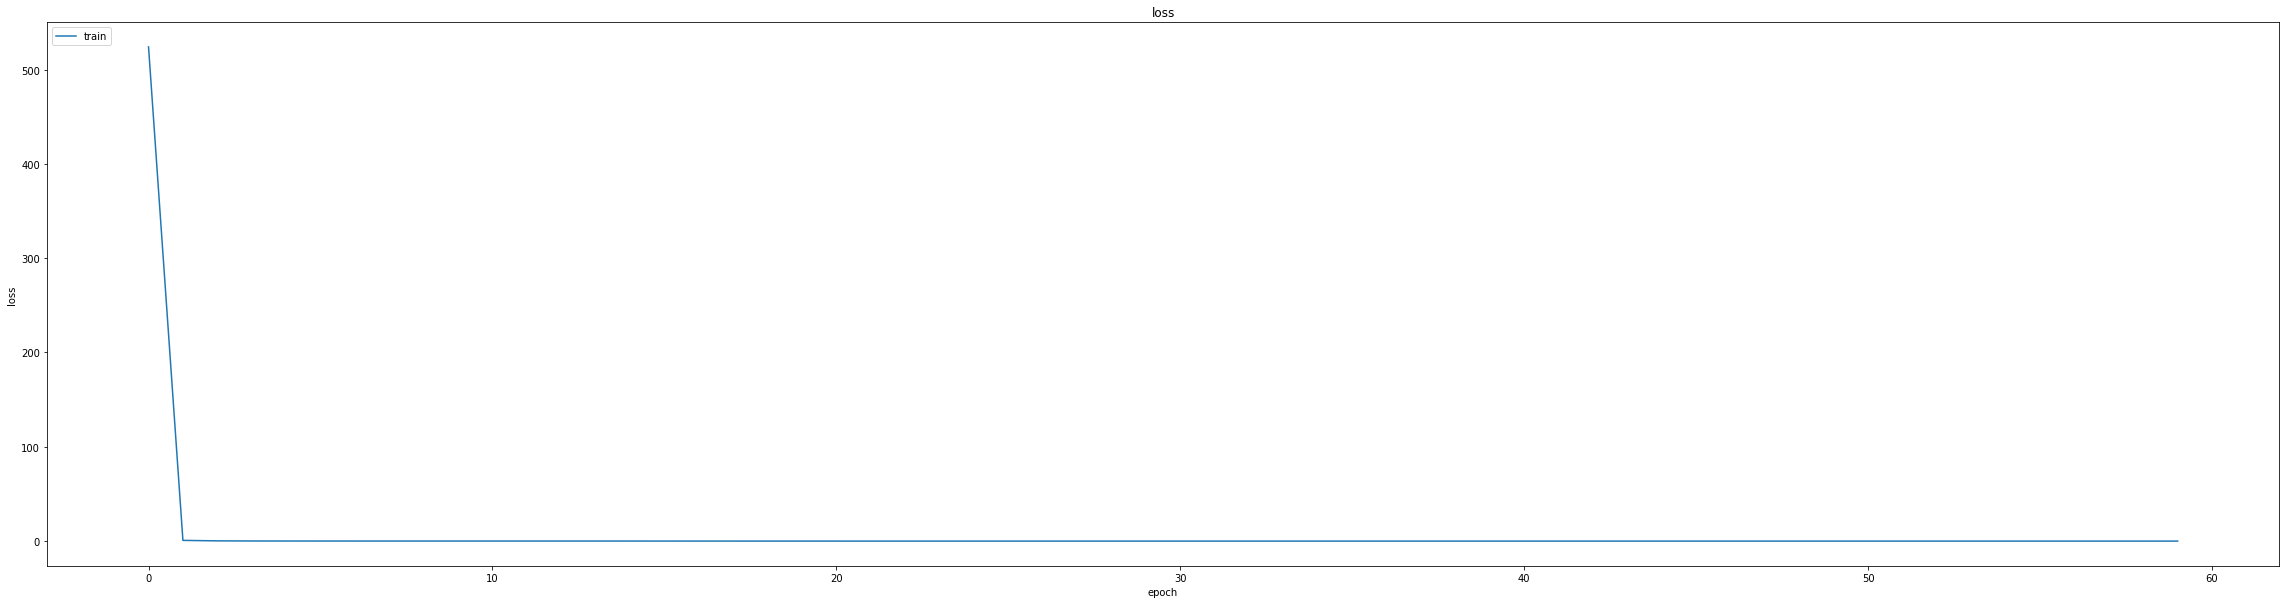

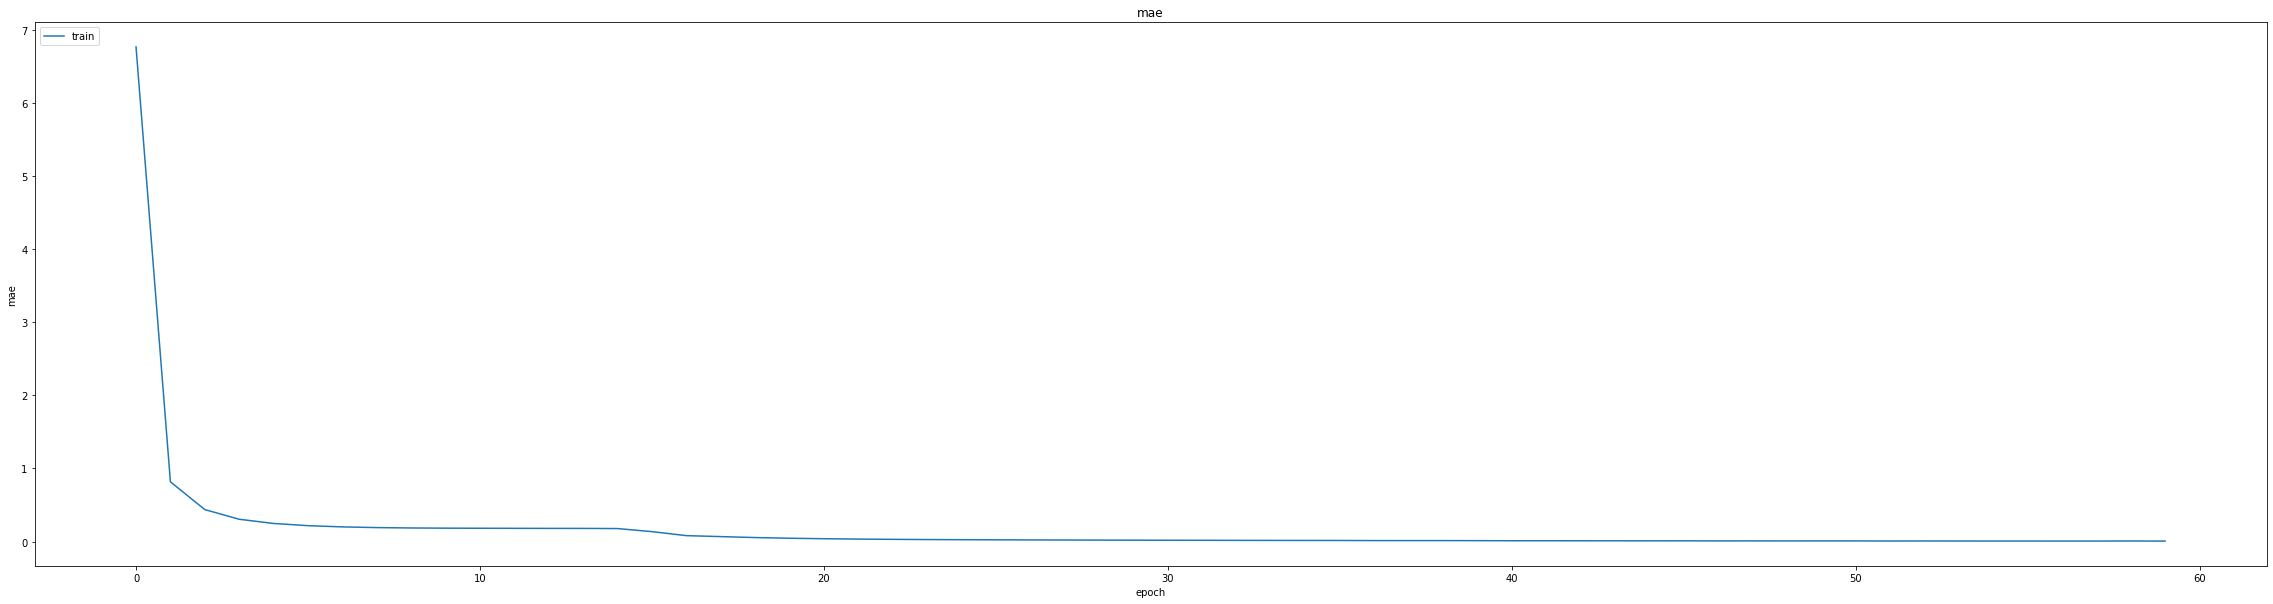

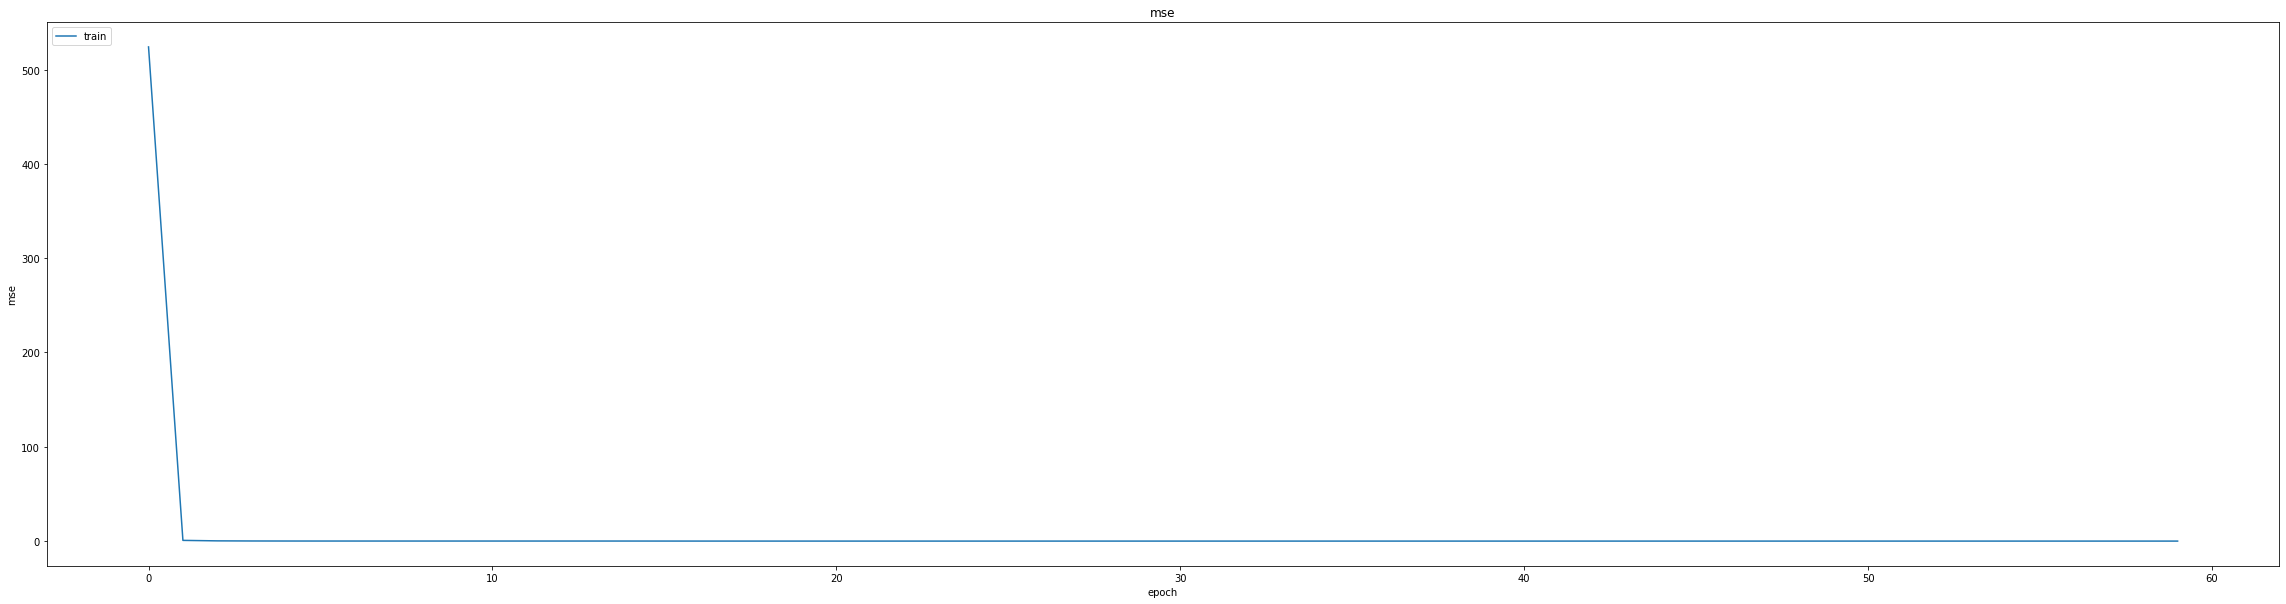

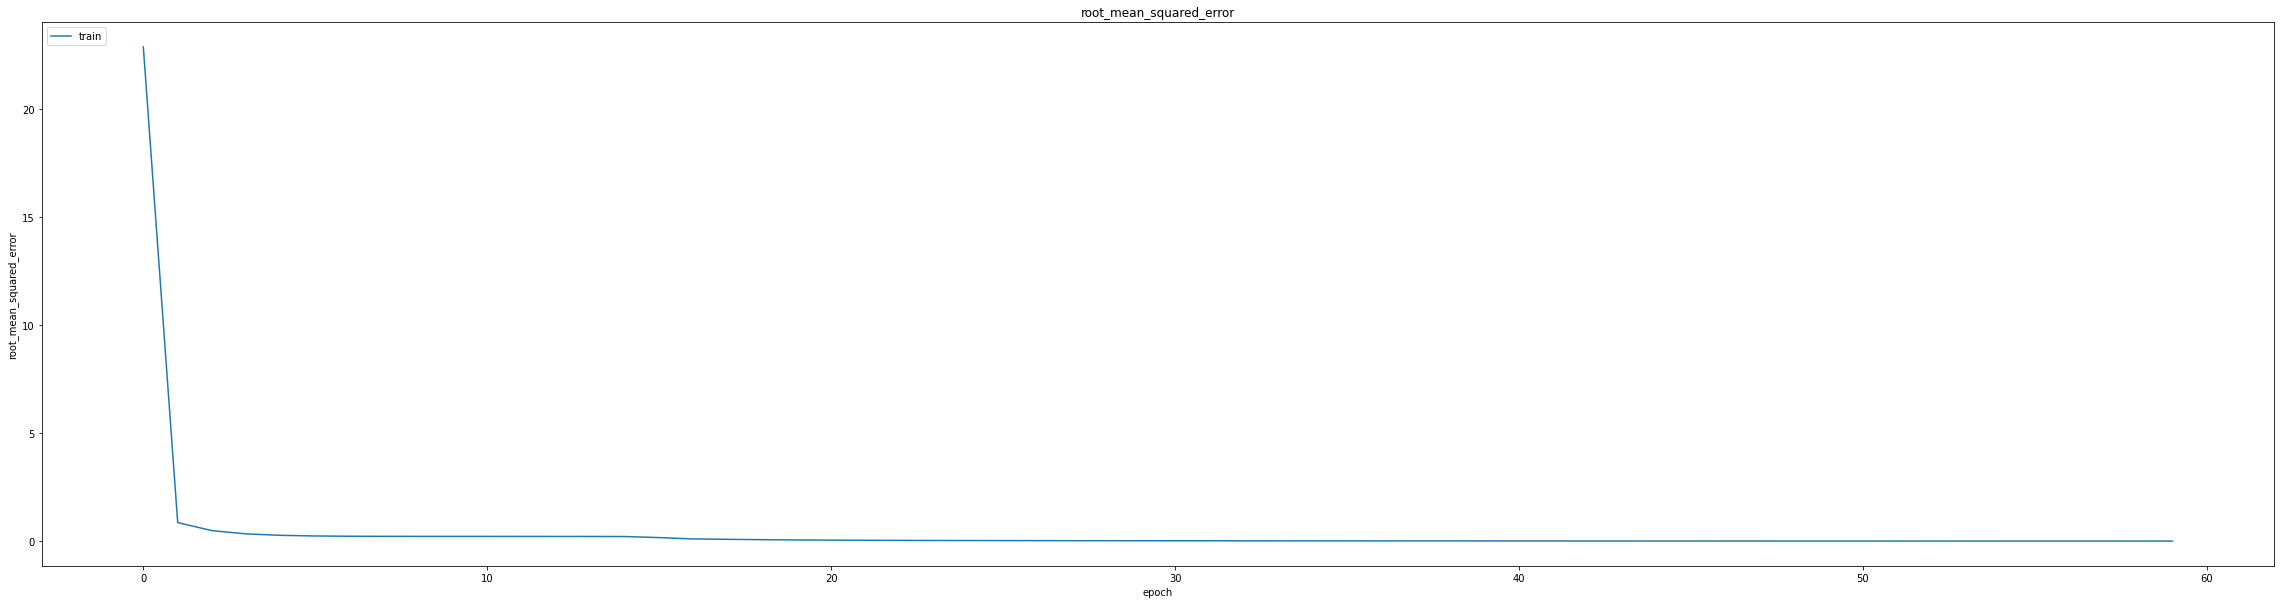

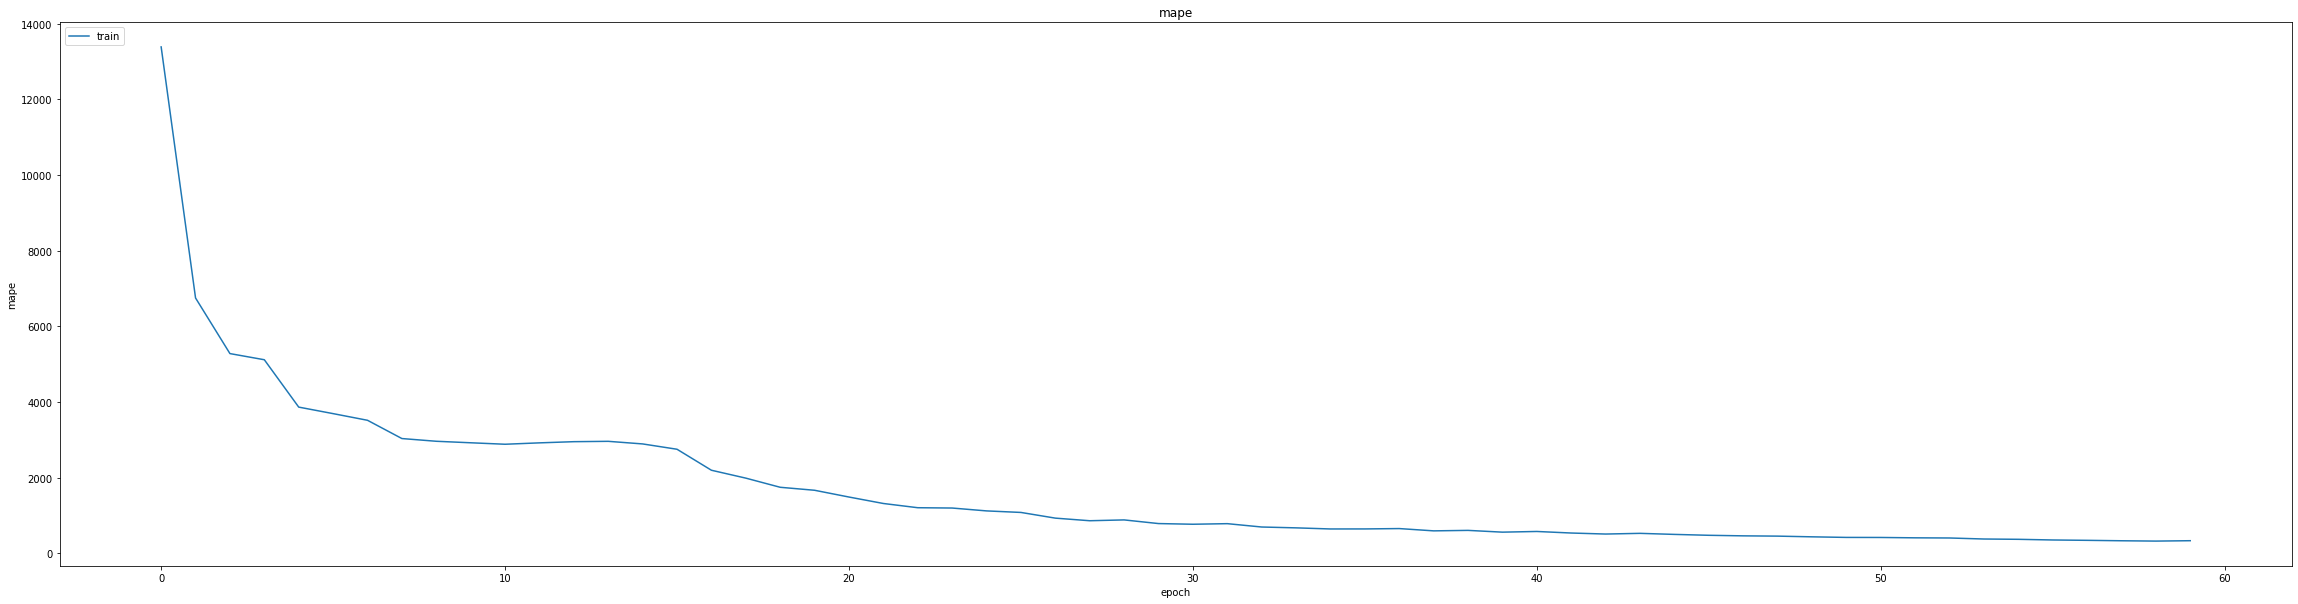

In [ ]:
thesis.SummarizeHistory(history)

In [ ]:
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
#print(min(histroy.history['val_mape']))
r2_scr = thesis.R_Squared_Score(model, x_val, y_val)
print(r2_scr)

0.015440160408616066
0.020619269460439682
1042/1042 [==============================] - 8s 6ms/step
0.9883239762008791


In [ ]:
model.load_weights("/content/drive/MyDrive/modelweights/CHF_USD_5min_BiLSTM(70-30)")
early_stopping = EarlyStopping(monitor='val_mse', patience=15)

In [ ]:

from keras.callbacks import LearningRateScheduler
import keras.backend as K

def scheduler(epoch):
    if epoch%2==0 and epoch!=0:
        lr = K.get_value(model.optimizer.lr)
        K.set_value(model.optimizer.lr, lr*.9)
        print("lr changed to {}".format(lr*.9))
    return K.get_value(model.optimizer.lr)
lr_decay = LearningRateScheduler(scheduler)

callbacks_list = [checkpoint, lr_decay, early_stopping]

Epochs=int(Epochs/3)

history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/20


404/405 [============================>.] - ETA: 0s - loss: 6.6124e-04 - mae: 0.0157 - mse: 6.6124e-04 - root_mean_squared_error: 0.0257 - mape: 494.2447
Epoch 1: val_mse did not improve from 0.00043
405/405 [==============================] - 19s 26ms/step - loss: 6.6091e-04 - mae: 0.0157 - mse: 6.6091e-04 - root_mean_squared_error: 0.0257 - mape: 493.9196 - val_loss: 6.0597e-04 - val_mae: 0.0213 - val_mse: 6.0597e-04 - val_root_mean_squared_error: 0.0246 - val_mape: 2179.8550 - lr: 0.0010
Epoch 2/20
405/405 [==============================] - ETA: 0s - loss: 2.0952e-04 - mae: 0.0110 - mse: 2.0952e-04 - root_mean_squared_error: 0.0145 - mape: 449.4183
Epoch 2: val_mse improved from 0.00043 to 0.00025, saving model to /content/drive/MyDrive/modelweights/CHF_USD_5min_BiLSTM(70-30)


405/405 [==============================] - 41s 100ms/step - loss: 2.0952e-04 - mae: 0.0110 - mse: 2.0952e-04 - root_mean_squared_error: 0.0145 - mape: 449.4183 - val_loss: 2.5397e-04 - val_mae: 0.0132 - val_mse: 2.5397e-04 - val_root_mean_squared_error: 0.0159 - val_mape: 1903.4918 - lr: 0.0010
lr changed to 0.0009000000427477062
Epoch 3/20
405/405 [==============================] - ETA: 0s - loss: 1.4929e-04 - mae: 0.0093 - mse: 1.4929e-04 - root_mean_squared_error: 0.0122 - mape: 392.3535
Epoch 3: val_mse did not improve from 0.00025
405/405 [==============================] - 9s 21ms/step - loss: 1.4929e-04 - mae: 0.0093 - mse: 1.4929e-04 - root_mean_squared_error: 0.0122 - mape: 392.3535 - val_loss: 7.0704e-04 - val_mae: 0.0237 - val_mse: 7.0704e-04 - val_root_mean_squared_error: 0.0266 - val_mape: 1727.5142 - lr: 9.0000e-04
Epoch 4/20
405/405 [==============================] - ETA: 0s - loss: 1.3665e-04 - mae: 0.0090 - mse: 1.3665e-04 - root_mean_squared_error: 0.0117 - mape: 348.7

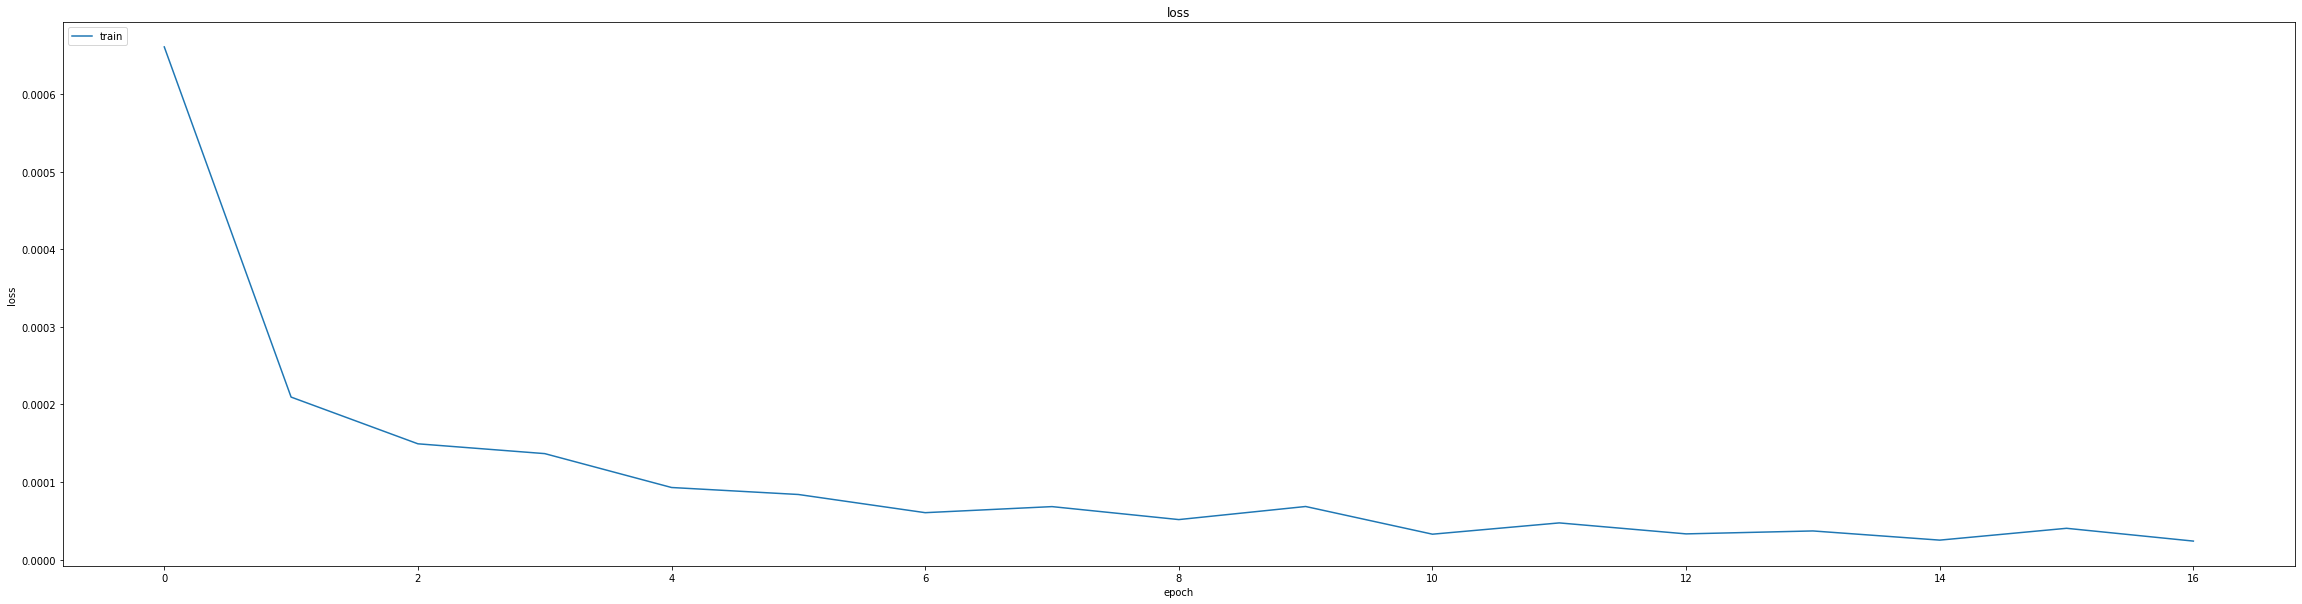

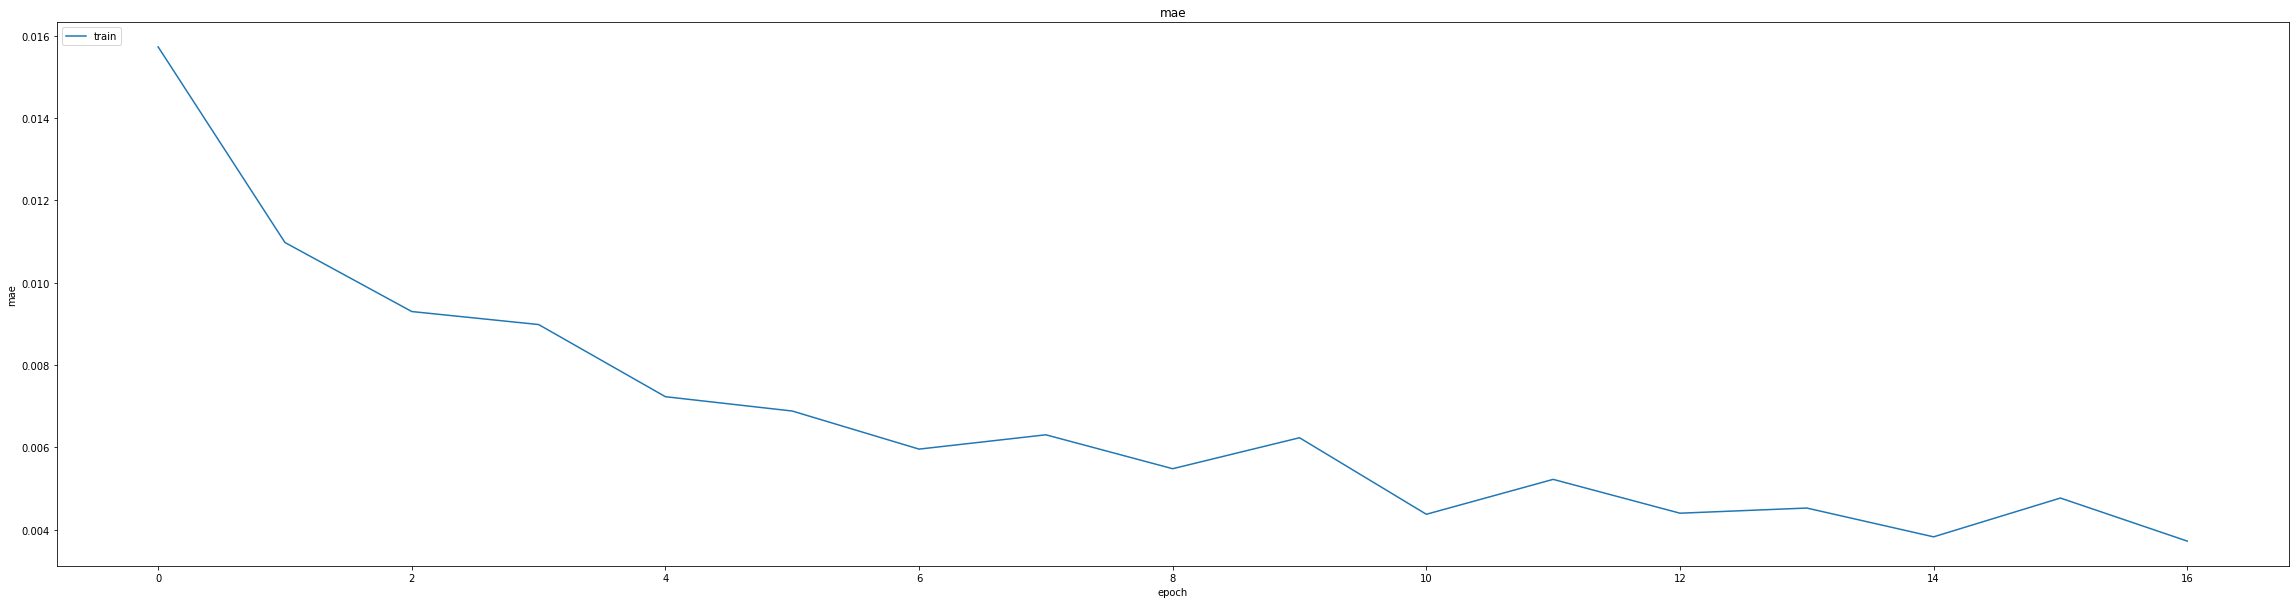

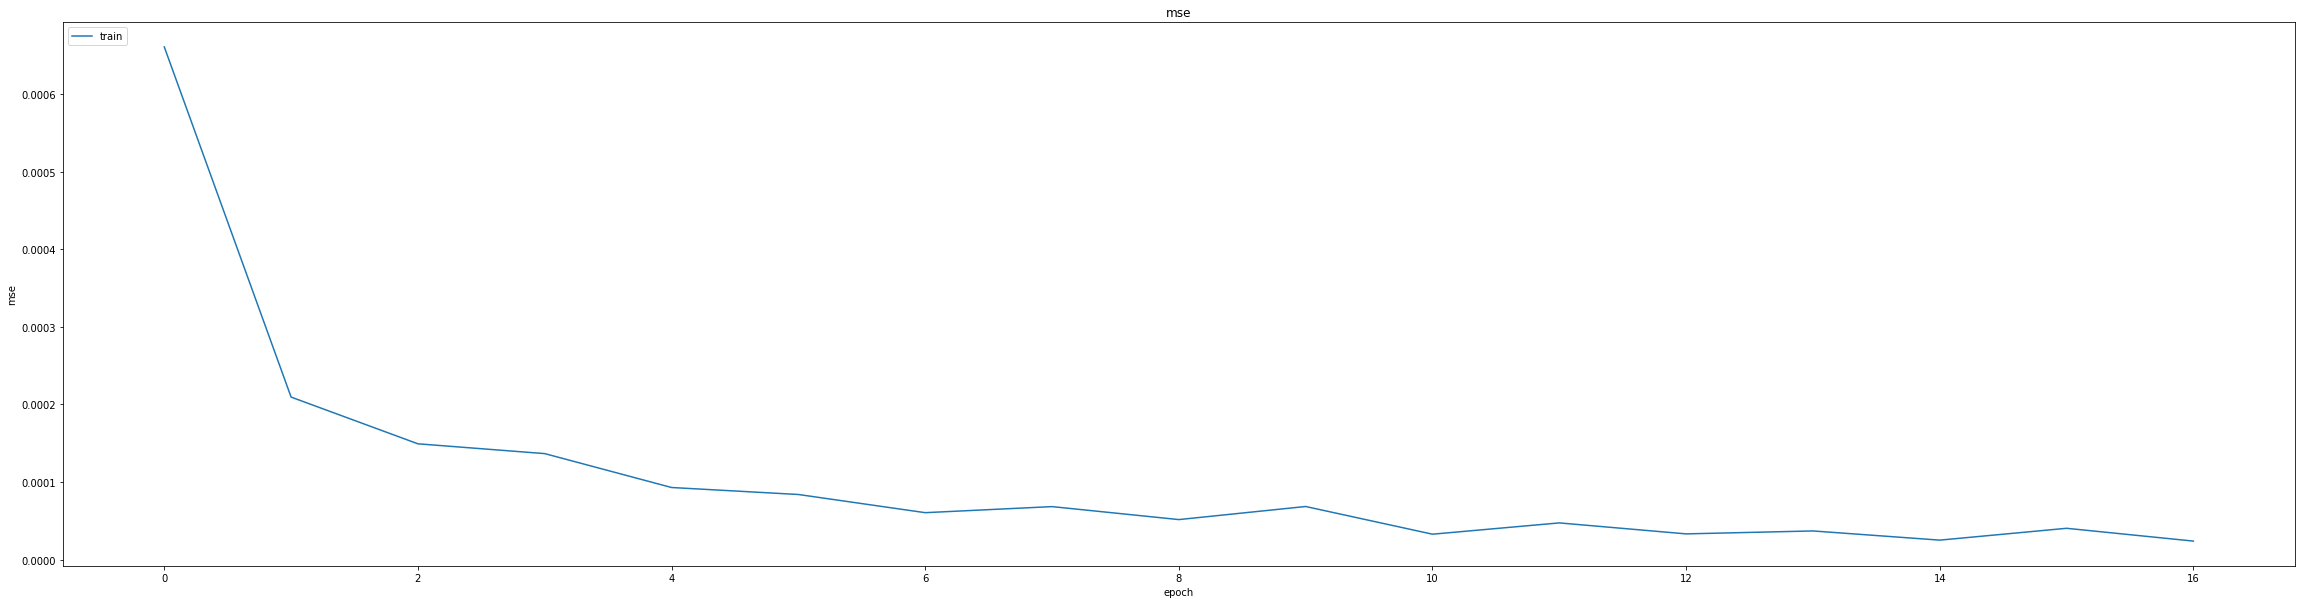

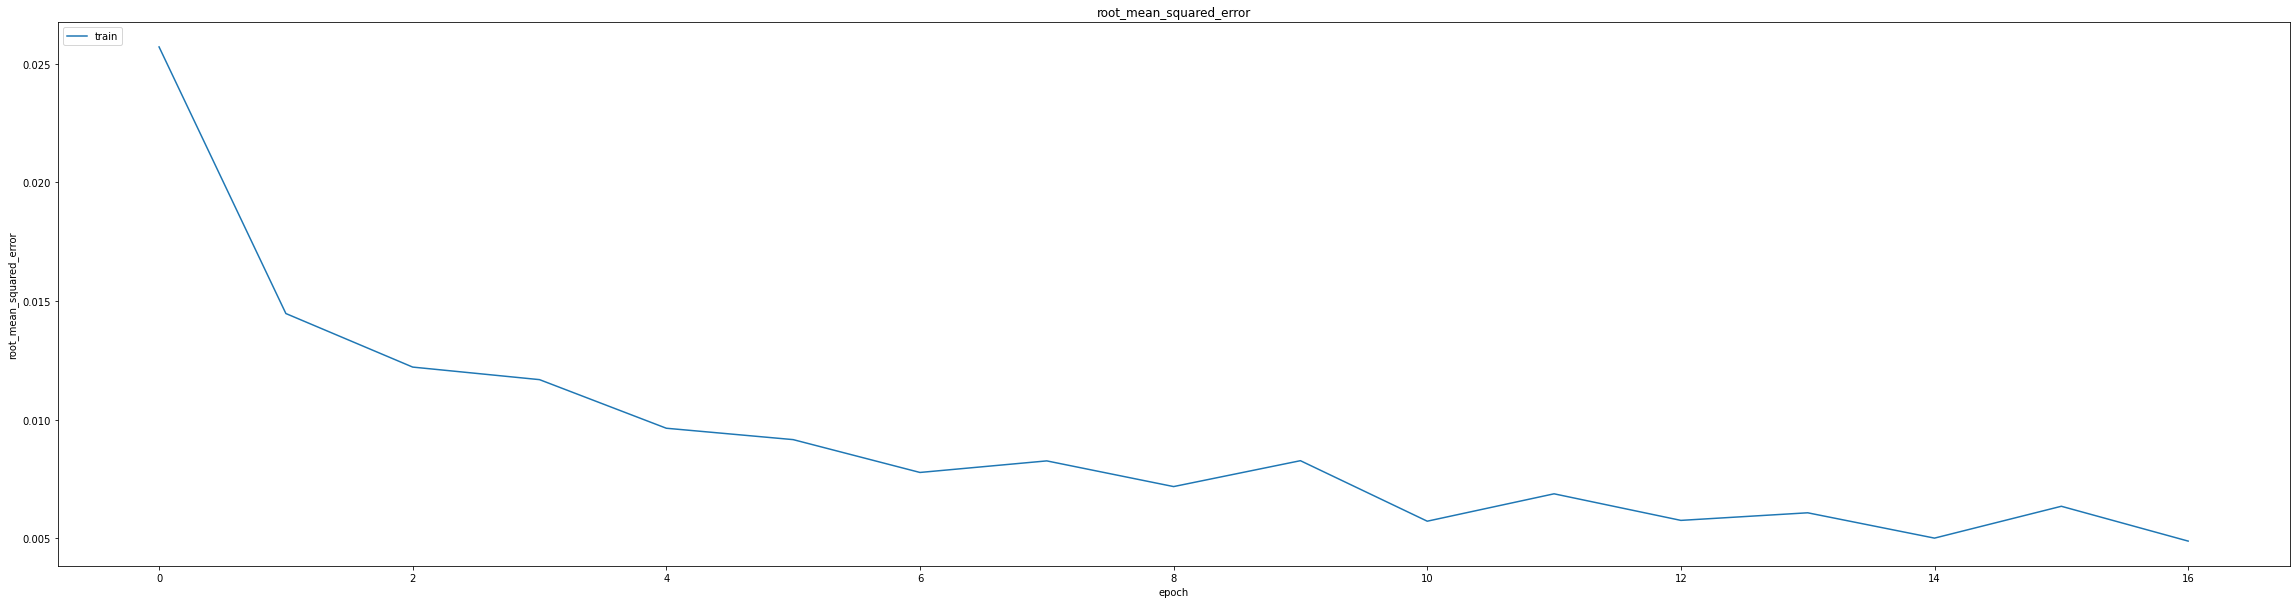

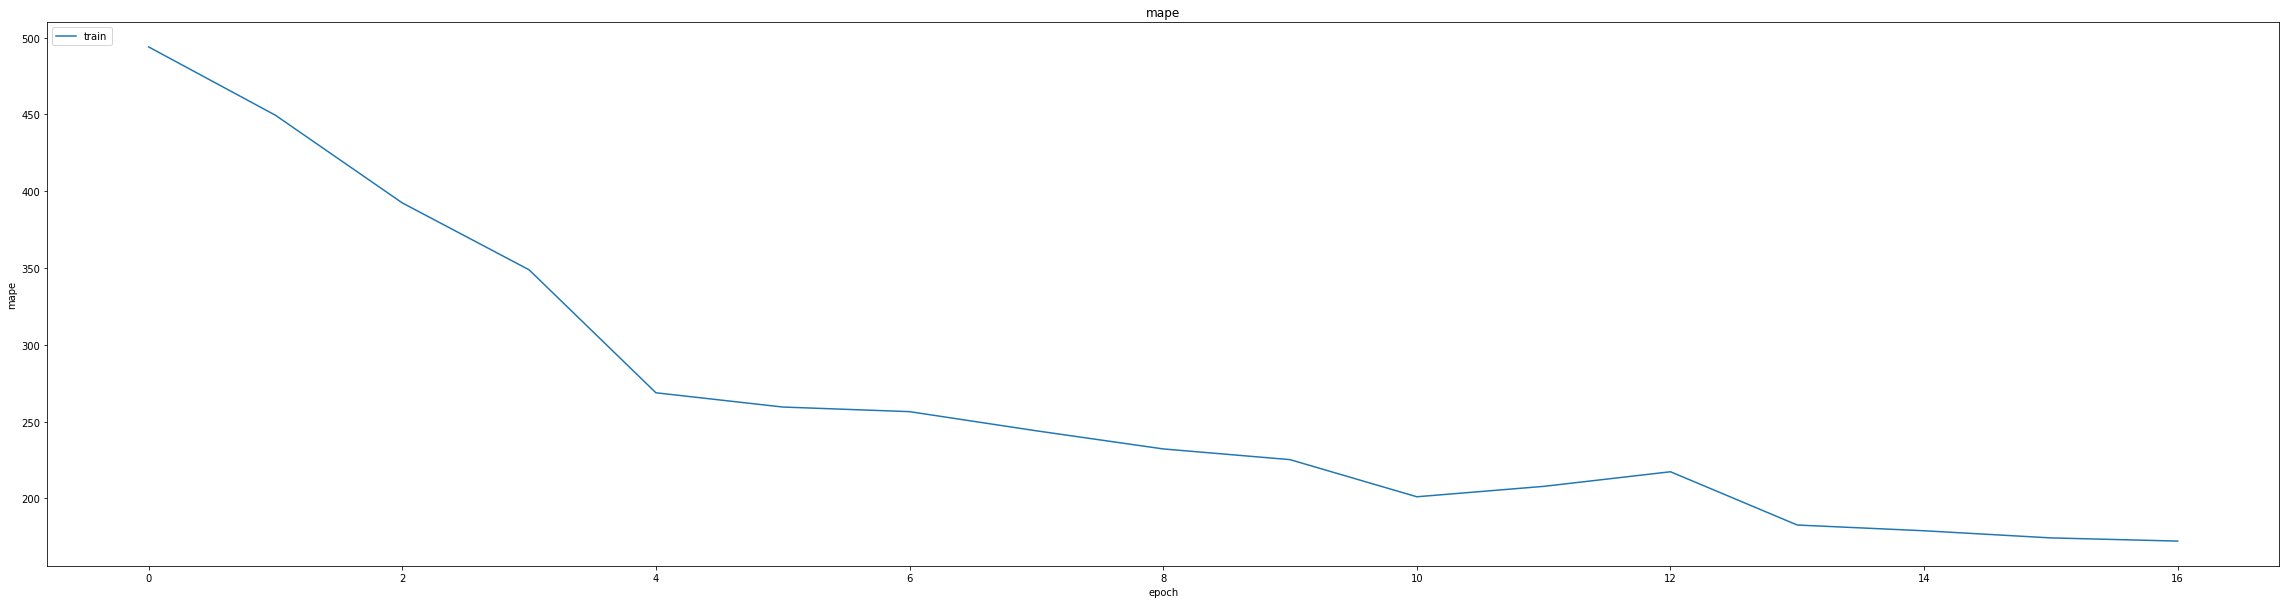

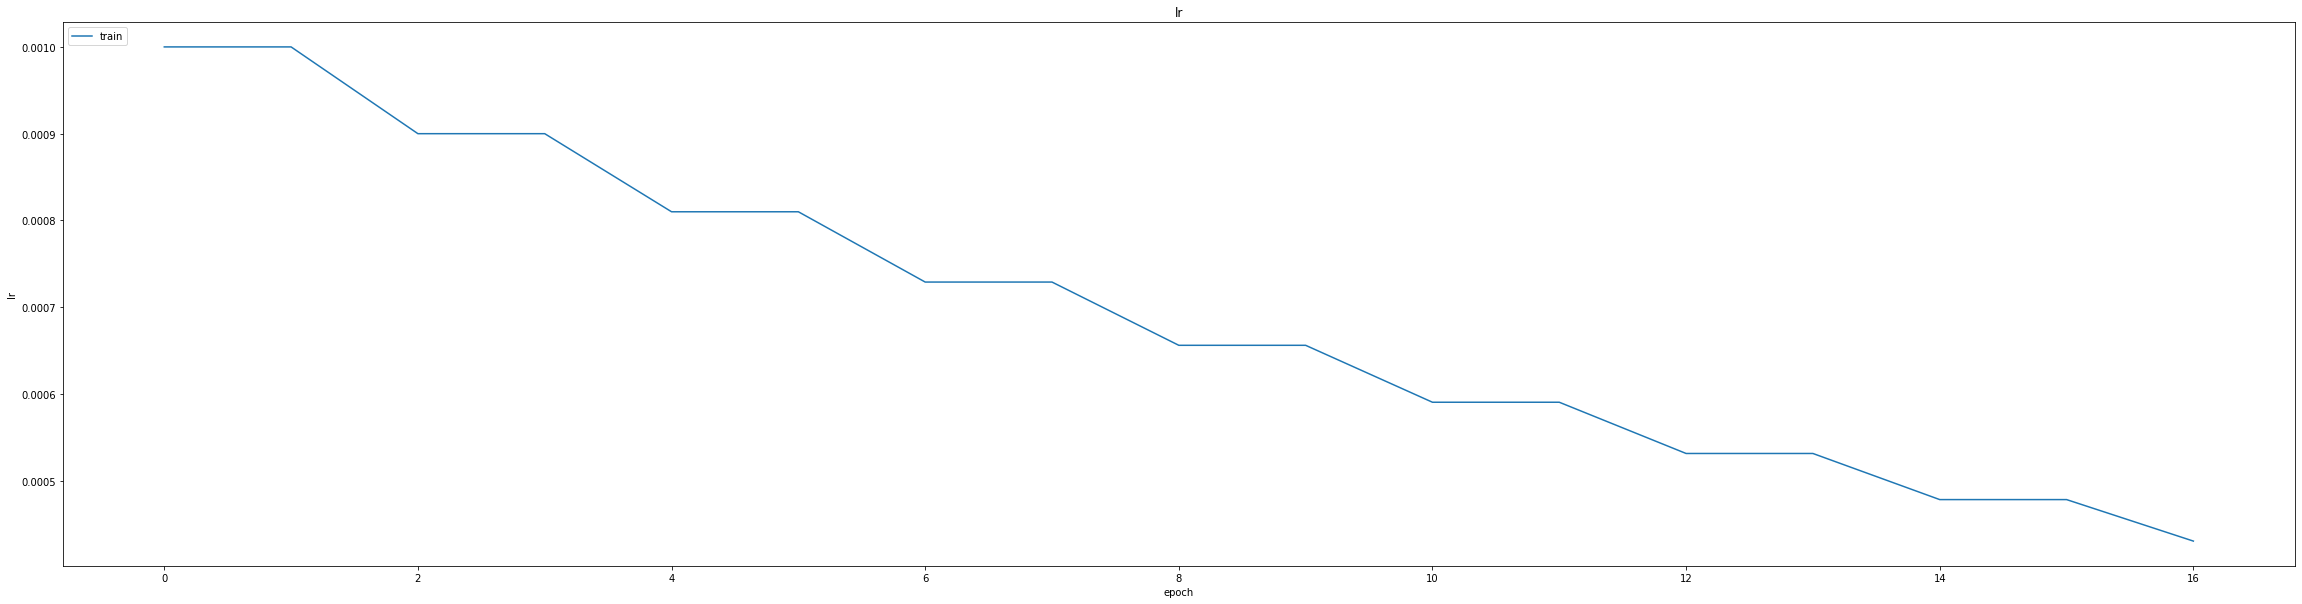

In [ ]:
thesis.SummarizeHistory(history)

In [ ]:
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
#print(min(histroy.history['val_mape']))
r2_scr = thesis.R_Squared_Score(model, x_val, y_val)
print(r2_scr)

0.01316617801785469
0.01593635417521
1042/1042 [==============================] - 8s 6ms/step
0.971124602143632


1042/1042 [==============================] - 6s 6ms/step


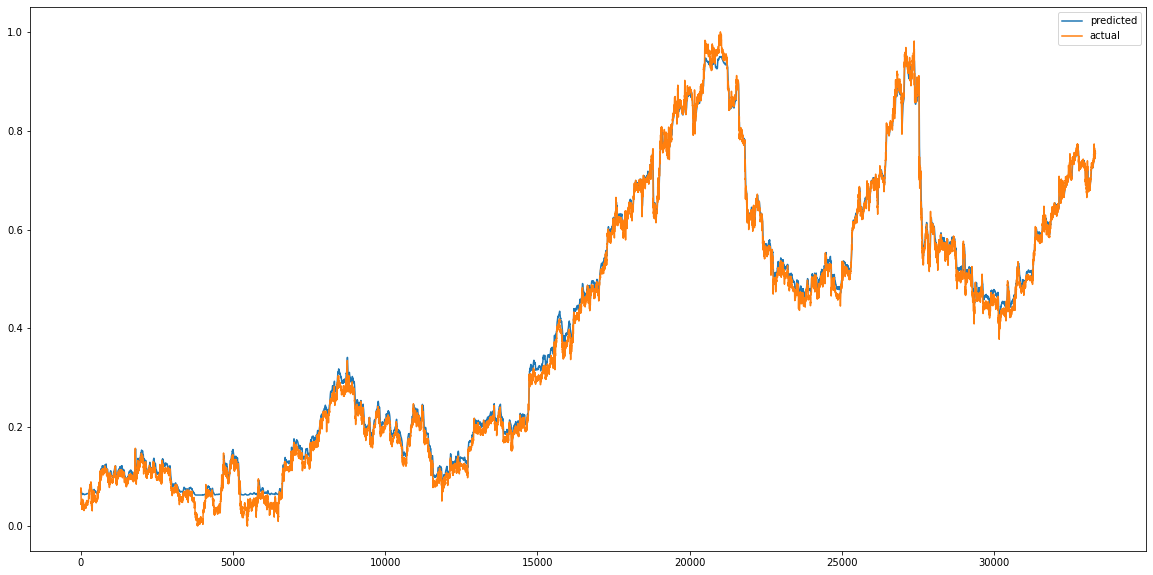

In [ ]:
model.load_weights("/content/drive/MyDrive/modelweights/CHF_USD_5min_BiLSTM(70-30)")
val_predictions=thesis.CreatPrediction(model,x_val, y_val)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


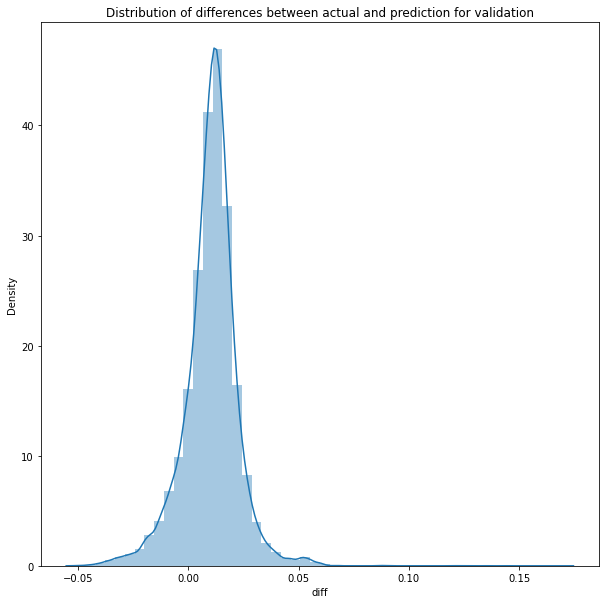

In [ ]:
val_predictions['diff'] = val_predictions['predicted'] - val_predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(val_predictions['diff']);
plt.title('Distribution of differences between actual and prediction for validation')
plt.show()

1042/1042 [==============================] - 6s 6ms/step


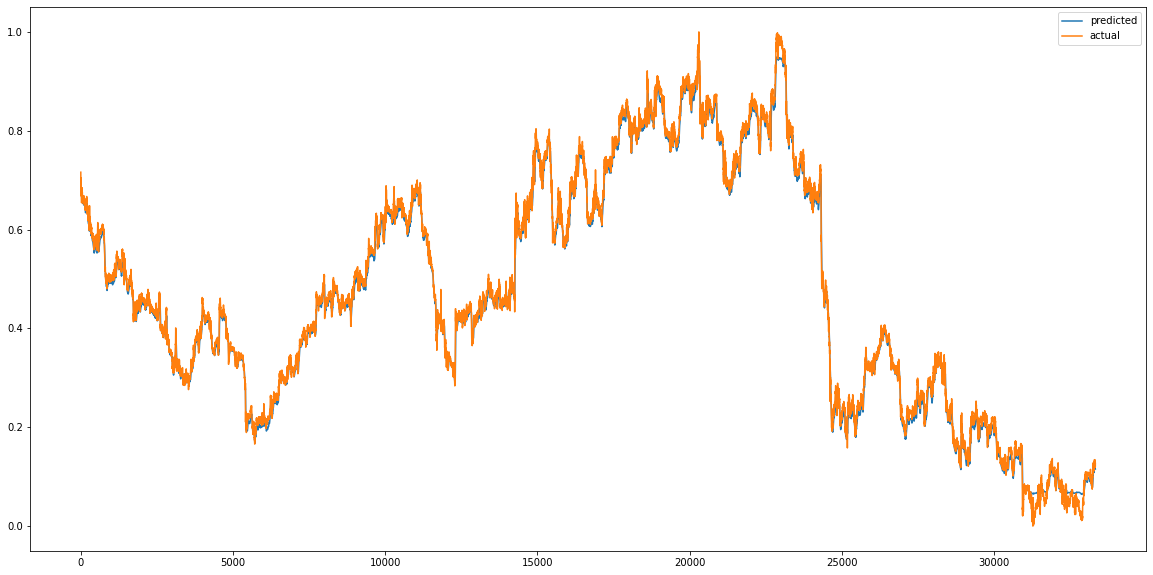

In [ ]:
predictions=thesis.CreatPrediction(model,x_test, y_test)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


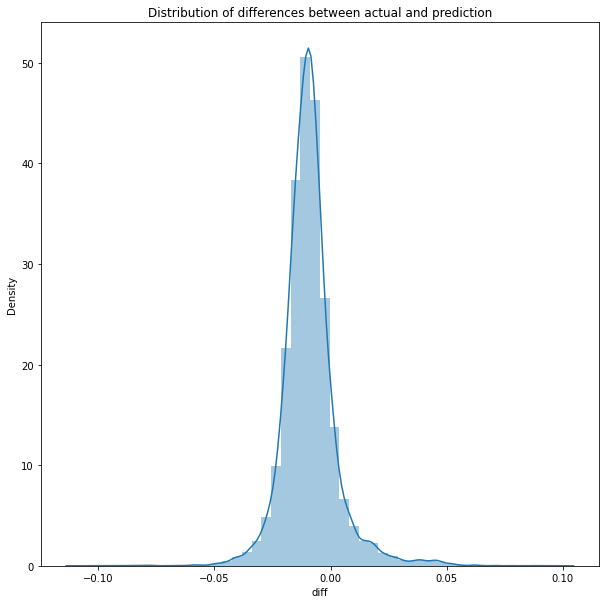

In [ ]:
predictions['diff'] = predictions['predicted'] - predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(predictions['diff']);
plt.title('Distribution of differences between actual and prediction')
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
print("MSE : ", mean_squared_error(predictions['predicted'].values, predictions['actual'].values))

from math import sqrt
print("RMSE : ", sqrt(mean_squared_error(predictions['predicted'].values, predictions['actual'].values)))

print("MAE : ", mean_absolute_error(predictions['predicted'].values, predictions['actual'].values))

test_r2_score=thesis.R_Squared_Score(model, x_test, y_test)
print('R2_Score  :', test_r2_score)
predictions['diff'].describe()

MSE :  0.00022011298162584133
RMSE :  0.014836205095166395
MAE :  0.01204548900292565
1042/1042 [==============================] - 6s 6ms/step
R2_Score  : 0.9962216123009094


count    33333.000000
mean        -0.009072
std          0.011739
min         -0.109469
25%         -0.015115
50%         -0.009789
75%         -0.004470
max          0.100192
Name: diff, dtype: float64

**LSTM_MODEL**

In [ ]:
model= thesis.LSTM_Model(x_train)
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_14 (LSTM)              (None, 24, 256)           275456    
                                                                 
 lstm_15 (LSTM)              (None, 24, 64)            82176     
                                                                 
 dropout_7 (Dropout)         (None, 24, 64)            0         
                                                                 
 lstm_16 (LSTM)              (None, 16)                5184      
                                                                 
 dense_21 (Dense)            (None, 32)                544       
                                                                 
 dense_22 (Dense)            (None, 16)                528       
                                                                 
 dense_23 (Dense)            (None, 1)                

In [ ]:
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping

# Set the metric you want to monitor, the threshold, and the patience value
early_stopping = EarlyStopping(monitor='val_mse', patience=30)

checkpoint = ModelCheckpoint("/content/drive/MyDrive/modelweights/CHF_USD_5min_LSTM(70-30)", monitor='val_mse', verbose=1, save_best_only=True, mode='min')

# Fit
callbacks_list = [checkpoint, early_stopping ]

Epochs=60
Batch_size=385
history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/60
405/405 [==============================] - ETA: 0s - loss: 458.4541 - mae: 5.6096 - mse: 458.4541 - root_mean_squared_error: 21.4115 - mape: 47971.6875
Epoch 1: val_mse improved from inf to 0.08410, saving model to /content/drive/MyDrive/modelweights/CHF_USD_5min_LSTM(70-30)


405/405 [==============================] - 22s 46ms/step - loss: 458.4541 - mae: 5.6096 - mse: 458.4541 - root_mean_squared_error: 21.4115 - mape: 47971.6875 - val_loss: 0.0841 - val_mae: 0.2472 - val_mse: 0.0841 - val_root_mean_squared_error: 0.2900 - val_mape: 15237.6025
Epoch 2/60
405/405 [==============================] - ETA: 0s - loss: 0.0561 - mae: 0.1953 - mse: 0.0561 - root_mean_squared_error: 0.2369 - mape: 3744.9890
Epoch 2: val_mse improved from 0.08410 to 0.07470, saving model to /content/drive/MyDrive/modelweights/CHF_USD_5min_LSTM(70-30)


405/405 [==============================] - 17s 42ms/step - loss: 0.0561 - mae: 0.1953 - mse: 0.0561 - root_mean_squared_error: 0.2369 - mape: 3744.9890 - val_loss: 0.0747 - val_mae: 0.2409 - val_mse: 0.0747 - val_root_mean_squared_error: 0.2733 - val_mape: 12634.5850
Epoch 3/60
403/405 [============================>.] - ETA: 0s - loss: 0.0544 - mae: 0.1850 - mse: 0.0544 - root_mean_squared_error: 0.2332 - mape: 3273.3372
Epoch 3: val_mse improved from 0.07470 to 0.07459, saving model to /content/drive/MyDrive/modelweights/CHF_USD_5min_LSTM(70-30)


405/405 [==============================] - 18s 44ms/step - loss: 0.0544 - mae: 0.1850 - mse: 0.0544 - root_mean_squared_error: 0.2332 - mape: 3263.3210 - val_loss: 0.0746 - val_mae: 0.2411 - val_mse: 0.0746 - val_root_mean_squared_error: 0.2731 - val_mape: 12454.1992
Epoch 4/60
405/405 [==============================] - ETA: 0s - loss: 0.0543 - mae: 0.1846 - mse: 0.0543 - root_mean_squared_error: 0.2329 - mape: 3354.9351
Epoch 4: val_mse improved from 0.07459 to 0.07457, saving model to /content/drive/MyDrive/modelweights/CHF_USD_5min_LSTM(70-30)


405/405 [==============================] - 17s 43ms/step - loss: 0.0543 - mae: 0.1846 - mse: 0.0543 - root_mean_squared_error: 0.2329 - mape: 3354.9351 - val_loss: 0.0746 - val_mae: 0.2411 - val_mse: 0.0746 - val_root_mean_squared_error: 0.2731 - val_mape: 12415.9648
Epoch 5/60
405/405 [==============================] - ETA: 0s - loss: 0.0543 - mae: 0.1844 - mse: 0.0543 - root_mean_squared_error: 0.2330 - mape: 2416.0083
Epoch 5: val_mse improved from 0.07457 to 0.07457, saving model to /content/drive/MyDrive/modelweights/CHF_USD_5min_LSTM(70-30)


405/405 [==============================] - 17s 43ms/step - loss: 0.0543 - mae: 0.1844 - mse: 0.0543 - root_mean_squared_error: 0.2330 - mape: 2416.0083 - val_loss: 0.0746 - val_mae: 0.2411 - val_mse: 0.0746 - val_root_mean_squared_error: 0.2731 - val_mape: 12416.9141
Epoch 6/60
403/405 [============================>.] - ETA: 0s - loss: 0.0543 - mae: 0.1845 - mse: 0.0543 - root_mean_squared_error: 0.2329 - mape: 2562.4319
Epoch 6: val_mse did not improve from 0.07457
405/405 [==============================] - 6s 16ms/step - loss: 0.0543 - mae: 0.1844 - mse: 0.0543 - root_mean_squared_error: 0.2329 - mape: 2554.6042 - val_loss: 0.0746 - val_mae: 0.2411 - val_mse: 0.0746 - val_root_mean_squared_error: 0.2731 - val_mape: 12456.3555
Epoch 7/60
403/405 [============================>.] - ETA: 0s - loss: 0.0541 - mae: 0.1843 - mse: 0.0541 - root_mean_squared_error: 0.2326 - mape: 3287.6133
Epoch 7: val_mse did not improve from 0.07457
405/405 [==============================] - 6s 16ms/step - l

405/405 [==============================] - 18s 45ms/step - loss: 0.0539 - mae: 0.1842 - mse: 0.0539 - root_mean_squared_error: 0.2322 - mape: 2567.3220 - val_loss: 0.0746 - val_mae: 0.2410 - val_mse: 0.0746 - val_root_mean_squared_error: 0.2731 - val_mape: 12456.0635
Epoch 14/60
405/405 [==============================] - ETA: 0s - loss: 0.0538 - mae: 0.1839 - mse: 0.0538 - root_mean_squared_error: 0.2319 - mape: 3174.6943
Epoch 14: val_mse did not improve from 0.07456
405/405 [==============================] - 6s 16ms/step - loss: 0.0538 - mae: 0.1839 - mse: 0.0538 - root_mean_squared_error: 0.2319 - mape: 3174.6943 - val_loss: 0.0746 - val_mae: 0.2409 - val_mse: 0.0746 - val_root_mean_squared_error: 0.2732 - val_mape: 12608.9316
Epoch 15/60
402/405 [============================>.] - ETA: 0s - loss: 0.0537 - mae: 0.1837 - mse: 0.0537 - root_mean_squared_error: 0.2317 - mape: 3042.1194
Epoch 15: val_mse did not improve from 0.07456
405/405 [==============================] - 6s 15ms/step

405/405 [==============================] - 17s 41ms/step - loss: 0.0536 - mae: 0.1837 - mse: 0.0536 - root_mean_squared_error: 0.2315 - mape: 2738.1599 - val_loss: 0.0746 - val_mae: 0.2409 - val_mse: 0.0746 - val_root_mean_squared_error: 0.2731 - val_mape: 12530.9746
Epoch 17/60
404/405 [============================>.] - ETA: 0s - loss: 0.0535 - mae: 0.1837 - mse: 0.0535 - root_mean_squared_error: 0.2313 - mape: 3177.4453
Epoch 17: val_mse did not improve from 0.07456
405/405 [==============================] - 6s 16ms/step - loss: 0.0535 - mae: 0.1837 - mse: 0.0535 - root_mean_squared_error: 0.2313 - mape: 3175.3926 - val_loss: 0.0747 - val_mae: 0.2407 - val_mse: 0.0747 - val_root_mean_squared_error: 0.2733 - val_mape: 12705.3213
Epoch 18/60
402/405 [============================>.] - ETA: 0s - loss: 0.0533 - mae: 0.1833 - mse: 0.0533 - root_mean_squared_error: 0.2310 - mape: 3166.8313
Epoch 18: val_mse improved from 0.07456 to 0.07448, saving model to /content/drive/MyDrive/modelweight

405/405 [==============================] - 18s 44ms/step - loss: 0.0533 - mae: 0.1833 - mse: 0.0533 - root_mean_squared_error: 0.2310 - mape: 3149.4211 - val_loss: 0.0745 - val_mae: 0.2402 - val_mse: 0.0745 - val_root_mean_squared_error: 0.2729 - val_mape: 12756.8672
Epoch 19/60
405/405 [==============================] - ETA: 0s - loss: 0.0525 - mae: 0.1822 - mse: 0.0525 - root_mean_squared_error: 0.2291 - mape: 3026.8989
Epoch 19: val_mse improved from 0.07448 to 0.07253, saving model to /content/drive/MyDrive/modelweights/CHF_USD_5min_LSTM(70-30)


405/405 [==============================] - 18s 43ms/step - loss: 0.0525 - mae: 0.1822 - mse: 0.0525 - root_mean_squared_error: 0.2291 - mape: 3026.8989 - val_loss: 0.0725 - val_mae: 0.2370 - val_mse: 0.0725 - val_root_mean_squared_error: 0.2693 - val_mape: 12748.0801
Epoch 20/60
403/405 [============================>.] - ETA: 0s - loss: 0.0467 - mae: 0.1707 - mse: 0.0467 - root_mean_squared_error: 0.2161 - mape: 3035.8120
Epoch 20: val_mse improved from 0.07253 to 0.04670, saving model to /content/drive/MyDrive/modelweights/CHF_USD_5min_LSTM(70-30)


405/405 [==============================] - 17s 41ms/step - loss: 0.0466 - mae: 0.1706 - mse: 0.0466 - root_mean_squared_error: 0.2159 - mape: 3026.4478 - val_loss: 0.0467 - val_mae: 0.1952 - val_mse: 0.0467 - val_root_mean_squared_error: 0.2161 - val_mape: 11212.6680
Epoch 21/60
402/405 [============================>.] - ETA: 0s - loss: 0.0147 - mae: 0.0916 - mse: 0.0147 - root_mean_squared_error: 0.1211 - mape: 1765.5043
Epoch 21: val_mse improved from 0.04670 to 0.01491, saving model to /content/drive/MyDrive/modelweights/CHF_USD_5min_LSTM(70-30)


405/405 [==============================] - 18s 44ms/step - loss: 0.0146 - mae: 0.0915 - mse: 0.0146 - root_mean_squared_error: 0.1209 - mape: 1755.7511 - val_loss: 0.0149 - val_mae: 0.1121 - val_mse: 0.0149 - val_root_mean_squared_error: 0.1221 - val_mape: 7447.4873
Epoch 22/60
405/405 [==============================] - ETA: 0s - loss: 0.0073 - mae: 0.0653 - mse: 0.0073 - root_mean_squared_error: 0.0857 - mape: 1518.9132
Epoch 22: val_mse improved from 0.01491 to 0.00520, saving model to /content/drive/MyDrive/modelweights/CHF_USD_5min_LSTM(70-30)


405/405 [==============================] - 18s 44ms/step - loss: 0.0073 - mae: 0.0653 - mse: 0.0073 - root_mean_squared_error: 0.0857 - mape: 1518.9132 - val_loss: 0.0052 - val_mae: 0.0576 - val_mse: 0.0052 - val_root_mean_squared_error: 0.0721 - val_mape: 5881.2725
Epoch 23/60
402/405 [============================>.] - ETA: 0s - loss: 0.0052 - mae: 0.0554 - mse: 0.0052 - root_mean_squared_error: 0.0724 - mape: 1221.7888
Epoch 23: val_mse improved from 0.00520 to 0.00502, saving model to /content/drive/MyDrive/modelweights/CHF_USD_5min_LSTM(70-30)


405/405 [==============================] - 18s 44ms/step - loss: 0.0052 - mae: 0.0554 - mse: 0.0052 - root_mean_squared_error: 0.0724 - mape: 1215.0353 - val_loss: 0.0050 - val_mae: 0.0618 - val_mse: 0.0050 - val_root_mean_squared_error: 0.0709 - val_mape: 5425.9053
Epoch 24/60
403/405 [============================>.] - ETA: 0s - loss: 0.0041 - mae: 0.0492 - mse: 0.0041 - root_mean_squared_error: 0.0641 - mape: 1359.6746
Epoch 24: val_mse improved from 0.00502 to 0.00414, saving model to /content/drive/MyDrive/modelweights/CHF_USD_5min_LSTM(70-30)


405/405 [==============================] - 18s 43ms/step - loss: 0.0041 - mae: 0.0492 - mse: 0.0041 - root_mean_squared_error: 0.0641 - mape: 1355.4922 - val_loss: 0.0041 - val_mae: 0.0568 - val_mse: 0.0041 - val_root_mean_squared_error: 0.0643 - val_mape: 4876.1860
Epoch 25/60
402/405 [============================>.] - ETA: 0s - loss: 0.0034 - mae: 0.0446 - mse: 0.0034 - root_mean_squared_error: 0.0582 - mape: 1252.0288
Epoch 25: val_mse improved from 0.00414 to 0.00283, saving model to /content/drive/MyDrive/modelweights/CHF_USD_5min_LSTM(70-30)


405/405 [==============================] - 17s 41ms/step - loss: 0.0034 - mae: 0.0446 - mse: 0.0034 - root_mean_squared_error: 0.0582 - mape: 1245.0927 - val_loss: 0.0028 - val_mae: 0.0457 - val_mse: 0.0028 - val_root_mean_squared_error: 0.0532 - val_mape: 4527.0425
Epoch 26/60
405/405 [==============================] - ETA: 0s - loss: 0.0028 - mae: 0.0409 - mse: 0.0028 - root_mean_squared_error: 0.0532 - mape: 1048.1124
Epoch 26: val_mse improved from 0.00283 to 0.00247, saving model to /content/drive/MyDrive/modelweights/CHF_USD_5min_LSTM(70-30)


405/405 [==============================] - 18s 44ms/step - loss: 0.0028 - mae: 0.0409 - mse: 0.0028 - root_mean_squared_error: 0.0532 - mape: 1048.1124 - val_loss: 0.0025 - val_mae: 0.0406 - val_mse: 0.0025 - val_root_mean_squared_error: 0.0497 - val_mape: 4327.1025
Epoch 27/60
403/405 [============================>.] - ETA: 0s - loss: 0.0023 - mae: 0.0364 - mse: 0.0023 - root_mean_squared_error: 0.0475 - mape: 848.2978
Epoch 27: val_mse did not improve from 0.00247
405/405 [==============================] - 6s 16ms/step - loss: 0.0023 - mae: 0.0364 - mse: 0.0023 - root_mean_squared_error: 0.0475 - mape: 845.6743 - val_loss: 0.0030 - val_mae: 0.0483 - val_mse: 0.0030 - val_root_mean_squared_error: 0.0548 - val_mape: 3999.4783
Epoch 28/60
404/405 [============================>.] - ETA: 0s - loss: 0.0019 - mae: 0.0333 - mse: 0.0019 - root_mean_squared_error: 0.0436 - mape: 802.7078
Epoch 28: val_mse improved from 0.00247 to 0.00133, saving model to /content/drive/MyDrive/modelweights/CHF

405/405 [==============================] - 17s 43ms/step - loss: 0.0019 - mae: 0.0333 - mse: 0.0019 - root_mean_squared_error: 0.0436 - mape: 802.1855 - val_loss: 0.0013 - val_mae: 0.0288 - val_mse: 0.0013 - val_root_mean_squared_error: 0.0365 - val_mape: 3760.1836
Epoch 29/60
404/405 [============================>.] - ETA: 0s - loss: 0.0016 - mae: 0.0304 - mse: 0.0016 - root_mean_squared_error: 0.0399 - mape: 801.6788
Epoch 29: val_mse improved from 0.00133 to 0.00090, saving model to /content/drive/MyDrive/modelweights/CHF_USD_5min_LSTM(70-30)


405/405 [==============================] - 17s 43ms/step - loss: 0.0016 - mae: 0.0304 - mse: 0.0016 - root_mean_squared_error: 0.0399 - mape: 801.1569 - val_loss: 9.0230e-04 - val_mae: 0.0209 - val_mse: 9.0230e-04 - val_root_mean_squared_error: 0.0300 - val_mape: 3581.5801
Epoch 30/60
405/405 [==============================] - ETA: 0s - loss: 0.0013 - mae: 0.0277 - mse: 0.0013 - root_mean_squared_error: 0.0361 - mape: 681.3450
Epoch 30: val_mse did not improve from 0.00090
405/405 [==============================] - 6s 16ms/step - loss: 0.0013 - mae: 0.0277 - mse: 0.0013 - root_mean_squared_error: 0.0361 - mape: 681.3450 - val_loss: 0.0019 - val_mae: 0.0378 - val_mse: 0.0019 - val_root_mean_squared_error: 0.0436 - val_mape: 3380.4438
Epoch 31/60
403/405 [============================>.] - ETA: 0s - loss: 0.0011 - mae: 0.0250 - mse: 0.0011 - root_mean_squared_error: 0.0326 - mape: 715.2102
Epoch 31: val_mse did not improve from 0.00090
405/405 [==============================] - 6s 15ms/st

405/405 [==============================] - 17s 43ms/step - loss: 9.3002e-04 - mae: 0.0235 - mse: 9.3002e-04 - root_mean_squared_error: 0.0305 - mape: 683.1623 - val_loss: 8.3099e-04 - val_mae: 0.0226 - val_mse: 8.3099e-04 - val_root_mean_squared_error: 0.0288 - val_mape: 3071.5020
Epoch 33/60
405/405 [==============================] - ETA: 0s - loss: 7.2095e-04 - mae: 0.0207 - mse: 7.2095e-04 - root_mean_squared_error: 0.0269 - mape: 668.8403
Epoch 33: val_mse did not improve from 0.00083
405/405 [==============================] - 6s 15ms/step - loss: 7.2095e-04 - mae: 0.0207 - mse: 7.2095e-04 - root_mean_squared_error: 0.0269 - mape: 668.8403 - val_loss: 0.0019 - val_mae: 0.0385 - val_mse: 0.0019 - val_root_mean_squared_error: 0.0434 - val_mape: 2955.3088
Epoch 34/60
404/405 [============================>.] - ETA: 0s - loss: 6.4765e-04 - mae: 0.0196 - mse: 6.4765e-04 - root_mean_squared_error: 0.0254 - mape: 551.1608
Epoch 34: val_mse improved from 0.00083 to 0.00050, saving model to 

405/405 [==============================] - 17s 41ms/step - loss: 6.4766e-04 - mae: 0.0196 - mse: 6.4766e-04 - root_mean_squared_error: 0.0254 - mape: 550.8004 - val_loss: 5.0153e-04 - val_mae: 0.0150 - val_mse: 5.0153e-04 - val_root_mean_squared_error: 0.0224 - val_mape: 2893.6790
Epoch 35/60
402/405 [============================>.] - ETA: 0s - loss: 5.6946e-04 - mae: 0.0184 - mse: 5.6946e-04 - root_mean_squared_error: 0.0239 - mape: 599.4816
Epoch 35: val_mse improved from 0.00050 to 0.00044, saving model to /content/drive/MyDrive/modelweights/CHF_USD_5min_LSTM(70-30)


405/405 [==============================] - 18s 44ms/step - loss: 5.6893e-04 - mae: 0.0184 - mse: 5.6893e-04 - root_mean_squared_error: 0.0239 - mape: 596.1631 - val_loss: 4.3612e-04 - val_mae: 0.0140 - val_mse: 4.3612e-04 - val_root_mean_squared_error: 0.0209 - val_mape: 2764.7427
Epoch 36/60
404/405 [============================>.] - ETA: 0s - loss: 4.7747e-04 - mae: 0.0168 - mse: 4.7747e-04 - root_mean_squared_error: 0.0219 - mape: 564.5197
Epoch 36: val_mse did not improve from 0.00044
405/405 [==============================] - 6s 16ms/step - loss: 4.7742e-04 - mae: 0.0168 - mse: 4.7742e-04 - root_mean_squared_error: 0.0218 - mape: 564.1492 - val_loss: 4.8457e-04 - val_mae: 0.0165 - val_mse: 4.8457e-04 - val_root_mean_squared_error: 0.0220 - val_mape: 2625.4636
Epoch 37/60
402/405 [============================>.] - ETA: 0s - loss: 4.2869e-04 - mae: 0.0159 - mse: 4.2869e-04 - root_mean_squared_error: 0.0207 - mape: 594.0646
Epoch 37: val_mse did not improve from 0.00044
405/405 [====

405/405 [==============================] - 17s 43ms/step - loss: 3.5695e-04 - mae: 0.0145 - mse: 3.5695e-04 - root_mean_squared_error: 0.0189 - mape: 458.9384 - val_loss: 3.6919e-04 - val_mae: 0.0136 - val_mse: 3.6919e-04 - val_root_mean_squared_error: 0.0192 - val_mape: 2284.2466
Epoch 41/60
405/405 [==============================] - ETA: 0s - loss: 3.0423e-04 - mae: 0.0134 - mse: 3.0423e-04 - root_mean_squared_error: 0.0174 - mape: 622.3140
Epoch 41: val_mse did not improve from 0.00037
405/405 [==============================] - 6s 16ms/step - loss: 3.0423e-04 - mae: 0.0134 - mse: 3.0423e-04 - root_mean_squared_error: 0.0174 - mape: 622.3140 - val_loss: 9.8447e-04 - val_mae: 0.0261 - val_mse: 9.8447e-04 - val_root_mean_squared_error: 0.0314 - val_mape: 2168.1182
Epoch 42/60
404/405 [============================>.] - ETA: 0s - loss: 3.0027e-04 - mae: 0.0133 - mse: 3.0027e-04 - root_mean_squared_error: 0.0173 - mape: 537.9163
Epoch 42: val_mse improved from 0.00037 to 0.00035, saving m

405/405 [==============================] - 18s 44ms/step - loss: 3.0042e-04 - mae: 0.0133 - mse: 3.0042e-04 - root_mean_squared_error: 0.0173 - mape: 537.5635 - val_loss: 3.4964e-04 - val_mae: 0.0137 - val_mse: 3.4964e-04 - val_root_mean_squared_error: 0.0187 - val_mape: 2106.3613
Epoch 43/60
403/405 [============================>.] - ETA: 0s - loss: 2.8241e-04 - mae: 0.0129 - mse: 2.8241e-04 - root_mean_squared_error: 0.0168 - mape: 400.2354
Epoch 43: val_mse did not improve from 0.00035
405/405 [==============================] - 6s 16ms/step - loss: 2.8307e-04 - mae: 0.0129 - mse: 2.8307e-04 - root_mean_squared_error: 0.0168 - mape: 399.0039 - val_loss: 4.7395e-04 - val_mae: 0.0172 - val_mse: 4.7395e-04 - val_root_mean_squared_error: 0.0218 - val_mape: 2008.2524
Epoch 44/60
403/405 [============================>.] - ETA: 0s - loss: 2.7469e-04 - mae: 0.0127 - mse: 2.7469e-04 - root_mean_squared_error: 0.0166 - mape: 464.0640
Epoch 44: val_mse improved from 0.00035 to 0.00032, saving m

405/405 [==============================] - 17s 41ms/step - loss: 2.7476e-04 - mae: 0.0127 - mse: 2.7476e-04 - root_mean_squared_error: 0.0166 - mape: 462.6248 - val_loss: 3.1706e-04 - val_mae: 0.0132 - val_mse: 3.1706e-04 - val_root_mean_squared_error: 0.0178 - val_mape: 1992.8207
Epoch 45/60
404/405 [============================>.] - ETA: 0s - loss: 2.7337e-04 - mae: 0.0127 - mse: 2.7337e-04 - root_mean_squared_error: 0.0165 - mape: 377.4999
Epoch 45: val_mse improved from 0.00032 to 0.00029, saving model to /content/drive/MyDrive/modelweights/CHF_USD_5min_LSTM(70-30)


405/405 [==============================] - 18s 43ms/step - loss: 2.7334e-04 - mae: 0.0127 - mse: 2.7334e-04 - root_mean_squared_error: 0.0165 - mape: 377.2529 - val_loss: 2.8785e-04 - val_mae: 0.0123 - val_mse: 2.8785e-04 - val_root_mean_squared_error: 0.0170 - val_mape: 1917.2878
Epoch 46/60
404/405 [============================>.] - ETA: 0s - loss: 2.4082e-04 - mae: 0.0118 - mse: 2.4082e-04 - root_mean_squared_error: 0.0155 - mape: 347.1575
Epoch 46: val_mse did not improve from 0.00029
405/405 [==============================] - 6s 16ms/step - loss: 2.4082e-04 - mae: 0.0118 - mse: 2.4082e-04 - root_mean_squared_error: 0.0155 - mape: 346.9306 - val_loss: 4.4897e-04 - val_mae: 0.0164 - val_mse: 4.4897e-04 - val_root_mean_squared_error: 0.0212 - val_mape: 1812.2534
Epoch 47/60
404/405 [============================>.] - ETA: 0s - loss: 2.4360e-04 - mae: 0.0120 - mse: 2.4360e-04 - root_mean_squared_error: 0.0156 - mape: 345.7141
Epoch 47: val_mse improved from 0.00029 to 0.00029, saving m

405/405 [==============================] - 17s 43ms/step - loss: 2.4358e-04 - mae: 0.0120 - mse: 2.4358e-04 - root_mean_squared_error: 0.0156 - mape: 345.4876 - val_loss: 2.8683e-04 - val_mae: 0.0124 - val_mse: 2.8683e-04 - val_root_mean_squared_error: 0.0169 - val_mape: 1759.8239
Epoch 48/60
403/405 [============================>.] - ETA: 0s - loss: 2.1780e-04 - mae: 0.0113 - mse: 2.1780e-04 - root_mean_squared_error: 0.0148 - mape: 434.0116
Epoch 48: val_mse improved from 0.00029 to 0.00025, saving model to /content/drive/MyDrive/modelweights/CHF_USD_5min_LSTM(70-30)


405/405 [==============================] - 18s 44ms/step - loss: 2.1775e-04 - mae: 0.0113 - mse: 2.1775e-04 - root_mean_squared_error: 0.0148 - mape: 432.6610 - val_loss: 2.5100e-04 - val_mae: 0.0113 - val_mse: 2.5100e-04 - val_root_mean_squared_error: 0.0158 - val_mape: 1725.2924
Epoch 49/60
404/405 [============================>.] - ETA: 0s - loss: 2.1769e-04 - mae: 0.0113 - mse: 2.1769e-04 - root_mean_squared_error: 0.0148 - mape: 387.5853
Epoch 49: val_mse did not improve from 0.00025
405/405 [==============================] - 6s 16ms/step - loss: 2.1765e-04 - mae: 0.0113 - mse: 2.1765e-04 - root_mean_squared_error: 0.0148 - mape: 387.3310 - val_loss: 2.7384e-04 - val_mae: 0.0123 - val_mse: 2.7384e-04 - val_root_mean_squared_error: 0.0165 - val_mape: 1643.6332
Epoch 50/60
405/405 [==============================] - ETA: 0s - loss: 1.9849e-04 - mae: 0.0108 - mse: 1.9849e-04 - root_mean_squared_error: 0.0141 - mape: 337.9308
Epoch 50: val_mse did not improve from 0.00025
405/405 [====

405/405 [==============================] - 17s 43ms/step - loss: 1.8807e-04 - mae: 0.0105 - mse: 1.8807e-04 - root_mean_squared_error: 0.0137 - mape: 313.9315 - val_loss: 2.2259e-04 - val_mae: 0.0106 - val_mse: 2.2259e-04 - val_root_mean_squared_error: 0.0149 - val_mape: 1572.2917
Epoch 52/60
403/405 [============================>.] - ETA: 0s - loss: 1.7490e-04 - mae: 0.0101 - mse: 1.7490e-04 - root_mean_squared_error: 0.0132 - mape: 331.8752
Epoch 52: val_mse improved from 0.00022 to 0.00020, saving model to /content/drive/MyDrive/modelweights/CHF_USD_5min_LSTM(70-30)


405/405 [==============================] - 17s 42ms/step - loss: 1.7476e-04 - mae: 0.0101 - mse: 1.7476e-04 - root_mean_squared_error: 0.0132 - mape: 330.8446 - val_loss: 1.9951e-04 - val_mae: 0.0097 - val_mse: 1.9951e-04 - val_root_mean_squared_error: 0.0141 - val_mape: 1529.5317
Epoch 53/60
405/405 [==============================] - ETA: 0s - loss: 1.7223e-04 - mae: 0.0100 - mse: 1.7223e-04 - root_mean_squared_error: 0.0131 - mape: 319.3743
Epoch 53: val_mse did not improve from 0.00020
405/405 [==============================] - 6s 16ms/step - loss: 1.7223e-04 - mae: 0.0100 - mse: 1.7223e-04 - root_mean_squared_error: 0.0131 - mape: 319.3743 - val_loss: 2.3018e-04 - val_mae: 0.0111 - val_mse: 2.3018e-04 - val_root_mean_squared_error: 0.0152 - val_mape: 1473.8517
Epoch 54/60
404/405 [============================>.] - ETA: 0s - loss: 1.6674e-04 - mae: 0.0099 - mse: 1.6674e-04 - root_mean_squared_error: 0.0129 - mape: 298.8170
Epoch 54: val_mse improved from 0.00020 to 0.00019, saving m

405/405 [==============================] - 18s 44ms/step - loss: 1.6671e-04 - mae: 0.0099 - mse: 1.6671e-04 - root_mean_squared_error: 0.0129 - mape: 298.6212 - val_loss: 1.9500e-04 - val_mae: 0.0098 - val_mse: 1.9500e-04 - val_root_mean_squared_error: 0.0140 - val_mape: 1441.1975
Epoch 55/60
402/405 [============================>.] - ETA: 0s - loss: 1.5745e-04 - mae: 0.0096 - mse: 1.5745e-04 - root_mean_squared_error: 0.0125 - mape: 317.3523
Epoch 55: val_mse did not improve from 0.00019
405/405 [==============================] - 6s 16ms/step - loss: 1.5745e-04 - mae: 0.0096 - mse: 1.5745e-04 - root_mean_squared_error: 0.0125 - mape: 315.5901 - val_loss: 2.1458e-04 - val_mae: 0.0108 - val_mse: 2.1458e-04 - val_root_mean_squared_error: 0.0146 - val_mape: 1421.7910
Epoch 56/60
404/405 [============================>.] - ETA: 0s - loss: 1.3670e-04 - mae: 0.0089 - mse: 1.3670e-04 - root_mean_squared_error: 0.0117 - mape: 298.1078
Epoch 56: val_mse improved from 0.00019 to 0.00018, saving m

405/405 [==============================] - 18s 44ms/step - loss: 1.3675e-04 - mae: 0.0089 - mse: 1.3675e-04 - root_mean_squared_error: 0.0117 - mape: 297.9128 - val_loss: 1.8090e-04 - val_mae: 0.0095 - val_mse: 1.8090e-04 - val_root_mean_squared_error: 0.0134 - val_mape: 1379.2767
Epoch 57/60
402/405 [============================>.] - ETA: 0s - loss: 1.3785e-04 - mae: 0.0090 - mse: 1.3785e-04 - root_mean_squared_error: 0.0117 - mape: 272.2821
Epoch 57: val_mse improved from 0.00018 to 0.00016, saving model to /content/drive/MyDrive/modelweights/CHF_USD_5min_LSTM(70-30)


405/405 [==============================] - 18s 44ms/step - loss: 1.3888e-04 - mae: 0.0090 - mse: 1.3888e-04 - root_mean_squared_error: 0.0118 - mape: 270.7834 - val_loss: 1.6343e-04 - val_mae: 0.0088 - val_mse: 1.6343e-04 - val_root_mean_squared_error: 0.0128 - val_mape: 1332.6450
Epoch 58/60
404/405 [============================>.] - ETA: 0s - loss: 1.3285e-04 - mae: 0.0088 - mse: 1.3285e-04 - root_mean_squared_error: 0.0115 - mape: 346.4944
Epoch 58: val_mse did not improve from 0.00016
405/405 [==============================] - 6s 16ms/step - loss: 1.3282e-04 - mae: 0.0088 - mse: 1.3282e-04 - root_mean_squared_error: 0.0115 - mape: 346.2676 - val_loss: 1.7453e-04 - val_mae: 0.0097 - val_mse: 1.7453e-04 - val_root_mean_squared_error: 0.0132 - val_mape: 1326.9429
Epoch 59/60
404/405 [============================>.] - ETA: 0s - loss: 1.2583e-04 - mae: 0.0086 - mse: 1.2583e-04 - root_mean_squared_error: 0.0112 - mape: 287.0252
Epoch 59: val_mse did not improve from 0.00016
405/405 [====

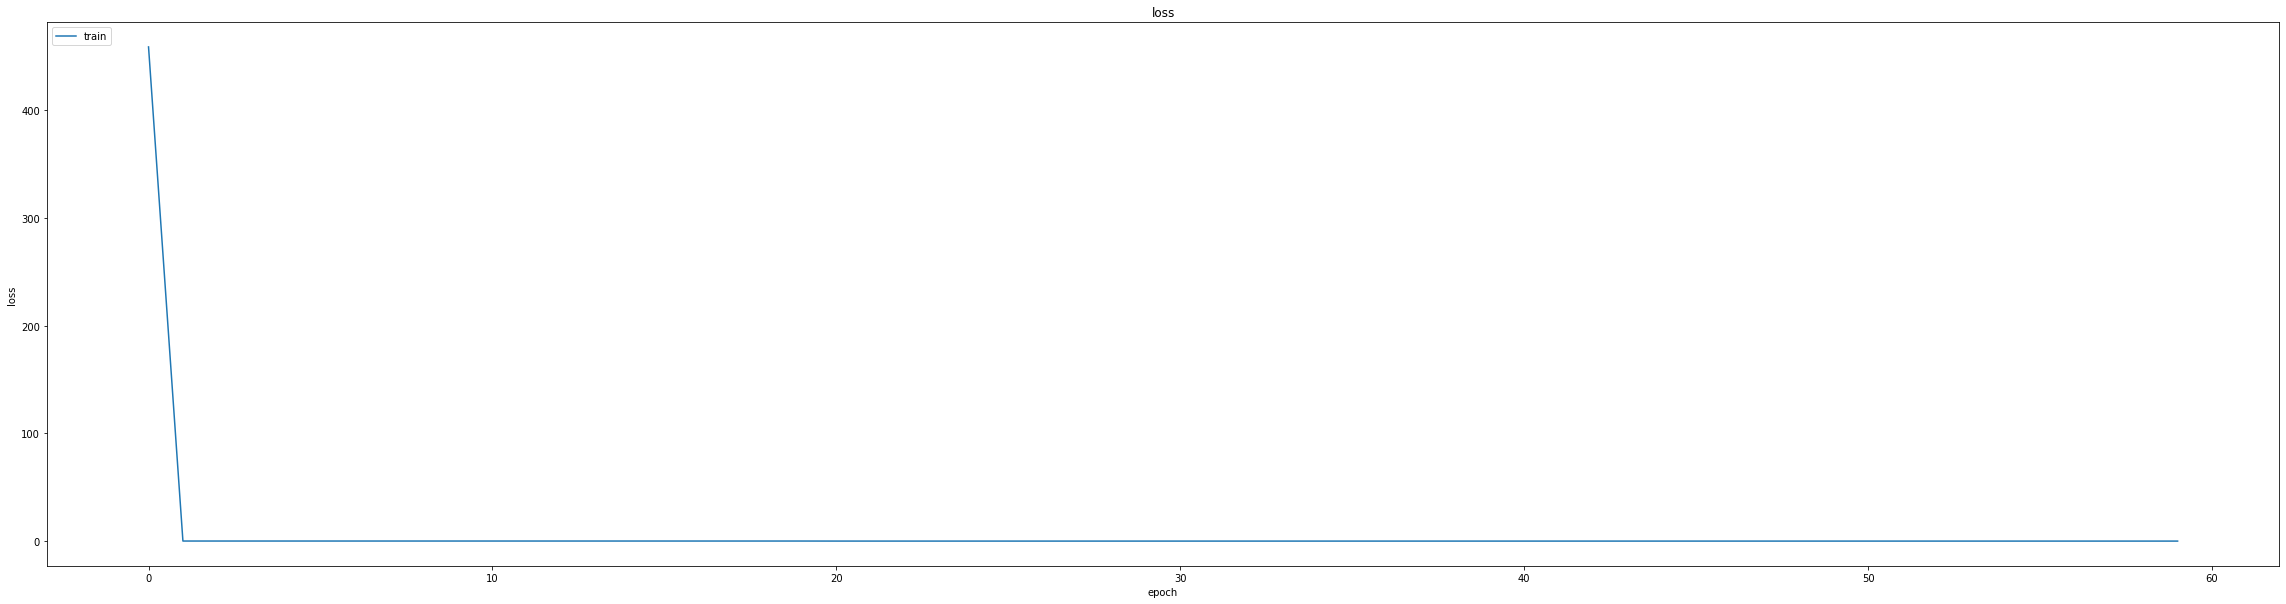

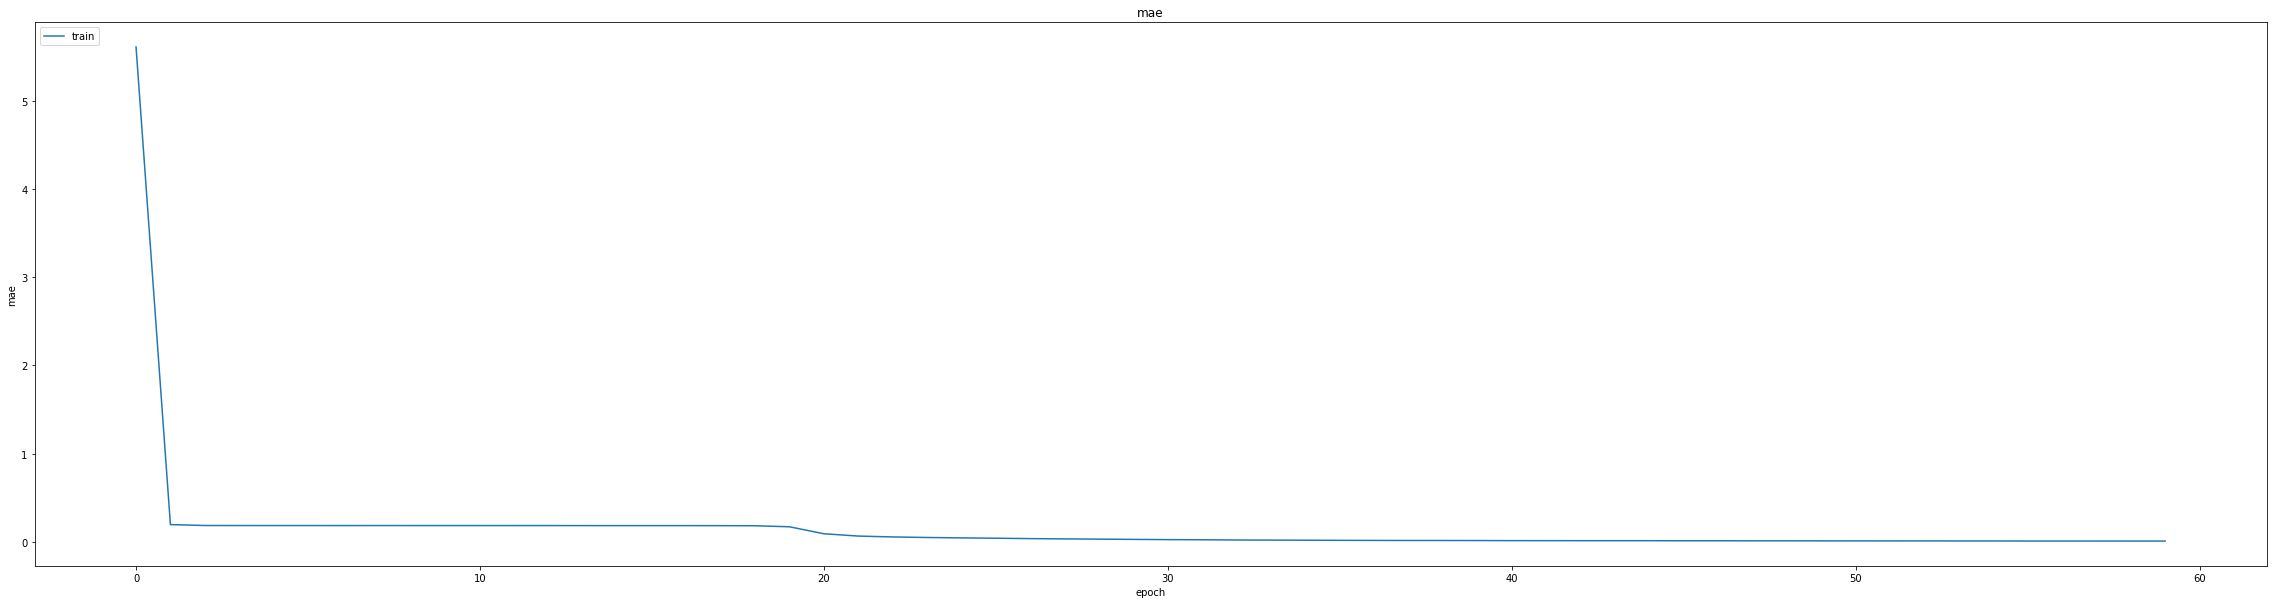

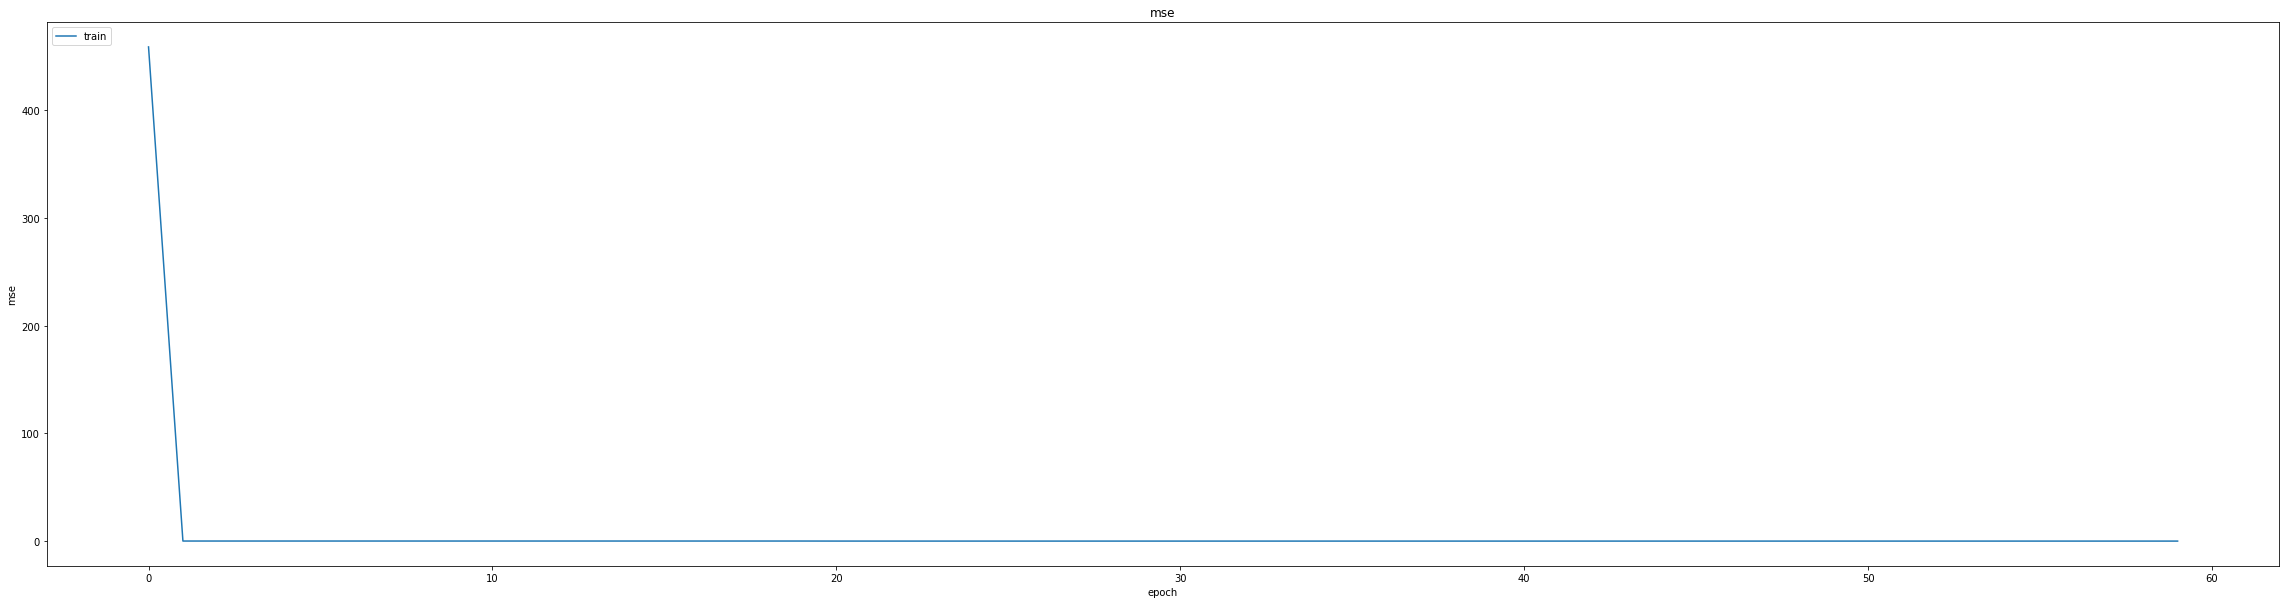

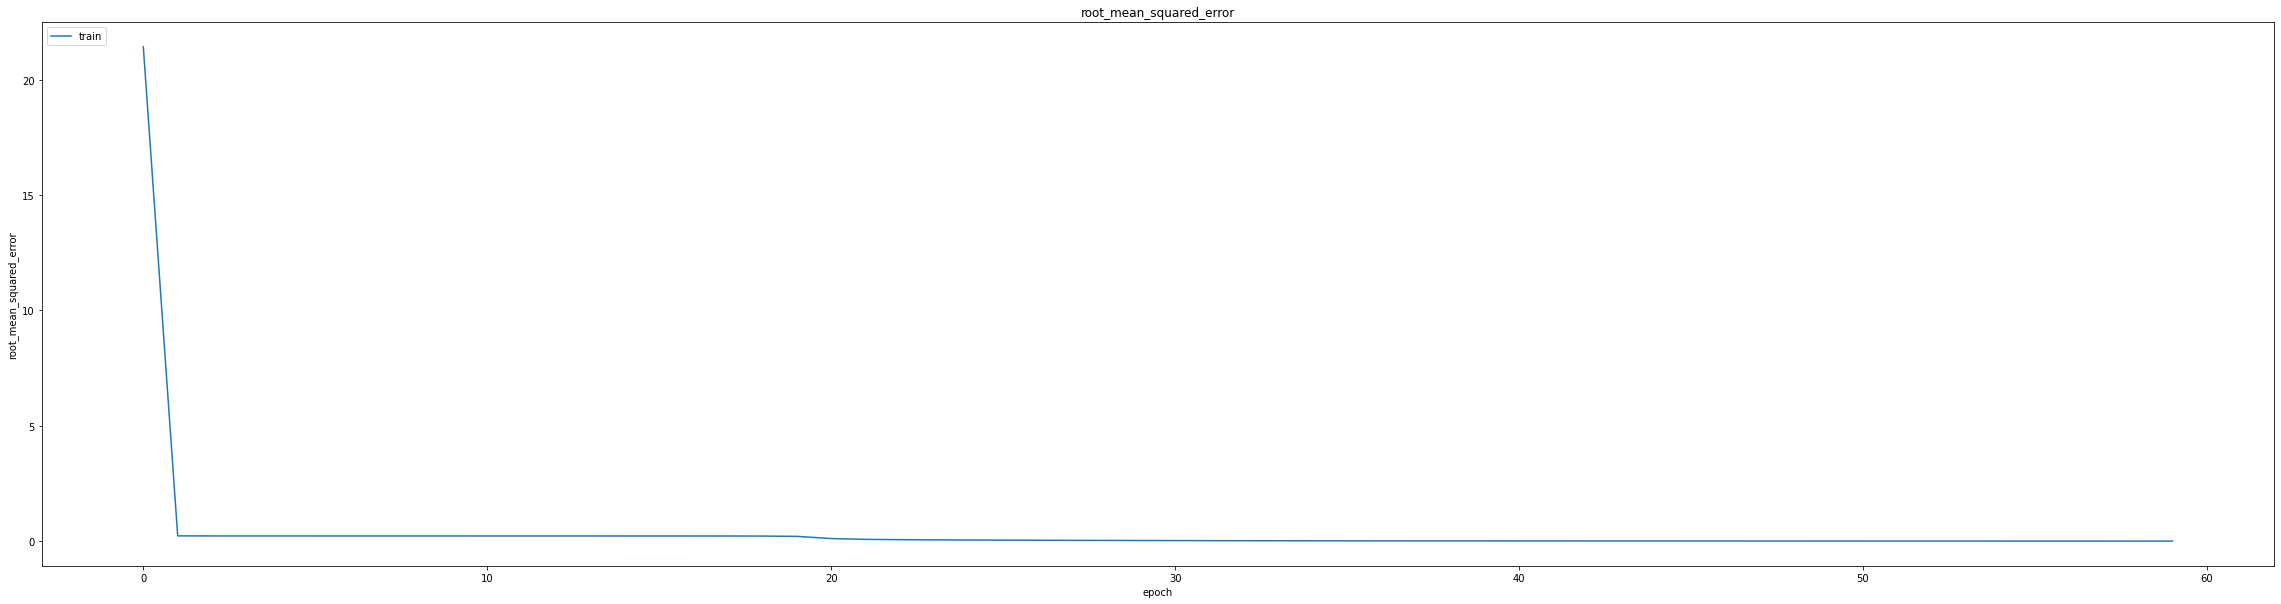

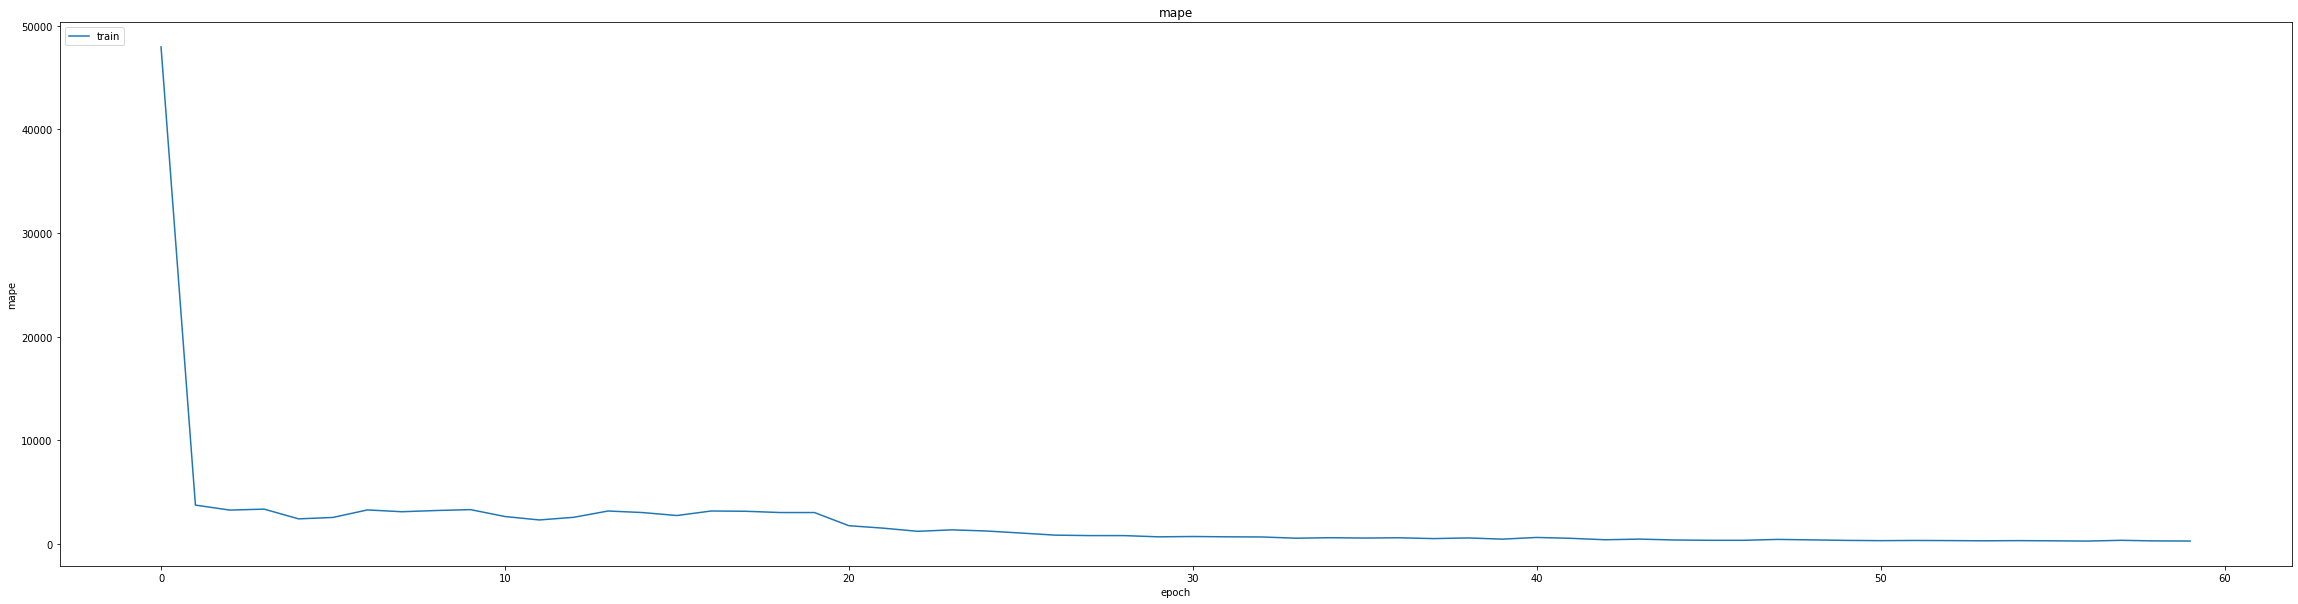

In [ ]:
thesis.SummarizeHistory(history)

In [ ]:
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
#print(min(histroy.history['val_mape']))
r2_scr = thesis.R_Squared_Score(model, x_val, y_val)
print(r2_scr)

0.008809788152575493
0.012783963233232498
1042/1042 [==============================] - 5s 4ms/step
0.9954703420173467


In [ ]:
model.load_weights("/content/drive/MyDrive/modelweights/CHF_USD_5min_LSTM(70-30)")
early_stopping = EarlyStopping(monitor='val_mse', patience=15)

In [ ]:

from keras.callbacks import LearningRateScheduler
import keras.backend as K

def scheduler(epoch):
    if epoch%2==0 and epoch!=0:
        lr = K.get_value(model.optimizer.lr)
        K.set_value(model.optimizer.lr, lr*.9)
        print("lr changed to {}".format(lr*.9))
    return K.get_value(model.optimizer.lr)
lr_decay = LearningRateScheduler(scheduler)

callbacks_list = [checkpoint, lr_decay, early_stopping]

Epochs=int(Epochs/3)
Batch_size=385
history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/20
405/405 [==============================] - ETA: 0s - loss: 8.0239e-04 - mae: 0.0132 - mse: 8.0239e-04 - root_mean_squared_error: 0.0283 - mape: 351.5266
Epoch 1: val_mse did not improve from 0.00016
405/405 [==============================] - 11s 18ms/step - loss: 8.0239e-04 - mae: 0.0132 - mse: 8.0239e-04 - root_mean_squared_error: 0.0283 - mape: 351.5266 - val_loss: 1.8397e-04 - val_mae: 0.0099 - val_mse: 1.8397e-04 - val_root_mean_squared_error: 0.0136 - val_mape: 1330.1831 - lr: 0.0010
Epoch 2/20
402/405 [============================>.] - ETA: 0s - loss: 9.0232e-05 - mae: 0.0071 - mse: 9.0232e-05 - root_mean_squared_error: 0.0095 - mape: 391.5892
Epoch 2: val_mse did not improve from 0.00016
405/405 [==============================] - 6s 15ms/step - loss: 9.0237e-05 - mae: 0.0072 - mse: 9.0237e-05 - root_mean_squared_error: 0.0095 - mape: 389.4109 - val_loss: 1.6367e-04 - val_mae: 0.0093 - val_mse: 1.6367e-04 - val_root_mean_squared_error: 0.0128 - val_mape: 1012.8631 - lr

405/405 [==============================] - 18s 45ms/step - loss: 8.5540e-05 - mae: 0.0070 - mse: 8.5540e-05 - root_mean_squared_error: 0.0092 - mape: 167.9476 - val_loss: 1.3361e-04 - val_mae: 0.0085 - val_mse: 1.3361e-04 - val_root_mean_squared_error: 0.0116 - val_mape: 787.0103 - lr: 8.1000e-04
Epoch 6/20
402/405 [============================>.] - ETA: 0s - loss: 8.3298e-05 - mae: 0.0070 - mse: 8.3298e-05 - root_mean_squared_error: 0.0091 - mape: 173.8325
Epoch 6: val_mse did not improve from 0.00013
405/405 [==============================] - 6s 16ms/step - loss: 8.3229e-05 - mae: 0.0070 - mse: 8.3229e-05 - root_mean_squared_error: 0.0091 - mape: 172.8687 - val_loss: 1.5370e-04 - val_mae: 0.0094 - val_mse: 1.5370e-04 - val_root_mean_squared_error: 0.0124 - val_mape: 746.4775 - lr: 8.1000e-04
lr changed to 0.0007290000503417104
Epoch 7/20
403/405 [============================>.] - ETA: 0s - loss: 7.6944e-05 - mae: 0.0067 - mse: 7.6944e-05 - root_mean_squared_error: 0.0088 - mape: 155.

405/405 [==============================] - 17s 43ms/step - loss: 7.7057e-05 - mae: 0.0067 - mse: 7.7057e-05 - root_mean_squared_error: 0.0088 - mape: 155.1679 - val_loss: 1.2305e-04 - val_mae: 0.0081 - val_mse: 1.2305e-04 - val_root_mean_squared_error: 0.0111 - val_mape: 765.3670 - lr: 7.2900e-04
Epoch 8/20
403/405 [============================>.] - ETA: 0s - loss: 7.2121e-05 - mae: 0.0065 - mse: 7.2121e-05 - root_mean_squared_error: 0.0085 - mape: 191.8657
Epoch 8: val_mse did not improve from 0.00012
405/405 [==============================] - 6s 15ms/step - loss: 7.2365e-05 - mae: 0.0065 - mse: 7.2365e-05 - root_mean_squared_error: 0.0085 - mape: 191.2744 - val_loss: 1.3801e-04 - val_mae: 0.0090 - val_mse: 1.3801e-04 - val_root_mean_squared_error: 0.0117 - val_mape: 771.5177 - lr: 7.2900e-04
lr changed to 0.0006561000715009868
Epoch 9/20
402/405 [============================>.] - ETA: 0s - loss: 6.3866e-05 - mae: 0.0061 - mse: 6.3866e-05 - root_mean_squared_error: 0.0080 - mape: 181.

405/405 [==============================] - 17s 43ms/step - loss: 6.5851e-05 - mae: 0.0062 - mse: 6.5851e-05 - root_mean_squared_error: 0.0081 - mape: 144.5691 - val_loss: 1.1451e-04 - val_mae: 0.0086 - val_mse: 1.1451e-04 - val_root_mean_squared_error: 0.0107 - val_mape: 747.1180 - lr: 6.5610e-04
lr changed to 0.0005904900433961303
Epoch 11/20
404/405 [============================>.] - ETA: 0s - loss: 5.1286e-05 - mae: 0.0055 - mse: 5.1286e-05 - root_mean_squared_error: 0.0072 - mape: 150.1443
Epoch 11: val_mse did not improve from 0.00011
405/405 [==============================] - 6s 16ms/step - loss: 5.1326e-05 - mae: 0.0055 - mse: 5.1326e-05 - root_mean_squared_error: 0.0072 - mape: 150.0469 - val_loss: 2.6716e-04 - val_mae: 0.0148 - val_mse: 2.6716e-04 - val_root_mean_squared_error: 0.0163 - val_mape: 742.2012 - lr: 5.9049e-04
Epoch 12/20
403/405 [============================>.] - ETA: 0s - loss: 4.7937e-05 - mae: 0.0053 - mse: 4.7937e-05 - root_mean_squared_error: 0.0069 - mape: 1

405/405 [==============================] - 17s 43ms/step - loss: 3.5504e-05 - mae: 0.0045 - mse: 3.5504e-05 - root_mean_squared_error: 0.0060 - mape: 141.2597 - val_loss: 1.0721e-04 - val_mae: 0.0083 - val_mse: 1.0721e-04 - val_root_mean_squared_error: 0.0104 - val_mape: 900.0605 - lr: 4.7830e-04
Epoch 16/20
404/405 [============================>.] - ETA: 0s - loss: 3.3910e-05 - mae: 0.0044 - mse: 3.3910e-05 - root_mean_squared_error: 0.0058 - mape: 142.9279
Epoch 16: val_mse did not improve from 0.00011
405/405 [==============================] - 6s 15ms/step - loss: 3.3909e-05 - mae: 0.0044 - mse: 3.3908e-05 - root_mean_squared_error: 0.0058 - mape: 142.8341 - val_loss: 1.5800e-04 - val_mae: 0.0110 - val_mse: 1.5800e-04 - val_root_mean_squared_error: 0.0126 - val_mape: 829.5405 - lr: 4.7830e-04
lr changed to 0.0004304672533180565
Epoch 17/20
404/405 [============================>.] - ETA: 0s - loss: 3.0504e-05 - mae: 0.0042 - mse: 3.0504e-05 - root_mean_squared_error: 0.0055 - mape: 1

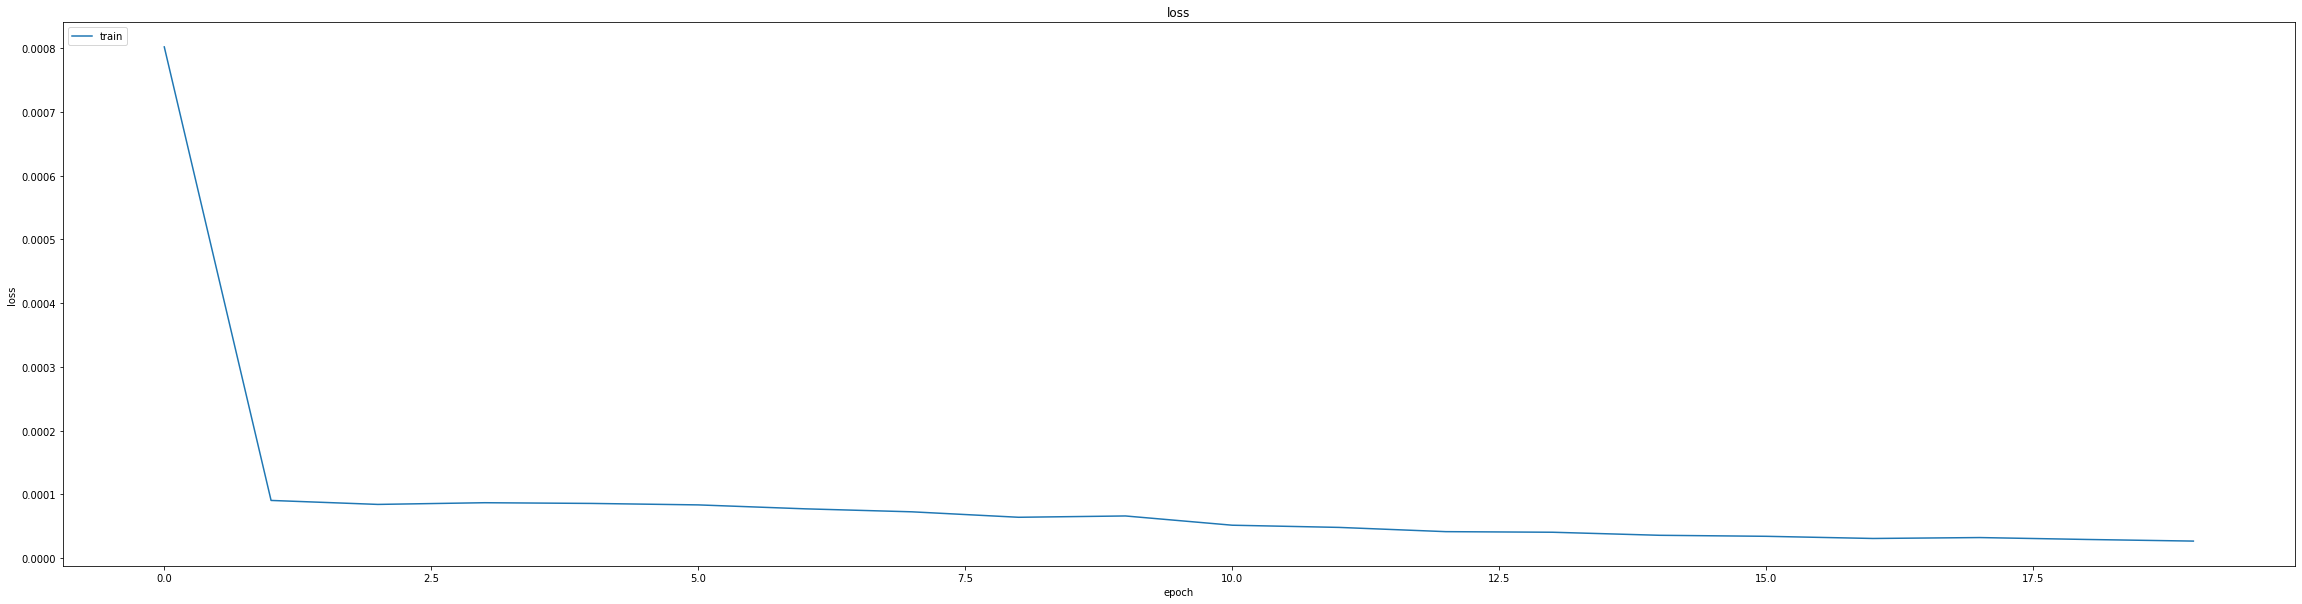

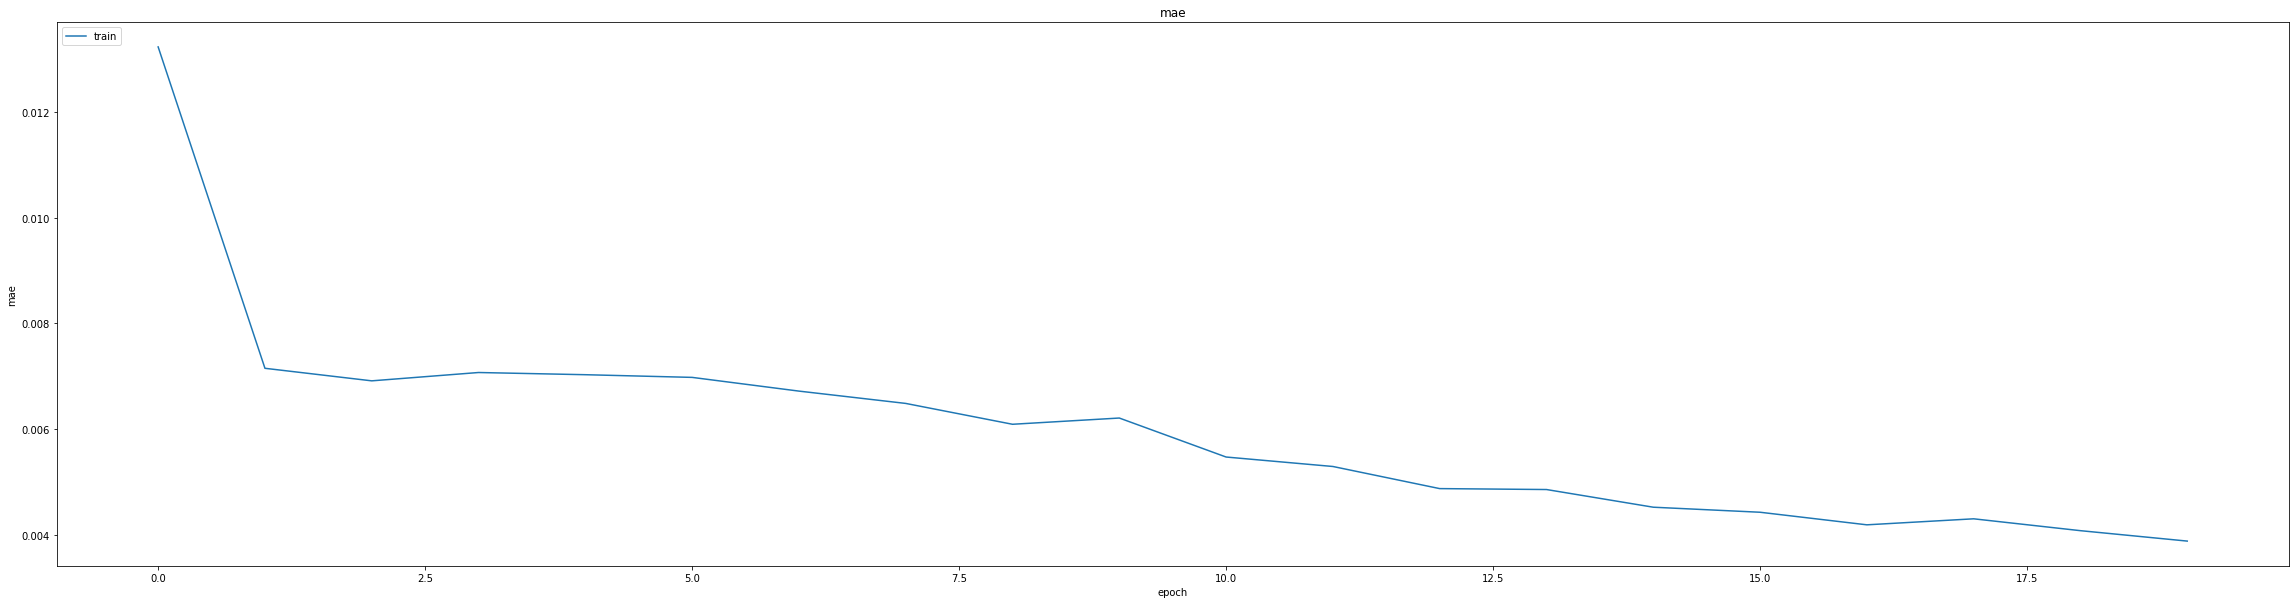

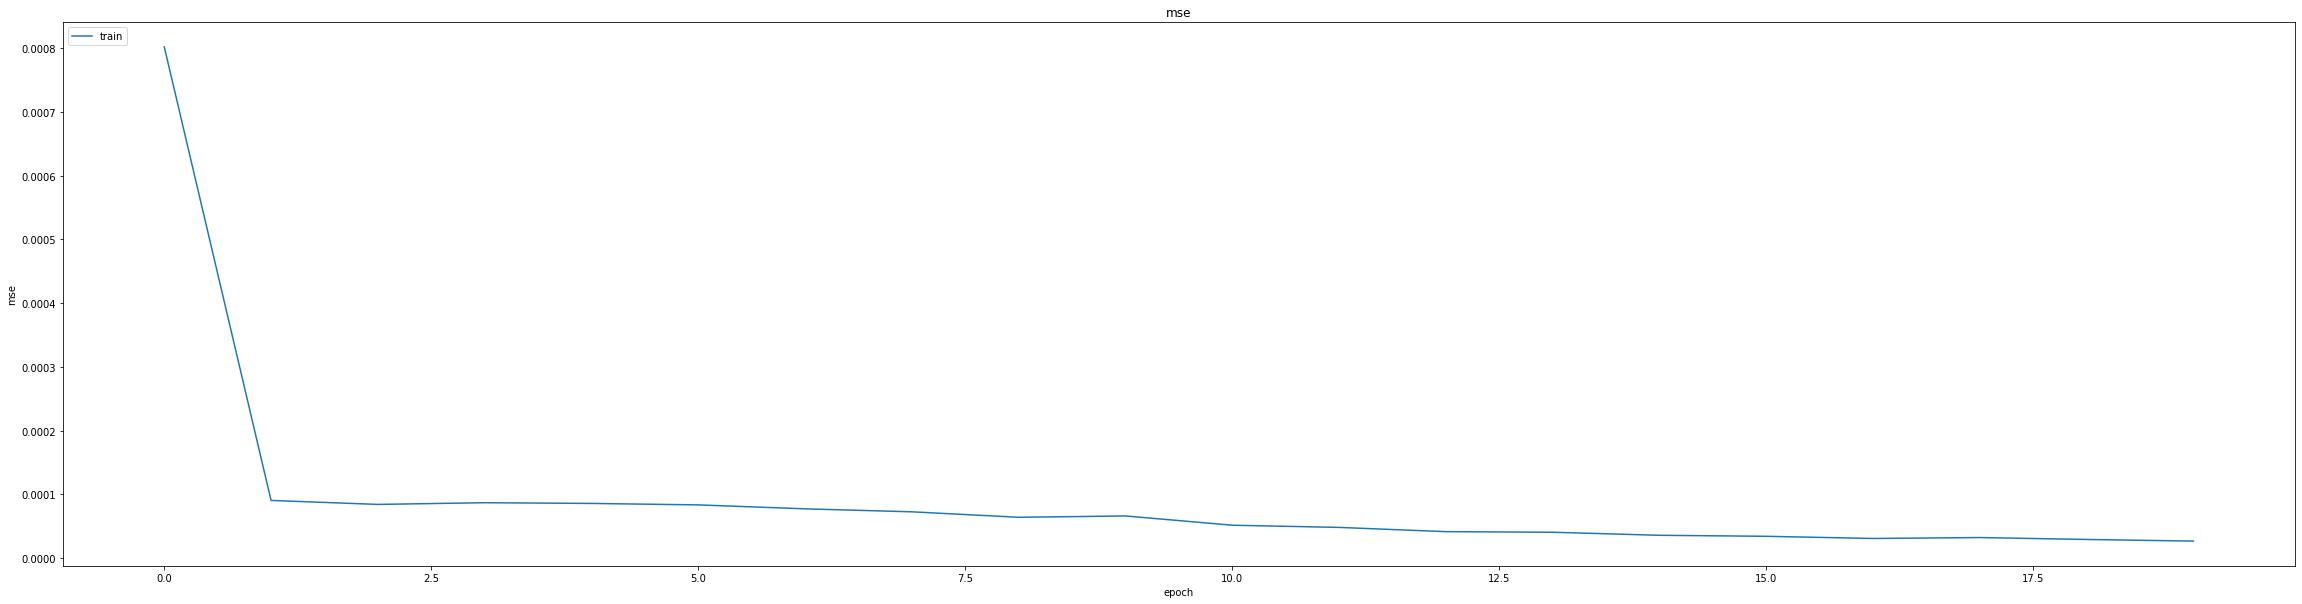

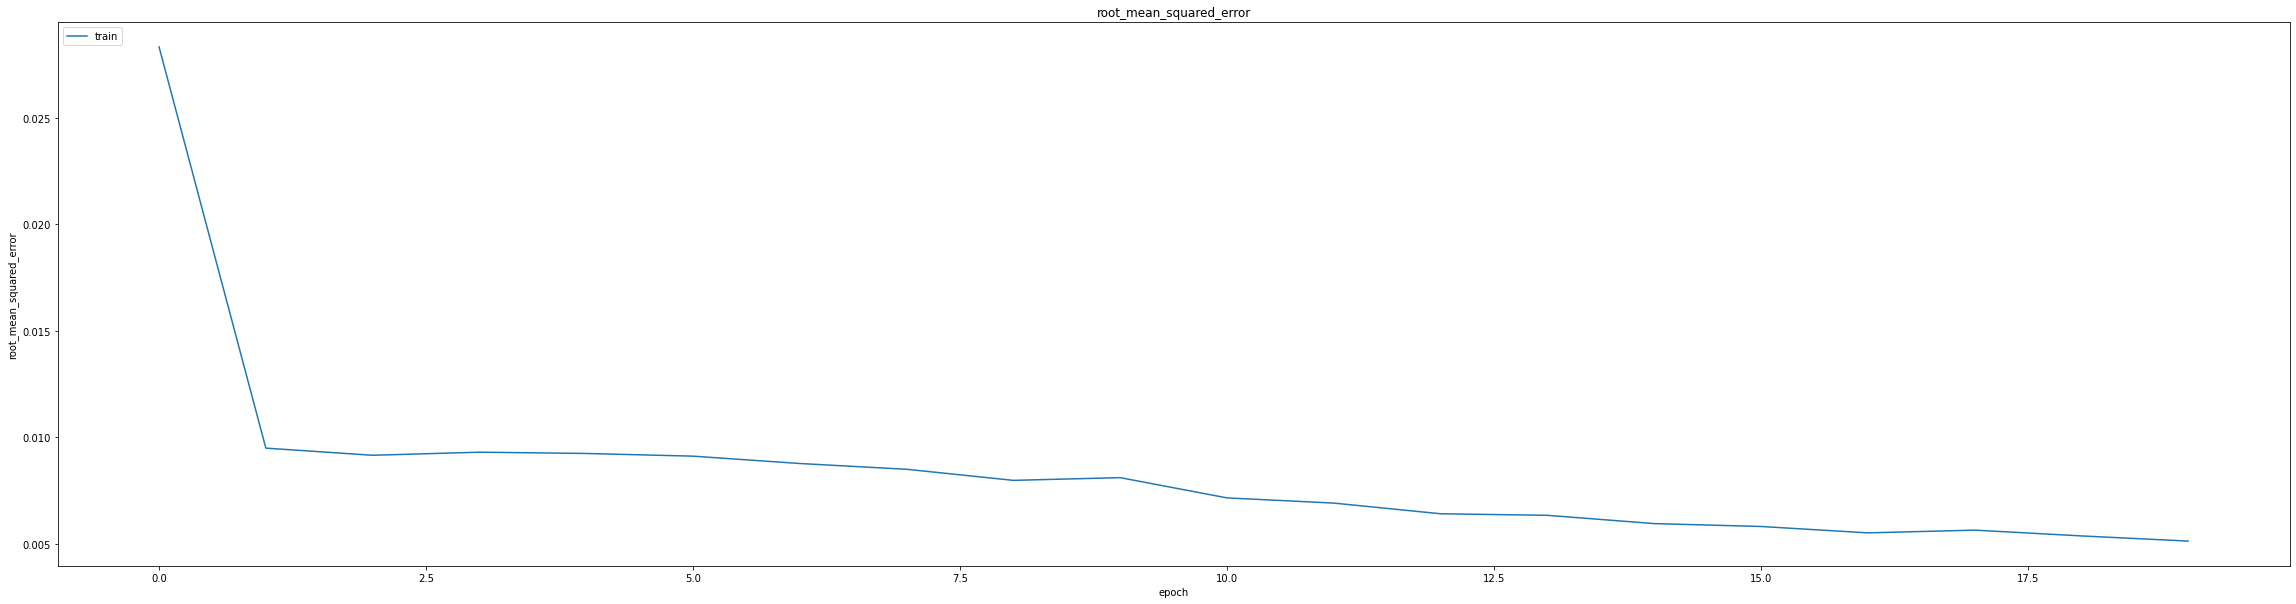

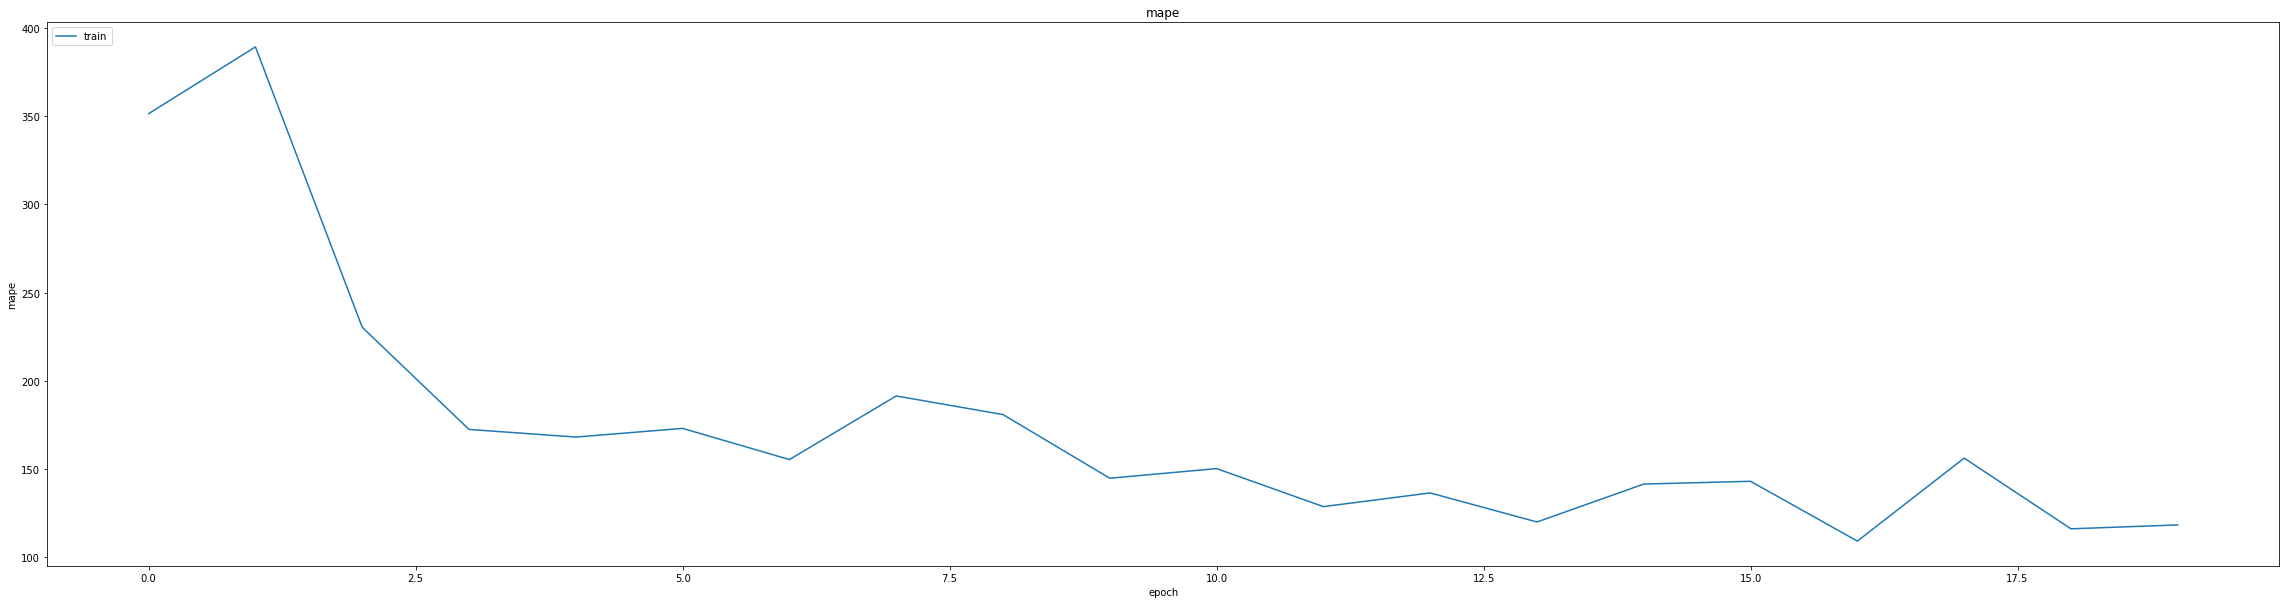

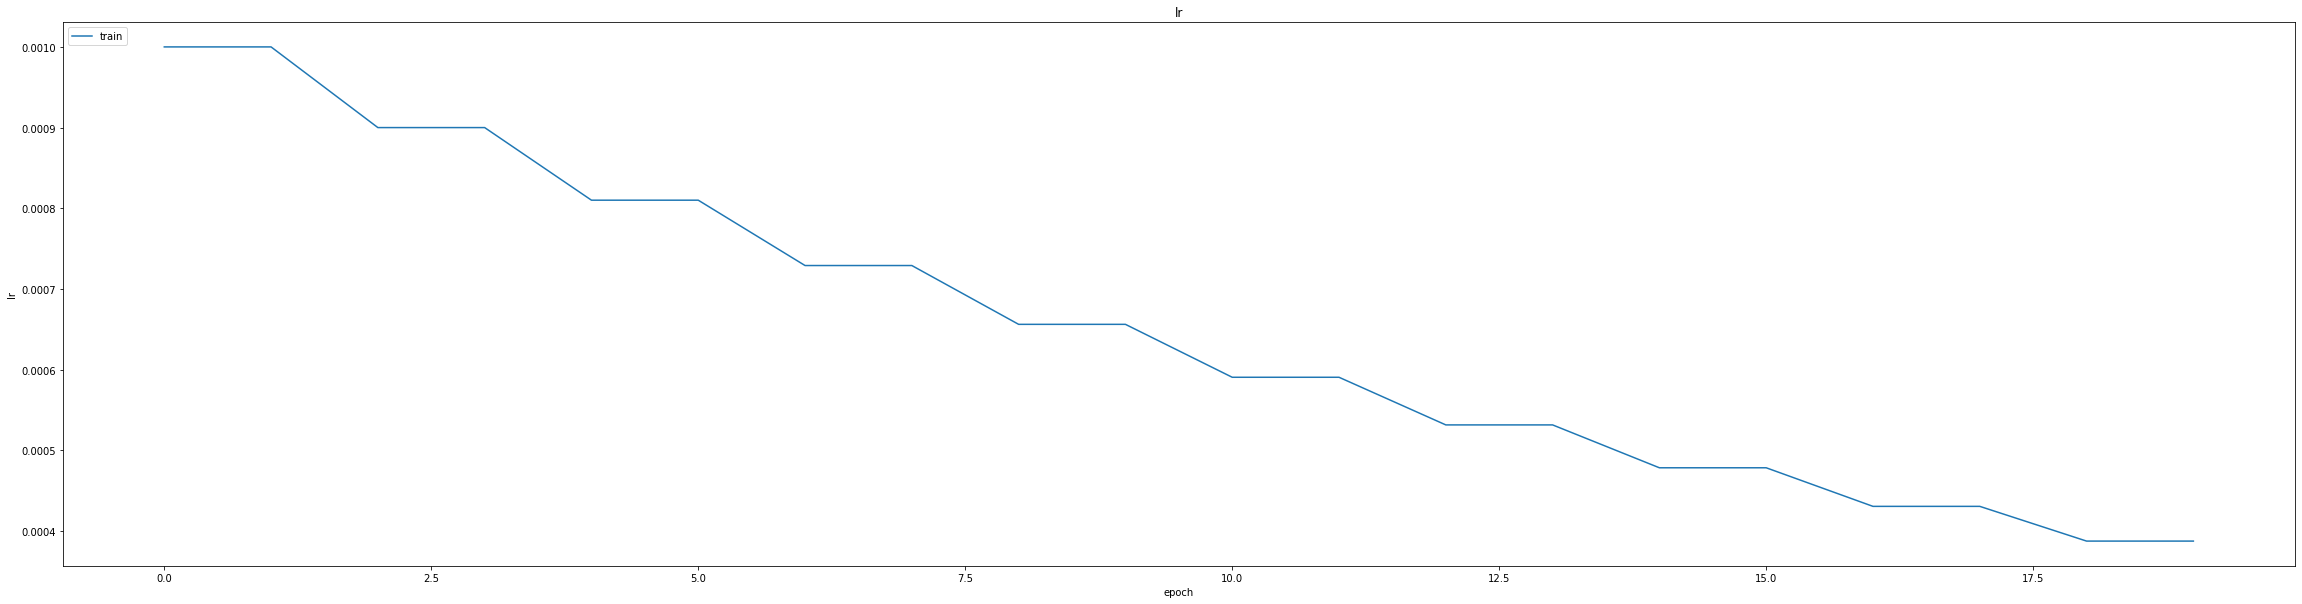

In [ ]:
thesis.SummarizeHistory(history)

In [ ]:
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
#print(min(histroy.history['val_mape']))
r2_scr = thesis.R_Squared_Score(model, x_val, y_val)
print(r2_scr)

0.008096704259514809
0.010354152880609035
1042/1042 [==============================] - 5s 4ms/step
0.9962358166120211


1042/1042 [==============================] - 4s 4ms/step


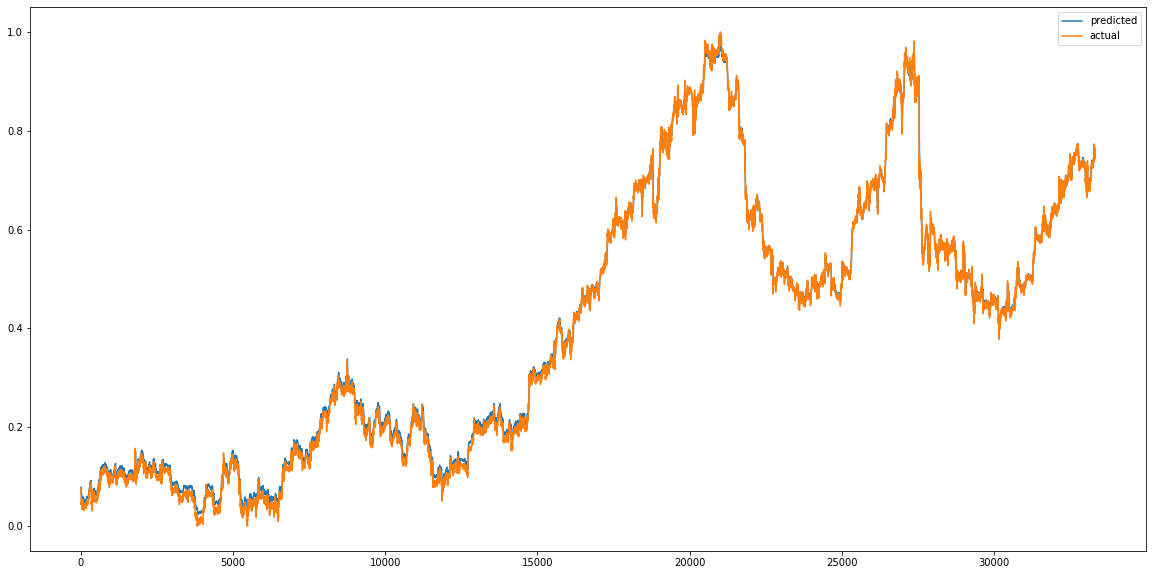

In [ ]:
model.load_weights("/content/drive/MyDrive/modelweights/CHF_USD_5min_LSTM(70-30)")
val_predictions=thesis.CreatPrediction(model,x_val, y_val)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


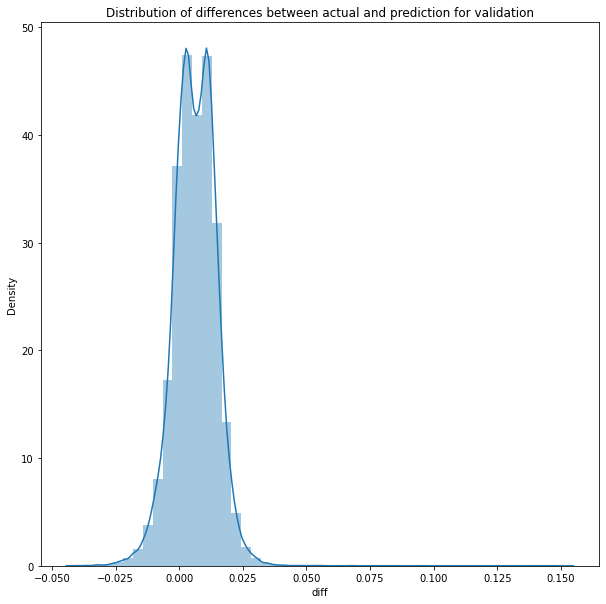

In [ ]:
val_predictions['diff'] = val_predictions['predicted'] - val_predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(val_predictions['diff']);
plt.title('Distribution of differences between actual and prediction for validation')
plt.show()

1042/1042 [==============================] - 4s 4ms/step


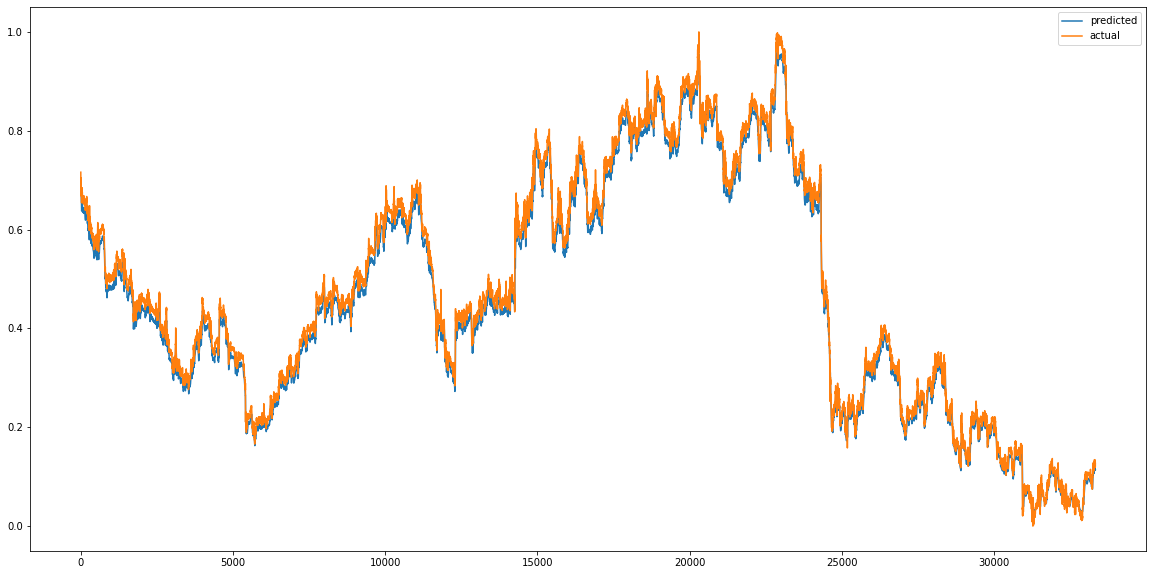

In [ ]:
predictions=thesis.CreatPrediction(model,x_test, y_test)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


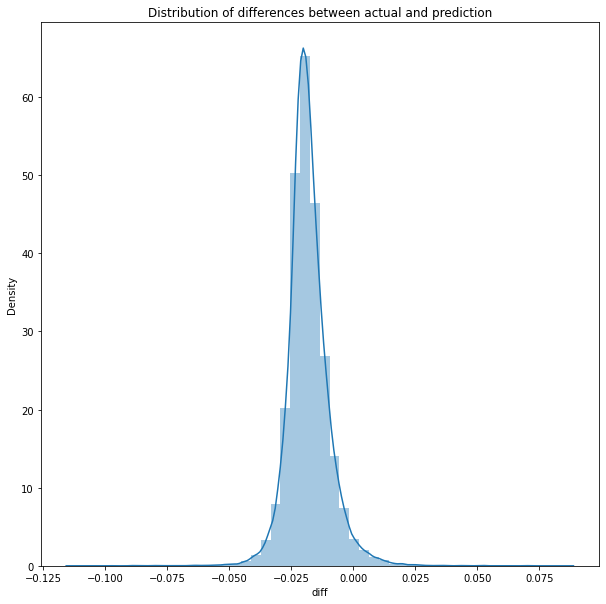

In [ ]:
predictions['diff'] = predictions['predicted'] - predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(predictions['diff']);
plt.title('Distribution of differences between actual and prediction')
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
print("MSE : ", mean_squared_error(predictions['predicted'].values, predictions['actual'].values))

from math import sqrt
print("RMSE : ", sqrt(mean_squared_error(predictions['predicted'].values, predictions['actual'].values)))

print("MAE : ", mean_absolute_error(predictions['predicted'].values, predictions['actual'].values))

test_r2_score=thesis.R_Squared_Score(model, x_test, y_test)
print('R2_Score  :', test_r2_score)
predictions['diff'].describe()

MSE :  0.0003995570121159375
RMSE :  0.01998892223497649
MAE :  0.018554060428242078
1042/1042 [==============================] - 4s 4ms/step
R2_Score  : 0.9931413345597188


count    33333.000000
mean        -0.018137
std          0.008402
min         -0.112508
25%         -0.022726
50%         -0.018893
75%         -0.014180
max          0.085568
Name: diff, dtype: float64

**GRU_MODEL**



In [ ]:
model= thesis.GRU_Model(x_train)
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_4 (GRU)                 (None, 24, 256)           207360    
                                                                 
 gru_5 (GRU)                 (None, 24, 64)            61824     
                                                                 
 dropout_8 (Dropout)         (None, 24, 64)            0         
                                                                 
 gru_6 (GRU)                 (None, 16)                3936      
                                                                 
 dense_24 (Dense)            (None, 32)                544       
                                                                 
 dense_25 (Dense)            (None, 16)                528       
                                                                 
 dense_26 (Dense)            (None, 1)                

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

# Set the metric you want to monitor, the threshold, and the patience value
early_stopping = EarlyStopping(monitor='val_mse', patience=30)


In [ ]:
from keras.callbacks import ModelCheckpoint


checkpoint = ModelCheckpoint("/content/drive/MyDrive/modelweights/CHF_USD_5min_GRU(70-30)", monitor='val_mse', verbose=1, save_best_only=True, mode='min')

# Fit
callbacks_list = [checkpoint, early_stopping ]

In [ ]:
Epochs=60
Batch_size=385
history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/60
405/405 [==============================] - ETA: 0s - loss: 305.8286 - mae: 4.8864 - mse: 305.8287 - root_mean_squared_error: 17.4880 - mape: 20030.1152
Epoch 1: val_mse improved from inf to 0.39846, saving model to /content/drive/MyDrive/modelweights/CHF_USD_5min_GRU(70-30)


405/405 [==============================] - 21s 40ms/step - loss: 305.8286 - mae: 4.8864 - mse: 305.8287 - root_mean_squared_error: 17.4880 - mape: 20030.1152 - val_loss: 0.3985 - val_mae: 0.5692 - val_mse: 0.3985 - val_root_mean_squared_error: 0.6312 - val_mape: 29675.2324
Epoch 2/60
404/405 [============================>.] - ETA: 0s - loss: 0.1596 - mae: 0.3485 - mse: 0.1596 - root_mean_squared_error: 0.3995 - mape: 5895.2422
Epoch 2: val_mse improved from 0.39846 to 0.10706, saving model to /content/drive/MyDrive/modelweights/CHF_USD_5min_GRU(70-30)


405/405 [==============================] - 15s 37ms/step - loss: 0.1595 - mae: 0.3485 - mse: 0.1595 - root_mean_squared_error: 0.3994 - mape: 5891.4160 - val_loss: 0.1071 - val_mae: 0.2754 - val_mse: 0.1071 - val_root_mean_squared_error: 0.3272 - val_mape: 17757.4688
Epoch 3/60
401/405 [============================>.] - ETA: 0s - loss: 0.0618 - mae: 0.2197 - mse: 0.0618 - root_mean_squared_error: 0.2485 - mape: 3312.1733
Epoch 3: val_mse improved from 0.10706 to 0.08034, saving model to /content/drive/MyDrive/modelweights/CHF_USD_5min_GRU(70-30)


405/405 [==============================] - 16s 39ms/step - loss: 0.0617 - mae: 0.2196 - mse: 0.0617 - root_mean_squared_error: 0.2484 - mape: 3285.9888 - val_loss: 0.0803 - val_mae: 0.2432 - val_mse: 0.0803 - val_root_mean_squared_error: 0.2834 - val_mape: 14577.3486
Epoch 4/60
402/405 [============================>.] - ETA: 0s - loss: 0.0526 - mae: 0.1917 - mse: 0.0526 - root_mean_squared_error: 0.2293 - mape: 3061.1926
Epoch 4: val_mse improved from 0.08034 to 0.07618, saving model to /content/drive/MyDrive/modelweights/CHF_USD_5min_GRU(70-30)


405/405 [==============================] - 15s 38ms/step - loss: 0.0525 - mae: 0.1916 - mse: 0.0525 - root_mean_squared_error: 0.2292 - mape: 3044.4053 - val_loss: 0.0762 - val_mae: 0.2406 - val_mse: 0.0762 - val_root_mean_squared_error: 0.2760 - val_mape: 13498.9131
Epoch 5/60
404/405 [============================>.] - ETA: 0s - loss: 0.0516 - mae: 0.1840 - mse: 0.0516 - root_mean_squared_error: 0.2271 - mape: 2984.9998
Epoch 5: val_mse improved from 0.07618 to 0.07534, saving model to /content/drive/MyDrive/modelweights/CHF_USD_5min_GRU(70-30)


405/405 [==============================] - 15s 38ms/step - loss: 0.0516 - mae: 0.1841 - mse: 0.0516 - root_mean_squared_error: 0.2271 - mape: 2983.0867 - val_loss: 0.0753 - val_mae: 0.2405 - val_mse: 0.0753 - val_root_mean_squared_error: 0.2745 - val_mape: 13138.1875
Epoch 6/60
404/405 [============================>.] - ETA: 0s - loss: 0.0515 - mae: 0.1820 - mse: 0.0515 - root_mean_squared_error: 0.2270 - mape: 3021.1726
Epoch 6: val_mse improved from 0.07534 to 0.07518, saving model to /content/drive/MyDrive/modelweights/CHF_USD_5min_GRU(70-30)


405/405 [==============================] - 15s 38ms/step - loss: 0.0515 - mae: 0.1820 - mse: 0.0515 - root_mean_squared_error: 0.2270 - mape: 3019.2249 - val_loss: 0.0752 - val_mae: 0.2405 - val_mse: 0.0752 - val_root_mean_squared_error: 0.2742 - val_mape: 13052.2031
Epoch 7/60
404/405 [============================>.] - ETA: 0s - loss: 0.0515 - mae: 0.1815 - mse: 0.0515 - root_mean_squared_error: 0.2269 - mape: 2944.8115
Epoch 7: val_mse improved from 0.07518 to 0.07518, saving model to /content/drive/MyDrive/modelweights/CHF_USD_5min_GRU(70-30)


405/405 [==============================] - 15s 38ms/step - loss: 0.0515 - mae: 0.1815 - mse: 0.0515 - root_mean_squared_error: 0.2269 - mape: 2942.9158 - val_loss: 0.0752 - val_mae: 0.2405 - val_mse: 0.0752 - val_root_mean_squared_error: 0.2742 - val_mape: 13049.6641
Epoch 8/60
401/405 [============================>.] - ETA: 0s - loss: 0.0515 - mae: 0.1816 - mse: 0.0515 - root_mean_squared_error: 0.2269 - mape: 2817.8462
Epoch 8: val_mse improved from 0.07518 to 0.07513, saving model to /content/drive/MyDrive/modelweights/CHF_USD_5min_GRU(70-30)


405/405 [==============================] - 16s 38ms/step - loss: 0.0515 - mae: 0.1816 - mse: 0.0515 - root_mean_squared_error: 0.2269 - mape: 2795.6289 - val_loss: 0.0751 - val_mae: 0.2405 - val_mse: 0.0751 - val_root_mean_squared_error: 0.2741 - val_mape: 13022.8057
Epoch 9/60
404/405 [============================>.] - ETA: 0s - loss: 0.0515 - mae: 0.1815 - mse: 0.0515 - root_mean_squared_error: 0.2268 - mape: 2986.4204
Epoch 9: val_mse did not improve from 0.07513
405/405 [==============================] - 6s 14ms/step - loss: 0.0515 - mae: 0.1815 - mse: 0.0515 - root_mean_squared_error: 0.2268 - mape: 2984.4893 - val_loss: 0.0751 - val_mae: 0.2405 - val_mse: 0.0751 - val_root_mean_squared_error: 0.2741 - val_mape: 13031.3594
Epoch 10/60
402/405 [============================>.] - ETA: 0s - loss: 0.0515 - mae: 0.1815 - mse: 0.0515 - root_mean_squared_error: 0.2268 - mape: 2881.7358
Epoch 10: val_mse did not improve from 0.07513
405/405 [==============================] - 6s 14ms/step -

405/405 [==============================] - 15s 37ms/step - loss: 0.0515 - mae: 0.1816 - mse: 0.0515 - root_mean_squared_error: 0.2269 - mape: 2854.8105 - val_loss: 0.0751 - val_mae: 0.2405 - val_mse: 0.0751 - val_root_mean_squared_error: 0.2740 - val_mape: 13009.4883
Epoch 13/60
401/405 [============================>.] - ETA: 0s - loss: 0.0514 - mae: 0.1813 - mse: 0.0514 - root_mean_squared_error: 0.2268 - mape: 2926.8337
Epoch 13: val_mse did not improve from 0.07509
405/405 [==============================] - 6s 14ms/step - loss: 0.0514 - mae: 0.1814 - mse: 0.0514 - root_mean_squared_error: 0.2268 - mape: 2903.7781 - val_loss: 0.0752 - val_mae: 0.2405 - val_mse: 0.0752 - val_root_mean_squared_error: 0.2742 - val_mape: 13075.3477
Epoch 14/60
402/405 [============================>.] - ETA: 0s - loss: 0.0515 - mae: 0.1815 - mse: 0.0515 - root_mean_squared_error: 0.2268 - mape: 2879.2798
Epoch 14: val_mse did not improve from 0.07509
405/405 [==============================] - 6s 14ms/step

405/405 [==============================] - 16s 39ms/step - loss: 0.0514 - mae: 0.1814 - mse: 0.0514 - root_mean_squared_error: 0.2267 - mape: 2865.2400 - val_loss: 0.0750 - val_mae: 0.2405 - val_mse: 0.0750 - val_root_mean_squared_error: 0.2739 - val_mape: 12984.8613
Epoch 17/60
403/405 [============================>.] - ETA: 0s - loss: 0.0514 - mae: 0.1813 - mse: 0.0514 - root_mean_squared_error: 0.2267 - mape: 3003.0833
Epoch 17: val_mse did not improve from 0.07502
405/405 [==============================] - 6s 14ms/step - loss: 0.0514 - mae: 0.1814 - mse: 0.0514 - root_mean_squared_error: 0.2267 - mape: 2993.8879 - val_loss: 0.0751 - val_mae: 0.2404 - val_mse: 0.0751 - val_root_mean_squared_error: 0.2741 - val_mape: 13054.2236
Epoch 18/60
401/405 [============================>.] - ETA: 0s - loss: 0.0514 - mae: 0.1814 - mse: 0.0514 - root_mean_squared_error: 0.2267 - mape: 2975.9604
Epoch 18: val_mse did not improve from 0.07502
405/405 [==============================] - 6s 14ms/step

405/405 [==============================] - 16s 39ms/step - loss: 0.0504 - mae: 0.1803 - mse: 0.0504 - root_mean_squared_error: 0.2245 - mape: 2756.3972 - val_loss: 0.0661 - val_mae: 0.2231 - val_mse: 0.0661 - val_root_mean_squared_error: 0.2571 - val_mape: 12737.6367
Epoch 21/60
401/405 [============================>.] - ETA: 0s - loss: 0.0064 - mae: 0.0514 - mse: 0.0064 - root_mean_squared_error: 0.0800 - mape: 2230.0366
Epoch 21: val_mse improved from 0.06609 to 0.00451, saving model to /content/drive/MyDrive/modelweights/CHF_USD_5min_GRU(70-30)


405/405 [==============================] - 16s 39ms/step - loss: 0.0064 - mae: 0.0512 - mse: 0.0064 - root_mean_squared_error: 0.0797 - mape: 2212.1265 - val_loss: 0.0045 - val_mae: 0.0522 - val_mse: 0.0045 - val_root_mean_squared_error: 0.0672 - val_mape: 5657.5024
Epoch 22/60
401/405 [============================>.] - ETA: 0s - loss: 0.0014 - mae: 0.0266 - mse: 0.0014 - root_mean_squared_error: 0.0374 - mape: 1282.4052
Epoch 22: val_mse improved from 0.00451 to 0.00282, saving model to /content/drive/MyDrive/modelweights/CHF_USD_5min_GRU(70-30)


405/405 [==============================] - 16s 39ms/step - loss: 0.0014 - mae: 0.0266 - mse: 0.0014 - root_mean_squared_error: 0.0374 - mape: 1272.1549 - val_loss: 0.0028 - val_mae: 0.0416 - val_mse: 0.0028 - val_root_mean_squared_error: 0.0531 - val_mape: 4763.1587
Epoch 23/60
401/405 [============================>.] - ETA: 0s - loss: 9.3489e-04 - mae: 0.0222 - mse: 9.3489e-04 - root_mean_squared_error: 0.0306 - mape: 974.6012
Epoch 23: val_mse improved from 0.00282 to 0.00221, saving model to /content/drive/MyDrive/modelweights/CHF_USD_5min_GRU(70-30)


405/405 [==============================] - 16s 38ms/step - loss: 9.3384e-04 - mae: 0.0222 - mse: 9.3384e-04 - root_mean_squared_error: 0.0306 - mape: 966.8002 - val_loss: 0.0022 - val_mae: 0.0377 - val_mse: 0.0022 - val_root_mean_squared_error: 0.0470 - val_mape: 4229.9453
Epoch 24/60
404/405 [============================>.] - ETA: 0s - loss: 7.2866e-04 - mae: 0.0198 - mse: 7.2866e-04 - root_mean_squared_error: 0.0270 - mape: 882.7350
Epoch 24: val_mse improved from 0.00221 to 0.00134, saving model to /content/drive/MyDrive/modelweights/CHF_USD_5min_GRU(70-30)


405/405 [==============================] - 16s 39ms/step - loss: 7.2862e-04 - mae: 0.0198 - mse: 7.2862e-04 - root_mean_squared_error: 0.0270 - mape: 882.1573 - val_loss: 0.0013 - val_mae: 0.0270 - val_mse: 0.0013 - val_root_mean_squared_error: 0.0366 - val_mape: 3884.1094
Epoch 25/60
404/405 [============================>.] - ETA: 0s - loss: 6.0450e-04 - mae: 0.0181 - mse: 6.0450e-04 - root_mean_squared_error: 0.0246 - mape: 825.3159
Epoch 25: val_mse improved from 0.00134 to 0.00132, saving model to /content/drive/MyDrive/modelweights/CHF_USD_5min_GRU(70-30)


405/405 [==============================] - 15s 38ms/step - loss: 6.0440e-04 - mae: 0.0181 - mse: 6.0440e-04 - root_mean_squared_error: 0.0246 - mape: 824.7748 - val_loss: 0.0013 - val_mae: 0.0285 - val_mse: 0.0013 - val_root_mean_squared_error: 0.0363 - val_mape: 3594.1799
Epoch 26/60
402/405 [============================>.] - ETA: 0s - loss: 4.9939e-04 - mae: 0.0165 - mse: 4.9939e-04 - root_mean_squared_error: 0.0223 - mape: 768.4735
Epoch 26: val_mse improved from 0.00132 to 0.00115, saving model to /content/drive/MyDrive/modelweights/CHF_USD_5min_GRU(70-30)


405/405 [==============================] - 16s 39ms/step - loss: 4.9904e-04 - mae: 0.0165 - mse: 4.9904e-04 - root_mean_squared_error: 0.0223 - mape: 764.2013 - val_loss: 0.0012 - val_mae: 0.0267 - val_mse: 0.0012 - val_root_mean_squared_error: 0.0339 - val_mape: 3320.6772
Epoch 27/60
404/405 [============================>.] - ETA: 0s - loss: 4.3591e-04 - mae: 0.0155 - mse: 4.3591e-04 - root_mean_squared_error: 0.0209 - mape: 687.8707
Epoch 27: val_mse improved from 0.00115 to 0.00111, saving model to /content/drive/MyDrive/modelweights/CHF_USD_5min_GRU(70-30)


405/405 [==============================] - 16s 39ms/step - loss: 4.3589e-04 - mae: 0.0155 - mse: 4.3589e-04 - root_mean_squared_error: 0.0209 - mape: 687.4211 - val_loss: 0.0011 - val_mae: 0.0265 - val_mse: 0.0011 - val_root_mean_squared_error: 0.0334 - val_mape: 3138.9551
Epoch 28/60
404/405 [============================>.] - ETA: 0s - loss: 3.8828e-04 - mae: 0.0147 - mse: 3.8828e-04 - root_mean_squared_error: 0.0197 - mape: 666.7335
Epoch 28: val_mse improved from 0.00111 to 0.00091, saving model to /content/drive/MyDrive/modelweights/CHF_USD_5min_GRU(70-30)


405/405 [==============================] - 16s 39ms/step - loss: 3.8828e-04 - mae: 0.0147 - mse: 3.8828e-04 - root_mean_squared_error: 0.0197 - mape: 666.2956 - val_loss: 9.1044e-04 - val_mae: 0.0234 - val_mse: 9.1044e-04 - val_root_mean_squared_error: 0.0302 - val_mape: 2987.2891
Epoch 29/60
402/405 [============================>.] - ETA: 0s - loss: 3.4195e-04 - mae: 0.0138 - mse: 3.4195e-04 - root_mean_squared_error: 0.0185 - mape: 729.6176
Epoch 29: val_mse did not improve from 0.00091
405/405 [==============================] - 6s 14ms/step - loss: 3.4178e-04 - mae: 0.0138 - mse: 3.4178e-04 - root_mean_squared_error: 0.0185 - mape: 725.5539 - val_loss: 9.4808e-04 - val_mae: 0.0244 - val_mse: 9.4808e-04 - val_root_mean_squared_error: 0.0308 - val_mape: 2842.2085
Epoch 30/60
404/405 [============================>.] - ETA: 0s - loss: 3.0598e-04 - mae: 0.0131 - mse: 3.0598e-04 - root_mean_squared_error: 0.0175 - mape: 608.2051
Epoch 30: val_mse improved from 0.00091 to 0.00081, saving m

405/405 [==============================] - 16s 39ms/step - loss: 3.0595e-04 - mae: 0.0131 - mse: 3.0595e-04 - root_mean_squared_error: 0.0175 - mape: 607.8048 - val_loss: 8.0562e-04 - val_mae: 0.0226 - val_mse: 8.0562e-04 - val_root_mean_squared_error: 0.0284 - val_mape: 2694.8054
Epoch 31/60
404/405 [============================>.] - ETA: 0s - loss: 2.8262e-04 - mae: 0.0126 - mse: 2.8262e-04 - root_mean_squared_error: 0.0168 - mape: 569.2350
Epoch 31: val_mse improved from 0.00081 to 0.00061, saving model to /content/drive/MyDrive/modelweights/CHF_USD_5min_GRU(70-30)


405/405 [==============================] - 16s 39ms/step - loss: 2.8267e-04 - mae: 0.0126 - mse: 2.8267e-04 - root_mean_squared_error: 0.0168 - mape: 568.8616 - val_loss: 6.1420e-04 - val_mae: 0.0189 - val_mse: 6.1420e-04 - val_root_mean_squared_error: 0.0248 - val_mape: 2582.7339
Epoch 32/60
403/405 [============================>.] - ETA: 0s - loss: 2.5862e-04 - mae: 0.0120 - mse: 2.5862e-04 - root_mean_squared_error: 0.0161 - mape: 604.4495
Epoch 32: val_mse improved from 0.00061 to 0.00053, saving model to /content/drive/MyDrive/modelweights/CHF_USD_5min_GRU(70-30)


405/405 [==============================] - 15s 37ms/step - loss: 2.5858e-04 - mae: 0.0120 - mse: 2.5858e-04 - root_mean_squared_error: 0.0161 - mape: 602.5685 - val_loss: 5.2921e-04 - val_mae: 0.0172 - val_mse: 5.2921e-04 - val_root_mean_squared_error: 0.0230 - val_mape: 2472.6697
Epoch 33/60
402/405 [============================>.] - ETA: 0s - loss: 2.4017e-04 - mae: 0.0116 - mse: 2.4017e-04 - root_mean_squared_error: 0.0155 - mape: 552.7207
Epoch 33: val_mse did not improve from 0.00053
405/405 [==============================] - 6s 14ms/step - loss: 2.3989e-04 - mae: 0.0116 - mse: 2.3989e-04 - root_mean_squared_error: 0.0155 - mape: 549.6381 - val_loss: 6.6957e-04 - val_mae: 0.0199 - val_mse: 6.6957e-04 - val_root_mean_squared_error: 0.0259 - val_mape: 2379.9656
Epoch 34/60
404/405 [============================>.] - ETA: 0s - loss: 2.2000e-04 - mae: 0.0111 - mse: 2.2000e-04 - root_mean_squared_error: 0.0148 - mape: 482.1796
Epoch 34: val_mse improved from 0.00053 to 0.00051, saving m

405/405 [==============================] - 16s 39ms/step - loss: 2.1997e-04 - mae: 0.0111 - mse: 2.1997e-04 - root_mean_squared_error: 0.0148 - mape: 481.8623 - val_loss: 5.0794e-04 - val_mae: 0.0170 - val_mse: 5.0794e-04 - val_root_mean_squared_error: 0.0225 - val_mape: 2297.3894
Epoch 35/60
404/405 [============================>.] - ETA: 0s - loss: 2.0949e-04 - mae: 0.0109 - mse: 2.0949e-04 - root_mean_squared_error: 0.0145 - mape: 500.3253
Epoch 35: val_mse did not improve from 0.00051
405/405 [==============================] - 6s 14ms/step - loss: 2.0951e-04 - mae: 0.0109 - mse: 2.0951e-04 - root_mean_squared_error: 0.0145 - mape: 499.9960 - val_loss: 5.4823e-04 - val_mae: 0.0177 - val_mse: 5.4823e-04 - val_root_mean_squared_error: 0.0234 - val_mape: 2222.3386
Epoch 36/60
402/405 [============================>.] - ETA: 0s - loss: 1.9787e-04 - mae: 0.0105 - mse: 1.9787e-04 - root_mean_squared_error: 0.0141 - mape: 487.7417
Epoch 36: val_mse improved from 0.00051 to 0.00040, saving m

405/405 [==============================] - 16s 39ms/step - loss: 1.9776e-04 - mae: 0.0105 - mse: 1.9776e-04 - root_mean_squared_error: 0.0141 - mape: 485.0279 - val_loss: 4.0223e-04 - val_mae: 0.0148 - val_mse: 4.0223e-04 - val_root_mean_squared_error: 0.0201 - val_mape: 2154.4495
Epoch 37/60
401/405 [============================>.] - ETA: 0s - loss: 1.8620e-04 - mae: 0.0102 - mse: 1.8620e-04 - root_mean_squared_error: 0.0136 - mape: 472.4982
Epoch 37: val_mse improved from 0.00040 to 0.00038, saving model to /content/drive/MyDrive/modelweights/CHF_USD_5min_GRU(70-30)


405/405 [==============================] - 16s 39ms/step - loss: 1.8614e-04 - mae: 0.0102 - mse: 1.8614e-04 - root_mean_squared_error: 0.0136 - mape: 468.7083 - val_loss: 3.7963e-04 - val_mae: 0.0143 - val_mse: 3.7963e-04 - val_root_mean_squared_error: 0.0195 - val_mape: 2092.2056
Epoch 38/60
404/405 [============================>.] - ETA: 0s - loss: 1.8076e-04 - mae: 0.0101 - mse: 1.8076e-04 - root_mean_squared_error: 0.0134 - mape: 458.5987
Epoch 38: val_mse did not improve from 0.00038
405/405 [==============================] - 6s 15ms/step - loss: 1.8076e-04 - mae: 0.0101 - mse: 1.8076e-04 - root_mean_squared_error: 0.0134 - mape: 458.2968 - val_loss: 4.3165e-04 - val_mae: 0.0155 - val_mse: 4.3165e-04 - val_root_mean_squared_error: 0.0208 - val_mape: 2003.0348
Epoch 39/60
405/405 [==============================] - ETA: 0s - loss: 1.7462e-04 - mae: 0.0099 - mse: 1.7462e-04 - root_mean_squared_error: 0.0132 - mape: 463.8696
Epoch 39: val_mse improved from 0.00038 to 0.00032, saving m

405/405 [==============================] - 16s 39ms/step - loss: 1.7462e-04 - mae: 0.0099 - mse: 1.7462e-04 - root_mean_squared_error: 0.0132 - mape: 463.8696 - val_loss: 3.1895e-04 - val_mae: 0.0129 - val_mse: 3.1895e-04 - val_root_mean_squared_error: 0.0179 - val_mape: 1956.2822
Epoch 40/60
403/405 [============================>.] - ETA: 0s - loss: 1.7307e-04 - mae: 0.0099 - mse: 1.7307e-04 - root_mean_squared_error: 0.0132 - mape: 417.5166
Epoch 40: val_mse did not improve from 0.00032
405/405 [==============================] - 6s 14ms/step - loss: 1.7299e-04 - mae: 0.0099 - mse: 1.7299e-04 - root_mean_squared_error: 0.0132 - mape: 416.2164 - val_loss: 3.9639e-04 - val_mae: 0.0148 - val_mse: 3.9639e-04 - val_root_mean_squared_error: 0.0199 - val_mape: 1895.9591
Epoch 41/60
403/405 [============================>.] - ETA: 0s - loss: 1.6406e-04 - mae: 0.0096 - mse: 1.6406e-04 - root_mean_squared_error: 0.0128 - mape: 424.6728
Epoch 41: val_mse improved from 0.00032 to 0.00032, saving m

405/405 [==============================] - 16s 39ms/step - loss: 1.6407e-04 - mae: 0.0096 - mse: 1.6407e-04 - root_mean_squared_error: 0.0128 - mape: 423.3541 - val_loss: 3.1831e-04 - val_mae: 0.0129 - val_mse: 3.1831e-04 - val_root_mean_squared_error: 0.0178 - val_mape: 1834.9843
Epoch 42/60
402/405 [============================>.] - ETA: 0s - loss: 1.5631e-04 - mae: 0.0094 - mse: 1.5631e-04 - root_mean_squared_error: 0.0125 - mape: 405.2511
Epoch 42: val_mse did not improve from 0.00032
405/405 [==============================] - 6s 15ms/step - loss: 1.5631e-04 - mae: 0.0094 - mse: 1.5631e-04 - root_mean_squared_error: 0.0125 - mape: 402.9981 - val_loss: 3.5329e-04 - val_mae: 0.0138 - val_mse: 3.5329e-04 - val_root_mean_squared_error: 0.0188 - val_mape: 1792.0886
Epoch 43/60
402/405 [============================>.] - ETA: 0s - loss: 1.5955e-04 - mae: 0.0095 - mse: 1.5955e-04 - root_mean_squared_error: 0.0126 - mape: 380.6827
Epoch 43: val_mse improved from 0.00032 to 0.00031, saving m

405/405 [==============================] - 16s 39ms/step - loss: 1.5951e-04 - mae: 0.0095 - mse: 1.5951e-04 - root_mean_squared_error: 0.0126 - mape: 378.5634 - val_loss: 3.0614e-04 - val_mae: 0.0128 - val_mse: 3.0614e-04 - val_root_mean_squared_error: 0.0175 - val_mape: 1761.2311
Epoch 44/60
404/405 [============================>.] - ETA: 0s - loss: 1.6055e-04 - mae: 0.0095 - mse: 1.6055e-04 - root_mean_squared_error: 0.0127 - mape: 377.2831
Epoch 44: val_mse improved from 0.00031 to 0.00030, saving model to /content/drive/MyDrive/modelweights/CHF_USD_5min_GRU(70-30)


405/405 [==============================] - 15s 38ms/step - loss: 1.6052e-04 - mae: 0.0095 - mse: 1.6052e-04 - root_mean_squared_error: 0.0127 - mape: 377.0353 - val_loss: 3.0173e-04 - val_mae: 0.0128 - val_mse: 3.0173e-04 - val_root_mean_squared_error: 0.0174 - val_mape: 1733.8933
Epoch 45/60
403/405 [============================>.] - ETA: 0s - loss: 1.4725e-04 - mae: 0.0091 - mse: 1.4725e-04 - root_mean_squared_error: 0.0121 - mape: 365.8417
Epoch 45: val_mse improved from 0.00030 to 0.00026, saving model to /content/drive/MyDrive/modelweights/CHF_USD_5min_GRU(70-30)


405/405 [==============================] - 16s 40ms/step - loss: 1.4725e-04 - mae: 0.0091 - mse: 1.4725e-04 - root_mean_squared_error: 0.0121 - mape: 364.7073 - val_loss: 2.5667e-04 - val_mae: 0.0113 - val_mse: 2.5667e-04 - val_root_mean_squared_error: 0.0160 - val_mape: 1690.7111
Epoch 46/60
404/405 [============================>.] - ETA: 0s - loss: 1.5366e-04 - mae: 0.0093 - mse: 1.5366e-04 - root_mean_squared_error: 0.0124 - mape: 359.0681
Epoch 46: val_mse did not improve from 0.00026
405/405 [==============================] - 6s 14ms/step - loss: 1.5363e-04 - mae: 0.0093 - mse: 1.5363e-04 - root_mean_squared_error: 0.0124 - mape: 358.8324 - val_loss: 4.7191e-04 - val_mae: 0.0162 - val_mse: 4.7191e-04 - val_root_mean_squared_error: 0.0217 - val_mape: 1667.8433
Epoch 47/60
402/405 [============================>.] - ETA: 0s - loss: 1.3918e-04 - mae: 0.0089 - mse: 1.3918e-04 - root_mean_squared_error: 0.0118 - mape: 357.3545
Epoch 47: val_mse did not improve from 0.00026
405/405 [====

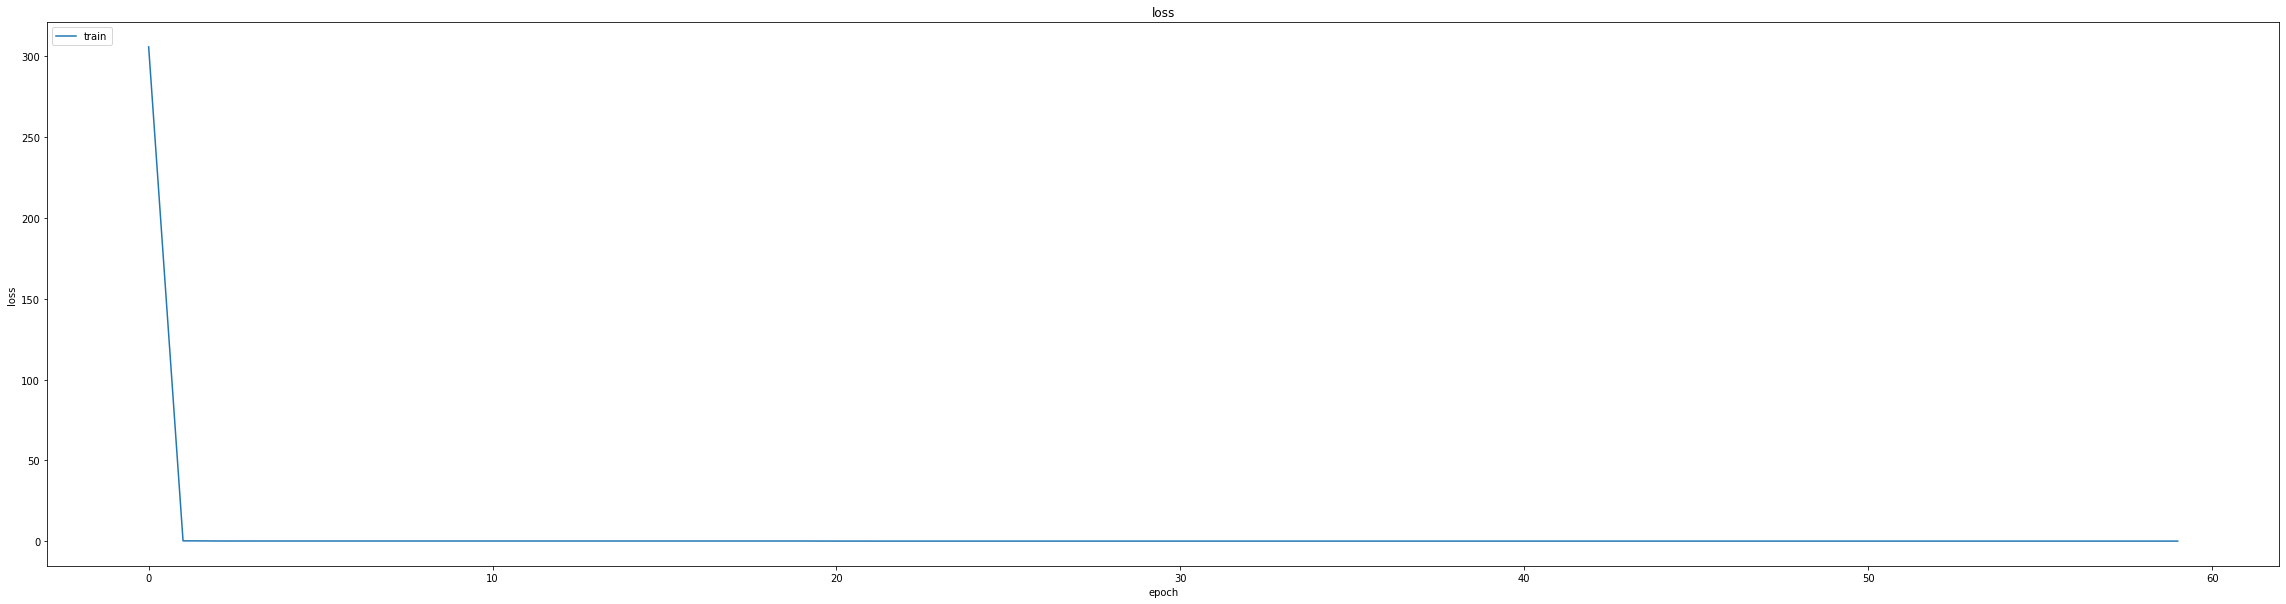

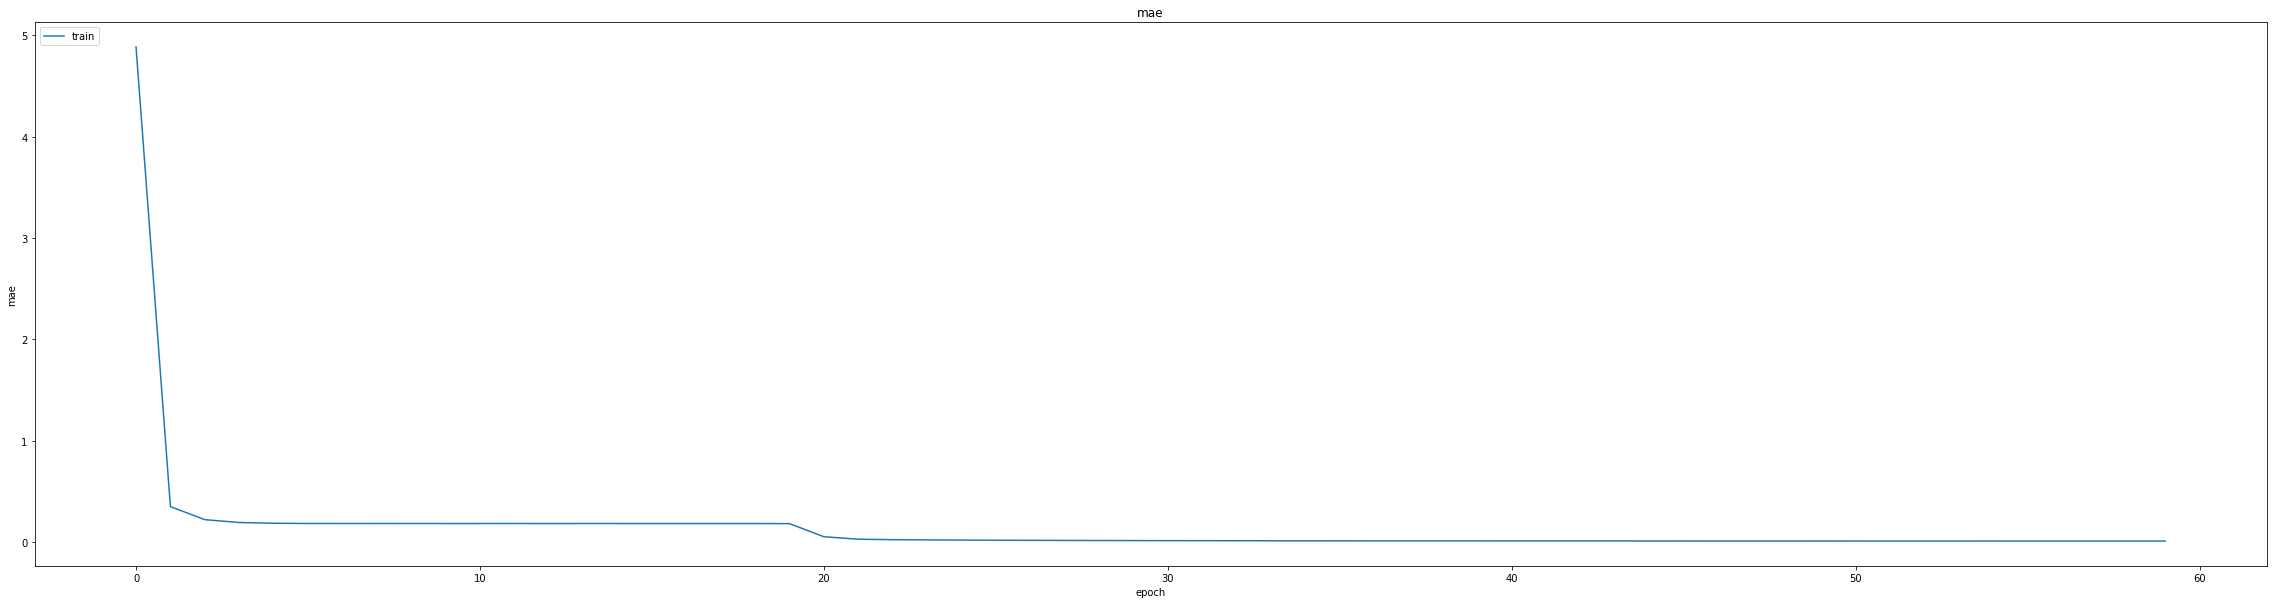

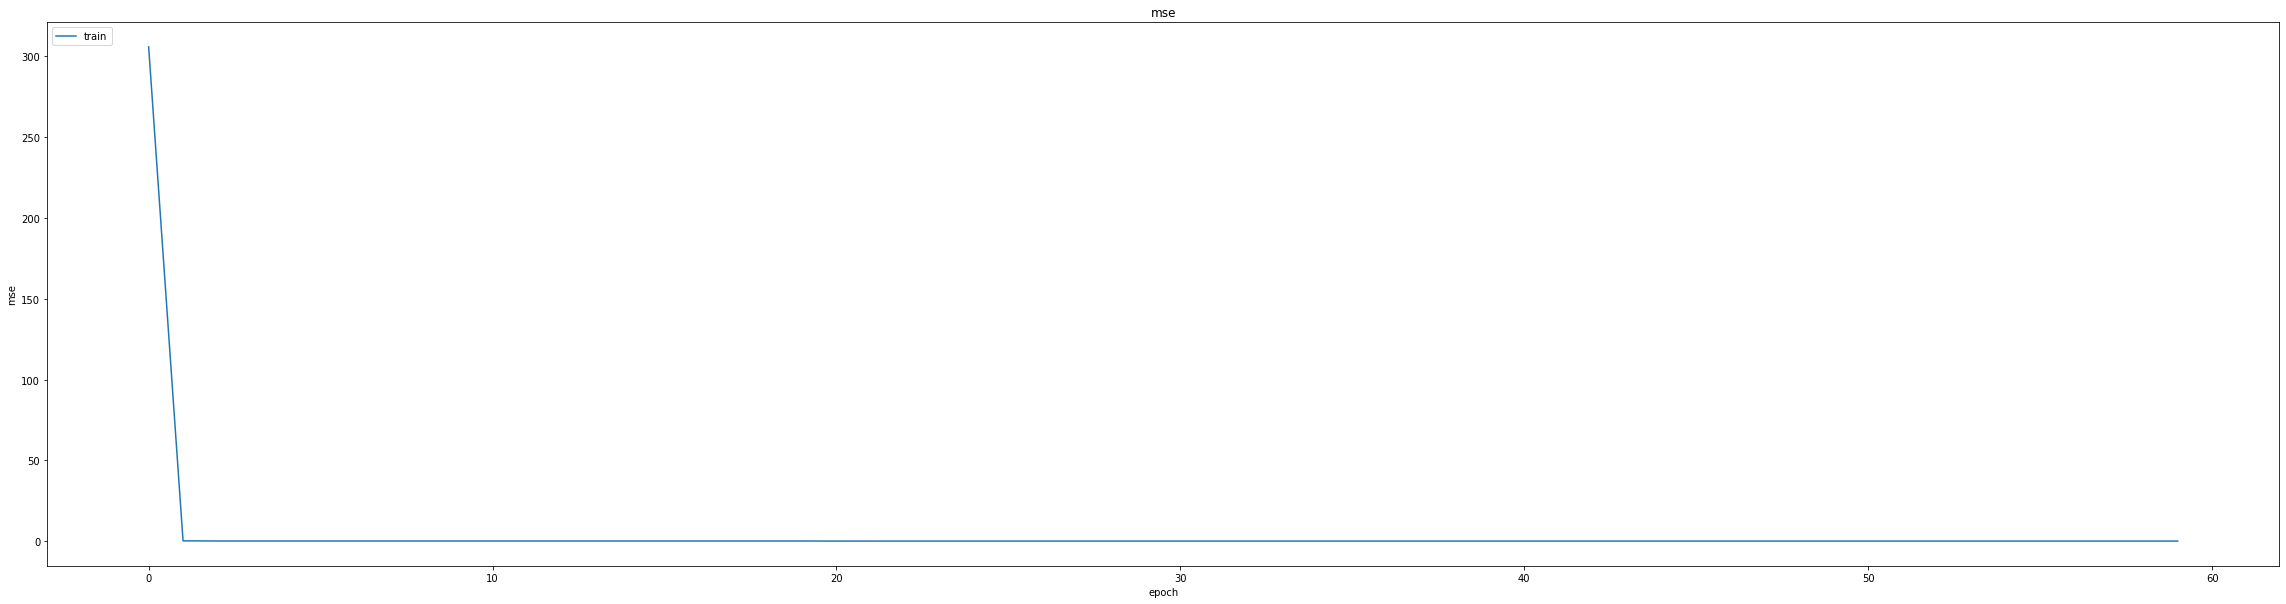

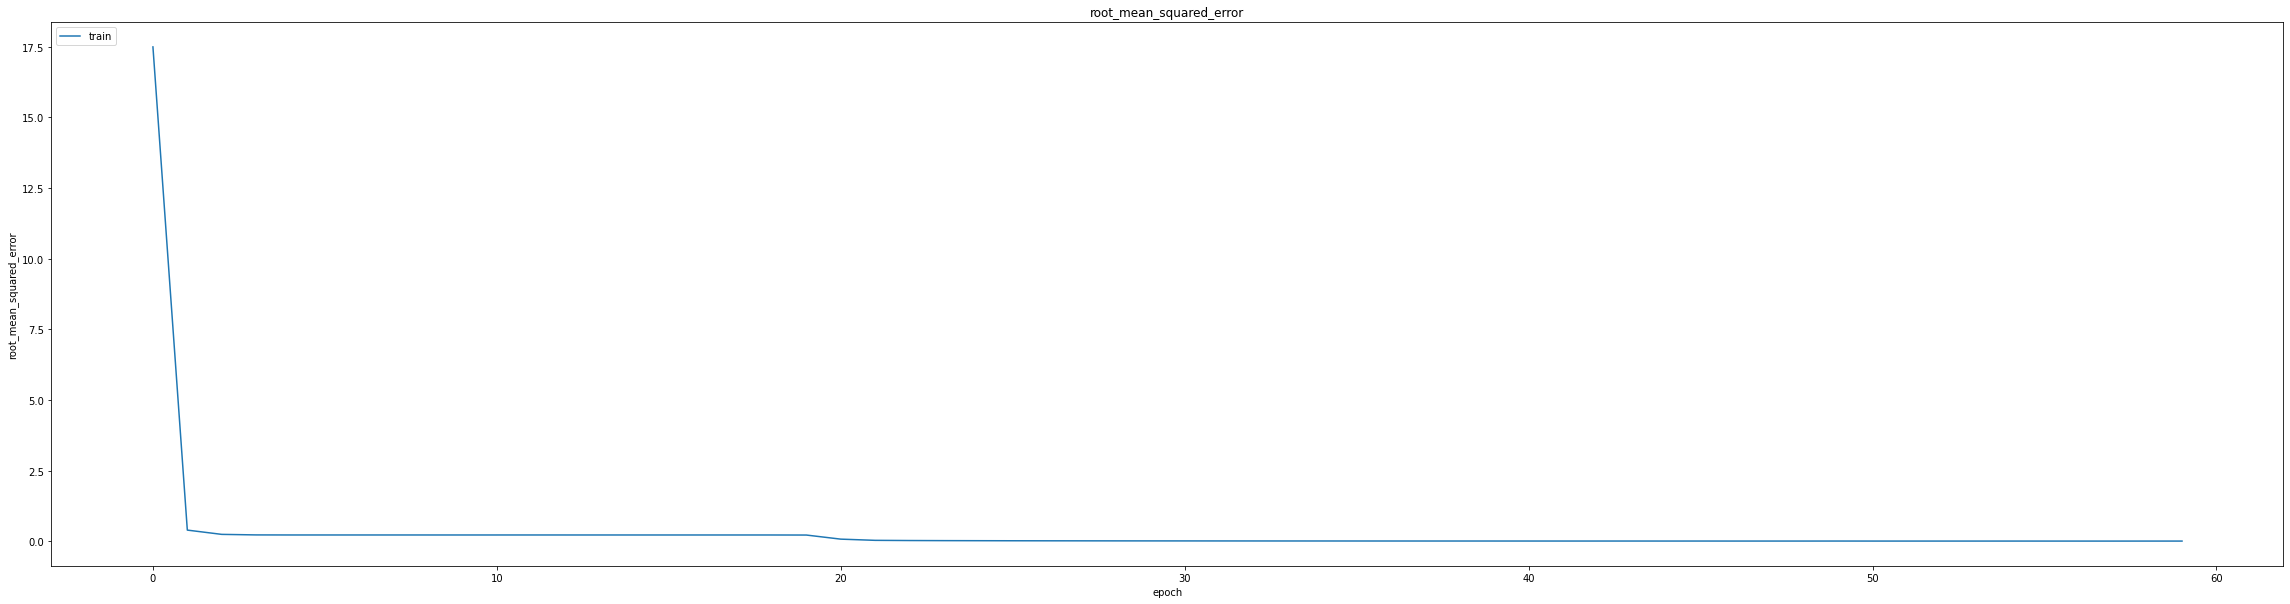

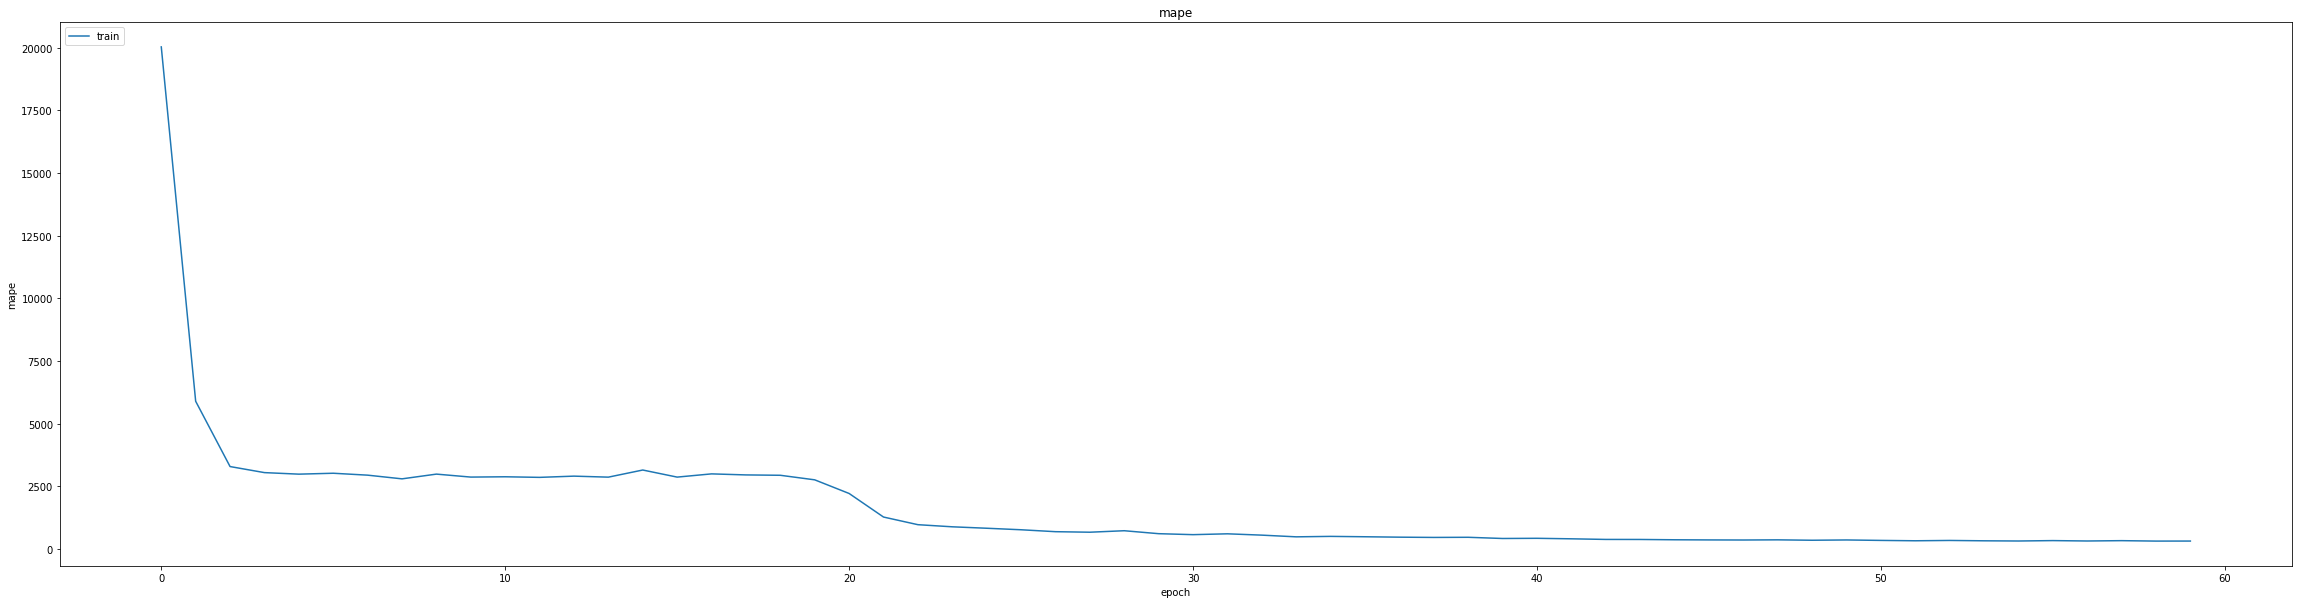

In [ ]:
thesis.SummarizeHistory(history)

In [ ]:
print(min(history.history['val_mae']))
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
r2_score=thesis.R_Squared_Score(model, x_val, y_val)
print(r2_score)

0.01126137189567089
0.01126137189567089
0.016020793467760086
1042/1042 [==============================] - 4s 3ms/step
0.996185980471148


In [ ]:
model.load_weights("/content/drive/MyDrive/modelweights/CHF_USD_5min_GRU(70-30)")
early_stopping = EarlyStopping(monitor='val_mse', patience=15)

In [ ]:


from keras.callbacks import LearningRateScheduler
import keras.backend as K

def scheduler(epoch):
    if epoch%2==0 and epoch!=0:
        lr = K.get_value(model.optimizer.lr)
        K.set_value(model.optimizer.lr, lr*.9)
        print("lr changed to {}".format(lr*.9))
    return K.get_value(model.optimizer.lr)
lr_decay = LearningRateScheduler(scheduler)

callbacks_list = [checkpoint, lr_decay, early_stopping]

Epochs=int(Epochs/3)

history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/20
402/405 [============================>.] - ETA: 0s - loss: 7.2789e-04 - mae: 0.0137 - mse: 7.2789e-04 - root_mean_squared_error: 0.0270 - mape: 398.6879
Epoch 1: val_mse did not improve from 0.00026
405/405 [==============================] - 11s 16ms/step - loss: 7.2452e-04 - mae: 0.0137 - mse: 7.2452e-04 - root_mean_squared_error: 0.0269 - mape: 396.4683 - val_loss: 2.9312e-04 - val_mae: 0.0123 - val_mse: 2.9312e-04 - val_root_mean_squared_error: 0.0171 - val_mape: 1738.6053 - lr: 0.0010
Epoch 2/20
404/405 [============================>.] - ETA: 0s - loss: 1.3401e-04 - mae: 0.0086 - mse: 1.3401e-04 - root_mean_squared_error: 0.0116 - mape: 363.3369
Epoch 2: val_mse did not improve from 0.00026
405/405 [==============================] - 6s 14ms/step - loss: 1.3402e-04 - mae: 0.0086 - mse: 1.3402e-04 - root_mean_squared_error: 0.0116 - mape: 363.0983 - val_loss: 3.0543e-04 - val_mae: 0.0128 - val_mse: 3.0543e-04 - val_root_mean_squared_error: 0.0175 - val_mape: 1651.2098 - lr

405/405 [==============================] - 16s 38ms/step - loss: 1.2098e-04 - mae: 0.0082 - mse: 1.2098e-04 - root_mean_squared_error: 0.0110 - mape: 341.0741 - val_loss: 2.5234e-04 - val_mae: 0.0117 - val_mse: 2.5234e-04 - val_root_mean_squared_error: 0.0159 - val_mape: 1526.1554 - lr: 7.2900e-04
Epoch 8/20
402/405 [============================>.] - ETA: 0s - loss: 1.3487e-04 - mae: 0.0087 - mse: 1.3487e-04 - root_mean_squared_error: 0.0116 - mape: 326.2878
Epoch 8: val_mse did not improve from 0.00025
405/405 [==============================] - 6s 14ms/step - loss: 1.3465e-04 - mae: 0.0087 - mse: 1.3465e-04 - root_mean_squared_error: 0.0116 - mape: 324.4704 - val_loss: 2.6643e-04 - val_mae: 0.0122 - val_mse: 2.6643e-04 - val_root_mean_squared_error: 0.0163 - val_mape: 1530.8164 - lr: 7.2900e-04
lr changed to 0.0006561000715009868
Epoch 9/20
403/405 [============================>.] - ETA: 0s - loss: 1.0761e-04 - mae: 0.0078 - mse: 1.0761e-04 - root_mean_squared_error: 0.0104 - mape: 33

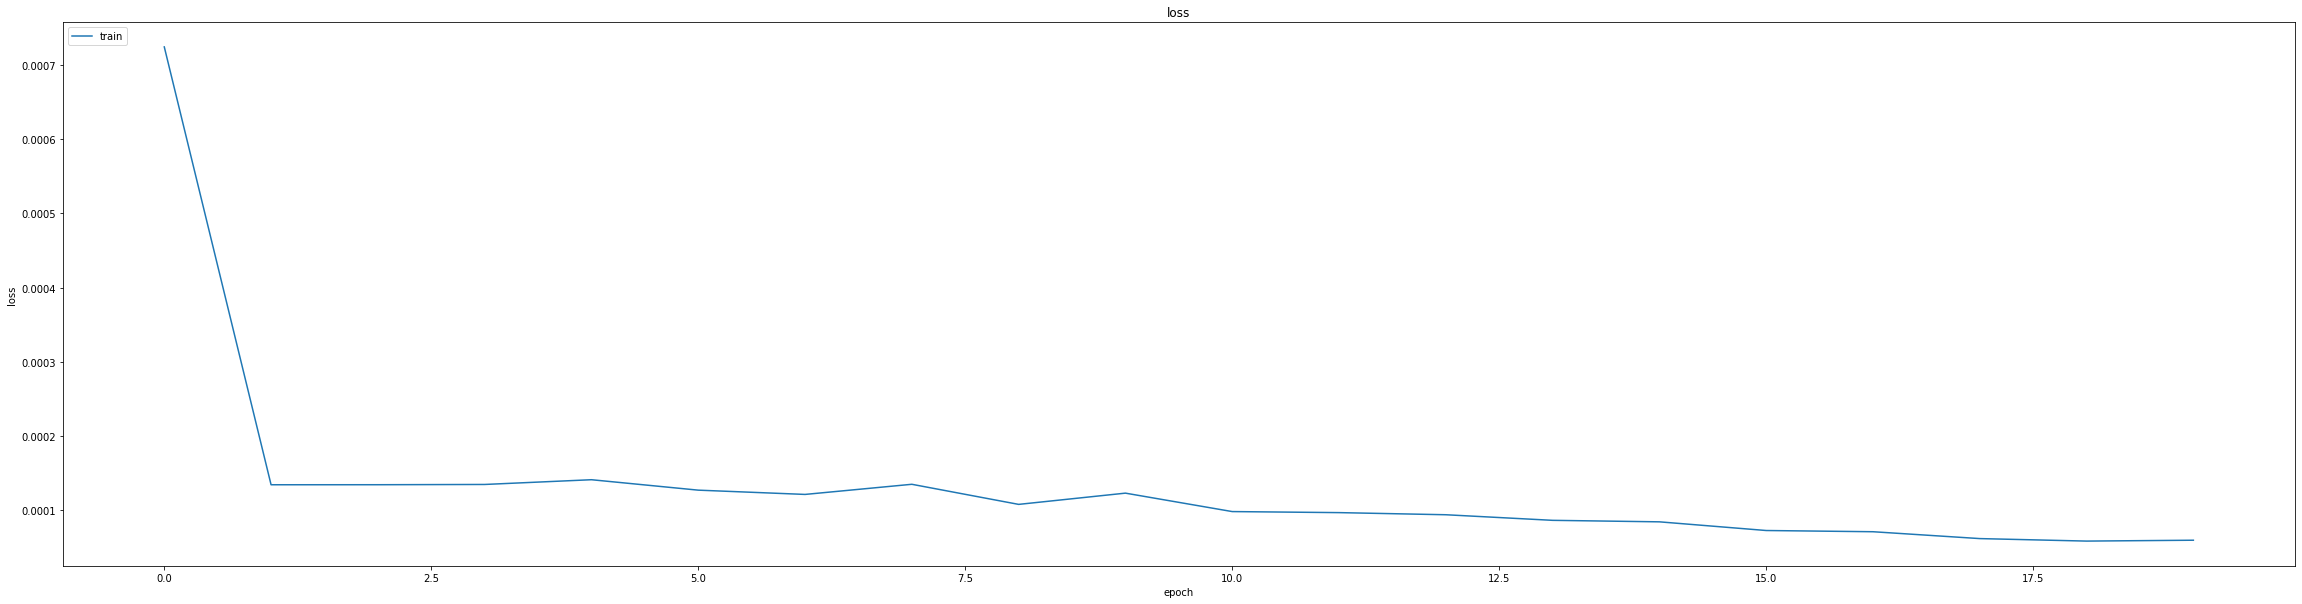

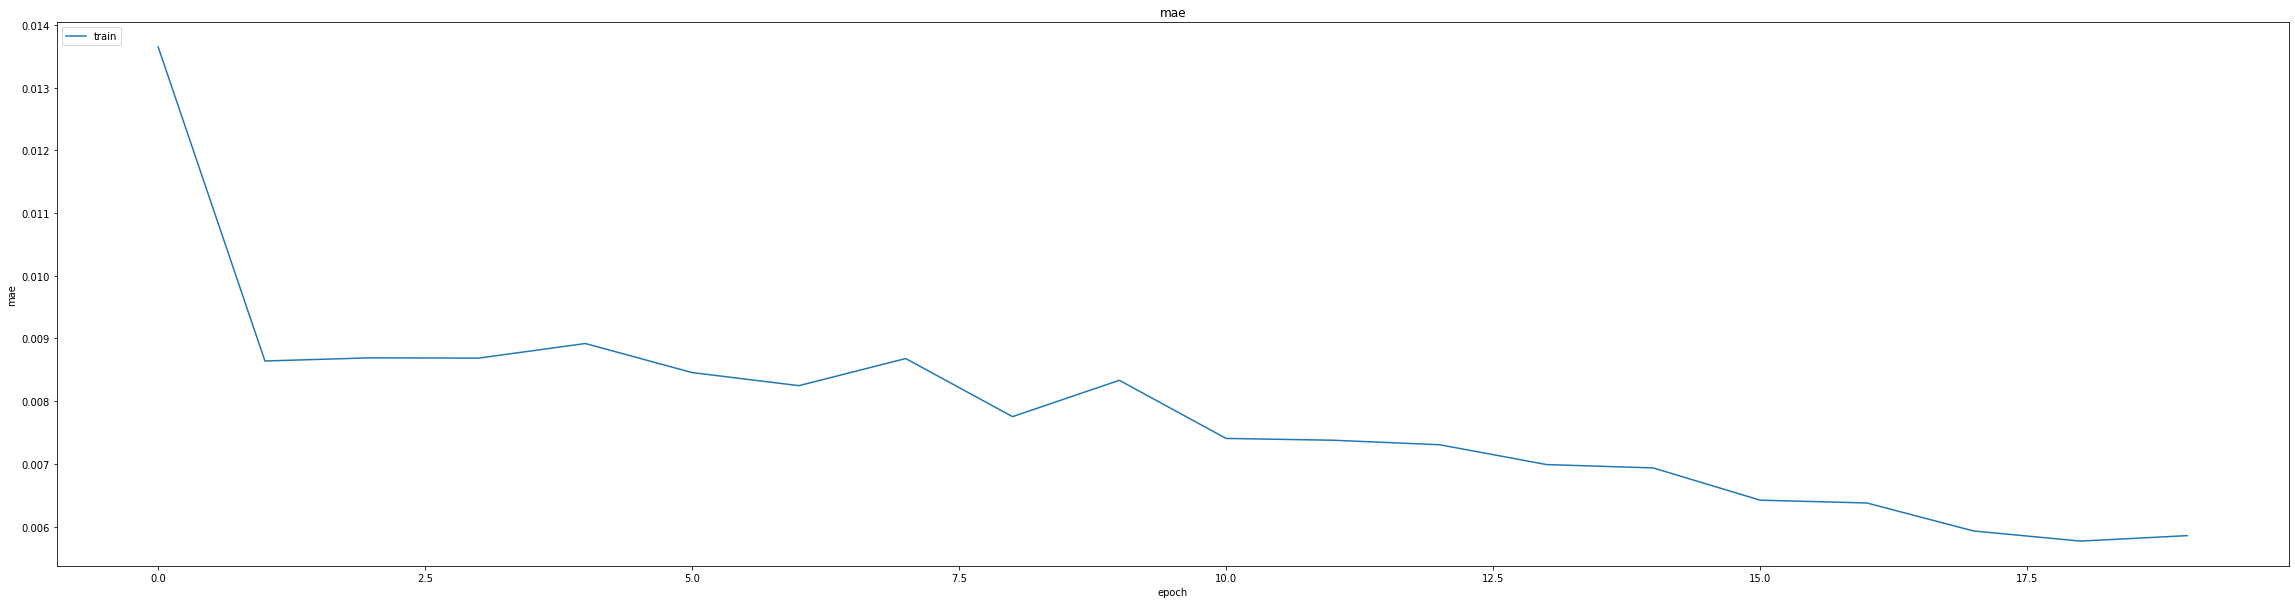

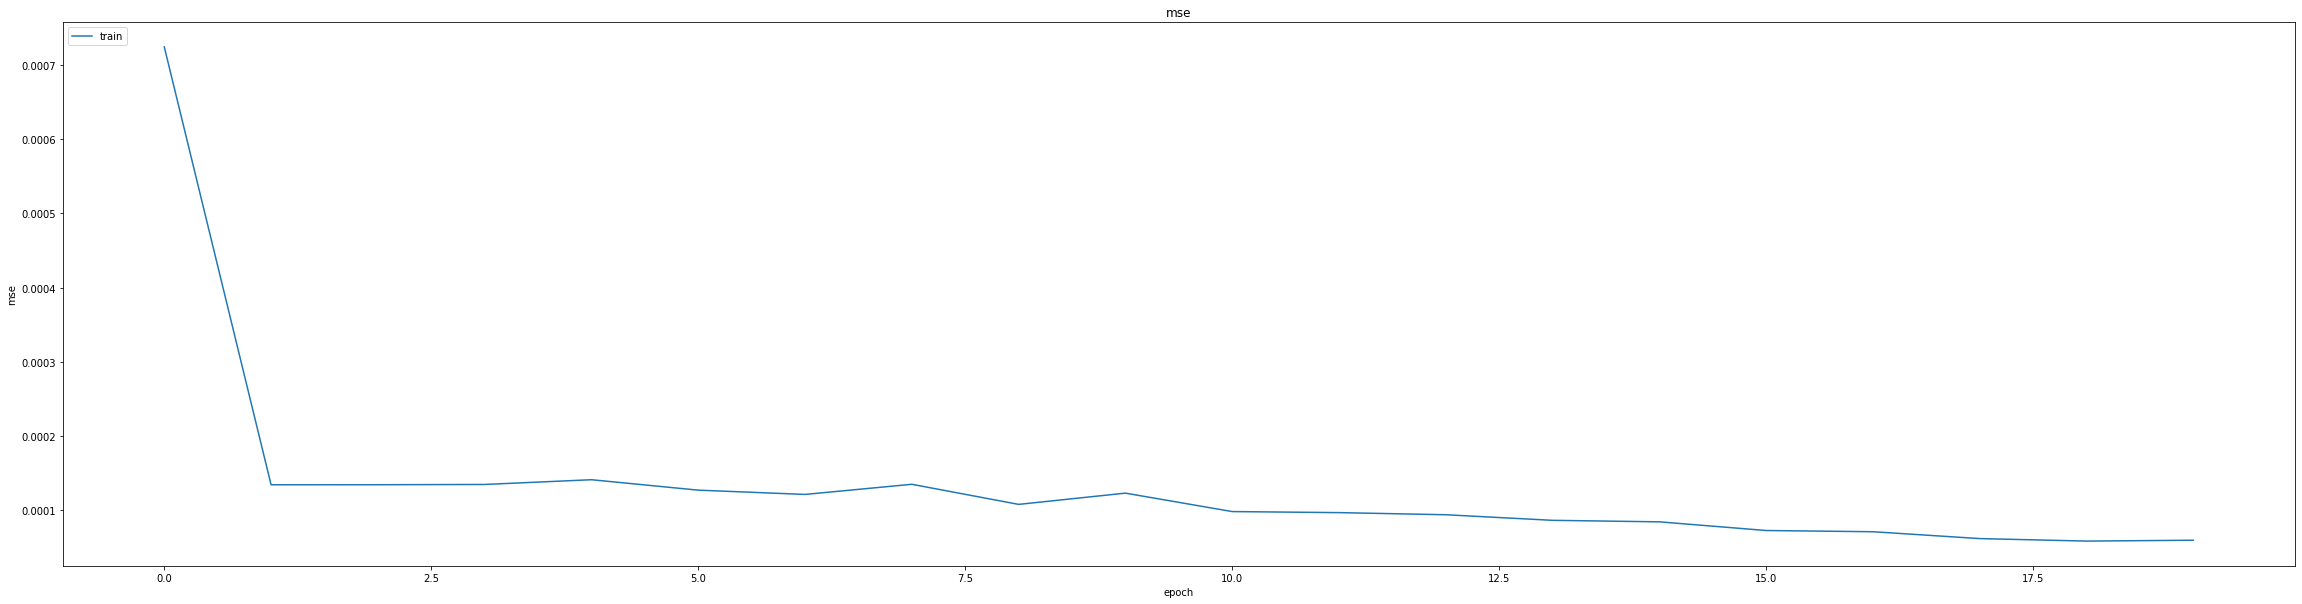

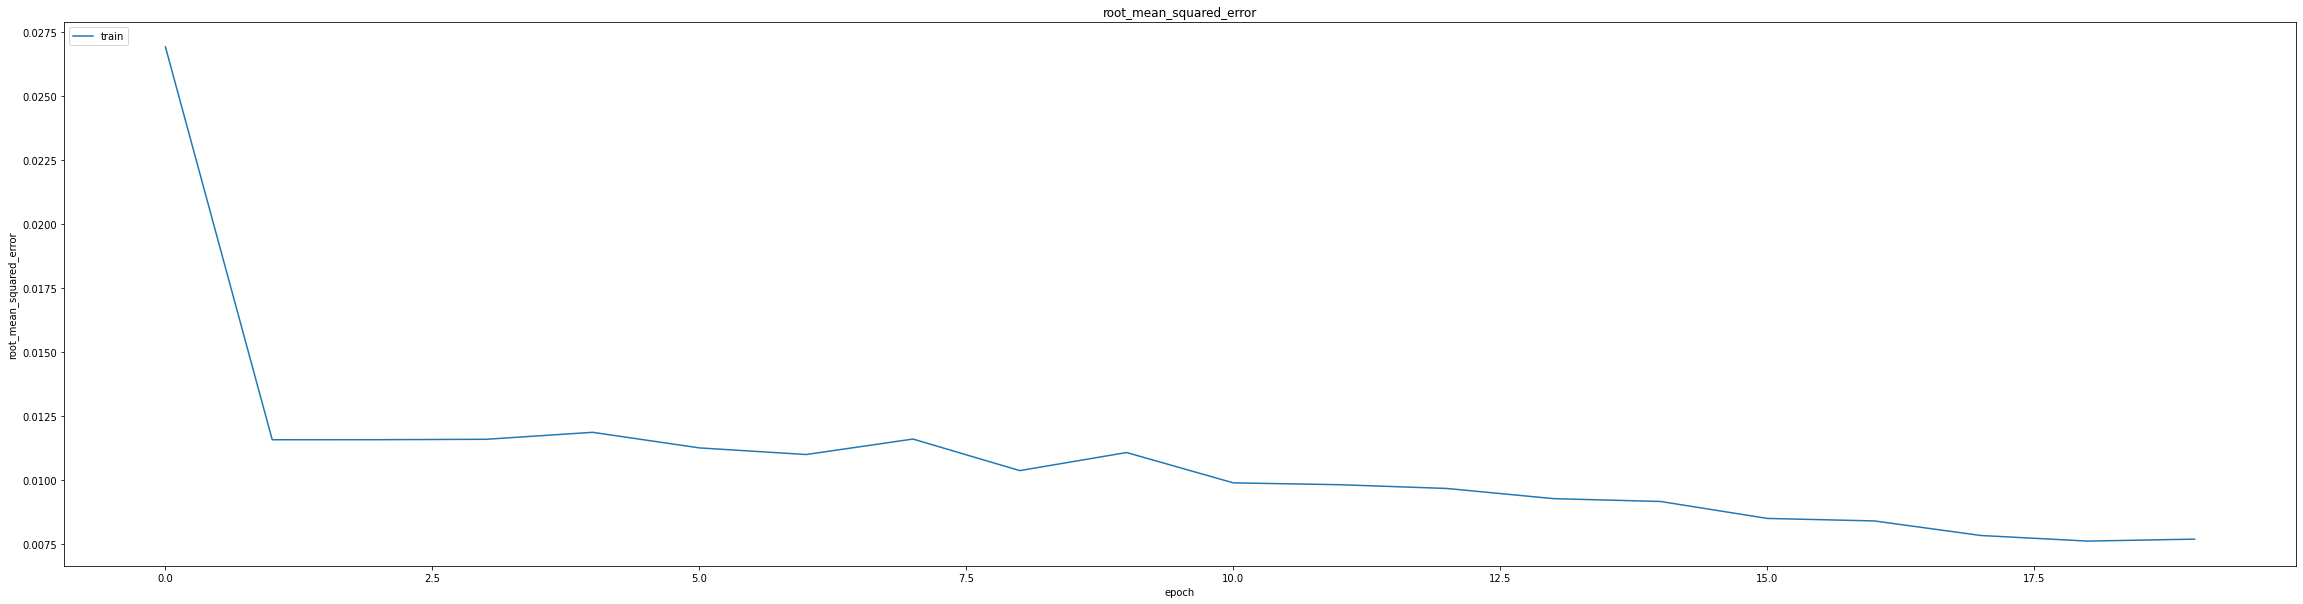

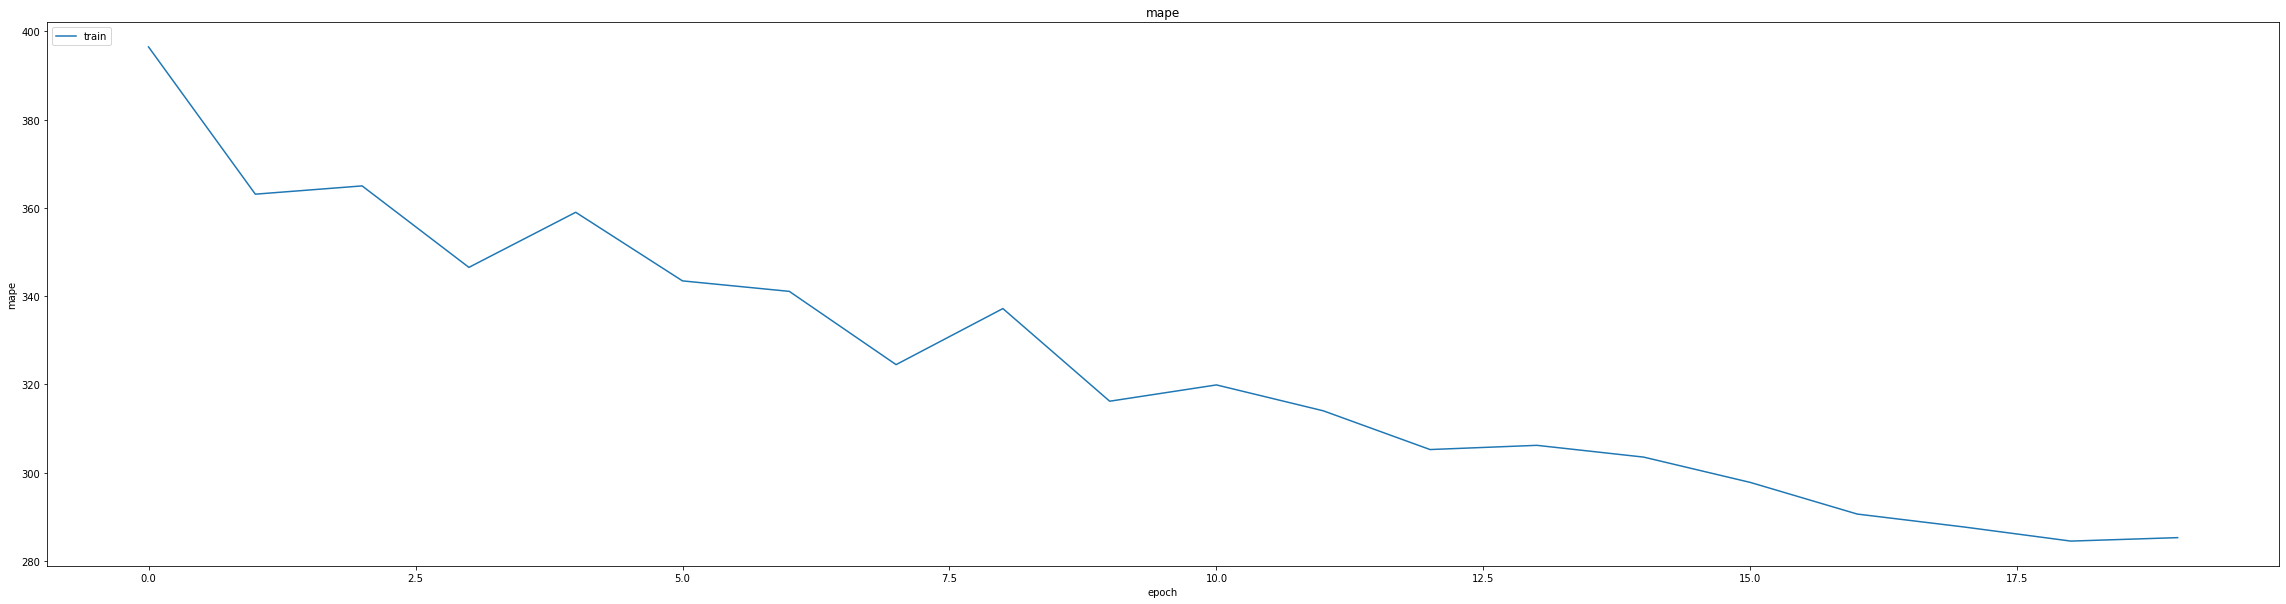

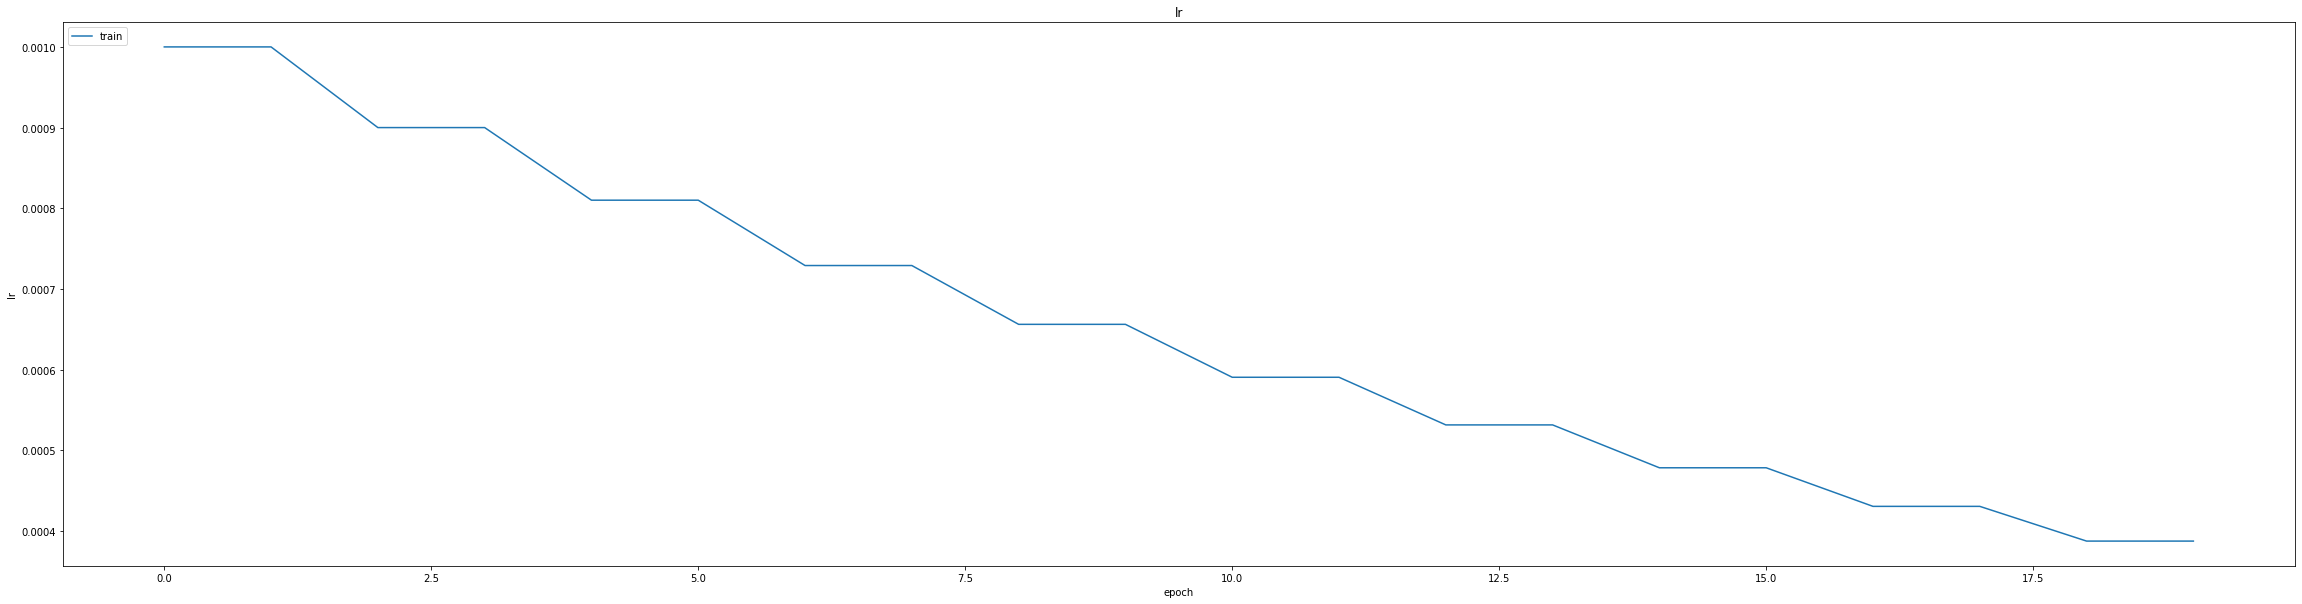

In [ ]:
thesis.SummarizeHistory(history)

In [ ]:
print(min(history.history['val_mae']))
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
r2_score=thesis.R_Squared_Score(model, x_val, y_val)
print(r2_score)

0.011713807471096516
0.011713807471096516
0.0158852431923151
1042/1042 [==============================] - 4s 4ms/step
0.9884949201854143


In [ ]:
model.load_weights("/content/drive/MyDrive/modelweights/CHF_USD_5min_GRU(70-30)")

1042/1042 [==============================] - 4s 3ms/step


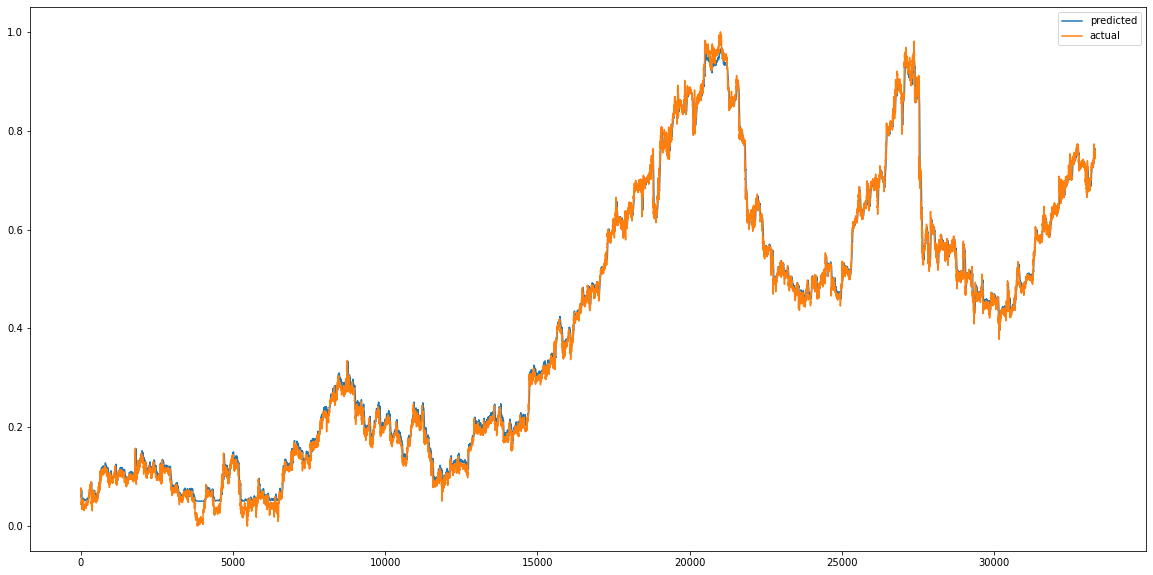

In [ ]:
val_predictions=thesis.CreatPrediction(model,x_val, y_val)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


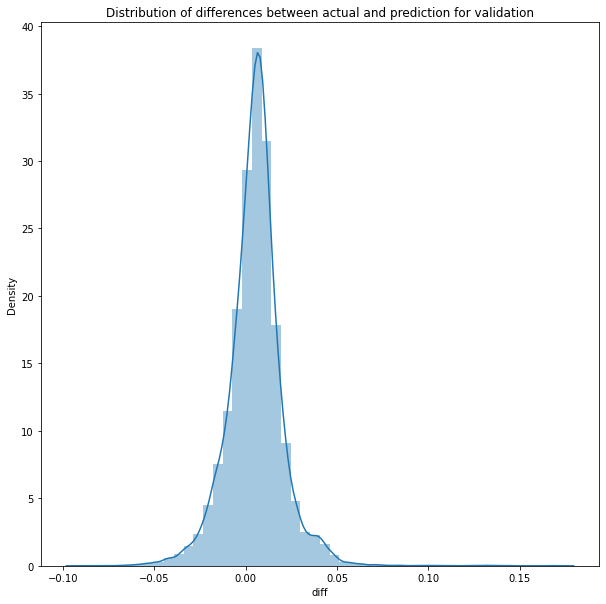

In [ ]:
val_predictions['diff'] = val_predictions['predicted'] - val_predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(val_predictions['diff']);
plt.title('Distribution of differences between actual and prediction for validation')
plt.show()

1042/1042 [==============================] - 4s 3ms/step


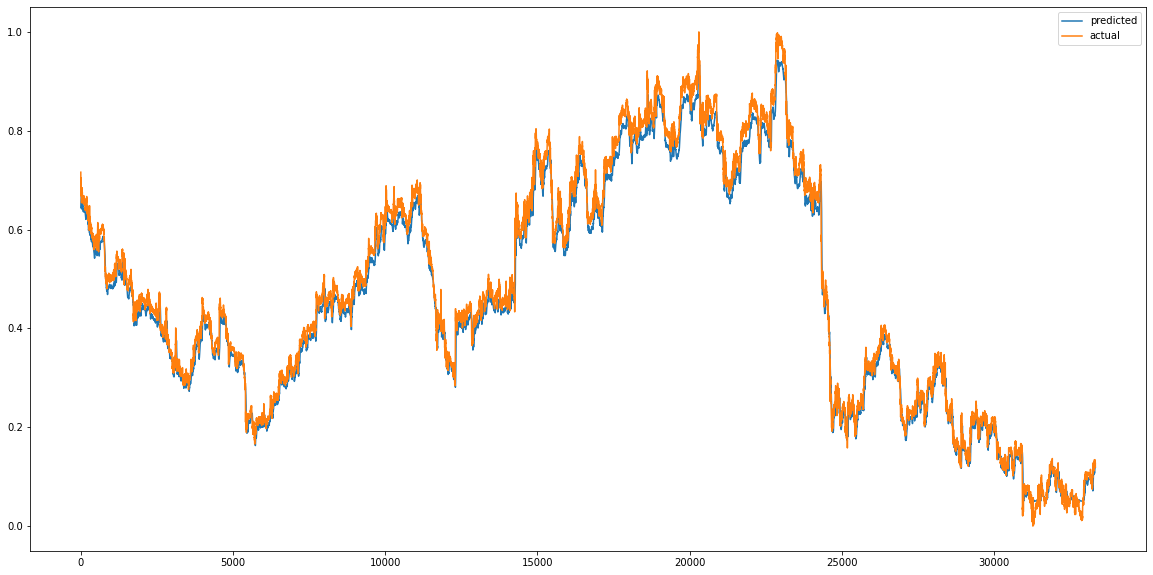

In [ ]:
predictions=thesis.CreatPrediction(model,x_test, y_test)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


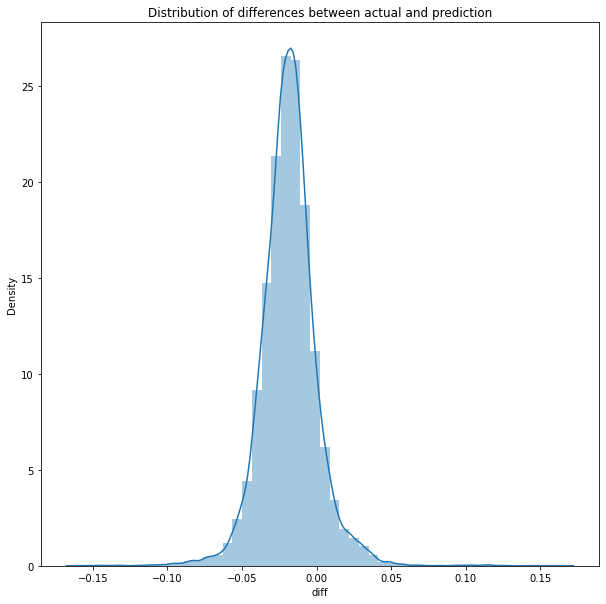

In [ ]:
predictions['diff'] = predictions['predicted'] - predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(predictions['diff']);
plt.title('Distribution of differences between actual and prediction')
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
print("MSE : ", mean_squared_error(predictions['predicted'].values, predictions['actual'].values))

from math import sqrt
print("RMSE : ", sqrt(mean_squared_error(predictions['predicted'].values, predictions['actual'].values)))

print("MAE : ", mean_absolute_error(predictions['predicted'].values, predictions['actual'].values))

test_r2_score=thesis.R_Squared_Score(model, x_test, y_test)
print('R2_Score  :', test_r2_score)
predictions['diff'].describe()

MSE :  0.0006921726316001287
RMSE :  0.026309173905695492
MAE :  0.021642226869651622
1042/1042 [==============================] - 4s 3ms/step
R2_Score  : 0.9881183902055279


count    33333.000000
mean        -0.018377
std          0.018827
min         -0.160661
25%         -0.028704
50%         -0.018518
75%         -0.008622
max          0.165190
Name: diff, dtype: float64